In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%matplotlib?

In [3]:
#定义一个读取文件生成数据的函数，然后返回生成的数据
#这里1、使用format进行字符串的格式化操作
#2、运用 python的with 方法方便的进行异常的处理，和对资源的清理，省了些 try catch finally的步骤
def open_csv(csv_name):
    with open(r'D:\ml\rossmann-store-sales\{}'.format(csv_name)) as f:
        data = pd.read_csv(f)
    return data

In [4]:
#分别创建 训练数据集，测试数据集，和商店的描述数据
data_store = open_csv('store.csv')
data_train = open_csv('train.csv')
data_test = open_csv('test.csv')


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2901: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [5]:
data_store.head().append(data_store.tail())

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

In [6]:
data_train.head().append(data_train.tail())

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0              1  
2                  0              1  
3                  0              1  
4                  0              1  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [7]:
data_test.head().append(data_test.tail())

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0          1      1          4  2015-09-17   1.0      1            0   
1          2      3          4  2015-09-17   1.0      1            0   
2          3      7          4  2015-09-17   1.0      1            0   
3          4      8          4  2015-09-17   1.0      1            0   
4          5      9          4  2015-09-17   1.0      1            0   
41083  41084   1111          6  2015-08-01   1.0      0            0   
41084  41085   1112          6  2015-08-01   1.0      0            0   
41085  41086   1113          6  2015-08-01   1.0      0            0   
41086  41087   1114          6  2015-08-01   1.0      0            0   
41087  41088   1115          6  2015-08-01   1.0      0            0   

       SchoolHoliday  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
41083              0  
41084              0  
41085              0  
41086              0  
41087              1

In [8]:
#查看数据缺失
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [11]:
#商店的缺失数据分析
#CompetitionDistance
data_store[pd.isnull(data_store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

In [12]:
comp_month_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceMonth)].Store.unique()

In [13]:
comp_year_nan_list = data_store[pd.isnull(data_store.CompetitionOpenSinceYear)].Store.unique()

In [14]:
(comp_month_nan_list == comp_year_nan_list).all()

True

竞争对手开启年份月份某些店铺存在为空的情况，认为数据丢失，考虑直接写为0

In [15]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceWeek)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [16]:
df_nan_prom2 = data_store[pd.isnull(data_store.Promo2SinceYear)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

In [17]:
df_nan_prom2 = data_store[pd.isnull(data_store.PromoInterval)]
df_nan_prom2[df_nan_prom2.Promo2!=0].shape

(0, 10)

上面三行分析得到促销相关的时间、时段信息为空，均是出现在Promo2 = 0 即无促销的情况下，因而对于促销相关的字段考虑直接写0

In [18]:
#分析缺失的数据
#测试集缺失数据
data_test[pd.isnull(data_test.Open)]

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
479      480    622          4  2015-09-17   NaN      1            0   
1335    1336    622          3  2015-09-16   NaN      1            0   
2191    2192    622          2  2015-09-15   NaN      1            0   
3047    3048    622          1  2015-09-14   NaN      1            0   
4759    4760    622          6  2015-09-12   NaN      0            0   
5615    5616    622          5  2015-09-11   NaN      0            0   
6471    6472    622          4  2015-09-10   NaN      0            0   
7327    7328    622          3  2015-09-09   NaN      0            0   
8183    8184    622          2  2015-09-08   NaN      0            0   
9039    9040    622          1  2015-09-07   NaN      0            0   
10751  10752    622          6  2015-09-05   NaN      0            0   

       SchoolHoliday  
479                0  
1335               0  
2191               0  
3047               0  
4759               0  
5615               0  
6471               0  
7327               0  
8183               0  
9039               0  
10751              0

缺失的数据都来自于 同一个店铺，无周末，无假期，且部分有促销，判定为正常营业，在特征处理时设置成1

下面具体分析每个字段的异常情况

In [19]:
#查看每个数据集合每一列的取值情况
data_store.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

需要对字符串进行数值化

In [20]:
data_store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

需要对字符串进行数值化

In [21]:
data_store.CompetitionDistance.describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [22]:
data_store.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

取值是一月到12月

In [23]:
data_store.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [24]:
data_store.Promo2.unique()

array([0, 1], dtype=int64)

结果是有促销或者无促销

In [25]:
data_store.Promo2SinceWeek.unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

一年有52周，取值正常

In [26]:
data_store.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

除去空值外，年份情况无异常

In [27]:
data_store.PromoInterval.unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

连续的促销为每年的固定月份，数据无异常,特征处理时，需要将特征处理为数值变量

In [28]:
#查看训练数据的情况
data_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

星期数为周一到周日，无问题

In [29]:
data_train.Date.unique()

array(['2015/7/31', '2015/7/30', '2015/7/29', '2015/7/28', '2015/7/27',
       '2015/7/26', '2015/7/25', '2015/7/24', '2015/7/23', '2015/7/22',
       '2015/7/21', '2015/7/20', '2015/7/19', '2015/7/18', '2015/7/17',
       '2015/7/16', '2015/7/15', '2015/7/14', '2015/7/13', '2015/7/12',
       '2015/7/11', '2015/7/10', '2015/7/9', '2015/7/8', '2015/7/7',
       '2015/7/6', '2015/7/5', '2015/7/4', '2015/7/3', '2015/7/2',
       '2015/7/1', '2015/6/30', '2015/6/29', '2015/6/28', '2015/6/27',
       '2015/6/26', '2015/6/25', '2015/6/24', '2015/6/23', '2015/6/22',
       '2015/6/21', '2015/6/20', '2015/6/19', '2015/6/18', '2015/6/17',
       '2015/6/16', '2015/6/15', '2015/6/14', '2015/6/13', '2015/6/12',
       '2015/6/11', '2015/6/10', '2015/6/9', '2015/6/8', '2015/6/7',
       '2015/6/6', '2015/6/5', '2015/6/4', '2015/6/3', '2015/6/2',
       '2015/6/1', '2015/5/31', '2015/5/30', '2015/5/29', '2015/5/28',
       '2015/5/27', '2015/5/26', '2015/5/25', '2015/5/24', '2015/5/23',
       '20

In [30]:
data_train.Sales.describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

In [31]:
data_train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [32]:
data_train.Open.unique()

array([1, 0], dtype=int64)

In [33]:
data_train.Promo.unique()

array([1, 0], dtype=int64)

In [34]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

这个数据有点奇怪，有两个0 的数据 需要进行处理，合并，同时字母需要进行数值化

In [7]:
data_train.StateHoliday.replace(0,'0',inplace = True)

In [36]:
data_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [37]:
data_train.SchoolHoliday.unique()

array([1, 0], dtype=int64)

In [38]:
data_test.DayOfWeek.unique()

array([4, 3, 2, 1, 7, 6, 5], dtype=int64)

In [39]:
data_test.Open.unique()

array([ 1., nan,  0.])

In [40]:
data_test.Promo.unique()

array([1, 0], dtype=int64)

In [41]:
data_test.StateHoliday.unique()

array(['0', 'a'], dtype=object)

In [42]:
data_test.SchoolHoliday.unique()

array([0, 1], dtype=int64)

开始对空值和异常值进行处理

In [9]:
data_store.fillna(0, inplace=True)#促销和竞争对手信息缺失补位0

In [10]:
data_test.fillna(1, inplace=True)#open数据缺失，分析后认定为店铺开启，补为1

In [11]:
display(data_store.isnull().sum(),data_train.isnull().sum(),data_test.isnull().sum())

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

确认 没有空值

In [12]:
#生成新数据
data_train_new=pd.merge(data_train,data_store,on='Store',how='left')
data_train_new.Date=pd.to_datetime(data_train_new.Date)
data_train_new.head().append(data_train_new.tail())

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        0.0                       0.0       0   
1017207                        0.0                       0.0       0   
1017208                        0.0                       0.0       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    0.0              0.0                 0  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    0.0              0.0                 0  
4                    0.0              0.0                 0  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              0.0              0.0                 0  
1017206              0.0              0.0                 0  
1017207              0.0              0.0                 0  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec

In [13]:
data_test_new=pd.merge(data_test,data_store,on='Store',how='left')
data_test_new.Date=pd.to_datetime(data_test_new.Date)
data_test_new.head().append(data_test_new.tail())

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
0          1      1          4 2015-09-17   1.0      1            0   
1          2      3          4 2015-09-17   1.0      1            0   
2          3      7          4 2015-09-17   1.0      1            0   
3          4      8          4 2015-09-17   1.0      1            0   
4          5      9          4 2015-09-17   1.0      1            0   
41083  41084   1111          6 2015-08-01   1.0      0            0   
41084  41085   1112          6 2015-08-01   1.0      0            0   
41085  41086   1113          6 2015-08-01   1.0      0            0   
41086  41087   1114          6 2015-08-01   1.0      0            0   
41087  41088   1115          6 2015-08-01   1.0      0            0   

       SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0         c          a               1270.0   
1                  0         a          a              14130.0   
2                  0         a          c              24000.0   
3                  0         a          a               7520.0   
4                  0         a          c               2030.0   
41083              0         a          a               1900.0   
41084              0         c          c               1880.0   
41085              0         a          c               9260.0   
41086              0         a          c                870.0   
41087              1         d          c               5350.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                            9.0                    2008.0       0   
1                           12.0                    2006.0       1   
2                            4.0                    2013.0       0   
3                           10.0                    2014.0       0   
4                            8.0                    2000.0       0   
41083                        6.0                    2014.0       1   
41084                        4.0                    2006.0       0   
41085                        0.0                       0.0       0   
41086                        0.0                       0.0       0   
41087                        0.0                       0.0       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                  0.0              0.0                 0  
1                 14.0           2011.0   Jan,Apr,Jul,Oct  
2                  0.0              0.0                 0  
3                  0.0              0.0                 0  
4                  0.0              0.0                 0  
41083             31.0           2013.0   Jan,Apr,Jul,Oct  
41084              0.0              0.0                 0  
41085              0.0              0.0                 0  
41086              0.0              0.0                 0  
41087             22.0           2012.0  Mar,Jun,Sept,Dec

开始进行数据分析

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'sales(W)')

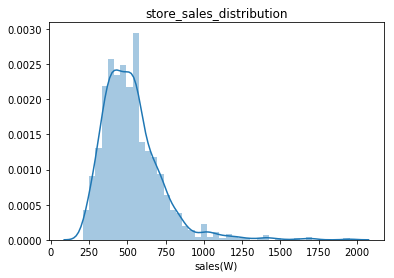

In [48]:
#每家店sales总额的分布
df1=data_train_new.groupby('Store')['Sales'].sum()/10000
#df1.head()
sns.distplot(df1)
plt.title('store_sales_distribution')
plt.xlabel('sales(W)')

[Text(0.5, 1.0, 'StoreType-sum-sales')]

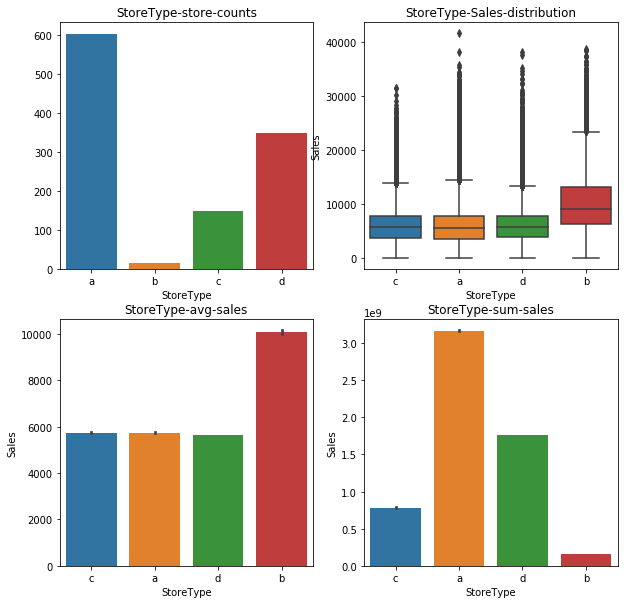

In [49]:
#不同店铺种类的数据分布情况
#StoreType
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('StoreType').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'StoreType-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='StoreType',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'StoreType-Sales-distribution'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'StoreType-avg-sales'})
sns.barplot(y='Sales',x='StoreType',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'StoreType-sum-sales'})



[Text(0.5, 1.0, 'Assortment-sum-sales')]

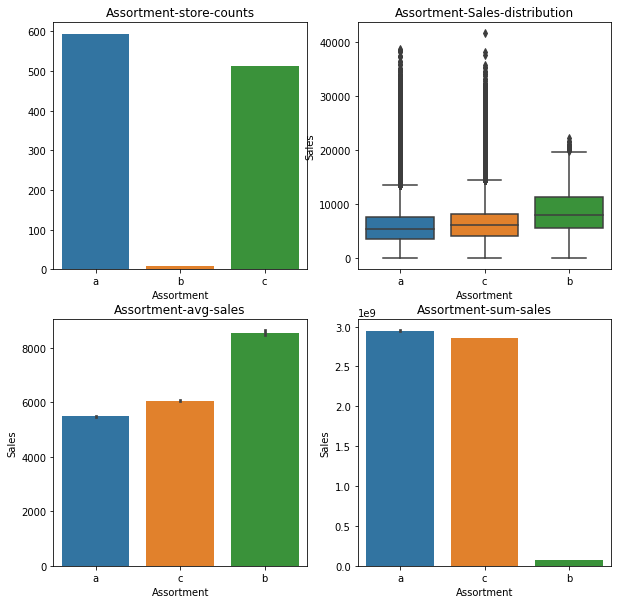

In [51]:
#对不同分类级别的店铺观察 分布情况
#Assortment
from numpy import mean
from numpy import sum

fig,ax=plt.subplots(2,2,figsize=(10,10))



df=data_store.groupby('Assortment').size()
sns.barplot(df.index,df.values,ax=ax[0][0])
ax[0][0].set(**{'title':'Assortment-store-counts'})


#StoreType的销售分布
sns.boxplot(y='Sales',x='Assortment',data=data_train_new,ax=ax[0][1])
ax[0][1].set(**{'title':'Assortment-Sales-distribution'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=mean,ax=ax[1][0])
ax[1][0].set(**{'title':'Assortment-avg-sales'})
sns.barplot(y='Sales',x='Assortment',data=data_train_new,estimator=sum,ax=ax[1][1])
ax[1][1].set(**{'title':'Assortment-sum-sales'})


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[Text(0.5, 1.0, 'CompetitionOpen-avg-sales')]

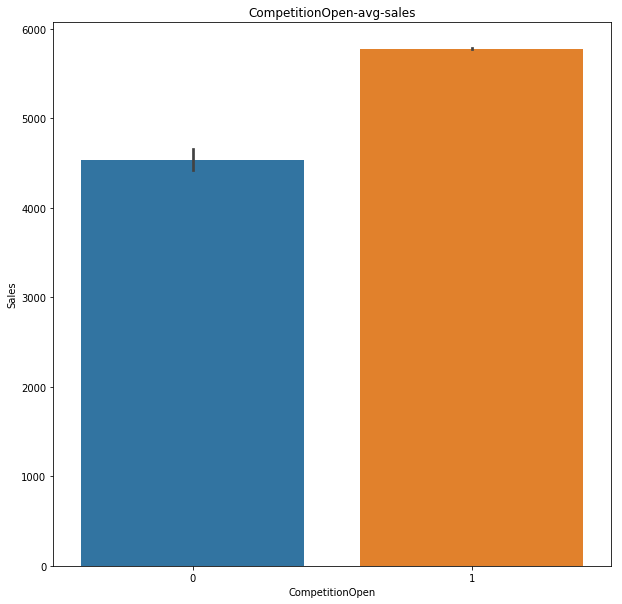

In [52]:
#探索竞争者的一些关系
#探索与竞争者有无的关系
df = data_train_new[['CompetitionDistance','Sales']]

df['CompetitionOpen'] = df.CompetitionDistance.apply(lambda x: 1 if x > 0 else 0)       


fig,ax=plt.subplots(1,1,figsize=(10,10))
sns.barplot(y='Sales',x='CompetitionOpen',data=df,estimator=mean,ax=ax)
ax.set(**{'title':'CompetitionOpen-avg-sales'})




C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1876: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff
No handles with labels found to put in legend.


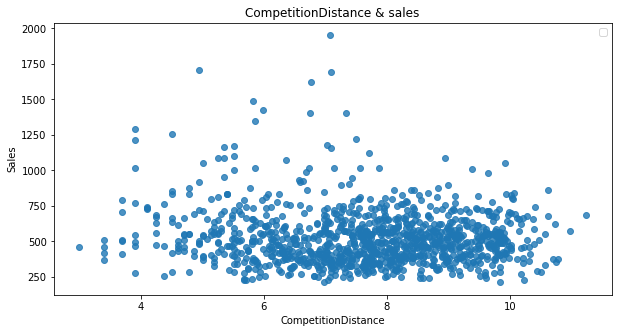

In [53]:
#探索竞争者距离和销售额关系
df7=data_train_new.groupby('Store')['CompetitionDistance','Sales'].agg({'CompetitionDistance':'mean','Sales':'sum'})#每个店销售总额
df7['CompetitionDistance']=df7['CompetitionDistance'].map(lambda x:np.log(x))#对距离取log，收缩分布
df7['Sales']=df7['Sales'].map(lambda x:x/10000)#销售额以万元为单位
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.regplot(x='CompetitionDistance',y='Sales',data=df7,ax=ax)
ax.set_title('CompetitionDistance & sales')
plt.legend(loc='best')


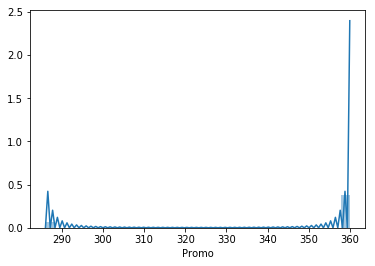

In [54]:
#促销的相关分析
df7=data_train_new.groupby('Store')['Promo'].sum()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.distplot(df7,ax=ax)

[Text(0.5, 1.0, 'Promo_counts')]

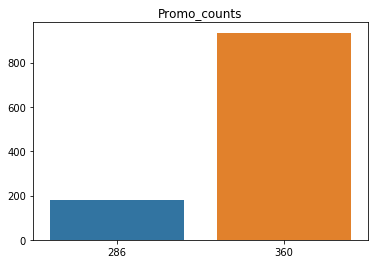

In [55]:
df8=df7.value_counts()
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.barplot(df8.index,df8.values,ax=ax)
ax.set(**{'title':'Promo_counts'})

[Text(0.5, 1.0, 'Promo & sales')]

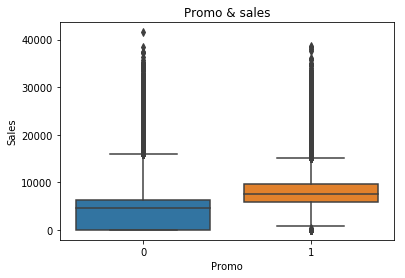

In [56]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo',data=data_train_new,ax=ax)
ax.set(**{'title':'Promo & sales'})

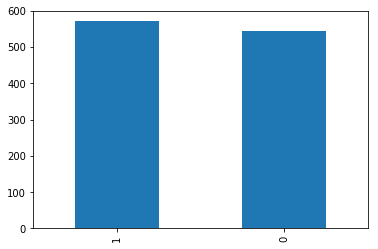

In [57]:
#季节促销的影响
#有无promo2的店数量对比
df9=data_store.Promo2.value_counts()
df9.plot(kind='bar')

[Text(0.5, 1.0, 'promo2 & sales')]

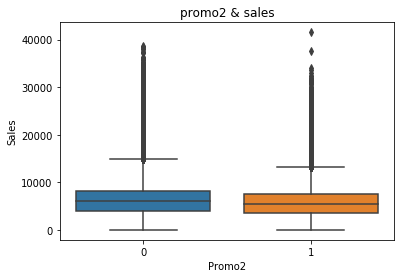

In [58]:
#有无promo2的每天每个店销售情况对比
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Promo2',data=data_train_new,ax=ax)
ax.set(**{'title':'promo2 & sales'})

[Text(0.5, 1.0, 'StateHoliday & sales > 0 ')]

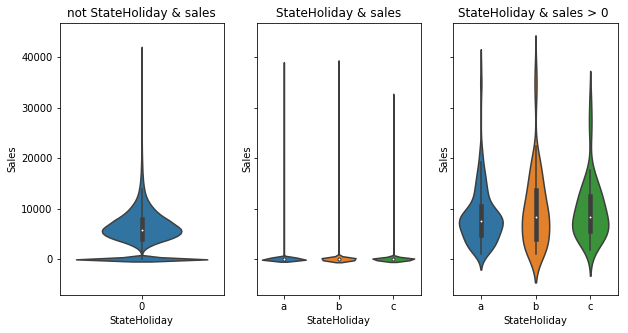

In [59]:
#对比stateholiday销售分布情况
fig,ax=plt.subplots(1,3,sharey=True,figsize=(10,5))

#不是国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday=='0'],ax=ax[0])
ax[0].set(**{'title':'not StateHoliday & sales'})
#国家节假日的销售分布
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[data_train_new.StateHoliday!='0'],ax=ax[1])
ax[1].set(**{'title':'StateHoliday & sales'})
#国家节假日的销售分布(营业的店)
sns.violinplot(y='Sales',x='StateHoliday',data=data_train_new[(data_train_new.StateHoliday!='0')&(data_train_new.Sales>0)],ax=ax[2])
ax[2].set(**{'title':'StateHoliday & sales > 0 '})

[Text(0.5, 1.0, 'SchoolHoliday & sales（Sales>=15000）')]

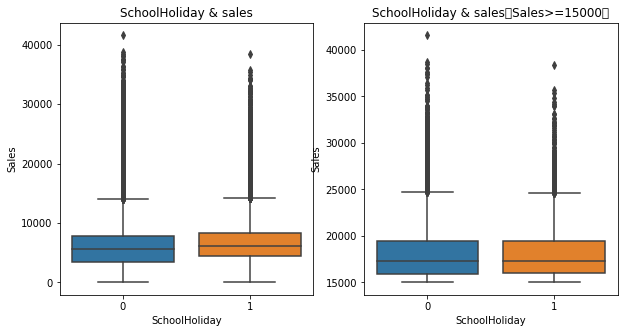

In [60]:
#对比SchoolHoliday销售分布情况

fig,ax=plt.subplots(1,2,figsize=(10,5))
#SchoolHoliday的销售分布
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new,ax=ax[0])
ax[0].set(**{'title':'SchoolHoliday & sales'})
#SchoolHoliday的销售分布（Sales>=15000）
sns.boxplot(y='Sales',x='SchoolHoliday',data=data_train_new[data_train_new.Sales>=15000],ax=ax[1])
ax[1].set(**{'title':'SchoolHoliday & sales（Sales>=15000）'})


Text(0.5, 1.0, 'DayOfWeek & Sales')

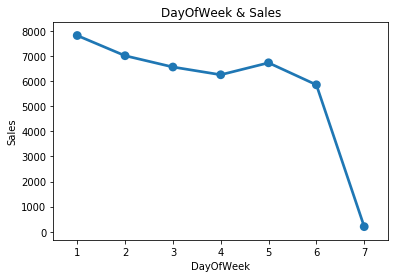

In [61]:
#一周不同的天平均每天每个店的销售情况
#sns.pointplot(data=data_train_new[::100],x='DayOfWeek',y='Sales') 让sns作groupby统计耗时非常长，所以需要先group不要做处理
df2=data_train_new.groupby('DayOfWeek')['Sales'].mean().reset_index()
sns.pointplot(data=df2,x='DayOfWeek',y='Sales')
plt.title('DayOfWeek & Sales')

   DayOfWeek  open_rate
0          1   0.950459
1          2   0.988309
2          3   0.974400
3          4   0.923199
4          5   0.950598
5          6   0.995357
6          7   0.024826


Text(0.5, 1.0, 'DayOfWeek open rate')

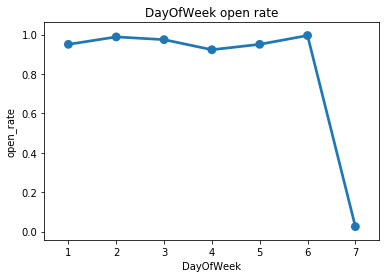

In [62]:
#一周的平均营业率
df3=data_train_new.groupby('DayOfWeek')['Open'].mean().reset_index().rename(columns={'Open':'open_rate'})
print(df3)
sns.pointplot(data=df3,x='DayOfWeek',y='open_rate')
plt.title('DayOfWeek open rate')

[Text(0.5, 1.0, 'Customers & sales')]

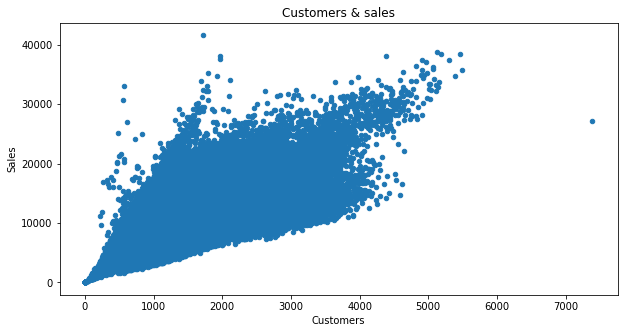

In [63]:
#顾客数与销售额的关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
data_train_new.plot.scatter(y='Sales',x='Customers',ax=ax)
ax.set(**{'title':'Customers & sales'})

[Text(0.5, 1.0, 'open & sales')]

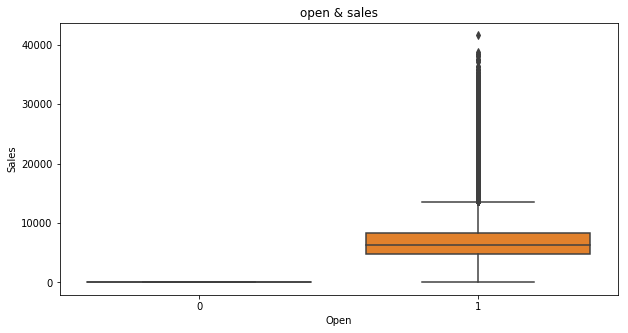

In [64]:
#探索是否营业与销售额关系
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
sns.boxplot(y='Sales',x='Open',data=data_train_new,ax=ax)
ax.set(**{'title':'open & sales'})

Text(0.5, 1.0, 'month-avg-sales')

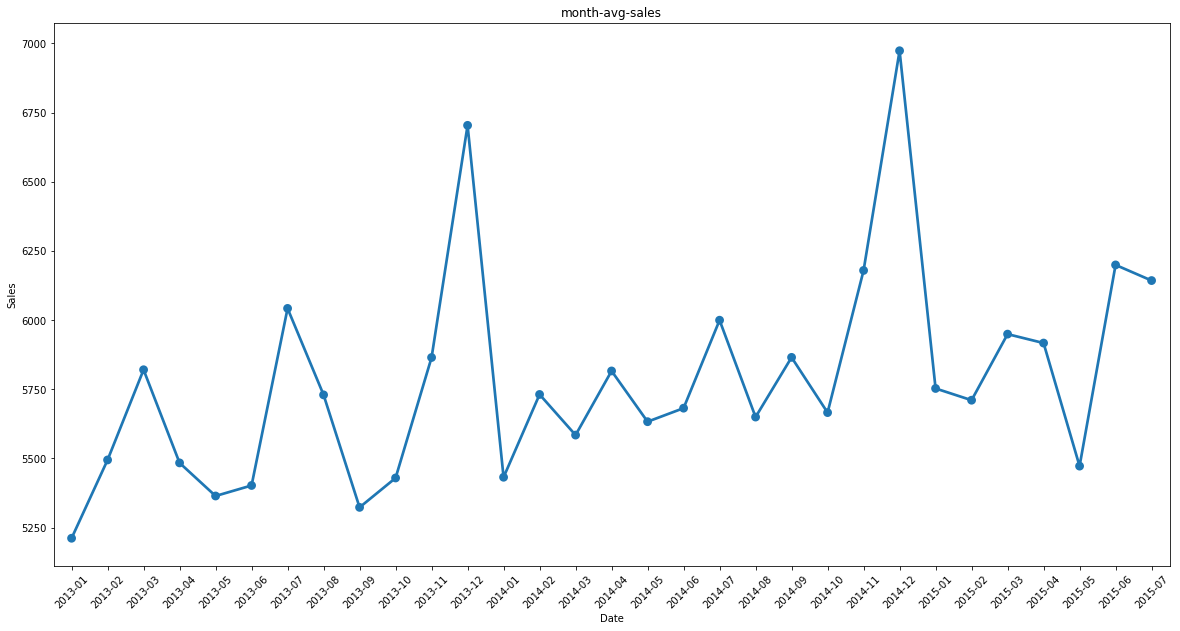

In [65]:
#探索每个月平均销售情况
df4=data_train_new.groupby('Date')['Sales'].mean().resample('M',kind='period').mean().reset_index()#resample能够把聚合时间变成月份，去除日
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(1,1,1)
sns.pointplot(data=df4,x='Date',y='Sales',ax=ax)
plt.xticks(rotation=45)
ax.set_title('month-avg-sales')


In [14]:
#进入特征构建过程
#将数据分为训练集与测试集进行特征构建
#将数据先按照日期进行排序，然后取前面的作为训练集，后面6周的数据作为测试集
data_train_new = data_train_new.sort_values(['Date'],ascending = False)
ho_test = data_train_new[:6*7*1115]
ho_train = data_train_new[6*7*1115:]

In [15]:
#对于不开的店铺，销量是0，并没有分析的价值，这里直接将对应的数据去掉
ho_test = ho_test[ho_test["Open"] != 0]
ho_test = ho_test[ho_test["Sales"] > 0]
ho_train = ho_train[ho_train["Open"] != 0]
ho_train = ho_train[ho_train["Sales"] > 0]

In [16]:
#检查一下train和test数据集
ho_test.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0        1          5 2015-07-31   5263        555     1      1            0   
742    743          5 2015-07-31   5085        501     1      1            0   
748    749          5 2015-07-31   6612        716     1      1            0   
747    748          5 2015-07-31   7481        578     1      1            0   
746    747          5 2015-07-31  10708        826     1      1            0   

     SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                1         c          a               1270.0   
742              1         a          a               6710.0   
748              1         a          a               3410.0   
747              1         d          a               2380.0   
746              1         c          c              45740.0   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9.0                    2008.0       0   
742                       11.0                    2003.0       1   
748                        8.0                    2011.0       1   
747                        3.0                    2010.0       1   
746                        8.0                    2008.0       0   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0                0.0              0.0                0  
742             14.0           2012.0  Jan,Apr,Jul,Oct  
748             14.0           2015.0  Jan,Apr,Jul,Oct  
747             14.0           2011.0  Jan,Apr,Jul,Oct  
746              0.0              0.0                0

In [17]:
ho_train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
47570    741          5 2015-06-19   7329        938     1      1   
47576    747          5 2015-06-19   9367        783     1      1   
47575    746          5 2015-06-19   7856        576     1      1   
47574    745          5 2015-06-19   8074        744     1      1   
47573    744          5 2015-06-19   8626        913     1      1   

      StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
47570            0              0         d          c              11900.0   
47576            0              0         c          c              45740.0   
47575            0              0         d          c               4330.0   
47574            0              0         a          a              17650.0   
47573            0              0         a          a               1370.0   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
47570                        0.0                       0.0       0   
47576                        8.0                    2008.0       0   
47575                        2.0                    2011.0       1   
47574                       11.0                    2013.0       1   
47573                       12.0                    2011.0       1   

       Promo2SinceWeek  Promo2SinceYear     PromoInterval  
47570              0.0              0.0                 0  
47576              0.0              0.0                 0  
47575             35.0           2011.0  Mar,Jun,Sept,Dec  
47574             37.0           2009.0   Jan,Apr,Jul,Oct  
47573             40.0           2014.0   Jan,Apr,Jul,Oct

In [18]:
#开始进行特征工程的构建
def features_create(data):
    
    #将存在其他字符表示分类的特征转化为数字
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    
    #将时间特征进行拆分和转化，并加入'WeekOfYear'特征
    data['Year'] = data.Date.dt.year
    data['Month'] = data.Date.dt.month
    data['Day'] = data.Date.dt.day
    data['DayOfWeek'] = data.Date.dt.dayofweek
    data['WeekOfYear'] = data.Date.dt.weekofyear
    
    
    #新增'CompetitionOpen'和'PromoOpen'特征,计算某天某店铺的竞争对手已营业时间和店铺已促销时间，用月为单位表示
    data['CompetitionOpen'] = 12 * (data.Year - data.CompetitionOpenSinceYear) +         (data.Month - data.CompetitionOpenSinceMonth)
    data['PromoOpen'] = 12 * (data.Year - data.Promo2SinceYear) +         (data.WeekOfYear - data.Promo2SinceWeek) / 4.0
    data['CompetitionOpen'] = data.CompetitionOpen.apply(lambda x: x if x > 0 else 0)        
    data['PromoOpen'] = data.PromoOpen.apply(lambda x: x if x > 0 else 0)
    
    
    #将'PromoInterval'特征转化为'IsPromoMonth'特征,表示某天某店铺是否处于促销月，1表示是，0表示否
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    data['monthStr'] = data.Month.map(month2str)
    data.loc[data.PromoInterval == 0, 'PromoInterval'] = ''
    data['IsPromoMonth'] = 0
    for interval in data.PromoInterval.unique():
        if interval != '':
            for month in interval.split(','):
                data.loc[(data.monthStr == month) & (data.PromoInterval == interval), 'IsPromoMonth'] = 1
 
    return data

In [19]:
#对训练数据和测试数据集合使用特征工程
print('Features creation begin')
features_create(ho_train)
features_create(ho_test)
features_create(data_test_new)
print('Features creation finished')

Features creation begin
Features creation finished


In [21]:
#将无用的特征去除掉
ho_train.drop(['Date','Store','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)
ho_test.drop(['Date','Store','Customers','Open','PromoInterval','monthStr'],axis=1,inplace =True)

In [25]:
ho_train.head()

DayOfWeek  Sales  Promo  StateHoliday  SchoolHoliday  StoreType  \
47570          4   7329      1             0              0          4   
47576          4   9367      1             0              0          3   
47575          4   7856      1             0              0          4   
47574          4   8074      1             0              0          1   
47573          4   8626      1             0              0          1   

       Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
47570           3              11900.0                        0.0   
47576           3              45740.0                        8.0   
47575           3               4330.0                        2.0   
47574           1              17650.0                       11.0   
47573           1               1370.0                       12.0   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
47570                       0.0       0              0.0              0.0   
47576                    2008.0       0              0.0              0.0   
47575                    2011.0       1             35.0           2011.0   
47574                    2013.0       1             37.0           2009.0   
47573                    2011.0       1             40.0           2014.0   

       Year  Month  Day  WeekOfYear  CompetitionOpen  PromoOpen  IsPromoMonth  
47570  2015      6   19          25          24186.0   24186.25             0  
47576  2015      6   19          25             82.0   24186.25             0  
47575  2015      6   19          25             52.0      45.50             1  
47574  2015      6   19          25             19.0      69.00             0  
47573  2015      6   19          25             42.0       8.25             0

In [23]:
#对要计算的结果，也把对应的特征删掉
xtest =data_test_new.drop(['Id','Store','Date','Open','PromoInterval','monthStr'],axis = 1)
#data_test_new.head()

In [24]:
xtest.head()

DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType  Assortment  \
0          3      1             0              0          3           1   
1          3      1             0              0          1           1   
2          3      1             0              0          1           3   
3          3      1             0              0          1           1   
4          3      1             0              0          1           3   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1              14130.0                       12.0                    2006.0   
2              24000.0                        4.0                    2013.0   
3               7520.0                       10.0                    2014.0   
4               2030.0                        8.0                    2000.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  WeekOfYear  \
0       0              0.0              0.0  2015      9   17          38   
1       1             14.0           2011.0  2015      9   17          38   
2       0              0.0              0.0  2015      9   17          38   
3       0              0.0              0.0  2015      9   17          38   
4       0              0.0              0.0  2015      9   17          38   

   CompetitionOpen  PromoOpen  IsPromoMonth  
0             84.0    24189.5             0  
1            105.0       54.0             0  
2             29.0    24189.5             0  
3             11.0    24189.5             0  
4            181.0    24189.5             0

In [73]:
#观察去除掉之后的情况
ho_train.head()

Store  DayOfWeek  Sales  Promo StateHoliday  SchoolHoliday  StoreType  \
47570    741          4   7329      1            0              0          4   
47576    747          4   9367      1            0              0          3   
47575    746          4   7856      1            0              0          4   
47574    745          4   8074      1            0              0          1   
47573    744          4   8626      1            0              0          1   

      Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  Promo2  \
47570          3              11900.0                        0.0  ...       0   
47576          3              45740.0                        8.0  ...       0   
47575          3               4330.0                        2.0  ...       1   
47574          1              17650.0                       11.0  ...       1   
47573          1               1370.0                       12.0  ...       1   

       Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  WeekOfYear  \
47570              0.0              0.0  2015      6   19          25   
47576              0.0              0.0  2015      6   19          25   
47575             35.0           2011.0  2015      6   19          25   
47574             37.0           2009.0  2015      6   19          25   
47573             40.0           2014.0  2015      6   19          25   

       CompetitionOpen  PromoOpen  IsPromoMonth  
47570          24186.0   24186.25             0  
47576             82.0   24186.25             0  
47575             52.0      45.50             1  
47574             19.0      69.00             0  
47573             42.0       8.25             0  

[5 rows x 21 columns]

In [74]:
ho_test.head()

Store  DayOfWeek  Sales  Promo  StateHoliday  SchoolHoliday  StoreType  \
0        1          4   5263      1             0              1          3   
742    743          4   5085      1             0              1          1   
748    749          4   6612      1             0              1          1   
747    748          4   7481      1             0              1          4   
746    747          4  10708      1             0              1          3   

    Assortment  CompetitionDistance  CompetitionOpenSinceMonth  ...  Promo2  \
0            1               1270.0                        9.0  ...       0   
742          1               6710.0                       11.0  ...       1   
748          1               3410.0                        8.0  ...       1   
747          1               2380.0                        3.0  ...       1   
746          3              45740.0                        8.0  ...       0   

     Promo2SinceWeek  Promo2SinceYear  Year  Month  Day  WeekOfYear  \
0                0.0              0.0  2015      7   31          31   
742             14.0           2012.0  2015      7   31          31   
748             14.0           2015.0  2015      7   31          31   
747             14.0           2011.0  2015      7   31          31   
746              0.0              0.0  2015      7   31          31   

     CompetitionOpen  PromoOpen  IsPromoMonth  
0               82.0   24187.75             0  
742            140.0      40.25             1  
748             47.0       4.25             1  
747             64.0      52.25             1  
746             83.0   24187.75             0  

[5 rows x 21 columns]

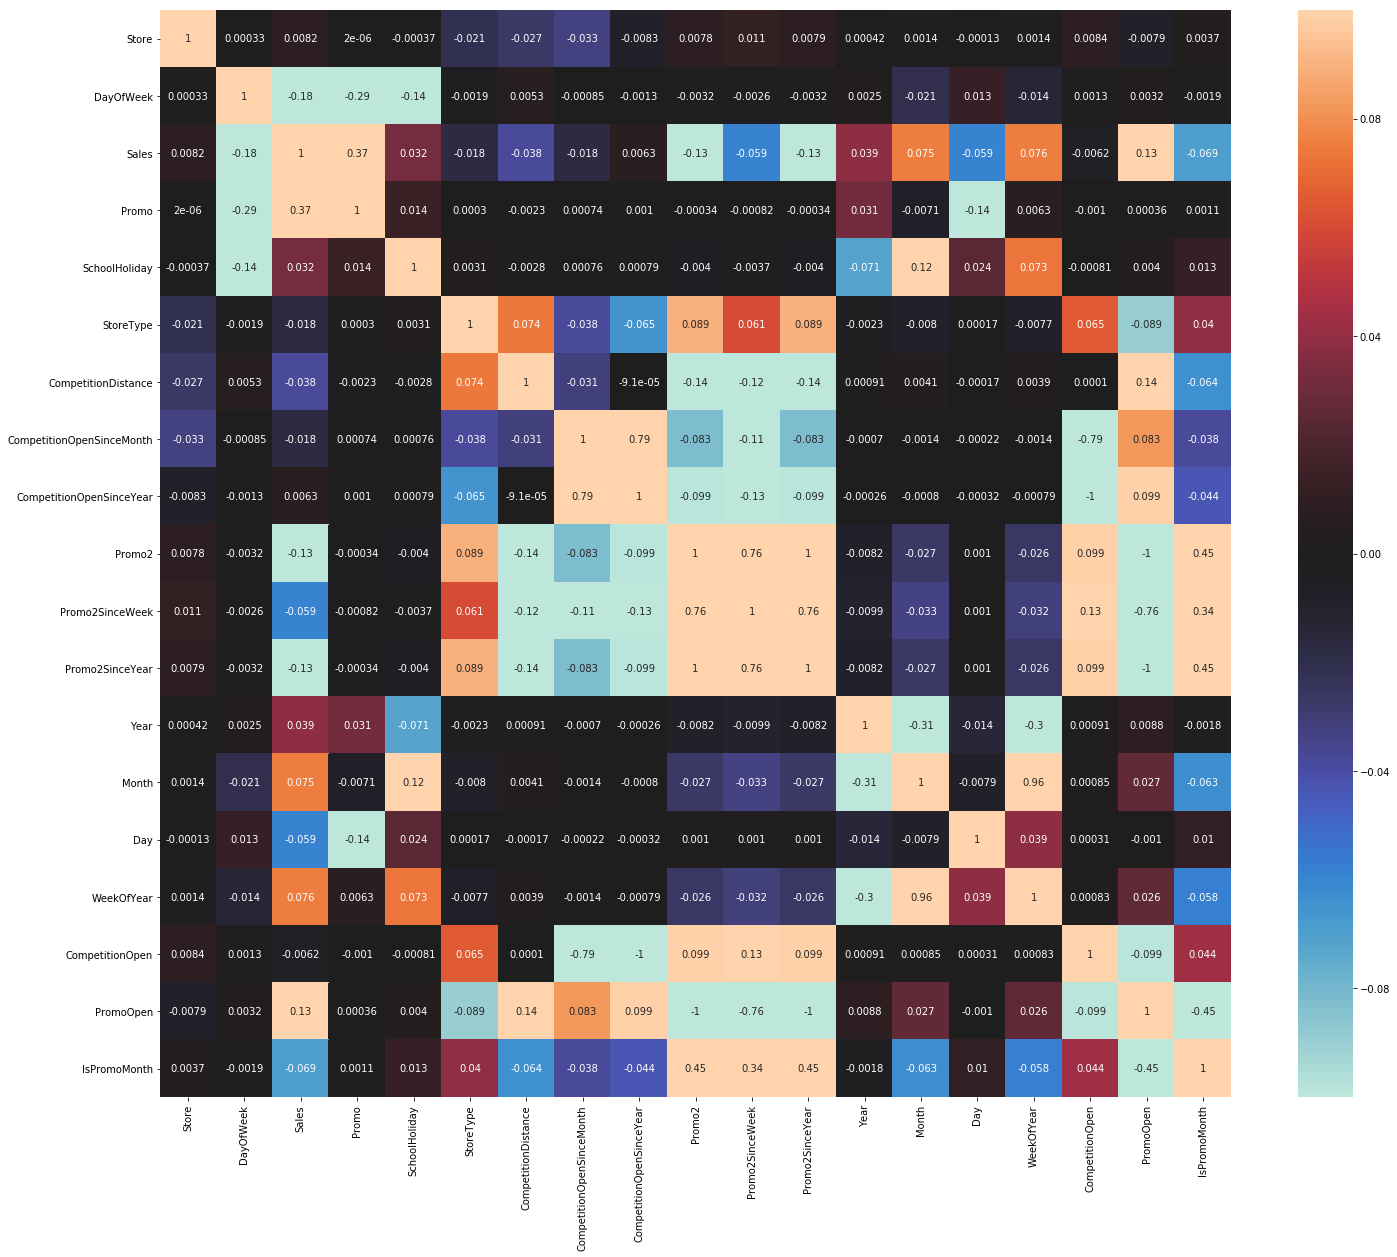

In [75]:
#观察特征之间的相关性
plt.subplots(figsize=(24,20))
sns.heatmap(ho_train.corr(),annot=True, vmin=-0.1, vmax=0.1,center=0)

与销量相关性最强的特征为 打折 Promo，以及开启的月份

In [26]:
#将预测的标签与特征分开，并将标签进行对数处理，方便进行计算
ho_xtrain = ho_train.drop(['Sales'],axis=1 )
ho_ytrain = np.log1p(ho_train.Sales)
ho_xtest = ho_test.drop(['Sales'],axis=1 )
ho_ytest = np.log1p(ho_test.Sales)

In [28]:
#自定义评估函数（rmspe）
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))
 
def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [29]:
#基准模型，采用线性回归建模
from sklearn.linear_model import LinearRegression
import time
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split


lr_model=LinearRegression()
lr_model.fit(ho_xtrain, ho_ytrain) 
print('系数矩阵:\n',lr_model.coef_)
print('线性回归模型:\n',lr_model)
y_lr_predict=lr_model.predict(ho_xtest)
error = rmspe(ho_ytest,y_lr_predict)
print("rmspe---lr_model:\n",error)

y_lr_predict=lr_model.predict(ho_xtrain)
error = rmspe(ho_ytrain,y_lr_predict)
print("rmspe---lr_model:\n",error)



系数矩阵:
 [-1.97738183e-02  3.21307945e-01  7.11299772e-02  1.80905428e-02
  2.56263880e-03  5.96102968e-02 -3.93644649e-06 -3.75182482e-03
  2.22479541e-02  3.42149267e+01  4.63707769e-03  8.98553445e-02
 -8.33798745e-02  6.78056184e-03 -6.75660142e-04 -1.48582285e-03
  1.85223752e-03  8.91233301e-03 -9.36580323e-03]
线性回归模型:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
rmspe---lr_model:
 0.04218993738960824
rmspe---lr_model:
 0.043570123723243134


In [30]:
test_probs = lr_model.predict(xtest)
result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
result.to_csv("Rossmann_submission_lr.csv", index=False)

In [31]:
#设置一组参数 输入到模型中
eta_list = [0.03,0.005]
max_depth_list = [10,15]
#max_depth_list = [10]
subsample_list = [0.8,0.9]
#subsample_list = [0.8]
colsample_bytree_list = [0.7,0.8,0.9]
#colsample_bytree_list = [0.7]
#num_boost_round_list = [6000,20000]

In [35]:
dict_params = {}

idx = 1
for eta in eta_list:
    for max_depth in max_depth_list:
        for subsample in subsample_list:
            for colsample_bytree in colsample_bytree_list:
                   # if eta == 0.03 and max_depth == 10 and subsample == 0.8 and colsample_bytree == 0.7:continue
                    if idx not in dict_params:
                        dict_params[idx] = {
                            "objective": "reg:linear",
                            "booster" : "gbtree",
                            "eta": eta,
                            "max_depth": max_depth,
                            "subsample": subsample,
                            "colsample_bytree": colsample_bytree,
                            "silent": 1,
                            "seed": 10
                                          }
                        idx += 1 
                     
                

In [36]:
dict_params

{1: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10},
 2: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.8,
  'silent': 1,
  'seed': 10},
 3: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.8,
  'colsample_bytree': 0.9,
  'silent': 1,
  'seed': 10},
 4: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.7,
  'silent': 1,
  'seed': 10},
 5: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.8,
  'silent': 1,
  'seed': 10},
 6: {'objective': 'reg:linear',
  'booster': 'gbtree',
  'eta': 0.03,
  'max_depth': 10,
  'subsample': 0.9,
  'colsample_bytree': 0.9,
  'silent': 1,
  'seed': 10},
 7: 

In [37]:
import xgboost as xgb

dtrain = xgb.DMatrix(ho_xtrain.values, ho_ytrain.values)
dvalid = xgb.DMatrix(ho_xtest.values, ho_ytest.values)
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

In [38]:
dtrain

In [39]:
import datetime
#训练模型
gbm_list = []
print("Train  XGBoost model")


for key in dict_params:
    params = dict_params[key]
    print(params) 
    print("begins-----")
    start = datetime.datetime.now()
    
    if params['eta'] == 0.005:
        num_boost_round = 50000
        early_stopping_rounds = 5000
    else:
        num_boost_round = 20000
        early_stopping_rounds = 2000
        
    
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,early_stopping_rounds=early_stopping_rounds, feval=rmspe_xg, verbose_eval=True)
    end = datetime.datetime.now()
    
    print(str(key) + '----------Training time is {:2f} s.'.format((end-start).total_seconds()))
    gbm_list.append([key,gbm])

Train  XGBoost model
{'objective': 'reg:linear', 'booster': 'gbtree', 'eta': 0.03, 'max_depth': 10, 'subsample': 0.8, 'colsample_bytree': 0.7, 'silent': 1, 'seed': 10}
begins-----
[0]	train-rmse:8.02076	eval-rmse:8.0278	train-rmspe:0.999809	eval-rmspe:0.999811
Multiple eval metrics have been passed: 'eval-rmspe' will be used for early stopping.

Will train until eval-rmspe hasn't improved in 1000 rounds.
[1]	train-rmse:7.78069	eval-rmse:7.78751	train-rmspe:0.99971	eval-rmspe:0.999714
[2]	train-rmse:7.54782	eval-rmse:7.55431	train-rmspe:0.99959	eval-rmspe:0.999595
[3]	train-rmse:7.3219	eval-rmse:7.32857	train-rmspe:0.999443	eval-rmspe:0.99945
[4]	train-rmse:7.10278	eval-rmse:7.10934	train-rmspe:0.999266	eval-rmspe:0.999274
[5]	train-rmse:6.89019	eval-rmse:6.89703	train-rmspe:0.999053	eval-rmspe:0.999064
[6]	train-rmse:6.6841	eval-rmse:6.68968	train-rmspe:0.998798	eval-rmspe:0.99881
[7]	train-rmse:6.48416	eval-rmse:6.48941	train-rmspe:0.998496	eval-rmspe:0.998511
[8]	train-rmse:6.29018	e

[95]	train-rmse:0.514502	eval-rmse:0.50716	train-rmspe:0.393433	eval-rmspe:0.376859
[96]	train-rmse:0.502611	eval-rmse:0.495408	train-rmspe:0.387106	eval-rmspe:0.370044
[97]	train-rmse:0.49132	eval-rmse:0.484199	train-rmspe:0.38107	eval-rmspe:0.363496
[98]	train-rmse:0.48043	eval-rmse:0.473554	train-rmspe:0.375271	eval-rmspe:0.357272
[99]	train-rmse:0.469929	eval-rmse:0.463411	train-rmspe:0.369647	eval-rmspe:0.351295
[100]	train-rmse:0.459596	eval-rmse:0.453231	train-rmspe:0.364184	eval-rmspe:0.345318
[101]	train-rmse:0.449787	eval-rmse:0.443422	train-rmspe:0.358935	eval-rmspe:0.339518
[102]	train-rmse:0.440376	eval-rmse:0.434314	train-rmspe:0.35405	eval-rmspe:0.334144
[103]	train-rmse:0.431107	eval-rmse:0.425186	train-rmspe:0.349128	eval-rmspe:0.32874
[104]	train-rmse:0.422565	eval-rmse:0.416549	train-rmspe:0.344622	eval-rmspe:0.323638
[105]	train-rmse:0.414243	eval-rmse:0.408124	train-rmspe:0.340212	eval-rmspe:0.318678
[106]	train-rmse:0.405996	eval-rmse:0.400073	train-rmspe:0.335919

[191]	train-rmse:0.20917	eval-rmse:0.216619	train-rmspe:0.259687	eval-rmspe:0.229118
[192]	train-rmse:0.20836	eval-rmse:0.215913	train-rmspe:0.259241	eval-rmspe:0.228569
[193]	train-rmse:0.207543	eval-rmse:0.215217	train-rmspe:0.258569	eval-rmspe:0.227997
[194]	train-rmse:0.207217	eval-rmse:0.215069	train-rmspe:0.258519	eval-rmspe:0.228103
[195]	train-rmse:0.206697	eval-rmse:0.21462	train-rmspe:0.258258	eval-rmspe:0.227776
[196]	train-rmse:0.205979	eval-rmse:0.214022	train-rmspe:0.257867	eval-rmspe:0.227316
[197]	train-rmse:0.20534	eval-rmse:0.213491	train-rmspe:0.257329	eval-rmspe:0.226888
[198]	train-rmse:0.204402	eval-rmse:0.212668	train-rmspe:0.256468	eval-rmspe:0.226138
[199]	train-rmse:0.203481	eval-rmse:0.211807	train-rmspe:0.255933	eval-rmspe:0.225425
[200]	train-rmse:0.203296	eval-rmse:0.211657	train-rmspe:0.255958	eval-rmspe:0.225473
[201]	train-rmse:0.20304	eval-rmse:0.211493	train-rmspe:0.25583	eval-rmspe:0.225505
[202]	train-rmse:0.202889	eval-rmse:0.211452	train-rmspe:0.2

[287]	train-rmse:0.169257	eval-rmse:0.182391	train-rmspe:0.22354	eval-rmspe:0.198738
[288]	train-rmse:0.168801	eval-rmse:0.181966	train-rmspe:0.223153	eval-rmspe:0.198316
[289]	train-rmse:0.16854	eval-rmse:0.181749	train-rmspe:0.222848	eval-rmspe:0.198093
[290]	train-rmse:0.168273	eval-rmse:0.181537	train-rmspe:0.222273	eval-rmspe:0.19788
[291]	train-rmse:0.167708	eval-rmse:0.180987	train-rmspe:0.221817	eval-rmspe:0.197284
[292]	train-rmse:0.167104	eval-rmse:0.180466	train-rmspe:0.221156	eval-rmspe:0.196712
[293]	train-rmse:0.166882	eval-rmse:0.180279	train-rmspe:0.220868	eval-rmspe:0.196524
[294]	train-rmse:0.166551	eval-rmse:0.179979	train-rmspe:0.220595	eval-rmspe:0.196192
[295]	train-rmse:0.165851	eval-rmse:0.179346	train-rmspe:0.219936	eval-rmspe:0.195582
[296]	train-rmse:0.165552	eval-rmse:0.179078	train-rmspe:0.219675	eval-rmspe:0.195268
[297]	train-rmse:0.165292	eval-rmse:0.178829	train-rmspe:0.219449	eval-rmspe:0.194978
[298]	train-rmse:0.165204	eval-rmse:0.178716	train-rmspe:

[383]	train-rmse:0.14354	eval-rmse:0.160122	train-rmspe:0.182562	eval-rmspe:0.174623
[384]	train-rmse:0.143504	eval-rmse:0.160087	train-rmspe:0.182562	eval-rmspe:0.174594
[385]	train-rmse:0.143322	eval-rmse:0.159723	train-rmspe:0.182412	eval-rmspe:0.17424
[386]	train-rmse:0.14302	eval-rmse:0.159453	train-rmspe:0.182155	eval-rmspe:0.173947
[387]	train-rmse:0.142735	eval-rmse:0.159193	train-rmspe:0.18191	eval-rmspe:0.173674
[388]	train-rmse:0.142409	eval-rmse:0.158907	train-rmspe:0.18161	eval-rmspe:0.173347
[389]	train-rmse:0.142209	eval-rmse:0.158634	train-rmspe:0.181432	eval-rmspe:0.173069
[390]	train-rmse:0.14206	eval-rmse:0.1585	train-rmspe:0.181288	eval-rmspe:0.172903
[391]	train-rmse:0.141862	eval-rmse:0.158325	train-rmspe:0.181098	eval-rmspe:0.172681
[392]	train-rmse:0.141565	eval-rmse:0.158094	train-rmspe:0.180815	eval-rmspe:0.172435
[393]	train-rmse:0.141447	eval-rmse:0.158016	train-rmspe:0.180685	eval-rmspe:0.172354
[394]	train-rmse:0.141202	eval-rmse:0.157788	train-rmspe:0.180

[479]	train-rmse:0.129172	eval-rmse:0.148702	train-rmspe:0.163079	eval-rmspe:0.162198
[480]	train-rmse:0.129134	eval-rmse:0.148689	train-rmspe:0.163029	eval-rmspe:0.162175
[481]	train-rmse:0.128991	eval-rmse:0.148565	train-rmspe:0.162804	eval-rmspe:0.162057
[482]	train-rmse:0.128767	eval-rmse:0.148381	train-rmspe:0.162577	eval-rmspe:0.161851
[483]	train-rmse:0.128655	eval-rmse:0.148283	train-rmspe:0.162466	eval-rmspe:0.16176
[484]	train-rmse:0.128449	eval-rmse:0.148095	train-rmspe:0.162291	eval-rmspe:0.161554
[485]	train-rmse:0.128388	eval-rmse:0.148034	train-rmspe:0.162221	eval-rmspe:0.161459
[486]	train-rmse:0.128337	eval-rmse:0.147947	train-rmspe:0.162163	eval-rmspe:0.161329
[487]	train-rmse:0.128191	eval-rmse:0.147843	train-rmspe:0.162013	eval-rmspe:0.161221
[488]	train-rmse:0.128094	eval-rmse:0.147757	train-rmspe:0.161922	eval-rmspe:0.161121
[489]	train-rmse:0.128019	eval-rmse:0.147728	train-rmspe:0.161835	eval-rmspe:0.161045
[490]	train-rmse:0.127778	eval-rmse:0.147551	train-rmsp

[575]	train-rmse:0.119492	eval-rmse:0.141162	train-rmspe:0.152965	eval-rmspe:0.153501
[576]	train-rmse:0.119354	eval-rmse:0.141048	train-rmspe:0.152836	eval-rmspe:0.153364
[577]	train-rmse:0.119262	eval-rmse:0.140973	train-rmspe:0.151865	eval-rmspe:0.153285
[578]	train-rmse:0.119229	eval-rmse:0.140871	train-rmspe:0.15184	eval-rmspe:0.153166
[579]	train-rmse:0.119205	eval-rmse:0.140855	train-rmspe:0.151831	eval-rmspe:0.153152
[580]	train-rmse:0.119079	eval-rmse:0.140749	train-rmspe:0.151721	eval-rmspe:0.153039
[581]	train-rmse:0.119018	eval-rmse:0.140709	train-rmspe:0.151647	eval-rmspe:0.152996
[582]	train-rmse:0.11894	eval-rmse:0.140657	train-rmspe:0.151567	eval-rmspe:0.152959
[583]	train-rmse:0.118856	eval-rmse:0.140532	train-rmspe:0.151485	eval-rmspe:0.152793
[584]	train-rmse:0.118568	eval-rmse:0.14029	train-rmspe:0.151234	eval-rmspe:0.152505
[585]	train-rmse:0.118433	eval-rmse:0.140168	train-rmspe:0.151116	eval-rmspe:0.152376
[586]	train-rmse:0.118224	eval-rmse:0.139994	train-rmspe:

[671]	train-rmse:0.112077	eval-rmse:0.13585	train-rmspe:0.143744	eval-rmspe:0.147534
[672]	train-rmse:0.111984	eval-rmse:0.135778	train-rmspe:0.143662	eval-rmspe:0.147449
[673]	train-rmse:0.111945	eval-rmse:0.135746	train-rmspe:0.143616	eval-rmspe:0.147418
[674]	train-rmse:0.111933	eval-rmse:0.135734	train-rmspe:0.14363	eval-rmspe:0.147408
[675]	train-rmse:0.111877	eval-rmse:0.135692	train-rmspe:0.143578	eval-rmspe:0.147361
[676]	train-rmse:0.111851	eval-rmse:0.135652	train-rmspe:0.143565	eval-rmspe:0.147299
[677]	train-rmse:0.111817	eval-rmse:0.135654	train-rmspe:0.143511	eval-rmspe:0.147308
[678]	train-rmse:0.111737	eval-rmse:0.135593	train-rmspe:0.143441	eval-rmspe:0.147238
[679]	train-rmse:0.111681	eval-rmse:0.135568	train-rmspe:0.143375	eval-rmspe:0.147206
[680]	train-rmse:0.11165	eval-rmse:0.135552	train-rmspe:0.143344	eval-rmspe:0.147188
[681]	train-rmse:0.11161	eval-rmse:0.135537	train-rmspe:0.14329	eval-rmspe:0.14717
[682]	train-rmse:0.111596	eval-rmse:0.135524	train-rmspe:0.1

[767]	train-rmse:0.106536	eval-rmse:0.131977	train-rmspe:0.136629	eval-rmspe:0.14319
[768]	train-rmse:0.106481	eval-rmse:0.131939	train-rmspe:0.136576	eval-rmspe:0.143145
[769]	train-rmse:0.106462	eval-rmse:0.131926	train-rmspe:0.136582	eval-rmspe:0.143133
[770]	train-rmse:0.106454	eval-rmse:0.131923	train-rmspe:0.136579	eval-rmspe:0.143133
[771]	train-rmse:0.106434	eval-rmse:0.131914	train-rmspe:0.136566	eval-rmspe:0.143122
[772]	train-rmse:0.10639	eval-rmse:0.131887	train-rmspe:0.13653	eval-rmspe:0.143093
[773]	train-rmse:0.106343	eval-rmse:0.131858	train-rmspe:0.13645	eval-rmspe:0.143063
[774]	train-rmse:0.106321	eval-rmse:0.131881	train-rmspe:0.136418	eval-rmspe:0.143121
[775]	train-rmse:0.106285	eval-rmse:0.131875	train-rmspe:0.136378	eval-rmspe:0.143117
[776]	train-rmse:0.10628	eval-rmse:0.131869	train-rmspe:0.136373	eval-rmspe:0.143113
[777]	train-rmse:0.106196	eval-rmse:0.131816	train-rmspe:0.136302	eval-rmspe:0.143055
[778]	train-rmse:0.106187	eval-rmse:0.131737	train-rmspe:0.

[863]	train-rmse:0.102757	eval-rmse:0.129663	train-rmspe:0.12953	eval-rmspe:0.140688
[864]	train-rmse:0.102683	eval-rmse:0.129607	train-rmspe:0.129447	eval-rmspe:0.140625
[865]	train-rmse:0.102673	eval-rmse:0.129592	train-rmspe:0.129438	eval-rmspe:0.140599
[866]	train-rmse:0.102603	eval-rmse:0.12956	train-rmspe:0.129379	eval-rmspe:0.14057
[867]	train-rmse:0.10258	eval-rmse:0.129558	train-rmspe:0.129373	eval-rmspe:0.140572
[868]	train-rmse:0.10255	eval-rmse:0.129537	train-rmspe:0.129335	eval-rmspe:0.140533
[869]	train-rmse:0.102518	eval-rmse:0.129525	train-rmspe:0.1293	eval-rmspe:0.14051
[870]	train-rmse:0.10247	eval-rmse:0.129494	train-rmspe:0.12925	eval-rmspe:0.140485
[871]	train-rmse:0.102419	eval-rmse:0.129515	train-rmspe:0.129189	eval-rmspe:0.140526
[872]	train-rmse:0.102393	eval-rmse:0.129492	train-rmspe:0.129163	eval-rmspe:0.140503
[873]	train-rmse:0.102351	eval-rmse:0.129472	train-rmspe:0.129128	eval-rmspe:0.140479
[874]	train-rmse:0.102287	eval-rmse:0.12943	train-rmspe:0.129056

[959]	train-rmse:0.098999	eval-rmse:0.127558	train-rmspe:0.125446	eval-rmspe:0.138343
[960]	train-rmse:0.098972	eval-rmse:0.127541	train-rmspe:0.125421	eval-rmspe:0.138327
[961]	train-rmse:0.098949	eval-rmse:0.127528	train-rmspe:0.125401	eval-rmspe:0.138312
[962]	train-rmse:0.098892	eval-rmse:0.127492	train-rmspe:0.125351	eval-rmspe:0.138272
[963]	train-rmse:0.098858	eval-rmse:0.127472	train-rmspe:0.125307	eval-rmspe:0.138251
[964]	train-rmse:0.098841	eval-rmse:0.12748	train-rmspe:0.12529	eval-rmspe:0.138265
[965]	train-rmse:0.098819	eval-rmse:0.12743	train-rmspe:0.125265	eval-rmspe:0.138199
[966]	train-rmse:0.098787	eval-rmse:0.127432	train-rmspe:0.12524	eval-rmspe:0.138208
[967]	train-rmse:0.098779	eval-rmse:0.127431	train-rmspe:0.12523	eval-rmspe:0.138206
[968]	train-rmse:0.098689	eval-rmse:0.127384	train-rmspe:0.125137	eval-rmspe:0.138154
[969]	train-rmse:0.098646	eval-rmse:0.127344	train-rmspe:0.125094	eval-rmspe:0.138106
[970]	train-rmse:0.098609	eval-rmse:0.127323	train-rmspe:0.

[1055]	train-rmse:0.096186	eval-rmse:0.126128	train-rmspe:0.121122	eval-rmspe:0.136779
[1056]	train-rmse:0.096166	eval-rmse:0.126114	train-rmspe:0.1211	eval-rmspe:0.136751
[1057]	train-rmse:0.096117	eval-rmse:0.126075	train-rmspe:0.121057	eval-rmspe:0.136713
[1058]	train-rmse:0.096083	eval-rmse:0.126066	train-rmspe:0.12103	eval-rmspe:0.136703
[1059]	train-rmse:0.096064	eval-rmse:0.126056	train-rmspe:0.120999	eval-rmspe:0.136691
[1060]	train-rmse:0.09603	eval-rmse:0.126041	train-rmspe:0.120958	eval-rmspe:0.136675
[1061]	train-rmse:0.096012	eval-rmse:0.126037	train-rmspe:0.120931	eval-rmspe:0.136671
[1062]	train-rmse:0.09599	eval-rmse:0.126033	train-rmspe:0.120904	eval-rmspe:0.136682
[1063]	train-rmse:0.095935	eval-rmse:0.125965	train-rmspe:0.12078	eval-rmspe:0.136582
[1064]	train-rmse:0.0959	eval-rmse:0.125943	train-rmspe:0.120733	eval-rmspe:0.136562
[1065]	train-rmse:0.095895	eval-rmse:0.125941	train-rmspe:0.120729	eval-rmspe:0.136559
[1066]	train-rmse:0.095865	eval-rmse:0.125927	train

[1150]	train-rmse:0.093663	eval-rmse:0.124634	train-rmspe:0.117636	eval-rmspe:0.135114
[1151]	train-rmse:0.093652	eval-rmse:0.124635	train-rmspe:0.117628	eval-rmspe:0.135116
[1152]	train-rmse:0.093621	eval-rmse:0.124629	train-rmspe:0.11757	eval-rmspe:0.135107
[1153]	train-rmse:0.0936	eval-rmse:0.124649	train-rmspe:0.117547	eval-rmspe:0.135125
[1154]	train-rmse:0.093567	eval-rmse:0.124654	train-rmspe:0.117499	eval-rmspe:0.13513
[1155]	train-rmse:0.093545	eval-rmse:0.124646	train-rmspe:0.117478	eval-rmspe:0.135124
[1156]	train-rmse:0.093512	eval-rmse:0.124632	train-rmspe:0.11744	eval-rmspe:0.135103
[1157]	train-rmse:0.09349	eval-rmse:0.124626	train-rmspe:0.117409	eval-rmspe:0.135077
[1158]	train-rmse:0.093466	eval-rmse:0.124615	train-rmspe:0.117385	eval-rmspe:0.135069
[1159]	train-rmse:0.09345	eval-rmse:0.12463	train-rmspe:0.11737	eval-rmspe:0.135093
[1160]	train-rmse:0.093429	eval-rmse:0.124632	train-rmspe:0.117336	eval-rmspe:0.135094
[1161]	train-rmse:0.093415	eval-rmse:0.124629	train-

[1245]	train-rmse:0.091452	eval-rmse:0.123836	train-rmspe:0.114045	eval-rmspe:0.134298
[1246]	train-rmse:0.09141	eval-rmse:0.123808	train-rmspe:0.114007	eval-rmspe:0.134271
[1247]	train-rmse:0.091388	eval-rmse:0.123795	train-rmspe:0.113988	eval-rmspe:0.134262
[1248]	train-rmse:0.091375	eval-rmse:0.123797	train-rmspe:0.113975	eval-rmspe:0.134264
[1249]	train-rmse:0.091351	eval-rmse:0.123763	train-rmspe:0.113944	eval-rmspe:0.13421
[1250]	train-rmse:0.09132	eval-rmse:0.123749	train-rmspe:0.113912	eval-rmspe:0.134194
[1251]	train-rmse:0.091292	eval-rmse:0.123748	train-rmspe:0.113743	eval-rmspe:0.1342
[1252]	train-rmse:0.091268	eval-rmse:0.123729	train-rmspe:0.11372	eval-rmspe:0.13418
[1253]	train-rmse:0.091259	eval-rmse:0.123725	train-rmspe:0.113703	eval-rmspe:0.134163
[1254]	train-rmse:0.091237	eval-rmse:0.123721	train-rmspe:0.113683	eval-rmspe:0.134167
[1255]	train-rmse:0.091229	eval-rmse:0.123722	train-rmspe:0.113544	eval-rmspe:0.134168
[1256]	train-rmse:0.091204	eval-rmse:0.123716	trai

[1340]	train-rmse:0.089407	eval-rmse:0.122985	train-rmspe:0.109213	eval-rmspe:0.133417
[1341]	train-rmse:0.089395	eval-rmse:0.122986	train-rmspe:0.109194	eval-rmspe:0.133419
[1342]	train-rmse:0.089375	eval-rmse:0.122983	train-rmspe:0.109136	eval-rmspe:0.133415
[1343]	train-rmse:0.08936	eval-rmse:0.122985	train-rmspe:0.109121	eval-rmspe:0.13342
[1344]	train-rmse:0.089342	eval-rmse:0.122975	train-rmspe:0.109102	eval-rmspe:0.133408
[1345]	train-rmse:0.089308	eval-rmse:0.122954	train-rmspe:0.10907	eval-rmspe:0.133387
[1346]	train-rmse:0.089291	eval-rmse:0.122945	train-rmspe:0.10905	eval-rmspe:0.133374
[1347]	train-rmse:0.089278	eval-rmse:0.122933	train-rmspe:0.109037	eval-rmspe:0.133353
[1348]	train-rmse:0.089264	eval-rmse:0.122931	train-rmspe:0.109018	eval-rmspe:0.133349
[1349]	train-rmse:0.08925	eval-rmse:0.122915	train-rmspe:0.109004	eval-rmspe:0.133332
[1350]	train-rmse:0.089228	eval-rmse:0.122908	train-rmspe:0.108972	eval-rmspe:0.13333
[1351]	train-rmse:0.089211	eval-rmse:0.122905	tra

[1435]	train-rmse:0.087828	eval-rmse:0.122357	train-rmspe:0.107036	eval-rmspe:0.13267
[1436]	train-rmse:0.087825	eval-rmse:0.122355	train-rmspe:0.107034	eval-rmspe:0.132669
[1437]	train-rmse:0.087811	eval-rmse:0.122351	train-rmspe:0.10702	eval-rmspe:0.132667
[1438]	train-rmse:0.0878	eval-rmse:0.122352	train-rmspe:0.107003	eval-rmspe:0.132669
[1439]	train-rmse:0.087787	eval-rmse:0.122354	train-rmspe:0.106991	eval-rmspe:0.132672
[1440]	train-rmse:0.087766	eval-rmse:0.12234	train-rmspe:0.106922	eval-rmspe:0.13265
[1441]	train-rmse:0.087752	eval-rmse:0.122323	train-rmspe:0.106906	eval-rmspe:0.132612
[1442]	train-rmse:0.087737	eval-rmse:0.122318	train-rmspe:0.106885	eval-rmspe:0.132607
[1443]	train-rmse:0.087728	eval-rmse:0.122313	train-rmspe:0.106877	eval-rmspe:0.132603
[1444]	train-rmse:0.087706	eval-rmse:0.122299	train-rmspe:0.106856	eval-rmspe:0.132591
[1445]	train-rmse:0.087692	eval-rmse:0.122295	train-rmspe:0.106837	eval-rmspe:0.132586
[1446]	train-rmse:0.087683	eval-rmse:0.122291	tra

[1530]	train-rmse:0.086222	eval-rmse:0.12175	train-rmspe:0.104223	eval-rmspe:0.131973
[1531]	train-rmse:0.086209	eval-rmse:0.121747	train-rmspe:0.104214	eval-rmspe:0.131971
[1532]	train-rmse:0.086199	eval-rmse:0.121746	train-rmspe:0.104203	eval-rmspe:0.131969
[1533]	train-rmse:0.086184	eval-rmse:0.121742	train-rmspe:0.104172	eval-rmspe:0.131967
[1534]	train-rmse:0.086175	eval-rmse:0.121736	train-rmspe:0.104158	eval-rmspe:0.131959
[1535]	train-rmse:0.086165	eval-rmse:0.121737	train-rmspe:0.104151	eval-rmspe:0.131965
[1536]	train-rmse:0.086156	eval-rmse:0.121734	train-rmspe:0.104143	eval-rmspe:0.131962
[1537]	train-rmse:0.08615	eval-rmse:0.121732	train-rmspe:0.103924	eval-rmspe:0.131961
[1538]	train-rmse:0.08613	eval-rmse:0.121721	train-rmspe:0.1039	eval-rmspe:0.13195
[1539]	train-rmse:0.086113	eval-rmse:0.121712	train-rmspe:0.103881	eval-rmspe:0.13194
[1540]	train-rmse:0.08609	eval-rmse:0.121703	train-rmspe:0.103856	eval-rmspe:0.131932
[1541]	train-rmse:0.086079	eval-rmse:0.121709	train

[1625]	train-rmse:0.084895	eval-rmse:0.121329	train-rmspe:0.101424	eval-rmspe:0.131627
[1626]	train-rmse:0.084885	eval-rmse:0.121403	train-rmspe:0.101409	eval-rmspe:0.131723
[1627]	train-rmse:0.084878	eval-rmse:0.121402	train-rmspe:0.101282	eval-rmspe:0.131723
[1628]	train-rmse:0.084854	eval-rmse:0.12139	train-rmspe:0.101256	eval-rmspe:0.131709
[1629]	train-rmse:0.084828	eval-rmse:0.12138	train-rmspe:0.101232	eval-rmspe:0.1317
[1630]	train-rmse:0.084812	eval-rmse:0.121373	train-rmspe:0.100853	eval-rmspe:0.131695
[1631]	train-rmse:0.084797	eval-rmse:0.121366	train-rmspe:0.100835	eval-rmspe:0.131689
[1632]	train-rmse:0.084784	eval-rmse:0.12136	train-rmspe:0.100817	eval-rmspe:0.131674
[1633]	train-rmse:0.084771	eval-rmse:0.121356	train-rmspe:0.1008	eval-rmspe:0.131671
[1634]	train-rmse:0.084754	eval-rmse:0.121348	train-rmspe:0.100778	eval-rmspe:0.13166
[1635]	train-rmse:0.084736	eval-rmse:0.121339	train-rmspe:0.100761	eval-rmspe:0.131654
[1636]	train-rmse:0.084719	eval-rmse:0.121335	train

[1720]	train-rmse:0.083597	eval-rmse:0.121071	train-rmspe:0.098191	eval-rmspe:0.131356
[1721]	train-rmse:0.083589	eval-rmse:0.121073	train-rmspe:0.098181	eval-rmspe:0.131359
[1722]	train-rmse:0.083575	eval-rmse:0.121061	train-rmspe:0.098168	eval-rmspe:0.13135
[1723]	train-rmse:0.083564	eval-rmse:0.121056	train-rmspe:0.098158	eval-rmspe:0.131343
[1724]	train-rmse:0.083548	eval-rmse:0.121043	train-rmspe:0.098131	eval-rmspe:0.13132
[1725]	train-rmse:0.083532	eval-rmse:0.121041	train-rmspe:0.098114	eval-rmspe:0.131322
[1726]	train-rmse:0.083503	eval-rmse:0.121021	train-rmspe:0.09807	eval-rmspe:0.131301
[1727]	train-rmse:0.083488	eval-rmse:0.121022	train-rmspe:0.097804	eval-rmspe:0.131305
[1728]	train-rmse:0.083481	eval-rmse:0.121026	train-rmspe:0.097799	eval-rmspe:0.131335
[1729]	train-rmse:0.083475	eval-rmse:0.121026	train-rmspe:0.09779	eval-rmspe:0.131335
[1730]	train-rmse:0.083463	eval-rmse:0.121026	train-rmspe:0.097778	eval-rmspe:0.131336
[1731]	train-rmse:0.083458	eval-rmse:0.121027	t

[1815]	train-rmse:0.082415	eval-rmse:0.120747	train-rmspe:0.095218	eval-rmspe:0.131001
[1816]	train-rmse:0.082406	eval-rmse:0.120742	train-rmspe:0.095203	eval-rmspe:0.130992
[1817]	train-rmse:0.082393	eval-rmse:0.120739	train-rmspe:0.095179	eval-rmspe:0.130988
[1818]	train-rmse:0.082388	eval-rmse:0.120742	train-rmspe:0.095169	eval-rmspe:0.131008
[1819]	train-rmse:0.082375	eval-rmse:0.12074	train-rmspe:0.095148	eval-rmspe:0.131008
[1820]	train-rmse:0.082368	eval-rmse:0.120739	train-rmspe:0.095142	eval-rmspe:0.131006
[1821]	train-rmse:0.082354	eval-rmse:0.120737	train-rmspe:0.095118	eval-rmspe:0.131005
[1822]	train-rmse:0.082338	eval-rmse:0.120733	train-rmspe:0.095095	eval-rmspe:0.131005
[1823]	train-rmse:0.082329	eval-rmse:0.120713	train-rmspe:0.095085	eval-rmspe:0.130957
[1824]	train-rmse:0.082321	eval-rmse:0.12071	train-rmspe:0.095077	eval-rmspe:0.130956
[1825]	train-rmse:0.082314	eval-rmse:0.120731	train-rmspe:0.09506	eval-rmspe:0.131016
[1826]	train-rmse:0.082305	eval-rmse:0.120727	

[1910]	train-rmse:0.081407	eval-rmse:0.120471	train-rmspe:0.092576	eval-rmspe:0.130694
[1911]	train-rmse:0.081391	eval-rmse:0.120467	train-rmspe:0.092546	eval-rmspe:0.13069
[1912]	train-rmse:0.081381	eval-rmse:0.12046	train-rmspe:0.092536	eval-rmspe:0.130664
[1913]	train-rmse:0.081368	eval-rmse:0.120457	train-rmspe:0.092522	eval-rmspe:0.13066
[1914]	train-rmse:0.081356	eval-rmse:0.120455	train-rmspe:0.092507	eval-rmspe:0.130657
[1915]	train-rmse:0.081348	eval-rmse:0.120449	train-rmspe:0.092498	eval-rmspe:0.130649
[1916]	train-rmse:0.081342	eval-rmse:0.120449	train-rmspe:0.092493	eval-rmspe:0.130669
[1917]	train-rmse:0.081337	eval-rmse:0.120446	train-rmspe:0.092484	eval-rmspe:0.130657
[1918]	train-rmse:0.081326	eval-rmse:0.120437	train-rmspe:0.092473	eval-rmspe:0.130644
[1919]	train-rmse:0.081319	eval-rmse:0.12045	train-rmspe:0.092467	eval-rmspe:0.130663
[1920]	train-rmse:0.081303	eval-rmse:0.120442	train-rmspe:0.092452	eval-rmspe:0.130655
[1921]	train-rmse:0.081295	eval-rmse:0.120442	t

[2005]	train-rmse:0.080474	eval-rmse:0.120227	train-rmspe:0.091257	eval-rmspe:0.130354
[2006]	train-rmse:0.080461	eval-rmse:0.120225	train-rmspe:0.091114	eval-rmspe:0.130349
[2007]	train-rmse:0.080447	eval-rmse:0.120224	train-rmspe:0.091098	eval-rmspe:0.130343
[2008]	train-rmse:0.080434	eval-rmse:0.120223	train-rmspe:0.091086	eval-rmspe:0.130347
[2009]	train-rmse:0.080428	eval-rmse:0.120222	train-rmspe:0.090823	eval-rmspe:0.130346
[2010]	train-rmse:0.080421	eval-rmse:0.120221	train-rmspe:0.090811	eval-rmspe:0.130343
[2011]	train-rmse:0.080414	eval-rmse:0.120226	train-rmspe:0.090804	eval-rmspe:0.130352
[2012]	train-rmse:0.080404	eval-rmse:0.120244	train-rmspe:0.090792	eval-rmspe:0.130378
[2013]	train-rmse:0.080399	eval-rmse:0.120253	train-rmspe:0.090787	eval-rmspe:0.130391
[2014]	train-rmse:0.080385	eval-rmse:0.120245	train-rmspe:0.090773	eval-rmspe:0.130384
[2015]	train-rmse:0.080369	eval-rmse:0.120241	train-rmspe:0.090729	eval-rmspe:0.130379
[2016]	train-rmse:0.080357	eval-rmse:0.1202

[2100]	train-rmse:0.079531	eval-rmse:0.120051	train-rmspe:0.089057	eval-rmspe:0.130109
[2101]	train-rmse:0.079519	eval-rmse:0.120047	train-rmspe:0.08904	eval-rmspe:0.130107
[2102]	train-rmse:0.079509	eval-rmse:0.120048	train-rmspe:0.089031	eval-rmspe:0.130108
[2103]	train-rmse:0.079499	eval-rmse:0.120045	train-rmspe:0.08902	eval-rmspe:0.130107
[2104]	train-rmse:0.079484	eval-rmse:0.120044	train-rmspe:0.089002	eval-rmspe:0.130115
[2105]	train-rmse:0.079476	eval-rmse:0.120043	train-rmspe:0.088987	eval-rmspe:0.130119
[2106]	train-rmse:0.079458	eval-rmse:0.120033	train-rmspe:0.088968	eval-rmspe:0.130106
[2107]	train-rmse:0.079449	eval-rmse:0.120026	train-rmspe:0.088959	eval-rmspe:0.1301
[2108]	train-rmse:0.079436	eval-rmse:0.120024	train-rmspe:0.088855	eval-rmspe:0.130098
[2109]	train-rmse:0.07943	eval-rmse:0.120038	train-rmspe:0.088846	eval-rmspe:0.130141
[2110]	train-rmse:0.079419	eval-rmse:0.120036	train-rmspe:0.088835	eval-rmspe:0.130138
[2111]	train-rmse:0.079403	eval-rmse:0.120032	tr

[2195]	train-rmse:0.078643	eval-rmse:0.119976	train-rmspe:0.087571	eval-rmspe:0.130167
[2196]	train-rmse:0.078634	eval-rmse:0.119973	train-rmspe:0.08756	eval-rmspe:0.130165
[2197]	train-rmse:0.078624	eval-rmse:0.119968	train-rmspe:0.087549	eval-rmspe:0.130159
[2198]	train-rmse:0.078616	eval-rmse:0.119968	train-rmspe:0.08754	eval-rmspe:0.130165
[2199]	train-rmse:0.078608	eval-rmse:0.119965	train-rmspe:0.087526	eval-rmspe:0.130158
[2200]	train-rmse:0.078601	eval-rmse:0.119966	train-rmspe:0.08752	eval-rmspe:0.130158
[2201]	train-rmse:0.078596	eval-rmse:0.119963	train-rmspe:0.087514	eval-rmspe:0.130159
[2202]	train-rmse:0.078588	eval-rmse:0.119961	train-rmspe:0.087506	eval-rmspe:0.130157
[2203]	train-rmse:0.078576	eval-rmse:0.119958	train-rmspe:0.087491	eval-rmspe:0.130153
[2204]	train-rmse:0.078566	eval-rmse:0.119956	train-rmspe:0.087421	eval-rmspe:0.13015
[2205]	train-rmse:0.078559	eval-rmse:0.11996	train-rmspe:0.08741	eval-rmspe:0.130158
[2206]	train-rmse:0.078552	eval-rmse:0.119949	tra

[2290]	train-rmse:0.07787	eval-rmse:0.119859	train-rmspe:0.086414	eval-rmspe:0.129978
[2291]	train-rmse:0.077864	eval-rmse:0.119859	train-rmspe:0.08639	eval-rmspe:0.129979
[2292]	train-rmse:0.077854	eval-rmse:0.11986	train-rmspe:0.086379	eval-rmspe:0.129996
[2293]	train-rmse:0.077842	eval-rmse:0.119858	train-rmspe:0.086363	eval-rmspe:0.129993
[2294]	train-rmse:0.077836	eval-rmse:0.119862	train-rmspe:0.086357	eval-rmspe:0.129996
[2295]	train-rmse:0.077826	eval-rmse:0.119863	train-rmspe:0.086349	eval-rmspe:0.130011
[2296]	train-rmse:0.077814	eval-rmse:0.119859	train-rmspe:0.086337	eval-rmspe:0.130005
[2297]	train-rmse:0.07781	eval-rmse:0.11986	train-rmspe:0.086333	eval-rmspe:0.130003
[2298]	train-rmse:0.077799	eval-rmse:0.119854	train-rmspe:0.086314	eval-rmspe:0.12999
[2299]	train-rmse:0.077793	eval-rmse:0.119856	train-rmspe:0.086307	eval-rmspe:0.129991
[2300]	train-rmse:0.077784	eval-rmse:0.119849	train-rmspe:0.086298	eval-rmspe:0.129983
[2301]	train-rmse:0.077778	eval-rmse:0.119848	tra

[2385]	train-rmse:0.077114	eval-rmse:0.11978	train-rmspe:0.08512	eval-rmspe:0.129955
[2386]	train-rmse:0.077108	eval-rmse:0.119773	train-rmspe:0.085114	eval-rmspe:0.129938
[2387]	train-rmse:0.077098	eval-rmse:0.119773	train-rmspe:0.085096	eval-rmspe:0.129934
[2388]	train-rmse:0.077089	eval-rmse:0.119777	train-rmspe:0.085071	eval-rmspe:0.12994
[2389]	train-rmse:0.077078	eval-rmse:0.119777	train-rmspe:0.08505	eval-rmspe:0.12994
[2390]	train-rmse:0.077068	eval-rmse:0.119773	train-rmspe:0.085039	eval-rmspe:0.129935
[2391]	train-rmse:0.07706	eval-rmse:0.11977	train-rmspe:0.085018	eval-rmspe:0.129927
[2392]	train-rmse:0.077053	eval-rmse:0.119765	train-rmspe:0.085011	eval-rmspe:0.12992
[2393]	train-rmse:0.077044	eval-rmse:0.119764	train-rmspe:0.085004	eval-rmspe:0.129919
[2394]	train-rmse:0.077036	eval-rmse:0.119763	train-rmspe:0.084995	eval-rmspe:0.129917
[2395]	train-rmse:0.077024	eval-rmse:0.119757	train-rmspe:0.084968	eval-rmspe:0.129902
[2396]	train-rmse:0.077016	eval-rmse:0.119754	train

[2480]	train-rmse:0.076324	eval-rmse:0.119657	train-rmspe:0.08373	eval-rmspe:0.129855
[2481]	train-rmse:0.07632	eval-rmse:0.119654	train-rmspe:0.083727	eval-rmspe:0.129852
[2482]	train-rmse:0.076314	eval-rmse:0.119653	train-rmspe:0.083721	eval-rmspe:0.129846
[2483]	train-rmse:0.076305	eval-rmse:0.119652	train-rmspe:0.083712	eval-rmspe:0.129847
[2484]	train-rmse:0.0763	eval-rmse:0.119663	train-rmspe:0.083705	eval-rmspe:0.129863
[2485]	train-rmse:0.076293	eval-rmse:0.119661	train-rmspe:0.083699	eval-rmspe:0.12986
[2486]	train-rmse:0.076289	eval-rmse:0.119662	train-rmspe:0.083693	eval-rmspe:0.129857
[2487]	train-rmse:0.07628	eval-rmse:0.119661	train-rmspe:0.083684	eval-rmspe:0.129854
[2488]	train-rmse:0.076275	eval-rmse:0.119661	train-rmspe:0.083679	eval-rmspe:0.129854
[2489]	train-rmse:0.07627	eval-rmse:0.119662	train-rmspe:0.083669	eval-rmspe:0.129854
[2490]	train-rmse:0.076264	eval-rmse:0.119664	train-rmspe:0.083662	eval-rmspe:0.12987
[2491]	train-rmse:0.076263	eval-rmse:0.119658	train

[2575]	train-rmse:0.075664	eval-rmse:0.119524	train-rmspe:0.082637	eval-rmspe:0.129687
[2576]	train-rmse:0.075658	eval-rmse:0.119528	train-rmspe:0.082628	eval-rmspe:0.129702
[2577]	train-rmse:0.075655	eval-rmse:0.119529	train-rmspe:0.082624	eval-rmspe:0.129702
[2578]	train-rmse:0.075648	eval-rmse:0.119529	train-rmspe:0.082614	eval-rmspe:0.129708
[2579]	train-rmse:0.075642	eval-rmse:0.119528	train-rmspe:0.082608	eval-rmspe:0.129707
[2580]	train-rmse:0.075636	eval-rmse:0.119525	train-rmspe:0.082597	eval-rmspe:0.129705
[2581]	train-rmse:0.075628	eval-rmse:0.119523	train-rmspe:0.082588	eval-rmspe:0.129703
[2582]	train-rmse:0.07562	eval-rmse:0.119512	train-rmspe:0.082577	eval-rmspe:0.129662
[2583]	train-rmse:0.075614	eval-rmse:0.11951	train-rmspe:0.082561	eval-rmspe:0.129661
[2584]	train-rmse:0.075606	eval-rmse:0.119505	train-rmspe:0.082553	eval-rmspe:0.129656
[2585]	train-rmse:0.0756	eval-rmse:0.119502	train-rmspe:0.082554	eval-rmspe:0.129653
[2586]	train-rmse:0.075596	eval-rmse:0.1195	tra

[2670]	train-rmse:0.075	eval-rmse:0.119441	train-rmspe:0.081574	eval-rmspe:0.129637
[2671]	train-rmse:0.07499	eval-rmse:0.119435	train-rmspe:0.081555	eval-rmspe:0.129631
[2672]	train-rmse:0.074987	eval-rmse:0.119429	train-rmspe:0.081554	eval-rmspe:0.12959
[2673]	train-rmse:0.07498	eval-rmse:0.119426	train-rmspe:0.081547	eval-rmspe:0.129584
[2674]	train-rmse:0.07497	eval-rmse:0.119424	train-rmspe:0.081531	eval-rmspe:0.129583
[2675]	train-rmse:0.074959	eval-rmse:0.119419	train-rmspe:0.081502	eval-rmspe:0.129577
[2676]	train-rmse:0.074954	eval-rmse:0.119421	train-rmspe:0.0815	eval-rmspe:0.129587
[2677]	train-rmse:0.074949	eval-rmse:0.119416	train-rmspe:0.081498	eval-rmspe:0.129562
[2678]	train-rmse:0.074943	eval-rmse:0.119418	train-rmspe:0.081492	eval-rmspe:0.129565
[2679]	train-rmse:0.074938	eval-rmse:0.11942	train-rmspe:0.081489	eval-rmspe:0.129566
[2680]	train-rmse:0.074921	eval-rmse:0.119413	train-rmspe:0.081464	eval-rmspe:0.129561
[2681]	train-rmse:0.074918	eval-rmse:0.119412	train-r

[2765]	train-rmse:0.074378	eval-rmse:0.119381	train-rmspe:0.080762	eval-rmspe:0.129565
[2766]	train-rmse:0.074371	eval-rmse:0.119373	train-rmspe:0.080753	eval-rmspe:0.129553
[2767]	train-rmse:0.074365	eval-rmse:0.119372	train-rmspe:0.080745	eval-rmspe:0.12955
[2768]	train-rmse:0.074358	eval-rmse:0.119371	train-rmspe:0.080735	eval-rmspe:0.129544
[2769]	train-rmse:0.074353	eval-rmse:0.119371	train-rmspe:0.08073	eval-rmspe:0.129544
[2770]	train-rmse:0.074347	eval-rmse:0.119369	train-rmspe:0.080722	eval-rmspe:0.129541
[2771]	train-rmse:0.074341	eval-rmse:0.11937	train-rmspe:0.080716	eval-rmspe:0.129543
[2772]	train-rmse:0.074334	eval-rmse:0.119359	train-rmspe:0.080707	eval-rmspe:0.129492
[2773]	train-rmse:0.074329	eval-rmse:0.119358	train-rmspe:0.080701	eval-rmspe:0.129486
[2774]	train-rmse:0.074325	eval-rmse:0.119357	train-rmspe:0.080689	eval-rmspe:0.129474
[2775]	train-rmse:0.074317	eval-rmse:0.119355	train-rmspe:0.080677	eval-rmspe:0.12947
[2776]	train-rmse:0.07431	eval-rmse:0.119354	tr

[2860]	train-rmse:0.073782	eval-rmse:0.119332	train-rmspe:0.079711	eval-rmspe:0.129508
[2861]	train-rmse:0.073776	eval-rmse:0.119333	train-rmspe:0.079698	eval-rmspe:0.12951
[2862]	train-rmse:0.073768	eval-rmse:0.119328	train-rmspe:0.079685	eval-rmspe:0.129485
[2863]	train-rmse:0.073765	eval-rmse:0.119328	train-rmspe:0.079687	eval-rmspe:0.129489
[2864]	train-rmse:0.07376	eval-rmse:0.119331	train-rmspe:0.079681	eval-rmspe:0.129492
[2865]	train-rmse:0.073754	eval-rmse:0.11933	train-rmspe:0.079674	eval-rmspe:0.129491
[2866]	train-rmse:0.073747	eval-rmse:0.119331	train-rmspe:0.079665	eval-rmspe:0.129494
[2867]	train-rmse:0.073743	eval-rmse:0.119329	train-rmspe:0.079661	eval-rmspe:0.129492
[2868]	train-rmse:0.073735	eval-rmse:0.119325	train-rmspe:0.079648	eval-rmspe:0.129478
[2869]	train-rmse:0.073722	eval-rmse:0.119318	train-rmspe:0.079635	eval-rmspe:0.12947
[2870]	train-rmse:0.073717	eval-rmse:0.119318	train-rmspe:0.079628	eval-rmspe:0.129472
[2871]	train-rmse:0.073711	eval-rmse:0.119316	t

[2955]	train-rmse:0.07322	eval-rmse:0.119289	train-rmspe:0.078982	eval-rmspe:0.129538
[2956]	train-rmse:0.073214	eval-rmse:0.119282	train-rmspe:0.078973	eval-rmspe:0.129527
[2957]	train-rmse:0.073208	eval-rmse:0.119281	train-rmspe:0.078956	eval-rmspe:0.129523
[2958]	train-rmse:0.073202	eval-rmse:0.119275	train-rmspe:0.078949	eval-rmspe:0.129512
[2959]	train-rmse:0.073195	eval-rmse:0.119271	train-rmspe:0.07894	eval-rmspe:0.129507
[2960]	train-rmse:0.07319	eval-rmse:0.119277	train-rmspe:0.078927	eval-rmspe:0.129513
[2961]	train-rmse:0.073183	eval-rmse:0.119277	train-rmspe:0.078913	eval-rmspe:0.129513
[2962]	train-rmse:0.073176	eval-rmse:0.119273	train-rmspe:0.078908	eval-rmspe:0.129508
[2963]	train-rmse:0.073174	eval-rmse:0.119271	train-rmspe:0.078906	eval-rmspe:0.129505
[2964]	train-rmse:0.073168	eval-rmse:0.119271	train-rmspe:0.078899	eval-rmspe:0.129504
[2965]	train-rmse:0.073163	eval-rmse:0.119269	train-rmspe:0.078895	eval-rmspe:0.129501
[2966]	train-rmse:0.073159	eval-rmse:0.119271	

[3050]	train-rmse:0.072679	eval-rmse:0.119311	train-rmspe:0.07824	eval-rmspe:0.129688
[3051]	train-rmse:0.072676	eval-rmse:0.119303	train-rmspe:0.078235	eval-rmspe:0.129677
[3052]	train-rmse:0.072671	eval-rmse:0.119308	train-rmspe:0.07823	eval-rmspe:0.129697
[3053]	train-rmse:0.072662	eval-rmse:0.119299	train-rmspe:0.078222	eval-rmspe:0.129679
[3054]	train-rmse:0.072659	eval-rmse:0.119297	train-rmspe:0.078216	eval-rmspe:0.129656
[3055]	train-rmse:0.072656	eval-rmse:0.119295	train-rmspe:0.07821	eval-rmspe:0.129654
[3056]	train-rmse:0.072652	eval-rmse:0.119294	train-rmspe:0.078206	eval-rmspe:0.129645
[3057]	train-rmse:0.072648	eval-rmse:0.119294	train-rmspe:0.078202	eval-rmspe:0.129646
[3058]	train-rmse:0.072643	eval-rmse:0.119292	train-rmspe:0.078191	eval-rmspe:0.129641
[3059]	train-rmse:0.072637	eval-rmse:0.119289	train-rmspe:0.078184	eval-rmspe:0.129638
[3060]	train-rmse:0.072633	eval-rmse:0.119287	train-rmspe:0.078179	eval-rmspe:0.12963
[3061]	train-rmse:0.07263	eval-rmse:0.119289	tr

[3145]	train-rmse:0.072168	eval-rmse:0.119239	train-rmspe:0.077524	eval-rmspe:0.129603
[3146]	train-rmse:0.072164	eval-rmse:0.11924	train-rmspe:0.07752	eval-rmspe:0.129603
[3147]	train-rmse:0.072157	eval-rmse:0.119239	train-rmspe:0.077513	eval-rmspe:0.129601
[3148]	train-rmse:0.072148	eval-rmse:0.119241	train-rmspe:0.077493	eval-rmspe:0.129607
[3149]	train-rmse:0.072142	eval-rmse:0.119239	train-rmspe:0.077485	eval-rmspe:0.129604
[3150]	train-rmse:0.072138	eval-rmse:0.11924	train-rmspe:0.077479	eval-rmspe:0.129602
[3151]	train-rmse:0.072135	eval-rmse:0.119239	train-rmspe:0.07748	eval-rmspe:0.129607
[3152]	train-rmse:0.072129	eval-rmse:0.119239	train-rmspe:0.077474	eval-rmspe:0.129595
[3153]	train-rmse:0.072126	eval-rmse:0.119244	train-rmspe:0.077471	eval-rmspe:0.129603
[3154]	train-rmse:0.072123	eval-rmse:0.119244	train-rmspe:0.077471	eval-rmspe:0.129604
[3155]	train-rmse:0.072116	eval-rmse:0.119243	train-rmspe:0.077464	eval-rmspe:0.129602
[3156]	train-rmse:0.072113	eval-rmse:0.119245	t

[3240]	train-rmse:0.071687	eval-rmse:0.11926	train-rmspe:0.07682	eval-rmspe:0.129661
[3241]	train-rmse:0.071682	eval-rmse:0.119263	train-rmspe:0.076814	eval-rmspe:0.129676
[3242]	train-rmse:0.071677	eval-rmse:0.119255	train-rmspe:0.076804	eval-rmspe:0.129656
[3243]	train-rmse:0.071674	eval-rmse:0.119256	train-rmspe:0.076802	eval-rmspe:0.129657
[3244]	train-rmse:0.07167	eval-rmse:0.119256	train-rmspe:0.076797	eval-rmspe:0.129656
[3245]	train-rmse:0.071668	eval-rmse:0.119257	train-rmspe:0.076795	eval-rmspe:0.129656
[3246]	train-rmse:0.071666	eval-rmse:0.119253	train-rmspe:0.076791	eval-rmspe:0.129641
[3247]	train-rmse:0.071662	eval-rmse:0.11925	train-rmspe:0.076786	eval-rmspe:0.129632
[3248]	train-rmse:0.071655	eval-rmse:0.119249	train-rmspe:0.076777	eval-rmspe:0.129632
[3249]	train-rmse:0.07165	eval-rmse:0.119249	train-rmspe:0.076772	eval-rmspe:0.129631
[3250]	train-rmse:0.071644	eval-rmse:0.119249	train-rmspe:0.076762	eval-rmspe:0.129631
[3251]	train-rmse:0.071638	eval-rmse:0.119246	tr

[3335]	train-rmse:0.071224	eval-rmse:0.119273	train-rmspe:0.076181	eval-rmspe:0.129694
[3336]	train-rmse:0.07122	eval-rmse:0.119272	train-rmspe:0.076178	eval-rmspe:0.129693
[3337]	train-rmse:0.071214	eval-rmse:0.119266	train-rmspe:0.076169	eval-rmspe:0.129681
[3338]	train-rmse:0.071208	eval-rmse:0.119266	train-rmspe:0.076158	eval-rmspe:0.129683
[3339]	train-rmse:0.071204	eval-rmse:0.119259	train-rmspe:0.076152	eval-rmspe:0.129639
[3340]	train-rmse:0.071199	eval-rmse:0.119262	train-rmspe:0.076148	eval-rmspe:0.129645
[3341]	train-rmse:0.071192	eval-rmse:0.119258	train-rmspe:0.076135	eval-rmspe:0.12963
[3342]	train-rmse:0.071189	eval-rmse:0.119262	train-rmspe:0.07613	eval-rmspe:0.129636
[3343]	train-rmse:0.071182	eval-rmse:0.119257	train-rmspe:0.076125	eval-rmspe:0.129618
[3344]	train-rmse:0.07118	eval-rmse:0.119256	train-rmspe:0.07612	eval-rmspe:0.129617
[3345]	train-rmse:0.071176	eval-rmse:0.119252	train-rmspe:0.076105	eval-rmspe:0.129611
[3346]	train-rmse:0.071171	eval-rmse:0.119252	tr

[3430]	train-rmse:0.070783	eval-rmse:0.119219	train-rmspe:0.075588	eval-rmspe:0.129576
[3431]	train-rmse:0.07078	eval-rmse:0.119218	train-rmspe:0.075584	eval-rmspe:0.129573
[3432]	train-rmse:0.070776	eval-rmse:0.119216	train-rmspe:0.07558	eval-rmspe:0.129574
[3433]	train-rmse:0.070771	eval-rmse:0.119215	train-rmspe:0.075576	eval-rmspe:0.129572
[3434]	train-rmse:0.070763	eval-rmse:0.119211	train-rmspe:0.075567	eval-rmspe:0.129564
[3435]	train-rmse:0.070759	eval-rmse:0.119209	train-rmspe:0.075562	eval-rmspe:0.12956
[3436]	train-rmse:0.070756	eval-rmse:0.119214	train-rmspe:0.075558	eval-rmspe:0.129568
[3437]	train-rmse:0.070753	eval-rmse:0.119215	train-rmspe:0.075555	eval-rmspe:0.12957
[3438]	train-rmse:0.070748	eval-rmse:0.119212	train-rmspe:0.07555	eval-rmspe:0.129562
[3439]	train-rmse:0.070744	eval-rmse:0.119216	train-rmspe:0.075543	eval-rmspe:0.129578
[3440]	train-rmse:0.070738	eval-rmse:0.11922	train-rmspe:0.075528	eval-rmspe:0.129587
[3441]	train-rmse:0.070732	eval-rmse:0.119223	tra

[3525]	train-rmse:0.070308	eval-rmse:0.119192	train-rmspe:0.074988	eval-rmspe:0.129567
[3526]	train-rmse:0.070303	eval-rmse:0.119186	train-rmspe:0.074978	eval-rmspe:0.129546
[3527]	train-rmse:0.070298	eval-rmse:0.119186	train-rmspe:0.074972	eval-rmspe:0.129547
[3528]	train-rmse:0.070293	eval-rmse:0.119185	train-rmspe:0.074963	eval-rmspe:0.129545
[3529]	train-rmse:0.070287	eval-rmse:0.119185	train-rmspe:0.074958	eval-rmspe:0.129552
[3530]	train-rmse:0.070283	eval-rmse:0.119184	train-rmspe:0.074952	eval-rmspe:0.12955
[3531]	train-rmse:0.070277	eval-rmse:0.119181	train-rmspe:0.074943	eval-rmspe:0.129541
[3532]	train-rmse:0.070275	eval-rmse:0.11918	train-rmspe:0.074943	eval-rmspe:0.129537
[3533]	train-rmse:0.070271	eval-rmse:0.119168	train-rmspe:0.074929	eval-rmspe:0.129477
[3534]	train-rmse:0.070266	eval-rmse:0.119167	train-rmspe:0.074895	eval-rmspe:0.129476
[3535]	train-rmse:0.070259	eval-rmse:0.119172	train-rmspe:0.074888	eval-rmspe:0.12948
[3536]	train-rmse:0.070256	eval-rmse:0.119168	

[3620]	train-rmse:0.069854	eval-rmse:0.119122	train-rmspe:0.074377	eval-rmspe:0.129401
[3621]	train-rmse:0.069851	eval-rmse:0.119115	train-rmspe:0.07437	eval-rmspe:0.129385
[3622]	train-rmse:0.069844	eval-rmse:0.119118	train-rmspe:0.074362	eval-rmspe:0.129398
[3623]	train-rmse:0.06984	eval-rmse:0.119118	train-rmspe:0.074357	eval-rmspe:0.129403
[3624]	train-rmse:0.069836	eval-rmse:0.119116	train-rmspe:0.074351	eval-rmspe:0.129396
[3625]	train-rmse:0.069832	eval-rmse:0.119115	train-rmspe:0.074347	eval-rmspe:0.129394
[3626]	train-rmse:0.069829	eval-rmse:0.119115	train-rmspe:0.074344	eval-rmspe:0.129395
[3627]	train-rmse:0.069826	eval-rmse:0.119109	train-rmspe:0.07434	eval-rmspe:0.129384
[3628]	train-rmse:0.069822	eval-rmse:0.119109	train-rmspe:0.074342	eval-rmspe:0.12939
[3629]	train-rmse:0.069818	eval-rmse:0.119109	train-rmspe:0.074339	eval-rmspe:0.12939
[3630]	train-rmse:0.069812	eval-rmse:0.119108	train-rmspe:0.074332	eval-rmspe:0.129392
[3631]	train-rmse:0.069809	eval-rmse:0.11911	tra

[3715]	train-rmse:0.06944	eval-rmse:0.119133	train-rmspe:0.073862	eval-rmspe:0.129428
[3716]	train-rmse:0.069435	eval-rmse:0.119128	train-rmspe:0.073853	eval-rmspe:0.129403
[3717]	train-rmse:0.069428	eval-rmse:0.119124	train-rmspe:0.073844	eval-rmspe:0.1294
[3718]	train-rmse:0.069425	eval-rmse:0.119122	train-rmspe:0.07384	eval-rmspe:0.129395
[3719]	train-rmse:0.069421	eval-rmse:0.119122	train-rmspe:0.073834	eval-rmspe:0.129395
[3720]	train-rmse:0.069416	eval-rmse:0.11912	train-rmspe:0.07383	eval-rmspe:0.129395
[3721]	train-rmse:0.069411	eval-rmse:0.119122	train-rmspe:0.073825	eval-rmspe:0.129403
[3722]	train-rmse:0.069406	eval-rmse:0.119122	train-rmspe:0.07382	eval-rmspe:0.129402
[3723]	train-rmse:0.069402	eval-rmse:0.119121	train-rmspe:0.073815	eval-rmspe:0.129397
[3724]	train-rmse:0.069399	eval-rmse:0.119138	train-rmspe:0.073816	eval-rmspe:0.129445
[3725]	train-rmse:0.069393	eval-rmse:0.119132	train-rmspe:0.073812	eval-rmspe:0.129429
[3726]	train-rmse:0.069389	eval-rmse:0.119125	trai

[3810]	train-rmse:0.069025	eval-rmse:0.119171	train-rmspe:0.073347	eval-rmspe:0.129495
[3811]	train-rmse:0.06902	eval-rmse:0.119167	train-rmspe:0.073338	eval-rmspe:0.129475
[3812]	train-rmse:0.069017	eval-rmse:0.119178	train-rmspe:0.073334	eval-rmspe:0.129498
[3813]	train-rmse:0.069011	eval-rmse:0.119179	train-rmspe:0.073324	eval-rmspe:0.129497
[3814]	train-rmse:0.069006	eval-rmse:0.11918	train-rmspe:0.073313	eval-rmspe:0.129506
[3815]	train-rmse:0.069	eval-rmse:0.11918	train-rmspe:0.073307	eval-rmspe:0.129512
[3816]	train-rmse:0.068998	eval-rmse:0.119177	train-rmspe:0.073304	eval-rmspe:0.129508
[3817]	train-rmse:0.068993	eval-rmse:0.119175	train-rmspe:0.073299	eval-rmspe:0.129504
[3818]	train-rmse:0.068989	eval-rmse:0.119175	train-rmspe:0.073295	eval-rmspe:0.129505
[3819]	train-rmse:0.068986	eval-rmse:0.119172	train-rmspe:0.073296	eval-rmspe:0.129485
[3820]	train-rmse:0.068983	eval-rmse:0.119183	train-rmspe:0.073294	eval-rmspe:0.129532
[3821]	train-rmse:0.068978	eval-rmse:0.119176	tra

[3905]	train-rmse:0.068638	eval-rmse:0.11921	train-rmspe:0.072824	eval-rmspe:0.129685
[3906]	train-rmse:0.068633	eval-rmse:0.119209	train-rmspe:0.072818	eval-rmspe:0.129684
[3907]	train-rmse:0.06863	eval-rmse:0.119185	train-rmspe:0.072807	eval-rmspe:0.129607
[3908]	train-rmse:0.068626	eval-rmse:0.119194	train-rmspe:0.072805	eval-rmspe:0.129656
[3909]	train-rmse:0.06862	eval-rmse:0.119195	train-rmspe:0.072803	eval-rmspe:0.129665
[3910]	train-rmse:0.068617	eval-rmse:0.119195	train-rmspe:0.072798	eval-rmspe:0.129663
[3911]	train-rmse:0.068615	eval-rmse:0.119196	train-rmspe:0.072796	eval-rmspe:0.129664
[3912]	train-rmse:0.068612	eval-rmse:0.119203	train-rmspe:0.072799	eval-rmspe:0.129691
[3913]	train-rmse:0.068609	eval-rmse:0.119202	train-rmspe:0.072796	eval-rmspe:0.129689
[3914]	train-rmse:0.068606	eval-rmse:0.119201	train-rmspe:0.072797	eval-rmspe:0.129688
[3915]	train-rmse:0.068603	eval-rmse:0.119205	train-rmspe:0.072794	eval-rmspe:0.129695
[3916]	train-rmse:0.068599	eval-rmse:0.119205	

[4000]	train-rmse:0.068257	eval-rmse:0.119254	train-rmspe:0.072338	eval-rmspe:0.129804
[4001]	train-rmse:0.068253	eval-rmse:0.119253	train-rmspe:0.072337	eval-rmspe:0.1298
[4002]	train-rmse:0.068249	eval-rmse:0.119258	train-rmspe:0.072333	eval-rmspe:0.129836
[4003]	train-rmse:0.068243	eval-rmse:0.119258	train-rmspe:0.072322	eval-rmspe:0.129835
[4004]	train-rmse:0.06824	eval-rmse:0.119252	train-rmspe:0.072321	eval-rmspe:0.129808
[4005]	train-rmse:0.068236	eval-rmse:0.11925	train-rmspe:0.072318	eval-rmspe:0.129807
[4006]	train-rmse:0.06823	eval-rmse:0.11925	train-rmspe:0.072311	eval-rmspe:0.129808
[4007]	train-rmse:0.068228	eval-rmse:0.119249	train-rmspe:0.072311	eval-rmspe:0.129805
[4008]	train-rmse:0.068224	eval-rmse:0.119251	train-rmspe:0.07231	eval-rmspe:0.129815
[4009]	train-rmse:0.068219	eval-rmse:0.119246	train-rmspe:0.072301	eval-rmspe:0.129798
[4010]	train-rmse:0.068215	eval-rmse:0.119236	train-rmspe:0.072296	eval-rmspe:0.129744
[4011]	train-rmse:0.068212	eval-rmse:0.119242	trai

[4095]	train-rmse:0.067884	eval-rmse:0.119204	train-rmspe:0.071861	eval-rmspe:0.129675
[4096]	train-rmse:0.067881	eval-rmse:0.1192	train-rmspe:0.071859	eval-rmspe:0.129668
[4097]	train-rmse:0.067879	eval-rmse:0.119197	train-rmspe:0.071857	eval-rmspe:0.129661
[4098]	train-rmse:0.067876	eval-rmse:0.119196	train-rmspe:0.071855	eval-rmspe:0.129659
[4099]	train-rmse:0.067874	eval-rmse:0.119196	train-rmspe:0.071852	eval-rmspe:0.129659
[4100]	train-rmse:0.067871	eval-rmse:0.119194	train-rmspe:0.071849	eval-rmspe:0.129658
[4101]	train-rmse:0.067868	eval-rmse:0.119195	train-rmspe:0.071844	eval-rmspe:0.129665
[4102]	train-rmse:0.067864	eval-rmse:0.119191	train-rmspe:0.071836	eval-rmspe:0.129645
[4103]	train-rmse:0.067861	eval-rmse:0.119201	train-rmspe:0.071832	eval-rmspe:0.129692
[4104]	train-rmse:0.067858	eval-rmse:0.119214	train-rmspe:0.071829	eval-rmspe:0.12971
[4105]	train-rmse:0.067856	eval-rmse:0.11921	train-rmspe:0.071824	eval-rmspe:0.12969
[4106]	train-rmse:0.067853	eval-rmse:0.119211	tr

[4190]	train-rmse:0.067555	eval-rmse:0.119172	train-rmspe:0.071439	eval-rmspe:0.129563
[4191]	train-rmse:0.067552	eval-rmse:0.119175	train-rmspe:0.071439	eval-rmspe:0.129571
[4192]	train-rmse:0.067549	eval-rmse:0.119174	train-rmspe:0.071436	eval-rmspe:0.129571
[4193]	train-rmse:0.067546	eval-rmse:0.119175	train-rmspe:0.071435	eval-rmspe:0.129572
[4194]	train-rmse:0.06754	eval-rmse:0.119167	train-rmspe:0.071428	eval-rmspe:0.129552
[4195]	train-rmse:0.067537	eval-rmse:0.119168	train-rmspe:0.071423	eval-rmspe:0.129555
[4196]	train-rmse:0.06753	eval-rmse:0.119162	train-rmspe:0.071414	eval-rmspe:0.129531
[4197]	train-rmse:0.067523	eval-rmse:0.119168	train-rmspe:0.071395	eval-rmspe:0.129555
[4198]	train-rmse:0.067519	eval-rmse:0.119167	train-rmspe:0.071392	eval-rmspe:0.129556
[4199]	train-rmse:0.067515	eval-rmse:0.11917	train-rmspe:0.071384	eval-rmspe:0.129559
[4200]	train-rmse:0.067512	eval-rmse:0.11917	train-rmspe:0.071382	eval-rmspe:0.12956
[4201]	train-rmse:0.067507	eval-rmse:0.119172	tr

[4285]	train-rmse:0.067191	eval-rmse:0.119236	train-rmspe:0.070941	eval-rmspe:0.129718
[4286]	train-rmse:0.067186	eval-rmse:0.119236	train-rmspe:0.070935	eval-rmspe:0.12972
[4287]	train-rmse:0.067181	eval-rmse:0.11923	train-rmspe:0.07093	eval-rmspe:0.129705
[4288]	train-rmse:0.067179	eval-rmse:0.11923	train-rmspe:0.070924	eval-rmspe:0.129703
[4289]	train-rmse:0.067173	eval-rmse:0.119233	train-rmspe:0.07092	eval-rmspe:0.129712
[4290]	train-rmse:0.06717	eval-rmse:0.119236	train-rmspe:0.070919	eval-rmspe:0.129737
[4291]	train-rmse:0.067166	eval-rmse:0.119239	train-rmspe:0.070915	eval-rmspe:0.129741
[4292]	train-rmse:0.067164	eval-rmse:0.119243	train-rmspe:0.070916	eval-rmspe:0.12975
[4293]	train-rmse:0.067159	eval-rmse:0.119242	train-rmspe:0.07091	eval-rmspe:0.12975
[4294]	train-rmse:0.067157	eval-rmse:0.119246	train-rmspe:0.070907	eval-rmspe:0.129759
[4295]	train-rmse:0.067154	eval-rmse:0.11924	train-rmspe:0.070906	eval-rmspe:0.129739
[4296]	train-rmse:0.06715	eval-rmse:0.119245	train-rm

[4380]	train-rmse:0.066859	eval-rmse:0.119204	train-rmspe:0.07053	eval-rmspe:0.129651
[4381]	train-rmse:0.066856	eval-rmse:0.11921	train-rmspe:0.070524	eval-rmspe:0.129667
[4382]	train-rmse:0.066851	eval-rmse:0.119209	train-rmspe:0.070518	eval-rmspe:0.129665
[4383]	train-rmse:0.066847	eval-rmse:0.11921	train-rmspe:0.070513	eval-rmspe:0.129668
[4384]	train-rmse:0.066839	eval-rmse:0.119206	train-rmspe:0.070505	eval-rmspe:0.129663
[4385]	train-rmse:0.066837	eval-rmse:0.119207	train-rmspe:0.070503	eval-rmspe:0.129665
[4386]	train-rmse:0.066833	eval-rmse:0.119206	train-rmspe:0.070499	eval-rmspe:0.12966
[4387]	train-rmse:0.066829	eval-rmse:0.119205	train-rmspe:0.070492	eval-rmspe:0.129657
[4388]	train-rmse:0.066823	eval-rmse:0.119206	train-rmspe:0.070472	eval-rmspe:0.129658
[4389]	train-rmse:0.066818	eval-rmse:0.1192	train-rmspe:0.070465	eval-rmspe:0.129639
[4390]	train-rmse:0.066814	eval-rmse:0.119201	train-rmspe:0.070459	eval-rmspe:0.12964
[4391]	train-rmse:0.066812	eval-rmse:0.119198	trai

[4475]	train-rmse:0.066485	eval-rmse:0.119196	train-rmspe:0.070086	eval-rmspe:0.129705
[4476]	train-rmse:0.066482	eval-rmse:0.119197	train-rmspe:0.070079	eval-rmspe:0.129713
[4477]	train-rmse:0.066478	eval-rmse:0.119195	train-rmspe:0.070072	eval-rmspe:0.129699
[4478]	train-rmse:0.066475	eval-rmse:0.119196	train-rmspe:0.070067	eval-rmspe:0.129702
[4479]	train-rmse:0.066472	eval-rmse:0.119199	train-rmspe:0.070063	eval-rmspe:0.129708
[4480]	train-rmse:0.066469	eval-rmse:0.119199	train-rmspe:0.070061	eval-rmspe:0.129706
[4481]	train-rmse:0.066464	eval-rmse:0.119197	train-rmspe:0.070056	eval-rmspe:0.129701
[4482]	train-rmse:0.066461	eval-rmse:0.119208	train-rmspe:0.07005	eval-rmspe:0.129743
[4483]	train-rmse:0.066458	eval-rmse:0.119198	train-rmspe:0.070046	eval-rmspe:0.12972
[4484]	train-rmse:0.066455	eval-rmse:0.119198	train-rmspe:0.070043	eval-rmspe:0.129715
[4485]	train-rmse:0.066452	eval-rmse:0.119197	train-rmspe:0.070039	eval-rmspe:0.129713
[4486]	train-rmse:0.066448	eval-rmse:0.119192

[4570]	train-rmse:0.066163	eval-rmse:0.119158	train-rmspe:0.069655	eval-rmspe:0.129617
[4571]	train-rmse:0.066158	eval-rmse:0.119158	train-rmspe:0.069649	eval-rmspe:0.129618
[4572]	train-rmse:0.066154	eval-rmse:0.119158	train-rmspe:0.069648	eval-rmspe:0.129622
[4573]	train-rmse:0.066151	eval-rmse:0.119154	train-rmspe:0.069644	eval-rmspe:0.129611
[4574]	train-rmse:0.066148	eval-rmse:0.119155	train-rmspe:0.069641	eval-rmspe:0.129613
[4575]	train-rmse:0.066145	eval-rmse:0.119157	train-rmspe:0.069635	eval-rmspe:0.12962
[4576]	train-rmse:0.066141	eval-rmse:0.119151	train-rmspe:0.069629	eval-rmspe:0.129603
[4577]	train-rmse:0.066135	eval-rmse:0.119154	train-rmspe:0.069625	eval-rmspe:0.129613
[4578]	train-rmse:0.06613	eval-rmse:0.119156	train-rmspe:0.069619	eval-rmspe:0.129623
[4579]	train-rmse:0.066125	eval-rmse:0.119159	train-rmspe:0.069612	eval-rmspe:0.129626
[4580]	train-rmse:0.066122	eval-rmse:0.11916	train-rmspe:0.069608	eval-rmspe:0.129629
[4581]	train-rmse:0.06612	eval-rmse:0.119162	t

[43]	train-rmse:2.1848	eval-rmse:2.18265	train-rmspe:0.880371	eval-rmspe:0.880276
[44]	train-rmse:2.12039	eval-rmse:2.11814	train-rmspe:0.872486	eval-rmspe:0.872355
[45]	train-rmse:2.05799	eval-rmse:2.05577	train-rmspe:0.864336	eval-rmspe:0.86417
[46]	train-rmse:1.9975	eval-rmse:1.99531	train-rmspe:0.85594	eval-rmspe:0.855744
[47]	train-rmse:1.93883	eval-rmse:1.93624	train-rmspe:0.847309	eval-rmspe:0.847004
[48]	train-rmse:1.88202	eval-rmse:1.87895	train-rmspe:0.838435	eval-rmspe:0.837986
[49]	train-rmse:1.8269	eval-rmse:1.82376	train-rmspe:0.829362	eval-rmspe:0.828844
[50]	train-rmse:1.77347	eval-rmse:1.77007	train-rmspe:0.820076	eval-rmspe:0.819434
[51]	train-rmse:1.72168	eval-rmse:1.71846	train-rmspe:0.810603	eval-rmspe:0.809923
[52]	train-rmse:1.67146	eval-rmse:1.66807	train-rmspe:0.800948	eval-rmspe:0.80016
[53]	train-rmse:1.62279	eval-rmse:1.61903	train-rmspe:0.791127	eval-rmspe:0.790143
[54]	train-rmse:1.57545	eval-rmse:1.57164	train-rmspe:0.781195	eval-rmspe:0.780105
[55]	train

[141]	train-rmse:0.255631	eval-rmse:0.255204	train-rmspe:0.267094	eval-rmspe:0.239228
[142]	train-rmse:0.254009	eval-rmse:0.253804	train-rmspe:0.266921	eval-rmspe:0.239121
[143]	train-rmse:0.251789	eval-rmse:0.251806	train-rmspe:0.266061	eval-rmspe:0.238196
[144]	train-rmse:0.249982	eval-rmse:0.250365	train-rmspe:0.265473	eval-rmspe:0.237756
[145]	train-rmse:0.248497	eval-rmse:0.249297	train-rmspe:0.265255	eval-rmspe:0.237661
[146]	train-rmse:0.247181	eval-rmse:0.248355	train-rmspe:0.265193	eval-rmspe:0.237682
[147]	train-rmse:0.24592	eval-rmse:0.247384	train-rmspe:0.265049	eval-rmspe:0.237622
[148]	train-rmse:0.244416	eval-rmse:0.246019	train-rmspe:0.264699	eval-rmspe:0.237239
[149]	train-rmse:0.242023	eval-rmse:0.243869	train-rmspe:0.263608	eval-rmspe:0.236036
[150]	train-rmse:0.240905	eval-rmse:0.243032	train-rmspe:0.263428	eval-rmspe:0.236039
[151]	train-rmse:0.239319	eval-rmse:0.241599	train-rmspe:0.262938	eval-rmspe:0.235407
[152]	train-rmse:0.238252	eval-rmse:0.240723	train-rmsp

[237]	train-rmse:0.184789	eval-rmse:0.196558	train-rmspe:0.228909	eval-rmspe:0.21328
[238]	train-rmse:0.184476	eval-rmse:0.196278	train-rmspe:0.228675	eval-rmspe:0.213014
[239]	train-rmse:0.184187	eval-rmse:0.196021	train-rmspe:0.22846	eval-rmspe:0.212789
[240]	train-rmse:0.183804	eval-rmse:0.195697	train-rmspe:0.228221	eval-rmspe:0.2125
[241]	train-rmse:0.183434	eval-rmse:0.195375	train-rmspe:0.228007	eval-rmspe:0.21221
[242]	train-rmse:0.183301	eval-rmse:0.195304	train-rmspe:0.227847	eval-rmspe:0.21222
[243]	train-rmse:0.183206	eval-rmse:0.195204	train-rmspe:0.227804	eval-rmspe:0.212172
[244]	train-rmse:0.182907	eval-rmse:0.194932	train-rmspe:0.227593	eval-rmspe:0.211903
[245]	train-rmse:0.182684	eval-rmse:0.194758	train-rmspe:0.227164	eval-rmspe:0.211775
[246]	train-rmse:0.182335	eval-rmse:0.194484	train-rmspe:0.225296	eval-rmspe:0.211513
[247]	train-rmse:0.181955	eval-rmse:0.194103	train-rmspe:0.225017	eval-rmspe:0.211147
[248]	train-rmse:0.181601	eval-rmse:0.193838	train-rmspe:0.2

[333]	train-rmse:0.15462	eval-rmse:0.171028	train-rmspe:0.193263	eval-rmspe:0.186923
[334]	train-rmse:0.154381	eval-rmse:0.170801	train-rmspe:0.193112	eval-rmspe:0.186666
[335]	train-rmse:0.153955	eval-rmse:0.170411	train-rmspe:0.192719	eval-rmspe:0.186274
[336]	train-rmse:0.153407	eval-rmse:0.169915	train-rmspe:0.1922	eval-rmspe:0.185781
[337]	train-rmse:0.153221	eval-rmse:0.169747	train-rmspe:0.192019	eval-rmspe:0.185578
[338]	train-rmse:0.152849	eval-rmse:0.169409	train-rmspe:0.191755	eval-rmspe:0.185216
[339]	train-rmse:0.152313	eval-rmse:0.168974	train-rmspe:0.191265	eval-rmspe:0.184749
[340]	train-rmse:0.152284	eval-rmse:0.168932	train-rmspe:0.191243	eval-rmspe:0.184719
[341]	train-rmse:0.152238	eval-rmse:0.168884	train-rmspe:0.191214	eval-rmspe:0.184679
[342]	train-rmse:0.152052	eval-rmse:0.168744	train-rmspe:0.190983	eval-rmspe:0.184542
[343]	train-rmse:0.151919	eval-rmse:0.168674	train-rmspe:0.190822	eval-rmspe:0.18445
[344]	train-rmse:0.151591	eval-rmse:0.168401	train-rmspe:0

[429]	train-rmse:0.134674	eval-rmse:0.15471	train-rmspe:0.16974	eval-rmspe:0.169358
[430]	train-rmse:0.134258	eval-rmse:0.154386	train-rmspe:0.169351	eval-rmspe:0.168973
[431]	train-rmse:0.13402	eval-rmse:0.154213	train-rmspe:0.169111	eval-rmspe:0.168786
[432]	train-rmse:0.133949	eval-rmse:0.154143	train-rmspe:0.169039	eval-rmspe:0.168715
[433]	train-rmse:0.13355	eval-rmse:0.153826	train-rmspe:0.168671	eval-rmspe:0.168365
[434]	train-rmse:0.133409	eval-rmse:0.153725	train-rmspe:0.168232	eval-rmspe:0.168259
[435]	train-rmse:0.13322	eval-rmse:0.153584	train-rmspe:0.16805	eval-rmspe:0.168115
[436]	train-rmse:0.133066	eval-rmse:0.153441	train-rmspe:0.167918	eval-rmspe:0.167961
[437]	train-rmse:0.1329	eval-rmse:0.153362	train-rmspe:0.167727	eval-rmspe:0.167876
[438]	train-rmse:0.132747	eval-rmse:0.153255	train-rmspe:0.167542	eval-rmspe:0.167759
[439]	train-rmse:0.132531	eval-rmse:0.153098	train-rmspe:0.167318	eval-rmspe:0.167586
[440]	train-rmse:0.13236	eval-rmse:0.152961	train-rmspe:0.1671

[525]	train-rmse:0.122492	eval-rmse:0.145322	train-rmspe:0.155665	eval-rmspe:0.158998
[526]	train-rmse:0.122417	eval-rmse:0.145266	train-rmspe:0.155597	eval-rmspe:0.158929
[527]	train-rmse:0.122287	eval-rmse:0.145177	train-rmspe:0.155477	eval-rmspe:0.158827
[528]	train-rmse:0.122207	eval-rmse:0.145103	train-rmspe:0.155398	eval-rmspe:0.158743
[529]	train-rmse:0.12214	eval-rmse:0.145079	train-rmspe:0.155324	eval-rmspe:0.158744
[530]	train-rmse:0.122058	eval-rmse:0.145026	train-rmspe:0.155244	eval-rmspe:0.158695
[531]	train-rmse:0.121806	eval-rmse:0.144858	train-rmspe:0.155	eval-rmspe:0.158523
[532]	train-rmse:0.12176	eval-rmse:0.144826	train-rmspe:0.154945	eval-rmspe:0.158485
[533]	train-rmse:0.121747	eval-rmse:0.144819	train-rmspe:0.154935	eval-rmspe:0.158479
[534]	train-rmse:0.121708	eval-rmse:0.144795	train-rmspe:0.154891	eval-rmspe:0.158465
[535]	train-rmse:0.121501	eval-rmse:0.144624	train-rmspe:0.154704	eval-rmspe:0.158269
[536]	train-rmse:0.121316	eval-rmse:0.144495	train-rmspe:0.

[621]	train-rmse:0.114051	eval-rmse:0.138829	train-rmspe:0.145913	eval-rmspe:0.151779
[622]	train-rmse:0.113979	eval-rmse:0.138776	train-rmspe:0.145734	eval-rmspe:0.151718
[623]	train-rmse:0.113933	eval-rmse:0.138755	train-rmspe:0.145543	eval-rmspe:0.151695
[624]	train-rmse:0.113865	eval-rmse:0.138636	train-rmspe:0.145455	eval-rmspe:0.151519
[625]	train-rmse:0.113768	eval-rmse:0.138568	train-rmspe:0.145372	eval-rmspe:0.151443
[626]	train-rmse:0.113722	eval-rmse:0.138535	train-rmspe:0.14532	eval-rmspe:0.151414
[627]	train-rmse:0.113683	eval-rmse:0.138507	train-rmspe:0.145301	eval-rmspe:0.151392
[628]	train-rmse:0.113639	eval-rmse:0.13847	train-rmspe:0.145249	eval-rmspe:0.151318
[629]	train-rmse:0.113614	eval-rmse:0.138463	train-rmspe:0.145226	eval-rmspe:0.151316
[630]	train-rmse:0.113493	eval-rmse:0.138364	train-rmspe:0.145123	eval-rmspe:0.151208
[631]	train-rmse:0.113464	eval-rmse:0.138251	train-rmspe:0.14509	eval-rmspe:0.151074
[632]	train-rmse:0.113362	eval-rmse:0.138167	train-rmspe:

[717]	train-rmse:0.1077	eval-rmse:0.133961	train-rmspe:0.138643	eval-rmspe:0.14616
[718]	train-rmse:0.107609	eval-rmse:0.133894	train-rmspe:0.138559	eval-rmspe:0.146084
[719]	train-rmse:0.107555	eval-rmse:0.133853	train-rmspe:0.138492	eval-rmspe:0.146031
[720]	train-rmse:0.107472	eval-rmse:0.133774	train-rmspe:0.138421	eval-rmspe:0.145931
[721]	train-rmse:0.107464	eval-rmse:0.133767	train-rmspe:0.138414	eval-rmspe:0.145926
[722]	train-rmse:0.107421	eval-rmse:0.133745	train-rmspe:0.138366	eval-rmspe:0.145908
[723]	train-rmse:0.107374	eval-rmse:0.133717	train-rmspe:0.138347	eval-rmspe:0.145878
[724]	train-rmse:0.107338	eval-rmse:0.133692	train-rmspe:0.138325	eval-rmspe:0.145854
[725]	train-rmse:0.107303	eval-rmse:0.133671	train-rmspe:0.138291	eval-rmspe:0.145834
[726]	train-rmse:0.107261	eval-rmse:0.13364	train-rmspe:0.138251	eval-rmspe:0.1458
[727]	train-rmse:0.107224	eval-rmse:0.133622	train-rmspe:0.138214	eval-rmspe:0.145779
[728]	train-rmse:0.107132	eval-rmse:0.133555	train-rmspe:0.1

[813]	train-rmse:0.103201	eval-rmse:0.130972	train-rmspe:0.132282	eval-rmspe:0.142818
[814]	train-rmse:0.103188	eval-rmse:0.130961	train-rmspe:0.13227	eval-rmspe:0.142807
[815]	train-rmse:0.103103	eval-rmse:0.130899	train-rmspe:0.13218	eval-rmspe:0.142734
[816]	train-rmse:0.103049	eval-rmse:0.130862	train-rmspe:0.132135	eval-rmspe:0.14269
[817]	train-rmse:0.102981	eval-rmse:0.130804	train-rmspe:0.132075	eval-rmspe:0.142626
[818]	train-rmse:0.102911	eval-rmse:0.130784	train-rmspe:0.131982	eval-rmspe:0.142609
[819]	train-rmse:0.102898	eval-rmse:0.130777	train-rmspe:0.131969	eval-rmspe:0.142604
[820]	train-rmse:0.102862	eval-rmse:0.130757	train-rmspe:0.13192	eval-rmspe:0.142584
[821]	train-rmse:0.102811	eval-rmse:0.130737	train-rmspe:0.131865	eval-rmspe:0.142562
[822]	train-rmse:0.102788	eval-rmse:0.130727	train-rmspe:0.131479	eval-rmspe:0.142553
[823]	train-rmse:0.102726	eval-rmse:0.130743	train-rmspe:0.131148	eval-rmspe:0.142574
[824]	train-rmse:0.102711	eval-rmse:0.130731	train-rmspe:0

[909]	train-rmse:0.099147	eval-rmse:0.12876	train-rmspe:0.125879	eval-rmspe:0.140457
[910]	train-rmse:0.099117	eval-rmse:0.128752	train-rmspe:0.125838	eval-rmspe:0.140448
[911]	train-rmse:0.0991	eval-rmse:0.128745	train-rmspe:0.125306	eval-rmspe:0.140442
[912]	train-rmse:0.099077	eval-rmse:0.128735	train-rmspe:0.125281	eval-rmspe:0.140436
[913]	train-rmse:0.099046	eval-rmse:0.128713	train-rmspe:0.125245	eval-rmspe:0.140408
[914]	train-rmse:0.098993	eval-rmse:0.128675	train-rmspe:0.125197	eval-rmspe:0.140363
[915]	train-rmse:0.098972	eval-rmse:0.128665	train-rmspe:0.125175	eval-rmspe:0.140352
[916]	train-rmse:0.098937	eval-rmse:0.128645	train-rmspe:0.125138	eval-rmspe:0.140337
[917]	train-rmse:0.09889	eval-rmse:0.128621	train-rmspe:0.125097	eval-rmspe:0.140314
[918]	train-rmse:0.098813	eval-rmse:0.128576	train-rmspe:0.125025	eval-rmspe:0.140264
[919]	train-rmse:0.098785	eval-rmse:0.128576	train-rmspe:0.124988	eval-rmspe:0.140264
[920]	train-rmse:0.098777	eval-rmse:0.128586	train-rmspe:0

[1005]	train-rmse:0.095989	eval-rmse:0.127038	train-rmspe:0.120766	eval-rmspe:0.138499
[1006]	train-rmse:0.095955	eval-rmse:0.12702	train-rmspe:0.120723	eval-rmspe:0.138477
[1007]	train-rmse:0.095914	eval-rmse:0.126993	train-rmspe:0.120695	eval-rmspe:0.138445
[1008]	train-rmse:0.095874	eval-rmse:0.126969	train-rmspe:0.120626	eval-rmspe:0.138422
[1009]	train-rmse:0.095849	eval-rmse:0.126959	train-rmspe:0.120604	eval-rmspe:0.138411
[1010]	train-rmse:0.095788	eval-rmse:0.126924	train-rmspe:0.120549	eval-rmspe:0.138375
[1011]	train-rmse:0.095756	eval-rmse:0.126975	train-rmspe:0.120514	eval-rmspe:0.138455
[1012]	train-rmse:0.095739	eval-rmse:0.126975	train-rmspe:0.120496	eval-rmspe:0.138455
[1013]	train-rmse:0.095707	eval-rmse:0.12695	train-rmspe:0.120149	eval-rmspe:0.138423
[1014]	train-rmse:0.095669	eval-rmse:0.126923	train-rmspe:0.120115	eval-rmspe:0.138394
[1015]	train-rmse:0.095631	eval-rmse:0.1269	train-rmspe:0.120069	eval-rmspe:0.138368
[1016]	train-rmse:0.095617	eval-rmse:0.126895	t

[1100]	train-rmse:0.09339	eval-rmse:0.125803	train-rmspe:0.117527	eval-rmspe:0.137058
[1101]	train-rmse:0.093378	eval-rmse:0.125786	train-rmspe:0.117517	eval-rmspe:0.137031
[1102]	train-rmse:0.093364	eval-rmse:0.125814	train-rmspe:0.117498	eval-rmspe:0.137074
[1103]	train-rmse:0.09334	eval-rmse:0.1258	train-rmspe:0.117476	eval-rmspe:0.137056
[1104]	train-rmse:0.093327	eval-rmse:0.125796	train-rmspe:0.11746	eval-rmspe:0.137036
[1105]	train-rmse:0.093309	eval-rmse:0.125797	train-rmspe:0.117435	eval-rmspe:0.137039
[1106]	train-rmse:0.093297	eval-rmse:0.125798	train-rmspe:0.117453	eval-rmspe:0.137039
[1107]	train-rmse:0.093271	eval-rmse:0.125789	train-rmspe:0.117394	eval-rmspe:0.137029
[1108]	train-rmse:0.093255	eval-rmse:0.125778	train-rmspe:0.117364	eval-rmspe:0.137017
[1109]	train-rmse:0.093233	eval-rmse:0.125772	train-rmspe:0.117342	eval-rmspe:0.137013
[1110]	train-rmse:0.093219	eval-rmse:0.125765	train-rmspe:0.117324	eval-rmspe:0.137006
[1111]	train-rmse:0.093201	eval-rmse:0.125757	tr

[1195]	train-rmse:0.091118	eval-rmse:0.125026	train-rmspe:0.112898	eval-rmspe:0.136337
[1196]	train-rmse:0.091095	eval-rmse:0.125014	train-rmspe:0.112875	eval-rmspe:0.136324
[1197]	train-rmse:0.091076	eval-rmse:0.125007	train-rmspe:0.112856	eval-rmspe:0.136318
[1198]	train-rmse:0.091052	eval-rmse:0.124988	train-rmspe:0.11285	eval-rmspe:0.136282
[1199]	train-rmse:0.091018	eval-rmse:0.124963	train-rmspe:0.112807	eval-rmspe:0.136253
[1200]	train-rmse:0.090999	eval-rmse:0.124958	train-rmspe:0.112197	eval-rmspe:0.136247
[1201]	train-rmse:0.090993	eval-rmse:0.124952	train-rmspe:0.112192	eval-rmspe:0.136244
[1202]	train-rmse:0.090979	eval-rmse:0.124955	train-rmspe:0.11218	eval-rmspe:0.136248
[1203]	train-rmse:0.090939	eval-rmse:0.124937	train-rmspe:0.112144	eval-rmspe:0.136228
[1204]	train-rmse:0.090901	eval-rmse:0.124936	train-rmspe:0.112104	eval-rmspe:0.136227
[1205]	train-rmse:0.090896	eval-rmse:0.124934	train-rmspe:0.1121	eval-rmspe:0.136225
[1206]	train-rmse:0.090867	eval-rmse:0.124912	t

[1290]	train-rmse:0.089198	eval-rmse:0.124434	train-rmspe:0.108466	eval-rmspe:0.135724
[1291]	train-rmse:0.089162	eval-rmse:0.124414	train-rmspe:0.108433	eval-rmspe:0.135702
[1292]	train-rmse:0.089148	eval-rmse:0.124411	train-rmspe:0.108416	eval-rmspe:0.135703
[1293]	train-rmse:0.089137	eval-rmse:0.124407	train-rmspe:0.108396	eval-rmspe:0.135696
[1294]	train-rmse:0.089113	eval-rmse:0.124411	train-rmspe:0.10837	eval-rmspe:0.135729
[1295]	train-rmse:0.089084	eval-rmse:0.124388	train-rmspe:0.108339	eval-rmspe:0.135696
[1296]	train-rmse:0.089059	eval-rmse:0.124393	train-rmspe:0.108308	eval-rmspe:0.13571
[1297]	train-rmse:0.08903	eval-rmse:0.124382	train-rmspe:0.108272	eval-rmspe:0.1357
[1298]	train-rmse:0.089008	eval-rmse:0.124378	train-rmspe:0.108232	eval-rmspe:0.135695
[1299]	train-rmse:0.088995	eval-rmse:0.124374	train-rmspe:0.108219	eval-rmspe:0.135682
[1300]	train-rmse:0.088972	eval-rmse:0.124371	train-rmspe:0.108197	eval-rmspe:0.135685
[1301]	train-rmse:0.088951	eval-rmse:0.12435	tra

[1385]	train-rmse:0.087379	eval-rmse:0.123704	train-rmspe:0.104927	eval-rmspe:0.134964
[1386]	train-rmse:0.087363	eval-rmse:0.123693	train-rmspe:0.104911	eval-rmspe:0.134951
[1387]	train-rmse:0.087342	eval-rmse:0.123672	train-rmspe:0.104886	eval-rmspe:0.134905
[1388]	train-rmse:0.087332	eval-rmse:0.123667	train-rmspe:0.104873	eval-rmspe:0.134903
[1389]	train-rmse:0.087304	eval-rmse:0.123661	train-rmspe:0.104836	eval-rmspe:0.134896
[1390]	train-rmse:0.087283	eval-rmse:0.123658	train-rmspe:0.104817	eval-rmspe:0.134896
[1391]	train-rmse:0.087265	eval-rmse:0.123648	train-rmspe:0.104788	eval-rmspe:0.134883
[1392]	train-rmse:0.08725	eval-rmse:0.123642	train-rmspe:0.104407	eval-rmspe:0.134874
[1393]	train-rmse:0.087237	eval-rmse:0.123637	train-rmspe:0.104395	eval-rmspe:0.134869
[1394]	train-rmse:0.087205	eval-rmse:0.123617	train-rmspe:0.104365	eval-rmspe:0.134845
[1395]	train-rmse:0.08719	eval-rmse:0.123609	train-rmspe:0.10435	eval-rmspe:0.134835
[1396]	train-rmse:0.087168	eval-rmse:0.123601	

[1480]	train-rmse:0.085865	eval-rmse:0.123196	train-rmspe:0.102116	eval-rmspe:0.134307
[1481]	train-rmse:0.085851	eval-rmse:0.123202	train-rmspe:0.102092	eval-rmspe:0.134314
[1482]	train-rmse:0.085839	eval-rmse:0.123201	train-rmspe:0.102078	eval-rmspe:0.134316
[1483]	train-rmse:0.085825	eval-rmse:0.123196	train-rmspe:0.102062	eval-rmspe:0.13431
[1484]	train-rmse:0.085812	eval-rmse:0.123188	train-rmspe:0.101933	eval-rmspe:0.134297
[1485]	train-rmse:0.085796	eval-rmse:0.123177	train-rmspe:0.101913	eval-rmspe:0.134287
[1486]	train-rmse:0.085779	eval-rmse:0.123182	train-rmspe:0.101883	eval-rmspe:0.134301
[1487]	train-rmse:0.085758	eval-rmse:0.123167	train-rmspe:0.101601	eval-rmspe:0.134284
[1488]	train-rmse:0.085734	eval-rmse:0.123157	train-rmspe:0.101569	eval-rmspe:0.134283
[1489]	train-rmse:0.085722	eval-rmse:0.123155	train-rmspe:0.101555	eval-rmspe:0.134283
[1490]	train-rmse:0.085707	eval-rmse:0.123146	train-rmspe:0.101541	eval-rmspe:0.134271
[1491]	train-rmse:0.085691	eval-rmse:0.12313

[1575]	train-rmse:0.084435	eval-rmse:0.122707	train-rmspe:0.09897	eval-rmspe:0.133702
[1576]	train-rmse:0.084426	eval-rmse:0.122701	train-rmspe:0.098942	eval-rmspe:0.133687
[1577]	train-rmse:0.084415	eval-rmse:0.122697	train-rmspe:0.098928	eval-rmspe:0.133685
[1578]	train-rmse:0.084408	eval-rmse:0.122699	train-rmspe:0.098908	eval-rmspe:0.133688
[1579]	train-rmse:0.084397	eval-rmse:0.122696	train-rmspe:0.098897	eval-rmspe:0.133684
[1580]	train-rmse:0.084373	eval-rmse:0.122685	train-rmspe:0.098875	eval-rmspe:0.133675
[1581]	train-rmse:0.084353	eval-rmse:0.122673	train-rmspe:0.09886	eval-rmspe:0.133664
[1582]	train-rmse:0.084346	eval-rmse:0.12267	train-rmspe:0.098856	eval-rmspe:0.133664
[1583]	train-rmse:0.084334	eval-rmse:0.122663	train-rmspe:0.098841	eval-rmspe:0.133653
[1584]	train-rmse:0.084307	eval-rmse:0.122657	train-rmspe:0.098826	eval-rmspe:0.133648
[1585]	train-rmse:0.084297	eval-rmse:0.122657	train-rmspe:0.098779	eval-rmspe:0.133651
[1586]	train-rmse:0.084285	eval-rmse:0.12266	t

[1670]	train-rmse:0.083206	eval-rmse:0.122425	train-rmspe:0.096413	eval-rmspe:0.133444
[1671]	train-rmse:0.083192	eval-rmse:0.122428	train-rmspe:0.096395	eval-rmspe:0.133446
[1672]	train-rmse:0.083181	eval-rmse:0.12243	train-rmspe:0.096379	eval-rmspe:0.13345
[1673]	train-rmse:0.083169	eval-rmse:0.12243	train-rmspe:0.096364	eval-rmspe:0.133453
[1674]	train-rmse:0.083159	eval-rmse:0.122427	train-rmspe:0.096342	eval-rmspe:0.133451
[1675]	train-rmse:0.083152	eval-rmse:0.122422	train-rmspe:0.096335	eval-rmspe:0.133452
[1676]	train-rmse:0.083141	eval-rmse:0.122408	train-rmspe:0.096317	eval-rmspe:0.13342
[1677]	train-rmse:0.083118	eval-rmse:0.122404	train-rmspe:0.096289	eval-rmspe:0.133418
[1678]	train-rmse:0.083103	eval-rmse:0.122381	train-rmspe:0.096271	eval-rmspe:0.133385
[1679]	train-rmse:0.083095	eval-rmse:0.122382	train-rmspe:0.096262	eval-rmspe:0.13339
[1680]	train-rmse:0.083083	eval-rmse:0.122381	train-rmspe:0.096251	eval-rmspe:0.133388
[1681]	train-rmse:0.083072	eval-rmse:0.122391	tr

[1765]	train-rmse:0.081992	eval-rmse:0.12214	train-rmspe:0.093856	eval-rmspe:0.133206
[1766]	train-rmse:0.081983	eval-rmse:0.122139	train-rmspe:0.093842	eval-rmspe:0.133205
[1767]	train-rmse:0.081971	eval-rmse:0.122139	train-rmspe:0.093553	eval-rmspe:0.133206
[1768]	train-rmse:0.081963	eval-rmse:0.122135	train-rmspe:0.093545	eval-rmspe:0.133199
[1769]	train-rmse:0.081955	eval-rmse:0.122132	train-rmspe:0.093497	eval-rmspe:0.133193
[1770]	train-rmse:0.081942	eval-rmse:0.122126	train-rmspe:0.093479	eval-rmspe:0.133181
[1771]	train-rmse:0.08193	eval-rmse:0.122126	train-rmspe:0.093468	eval-rmspe:0.133182
[1772]	train-rmse:0.081915	eval-rmse:0.122121	train-rmspe:0.093448	eval-rmspe:0.133176
[1773]	train-rmse:0.081906	eval-rmse:0.122118	train-rmspe:0.093366	eval-rmspe:0.13317
[1774]	train-rmse:0.081893	eval-rmse:0.122121	train-rmspe:0.09335	eval-rmspe:0.133174
[1775]	train-rmse:0.081869	eval-rmse:0.122112	train-rmspe:0.093327	eval-rmspe:0.133168
[1776]	train-rmse:0.081853	eval-rmse:0.122107	t

[1860]	train-rmse:0.080902	eval-rmse:0.121894	train-rmspe:0.090617	eval-rmspe:0.133034
[1861]	train-rmse:0.080885	eval-rmse:0.121891	train-rmspe:0.090592	eval-rmspe:0.13303
[1862]	train-rmse:0.080874	eval-rmse:0.121886	train-rmspe:0.09058	eval-rmspe:0.133026
[1863]	train-rmse:0.080867	eval-rmse:0.121885	train-rmspe:0.090574	eval-rmspe:0.133023
[1864]	train-rmse:0.080855	eval-rmse:0.121882	train-rmspe:0.090552	eval-rmspe:0.133022
[1865]	train-rmse:0.080844	eval-rmse:0.121878	train-rmspe:0.090538	eval-rmspe:0.133019
[1866]	train-rmse:0.080832	eval-rmse:0.121874	train-rmspe:0.090525	eval-rmspe:0.133013
[1867]	train-rmse:0.080817	eval-rmse:0.121864	train-rmspe:0.090508	eval-rmspe:0.133002
[1868]	train-rmse:0.080801	eval-rmse:0.121858	train-rmspe:0.090329	eval-rmspe:0.132983
[1869]	train-rmse:0.08079	eval-rmse:0.121836	train-rmspe:0.090316	eval-rmspe:0.132923
[1870]	train-rmse:0.080779	eval-rmse:0.121838	train-rmspe:0.090307	eval-rmspe:0.132937
[1871]	train-rmse:0.080765	eval-rmse:0.121834	

[1955]	train-rmse:0.07984	eval-rmse:0.12159	train-rmspe:0.088706	eval-rmspe:0.132573
[1956]	train-rmse:0.079826	eval-rmse:0.121584	train-rmspe:0.088694	eval-rmspe:0.132568
[1957]	train-rmse:0.079817	eval-rmse:0.121573	train-rmspe:0.088682	eval-rmspe:0.13254
[1958]	train-rmse:0.079803	eval-rmse:0.121573	train-rmspe:0.088672	eval-rmspe:0.132555
[1959]	train-rmse:0.079794	eval-rmse:0.121576	train-rmspe:0.088657	eval-rmspe:0.132561
[1960]	train-rmse:0.07978	eval-rmse:0.121568	train-rmspe:0.088642	eval-rmspe:0.132547
[1961]	train-rmse:0.079771	eval-rmse:0.121561	train-rmspe:0.08863	eval-rmspe:0.132538
[1962]	train-rmse:0.07976	eval-rmse:0.121554	train-rmspe:0.088616	eval-rmspe:0.132505
[1963]	train-rmse:0.079751	eval-rmse:0.121543	train-rmspe:0.088604	eval-rmspe:0.132455
[1964]	train-rmse:0.079741	eval-rmse:0.121544	train-rmspe:0.088594	eval-rmspe:0.132456
[1965]	train-rmse:0.079732	eval-rmse:0.121548	train-rmspe:0.088584	eval-rmspe:0.132472
[1966]	train-rmse:0.079726	eval-rmse:0.121548	tra

[2050]	train-rmse:0.078868	eval-rmse:0.121502	train-rmspe:0.087039	eval-rmspe:0.132489
[2051]	train-rmse:0.078861	eval-rmse:0.12152	train-rmspe:0.087026	eval-rmspe:0.132539
[2052]	train-rmse:0.07885	eval-rmse:0.121514	train-rmspe:0.087012	eval-rmspe:0.132532
[2053]	train-rmse:0.078843	eval-rmse:0.12151	train-rmspe:0.087004	eval-rmspe:0.132527
[2054]	train-rmse:0.078833	eval-rmse:0.121507	train-rmspe:0.086992	eval-rmspe:0.132526
[2055]	train-rmse:0.078826	eval-rmse:0.121509	train-rmspe:0.086984	eval-rmspe:0.132531
[2056]	train-rmse:0.078812	eval-rmse:0.121504	train-rmspe:0.086972	eval-rmspe:0.132525
[2057]	train-rmse:0.078803	eval-rmse:0.121499	train-rmspe:0.08696	eval-rmspe:0.132519
[2058]	train-rmse:0.078791	eval-rmse:0.121498	train-rmspe:0.086951	eval-rmspe:0.132529
[2059]	train-rmse:0.078782	eval-rmse:0.121495	train-rmspe:0.08694	eval-rmspe:0.132525
[2060]	train-rmse:0.078776	eval-rmse:0.121492	train-rmspe:0.086935	eval-rmspe:0.132523
[2061]	train-rmse:0.078761	eval-rmse:0.121489	tr

[2145]	train-rmse:0.07798	eval-rmse:0.121298	train-rmspe:0.085649	eval-rmspe:0.132366
[2146]	train-rmse:0.077971	eval-rmse:0.121294	train-rmspe:0.085588	eval-rmspe:0.132362
[2147]	train-rmse:0.077951	eval-rmse:0.121287	train-rmspe:0.085569	eval-rmspe:0.132355
[2148]	train-rmse:0.077943	eval-rmse:0.121295	train-rmspe:0.085563	eval-rmspe:0.132388
[2149]	train-rmse:0.077937	eval-rmse:0.121298	train-rmspe:0.085557	eval-rmspe:0.1324
[2150]	train-rmse:0.07793	eval-rmse:0.121292	train-rmspe:0.08555	eval-rmspe:0.132387
[2151]	train-rmse:0.077918	eval-rmse:0.121286	train-rmspe:0.085532	eval-rmspe:0.132381
[2152]	train-rmse:0.077911	eval-rmse:0.121284	train-rmspe:0.085525	eval-rmspe:0.132376
[2153]	train-rmse:0.0779	eval-rmse:0.12128	train-rmspe:0.085507	eval-rmspe:0.132367
[2154]	train-rmse:0.077892	eval-rmse:0.12129	train-rmspe:0.085497	eval-rmspe:0.132386
[2155]	train-rmse:0.077882	eval-rmse:0.121289	train-rmspe:0.085487	eval-rmspe:0.132388
[2156]	train-rmse:0.077876	eval-rmse:0.121292	train-

[2240]	train-rmse:0.077199	eval-rmse:0.121164	train-rmspe:0.08443	eval-rmspe:0.132319
[2241]	train-rmse:0.077188	eval-rmse:0.121157	train-rmspe:0.084415	eval-rmspe:0.132304
[2242]	train-rmse:0.077175	eval-rmse:0.121146	train-rmspe:0.084393	eval-rmspe:0.13228
[2243]	train-rmse:0.077166	eval-rmse:0.121141	train-rmspe:0.084344	eval-rmspe:0.132275
[2244]	train-rmse:0.077156	eval-rmse:0.12114	train-rmspe:0.084326	eval-rmspe:0.132274
[2245]	train-rmse:0.077144	eval-rmse:0.121136	train-rmspe:0.08431	eval-rmspe:0.132271
[2246]	train-rmse:0.077134	eval-rmse:0.121121	train-rmspe:0.084297	eval-rmspe:0.13224
[2247]	train-rmse:0.077124	eval-rmse:0.12112	train-rmspe:0.084283	eval-rmspe:0.132239
[2248]	train-rmse:0.077108	eval-rmse:0.12112	train-rmspe:0.084264	eval-rmspe:0.132242
[2249]	train-rmse:0.077095	eval-rmse:0.121119	train-rmspe:0.084249	eval-rmspe:0.132241
[2250]	train-rmse:0.077087	eval-rmse:0.12112	train-rmspe:0.084238	eval-rmspe:0.13224
[2251]	train-rmse:0.077076	eval-rmse:0.121119	train-

[2335]	train-rmse:0.076383	eval-rmse:0.121059	train-rmspe:0.083177	eval-rmspe:0.132245
[2336]	train-rmse:0.076373	eval-rmse:0.121059	train-rmspe:0.08317	eval-rmspe:0.132249
[2337]	train-rmse:0.076369	eval-rmse:0.121059	train-rmspe:0.083161	eval-rmspe:0.132249
[2338]	train-rmse:0.076361	eval-rmse:0.121048	train-rmspe:0.08315	eval-rmspe:0.132204
[2339]	train-rmse:0.076353	eval-rmse:0.121049	train-rmspe:0.083136	eval-rmspe:0.132204
[2340]	train-rmse:0.076349	eval-rmse:0.121047	train-rmspe:0.083128	eval-rmspe:0.132192
[2341]	train-rmse:0.076334	eval-rmse:0.121069	train-rmspe:0.083101	eval-rmspe:0.132246
[2342]	train-rmse:0.076325	eval-rmse:0.121065	train-rmspe:0.083092	eval-rmspe:0.13224
[2343]	train-rmse:0.076316	eval-rmse:0.121076	train-rmspe:0.08308	eval-rmspe:0.132284
[2344]	train-rmse:0.076306	eval-rmse:0.121075	train-rmspe:0.083025	eval-rmspe:0.132282
[2345]	train-rmse:0.076293	eval-rmse:0.121075	train-rmspe:0.082998	eval-rmspe:0.132281
[2346]	train-rmse:0.07628	eval-rmse:0.121072	tr

[2430]	train-rmse:0.075603	eval-rmse:0.120983	train-rmspe:0.081959	eval-rmspe:0.132164
[2431]	train-rmse:0.075598	eval-rmse:0.120989	train-rmspe:0.081949	eval-rmspe:0.132194
[2432]	train-rmse:0.075587	eval-rmse:0.120987	train-rmspe:0.081928	eval-rmspe:0.132191
[2433]	train-rmse:0.075577	eval-rmse:0.120981	train-rmspe:0.081917	eval-rmspe:0.132183
[2434]	train-rmse:0.075567	eval-rmse:0.120979	train-rmspe:0.081905	eval-rmspe:0.13218
[2435]	train-rmse:0.07556	eval-rmse:0.120984	train-rmspe:0.081893	eval-rmspe:0.132203
[2436]	train-rmse:0.07555	eval-rmse:0.120979	train-rmspe:0.081871	eval-rmspe:0.132191
[2437]	train-rmse:0.075541	eval-rmse:0.120983	train-rmspe:0.081853	eval-rmspe:0.132204
[2438]	train-rmse:0.075533	eval-rmse:0.120981	train-rmspe:0.081841	eval-rmspe:0.132202
[2439]	train-rmse:0.075525	eval-rmse:0.12098	train-rmspe:0.081831	eval-rmspe:0.132203
[2440]	train-rmse:0.075516	eval-rmse:0.120982	train-rmspe:0.081816	eval-rmspe:0.132206
[2441]	train-rmse:0.075511	eval-rmse:0.120984	t

[2525]	train-rmse:0.074899	eval-rmse:0.120894	train-rmspe:0.080921	eval-rmspe:0.132031
[2526]	train-rmse:0.07489	eval-rmse:0.120894	train-rmspe:0.08091	eval-rmspe:0.132035
[2527]	train-rmse:0.074885	eval-rmse:0.120888	train-rmspe:0.080904	eval-rmspe:0.13201
[2528]	train-rmse:0.074881	eval-rmse:0.120888	train-rmspe:0.080899	eval-rmspe:0.132009
[2529]	train-rmse:0.074875	eval-rmse:0.120894	train-rmspe:0.080893	eval-rmspe:0.132018
[2530]	train-rmse:0.074871	eval-rmse:0.120893	train-rmspe:0.080891	eval-rmspe:0.132017
[2531]	train-rmse:0.074861	eval-rmse:0.120891	train-rmspe:0.080876	eval-rmspe:0.132017
[2532]	train-rmse:0.074855	eval-rmse:0.120888	train-rmspe:0.08087	eval-rmspe:0.132011
[2533]	train-rmse:0.074849	eval-rmse:0.120882	train-rmspe:0.080862	eval-rmspe:0.132003
[2534]	train-rmse:0.074843	eval-rmse:0.120889	train-rmspe:0.080853	eval-rmspe:0.132037
[2535]	train-rmse:0.074839	eval-rmse:0.120883	train-rmspe:0.080843	eval-rmspe:0.132019
[2536]	train-rmse:0.074833	eval-rmse:0.120875	t

[2620]	train-rmse:0.074228	eval-rmse:0.120827	train-rmspe:0.079891	eval-rmspe:0.131997
[2621]	train-rmse:0.074222	eval-rmse:0.120822	train-rmspe:0.079883	eval-rmspe:0.131987
[2622]	train-rmse:0.074214	eval-rmse:0.120826	train-rmspe:0.079875	eval-rmspe:0.13199
[2623]	train-rmse:0.074203	eval-rmse:0.120821	train-rmspe:0.079865	eval-rmspe:0.131983
[2624]	train-rmse:0.074196	eval-rmse:0.12082	train-rmspe:0.079857	eval-rmspe:0.131981
[2625]	train-rmse:0.074186	eval-rmse:0.120815	train-rmspe:0.079838	eval-rmspe:0.13197
[2626]	train-rmse:0.074183	eval-rmse:0.120813	train-rmspe:0.079834	eval-rmspe:0.131969
[2627]	train-rmse:0.074177	eval-rmse:0.12082	train-rmspe:0.07983	eval-rmspe:0.132006
[2628]	train-rmse:0.074172	eval-rmse:0.120822	train-rmspe:0.079824	eval-rmspe:0.13199
[2629]	train-rmse:0.074165	eval-rmse:0.120824	train-rmspe:0.079767	eval-rmspe:0.131993
[2630]	train-rmse:0.074158	eval-rmse:0.120821	train-rmspe:0.079759	eval-rmspe:0.131981
[2631]	train-rmse:0.07415	eval-rmse:0.120821	trai

[2715]	train-rmse:0.073603	eval-rmse:0.12078	train-rmspe:0.079058	eval-rmspe:0.131911
[2716]	train-rmse:0.073597	eval-rmse:0.120776	train-rmspe:0.079047	eval-rmspe:0.131906
[2717]	train-rmse:0.073592	eval-rmse:0.120779	train-rmspe:0.079041	eval-rmspe:0.131908
[2718]	train-rmse:0.07358	eval-rmse:0.120774	train-rmspe:0.07903	eval-rmspe:0.131903
[2719]	train-rmse:0.073574	eval-rmse:0.120777	train-rmspe:0.079003	eval-rmspe:0.131914
[2720]	train-rmse:0.073564	eval-rmse:0.120798	train-rmspe:0.078992	eval-rmspe:0.131914
[2721]	train-rmse:0.073558	eval-rmse:0.120799	train-rmspe:0.078986	eval-rmspe:0.131915
[2722]	train-rmse:0.073552	eval-rmse:0.120798	train-rmspe:0.078978	eval-rmspe:0.131915
[2723]	train-rmse:0.073543	eval-rmse:0.120803	train-rmspe:0.078968	eval-rmspe:0.131919
[2724]	train-rmse:0.073538	eval-rmse:0.120802	train-rmspe:0.078966	eval-rmspe:0.131914
[2725]	train-rmse:0.073531	eval-rmse:0.120802	train-rmspe:0.078955	eval-rmspe:0.131914
[2726]	train-rmse:0.073524	eval-rmse:0.1208	tr

[2810]	train-rmse:0.072992	eval-rmse:0.120733	train-rmspe:0.078184	eval-rmspe:0.131787
[2811]	train-rmse:0.072989	eval-rmse:0.120747	train-rmspe:0.078183	eval-rmspe:0.131826
[2812]	train-rmse:0.072983	eval-rmse:0.120752	train-rmspe:0.078179	eval-rmspe:0.131851
[2813]	train-rmse:0.072979	eval-rmse:0.12075	train-rmspe:0.078175	eval-rmspe:0.131848
[2814]	train-rmse:0.072972	eval-rmse:0.120749	train-rmspe:0.078168	eval-rmspe:0.131847
[2815]	train-rmse:0.072968	eval-rmse:0.120745	train-rmspe:0.078148	eval-rmspe:0.131837
[2816]	train-rmse:0.072963	eval-rmse:0.120746	train-rmspe:0.07814	eval-rmspe:0.131839
[2817]	train-rmse:0.072955	eval-rmse:0.120738	train-rmspe:0.078129	eval-rmspe:0.131808
[2818]	train-rmse:0.072951	eval-rmse:0.120742	train-rmspe:0.078121	eval-rmspe:0.131809
[2819]	train-rmse:0.072944	eval-rmse:0.120745	train-rmspe:0.078115	eval-rmspe:0.131809
[2820]	train-rmse:0.072937	eval-rmse:0.120744	train-rmspe:0.078109	eval-rmspe:0.131801
[2821]	train-rmse:0.072931	eval-rmse:0.120742

[2905]	train-rmse:0.072428	eval-rmse:0.120668	train-rmspe:0.077457	eval-rmspe:0.131755
[2906]	train-rmse:0.072422	eval-rmse:0.12067	train-rmspe:0.077451	eval-rmspe:0.131759
[2907]	train-rmse:0.072417	eval-rmse:0.120667	train-rmspe:0.077446	eval-rmspe:0.131755
[2908]	train-rmse:0.072412	eval-rmse:0.120671	train-rmspe:0.077441	eval-rmspe:0.131767
[2909]	train-rmse:0.072407	eval-rmse:0.120661	train-rmspe:0.077434	eval-rmspe:0.131717
[2910]	train-rmse:0.0724	eval-rmse:0.120657	train-rmspe:0.077408	eval-rmspe:0.13171
[2911]	train-rmse:0.072392	eval-rmse:0.120657	train-rmspe:0.077398	eval-rmspe:0.131715
[2912]	train-rmse:0.072388	eval-rmse:0.120663	train-rmspe:0.077396	eval-rmspe:0.131727
[2913]	train-rmse:0.07238	eval-rmse:0.120665	train-rmspe:0.077386	eval-rmspe:0.131726
[2914]	train-rmse:0.072374	eval-rmse:0.12067	train-rmspe:0.07738	eval-rmspe:0.131741
[2915]	train-rmse:0.072368	eval-rmse:0.120671	train-rmspe:0.077371	eval-rmspe:0.131742
[2916]	train-rmse:0.072362	eval-rmse:0.120676	trai

[3000]	train-rmse:0.071903	eval-rmse:0.120619	train-rmspe:0.07679	eval-rmspe:0.131619
[3001]	train-rmse:0.071898	eval-rmse:0.120613	train-rmspe:0.076779	eval-rmspe:0.13159
[3002]	train-rmse:0.071893	eval-rmse:0.12061	train-rmspe:0.076759	eval-rmspe:0.131583
[3003]	train-rmse:0.071886	eval-rmse:0.120611	train-rmspe:0.076751	eval-rmspe:0.131587
[3004]	train-rmse:0.071882	eval-rmse:0.12061	train-rmspe:0.076747	eval-rmspe:0.131581
[3005]	train-rmse:0.071877	eval-rmse:0.120614	train-rmspe:0.076743	eval-rmspe:0.131582
[3006]	train-rmse:0.071872	eval-rmse:0.120625	train-rmspe:0.076735	eval-rmspe:0.131635
[3007]	train-rmse:0.071867	eval-rmse:0.120624	train-rmspe:0.076723	eval-rmspe:0.13163
[3008]	train-rmse:0.07186	eval-rmse:0.120623	train-rmspe:0.076708	eval-rmspe:0.131627
[3009]	train-rmse:0.071856	eval-rmse:0.120624	train-rmspe:0.076704	eval-rmspe:0.131628
[3010]	train-rmse:0.071847	eval-rmse:0.120619	train-rmspe:0.076693	eval-rmspe:0.131633
[3011]	train-rmse:0.07184	eval-rmse:0.120617	trai

[3095]	train-rmse:0.071368	eval-rmse:0.120561	train-rmspe:0.076058	eval-rmspe:0.13147
[3096]	train-rmse:0.07136	eval-rmse:0.120556	train-rmspe:0.07605	eval-rmspe:0.131463
[3097]	train-rmse:0.071355	eval-rmse:0.120554	train-rmspe:0.076044	eval-rmspe:0.13146
[3098]	train-rmse:0.071349	eval-rmse:0.120551	train-rmspe:0.076034	eval-rmspe:0.131449
[3099]	train-rmse:0.071342	eval-rmse:0.120551	train-rmspe:0.076025	eval-rmspe:0.131462
[3100]	train-rmse:0.071335	eval-rmse:0.120549	train-rmspe:0.076016	eval-rmspe:0.13147
[3101]	train-rmse:0.071329	eval-rmse:0.12055	train-rmspe:0.07601	eval-rmspe:0.131472
[3102]	train-rmse:0.071323	eval-rmse:0.120546	train-rmspe:0.076003	eval-rmspe:0.131466
[3103]	train-rmse:0.071316	eval-rmse:0.120544	train-rmspe:0.075981	eval-rmspe:0.13146
[3104]	train-rmse:0.07131	eval-rmse:0.12054	train-rmspe:0.075976	eval-rmspe:0.131459
[3105]	train-rmse:0.071304	eval-rmse:0.120546	train-rmspe:0.07597	eval-rmspe:0.131476
[3106]	train-rmse:0.071299	eval-rmse:0.120549	train-rm

[3190]	train-rmse:0.070878	eval-rmse:0.120611	train-rmspe:0.075408	eval-rmspe:0.13176
[3191]	train-rmse:0.070874	eval-rmse:0.120615	train-rmspe:0.0754	eval-rmspe:0.131788
[3192]	train-rmse:0.070867	eval-rmse:0.120617	train-rmspe:0.075383	eval-rmspe:0.131803
[3193]	train-rmse:0.070859	eval-rmse:0.120614	train-rmspe:0.075375	eval-rmspe:0.131797
[3194]	train-rmse:0.070856	eval-rmse:0.120616	train-rmspe:0.075377	eval-rmspe:0.131807
[3195]	train-rmse:0.070849	eval-rmse:0.120615	train-rmspe:0.075369	eval-rmspe:0.131806
[3196]	train-rmse:0.070842	eval-rmse:0.120612	train-rmspe:0.075356	eval-rmspe:0.131787
[3197]	train-rmse:0.070838	eval-rmse:0.120612	train-rmspe:0.075352	eval-rmspe:0.131791
[3198]	train-rmse:0.070832	eval-rmse:0.12061	train-rmspe:0.075346	eval-rmspe:0.131787
[3199]	train-rmse:0.070827	eval-rmse:0.120608	train-rmspe:0.075335	eval-rmspe:0.131775
[3200]	train-rmse:0.070824	eval-rmse:0.120622	train-rmspe:0.075329	eval-rmspe:0.13184
[3201]	train-rmse:0.070819	eval-rmse:0.120622	tr

[3285]	train-rmse:0.070383	eval-rmse:0.120651	train-rmspe:0.074757	eval-rmspe:0.131941
[3286]	train-rmse:0.070376	eval-rmse:0.120651	train-rmspe:0.07475	eval-rmspe:0.131946
[3287]	train-rmse:0.070375	eval-rmse:0.120648	train-rmspe:0.07474	eval-rmspe:0.131921
[3288]	train-rmse:0.07037	eval-rmse:0.120633	train-rmspe:0.074736	eval-rmspe:0.131885
[3289]	train-rmse:0.070364	eval-rmse:0.120632	train-rmspe:0.074728	eval-rmspe:0.131884
[3290]	train-rmse:0.07036	eval-rmse:0.120636	train-rmspe:0.074726	eval-rmspe:0.131907
[3291]	train-rmse:0.070354	eval-rmse:0.120637	train-rmspe:0.07472	eval-rmspe:0.131908
[3292]	train-rmse:0.070349	eval-rmse:0.120648	train-rmspe:0.074712	eval-rmspe:0.13195
[3293]	train-rmse:0.070341	eval-rmse:0.120647	train-rmspe:0.074705	eval-rmspe:0.131951
[3294]	train-rmse:0.070337	eval-rmse:0.120649	train-rmspe:0.074699	eval-rmspe:0.131953
[3295]	train-rmse:0.070334	eval-rmse:0.120654	train-rmspe:0.074694	eval-rmspe:0.131959
[3296]	train-rmse:0.07033	eval-rmse:0.120658	trai

[3380]	train-rmse:0.069915	eval-rmse:0.120652	train-rmspe:0.074174	eval-rmspe:0.13192
[3381]	train-rmse:0.069909	eval-rmse:0.120649	train-rmspe:0.074166	eval-rmspe:0.131919
[3382]	train-rmse:0.069907	eval-rmse:0.120656	train-rmspe:0.07416	eval-rmspe:0.131944
[3383]	train-rmse:0.069898	eval-rmse:0.120654	train-rmspe:0.074143	eval-rmspe:0.131942
[3384]	train-rmse:0.069896	eval-rmse:0.120657	train-rmspe:0.074141	eval-rmspe:0.131953
[3385]	train-rmse:0.069892	eval-rmse:0.120657	train-rmspe:0.074141	eval-rmspe:0.131963
[3386]	train-rmse:0.069887	eval-rmse:0.120666	train-rmspe:0.074144	eval-rmspe:0.132011
[3387]	train-rmse:0.069883	eval-rmse:0.120653	train-rmspe:0.074144	eval-rmspe:0.13199
[3388]	train-rmse:0.069879	eval-rmse:0.120655	train-rmspe:0.07414	eval-rmspe:0.131991
[3389]	train-rmse:0.069874	eval-rmse:0.120646	train-rmspe:0.074134	eval-rmspe:0.131943
[3390]	train-rmse:0.06987	eval-rmse:0.120643	train-rmspe:0.074123	eval-rmspe:0.131918
[3391]	train-rmse:0.069864	eval-rmse:0.120643	tr

[3475]	train-rmse:0.069481	eval-rmse:0.120648	train-rmspe:0.073625	eval-rmspe:0.131935
[3476]	train-rmse:0.069472	eval-rmse:0.120646	train-rmspe:0.073615	eval-rmspe:0.131928
[3477]	train-rmse:0.069468	eval-rmse:0.120639	train-rmspe:0.073614	eval-rmspe:0.131907
[3478]	train-rmse:0.069464	eval-rmse:0.120632	train-rmspe:0.07361	eval-rmspe:0.131895
[3479]	train-rmse:0.069459	eval-rmse:0.12063	train-rmspe:0.073596	eval-rmspe:0.131894
[3480]	train-rmse:0.069454	eval-rmse:0.120629	train-rmspe:0.07359	eval-rmspe:0.131891
[3481]	train-rmse:0.069451	eval-rmse:0.120629	train-rmspe:0.073584	eval-rmspe:0.131892
[3482]	train-rmse:0.069443	eval-rmse:0.12063	train-rmspe:0.073574	eval-rmspe:0.131891
[3483]	train-rmse:0.069439	eval-rmse:0.120642	train-rmspe:0.073569	eval-rmspe:0.131938
[3484]	train-rmse:0.069434	eval-rmse:0.120638	train-rmspe:0.073567	eval-rmspe:0.131925
[3485]	train-rmse:0.069427	eval-rmse:0.120634	train-rmspe:0.073559	eval-rmspe:0.131919
[3486]	train-rmse:0.069423	eval-rmse:0.120634	t

[3570]	train-rmse:0.069008	eval-rmse:0.120593	train-rmspe:0.073012	eval-rmspe:0.131821
[3571]	train-rmse:0.069002	eval-rmse:0.120592	train-rmspe:0.073006	eval-rmspe:0.131818
[3572]	train-rmse:0.068995	eval-rmse:0.120589	train-rmspe:0.072996	eval-rmspe:0.131807
[3573]	train-rmse:0.068993	eval-rmse:0.120581	train-rmspe:0.072994	eval-rmspe:0.13178
[3574]	train-rmse:0.068987	eval-rmse:0.12058	train-rmspe:0.072986	eval-rmspe:0.131785
[3575]	train-rmse:0.068983	eval-rmse:0.12058	train-rmspe:0.07298	eval-rmspe:0.131787
[3576]	train-rmse:0.068976	eval-rmse:0.120579	train-rmspe:0.072972	eval-rmspe:0.131783
[3577]	train-rmse:0.068973	eval-rmse:0.120582	train-rmspe:0.072967	eval-rmspe:0.131784
[3578]	train-rmse:0.068969	eval-rmse:0.120582	train-rmspe:0.072963	eval-rmspe:0.131788
[3579]	train-rmse:0.068964	eval-rmse:0.120584	train-rmspe:0.072956	eval-rmspe:0.13179
[3580]	train-rmse:0.068961	eval-rmse:0.120582	train-rmspe:0.072946	eval-rmspe:0.131781
[3581]	train-rmse:0.068955	eval-rmse:0.120581	tr

[3665]	train-rmse:0.068568	eval-rmse:0.120642	train-rmspe:0.072488	eval-rmspe:0.13194
[3666]	train-rmse:0.068565	eval-rmse:0.120644	train-rmspe:0.072484	eval-rmspe:0.131944
[3667]	train-rmse:0.06856	eval-rmse:0.120643	train-rmspe:0.072481	eval-rmspe:0.131944
[3668]	train-rmse:0.068555	eval-rmse:0.120642	train-rmspe:0.072474	eval-rmspe:0.131944
[3669]	train-rmse:0.068552	eval-rmse:0.120642	train-rmspe:0.072471	eval-rmspe:0.131944
[3670]	train-rmse:0.068547	eval-rmse:0.120643	train-rmspe:0.072466	eval-rmspe:0.131945
[3671]	train-rmse:0.068539	eval-rmse:0.120642	train-rmspe:0.072458	eval-rmspe:0.131944
[3672]	train-rmse:0.068537	eval-rmse:0.12064	train-rmspe:0.072452	eval-rmspe:0.131941
[3673]	train-rmse:0.068531	eval-rmse:0.120645	train-rmspe:0.072433	eval-rmspe:0.131965
[3674]	train-rmse:0.068528	eval-rmse:0.120656	train-rmspe:0.072428	eval-rmspe:0.131976
[3675]	train-rmse:0.068524	eval-rmse:0.12066	train-rmspe:0.072422	eval-rmspe:0.13198
[3676]	train-rmse:0.068521	eval-rmse:0.120657	tr

[3760]	train-rmse:0.068163	eval-rmse:0.120712	train-rmspe:0.071973	eval-rmspe:0.132281
[3761]	train-rmse:0.068161	eval-rmse:0.120707	train-rmspe:0.07197	eval-rmspe:0.132264
[3762]	train-rmse:0.068159	eval-rmse:0.120699	train-rmspe:0.071969	eval-rmspe:0.132221
[3763]	train-rmse:0.068157	eval-rmse:0.120698	train-rmspe:0.07196	eval-rmspe:0.132201
[3764]	train-rmse:0.068153	eval-rmse:0.120696	train-rmspe:0.071956	eval-rmspe:0.132198
[3765]	train-rmse:0.06815	eval-rmse:0.120698	train-rmspe:0.071957	eval-rmspe:0.132204
[3766]	train-rmse:0.068144	eval-rmse:0.120689	train-rmspe:0.07195	eval-rmspe:0.132165
[3767]	train-rmse:0.06814	eval-rmse:0.120688	train-rmspe:0.071942	eval-rmspe:0.132159
[3768]	train-rmse:0.068138	eval-rmse:0.120684	train-rmspe:0.071939	eval-rmspe:0.132146
[3769]	train-rmse:0.068133	eval-rmse:0.120686	train-rmspe:0.071933	eval-rmspe:0.132149
[3770]	train-rmse:0.068129	eval-rmse:0.120682	train-rmspe:0.071927	eval-rmspe:0.132133
[3771]	train-rmse:0.068126	eval-rmse:0.120686	tr

[3855]	train-rmse:0.067746	eval-rmse:0.120682	train-rmspe:0.071477	eval-rmspe:0.132203
[3856]	train-rmse:0.067743	eval-rmse:0.120682	train-rmspe:0.071471	eval-rmspe:0.132203
[3857]	train-rmse:0.067739	eval-rmse:0.120689	train-rmspe:0.071464	eval-rmspe:0.132215
[3858]	train-rmse:0.067736	eval-rmse:0.120686	train-rmspe:0.071453	eval-rmspe:0.1322
[3859]	train-rmse:0.067732	eval-rmse:0.120689	train-rmspe:0.071448	eval-rmspe:0.132223
[3860]	train-rmse:0.067727	eval-rmse:0.120688	train-rmspe:0.071443	eval-rmspe:0.13222
[3861]	train-rmse:0.067724	eval-rmse:0.120687	train-rmspe:0.071443	eval-rmspe:0.132223
[3862]	train-rmse:0.067719	eval-rmse:0.120691	train-rmspe:0.071436	eval-rmspe:0.132228
[3863]	train-rmse:0.067715	eval-rmse:0.120704	train-rmspe:0.07143	eval-rmspe:0.132281
[3864]	train-rmse:0.067712	eval-rmse:0.120699	train-rmspe:0.071417	eval-rmspe:0.132268
[3865]	train-rmse:0.067706	eval-rmse:0.120701	train-rmspe:0.071412	eval-rmspe:0.132271
[3866]	train-rmse:0.067701	eval-rmse:0.120698	t

[3950]	train-rmse:0.067372	eval-rmse:0.120697	train-rmspe:0.071008	eval-rmspe:0.132247
[3951]	train-rmse:0.067368	eval-rmse:0.120696	train-rmspe:0.071003	eval-rmspe:0.132245
[3952]	train-rmse:0.067363	eval-rmse:0.120696	train-rmspe:0.070997	eval-rmspe:0.132246
[3953]	train-rmse:0.067357	eval-rmse:0.120694	train-rmspe:0.070991	eval-rmspe:0.132245
[3954]	train-rmse:0.067351	eval-rmse:0.120697	train-rmspe:0.070985	eval-rmspe:0.132261
[3955]	train-rmse:0.067348	eval-rmse:0.120696	train-rmspe:0.070982	eval-rmspe:0.13226
[3956]	train-rmse:0.067344	eval-rmse:0.120705	train-rmspe:0.070979	eval-rmspe:0.132287
[3957]	train-rmse:0.067341	eval-rmse:0.1207	train-rmspe:0.070979	eval-rmspe:0.132258
[3958]	train-rmse:0.067337	eval-rmse:0.120698	train-rmspe:0.070972	eval-rmspe:0.132265
[3959]	train-rmse:0.067332	eval-rmse:0.120698	train-rmspe:0.070964	eval-rmspe:0.132269
[3960]	train-rmse:0.067328	eval-rmse:0.120698	train-rmspe:0.070959	eval-rmspe:0.13227
[3961]	train-rmse:0.067323	eval-rmse:0.1207	tra

[4045]	train-rmse:0.067002	eval-rmse:0.120692	train-rmspe:0.070582	eval-rmspe:0.132184
[4046]	train-rmse:0.066999	eval-rmse:0.120682	train-rmspe:0.070579	eval-rmspe:0.132147
[4047]	train-rmse:0.066995	eval-rmse:0.120682	train-rmspe:0.07057	eval-rmspe:0.132136
[4048]	train-rmse:0.066993	eval-rmse:0.120685	train-rmspe:0.070567	eval-rmspe:0.132162
[4049]	train-rmse:0.06699	eval-rmse:0.120683	train-rmspe:0.070565	eval-rmspe:0.132158
[4050]	train-rmse:0.066986	eval-rmse:0.120689	train-rmspe:0.070562	eval-rmspe:0.132183
[4051]	train-rmse:0.066982	eval-rmse:0.120689	train-rmspe:0.070553	eval-rmspe:0.132181
[4052]	train-rmse:0.06698	eval-rmse:0.120694	train-rmspe:0.070551	eval-rmspe:0.13219
[4053]	train-rmse:0.066976	eval-rmse:0.120691	train-rmspe:0.070545	eval-rmspe:0.132182
[4054]	train-rmse:0.066971	eval-rmse:0.12069	train-rmspe:0.07054	eval-rmspe:0.132183
[4055]	train-rmse:0.066968	eval-rmse:0.120688	train-rmspe:0.070537	eval-rmspe:0.132179
[4056]	train-rmse:0.066964	eval-rmse:0.120688	tra

[19]	train-rmse:4.50497	eval-rmse:4.51251	train-rmspe:0.988229	eval-rmspe:0.988368
[20]	train-rmse:4.37054	eval-rmse:4.37755	train-rmspe:0.986518	eval-rmspe:0.986671
[21]	train-rmse:4.24012	eval-rmse:4.24701	train-rmspe:0.984631	eval-rmspe:0.9848
[22]	train-rmse:4.11363	eval-rmse:4.12067	train-rmspe:0.982549	eval-rmspe:0.982742
[23]	train-rmse:3.99096	eval-rmse:3.99743	train-rmspe:0.980263	eval-rmspe:0.980469
[24]	train-rmse:3.87198	eval-rmse:3.87803	train-rmspe:0.977763	eval-rmspe:0.977985
[25]	train-rmse:3.75657	eval-rmse:3.76247	train-rmspe:0.975038	eval-rmspe:0.975284
[26]	train-rmse:3.64468	eval-rmse:3.64978	train-rmspe:0.972078	eval-rmspe:0.972326
[27]	train-rmse:3.53612	eval-rmse:3.5413	train-rmspe:0.968878	eval-rmspe:0.969155
[28]	train-rmse:3.43086	eval-rmse:3.43606	train-rmspe:0.965428	eval-rmspe:0.965736
[29]	train-rmse:3.32878	eval-rmse:3.33412	train-rmspe:0.961714	eval-rmspe:0.962056
[30]	train-rmse:3.22978	eval-rmse:3.23509	train-rmspe:0.957737	eval-rmspe:0.958109
[31]	tr

[117]	train-rmse:0.335779	eval-rmse:0.332008	train-rmspe:0.297899	eval-rmspe:0.274754
[118]	train-rmse:0.330823	eval-rmse:0.327188	train-rmspe:0.295623	eval-rmspe:0.272161
[119]	train-rmse:0.326078	eval-rmse:0.322782	train-rmspe:0.293448	eval-rmspe:0.269873
[120]	train-rmse:0.321627	eval-rmse:0.318591	train-rmspe:0.291524	eval-rmspe:0.267797
[121]	train-rmse:0.316713	eval-rmse:0.313733	train-rmspe:0.289244	eval-rmspe:0.265141
[122]	train-rmse:0.312252	eval-rmse:0.309473	train-rmspe:0.287125	eval-rmspe:0.262905
[123]	train-rmse:0.308411	eval-rmse:0.305664	train-rmspe:0.285529	eval-rmspe:0.261107
[124]	train-rmse:0.304123	eval-rmse:0.30177	train-rmspe:0.283602	eval-rmspe:0.259125
[125]	train-rmse:0.300095	eval-rmse:0.298091	train-rmspe:0.281845	eval-rmspe:0.257289
[126]	train-rmse:0.296725	eval-rmse:0.294957	train-rmspe:0.280594	eval-rmspe:0.255908
[127]	train-rmse:0.293515	eval-rmse:0.292149	train-rmspe:0.279383	eval-rmspe:0.254786
[128]	train-rmse:0.289891	eval-rmse:0.288749	train-rmsp

[213]	train-rmse:0.197801	eval-rmse:0.207815	train-rmspe:0.235833	eval-rmspe:0.223167
[214]	train-rmse:0.197591	eval-rmse:0.207704	train-rmspe:0.235685	eval-rmspe:0.223149
[215]	train-rmse:0.197331	eval-rmse:0.207498	train-rmspe:0.235552	eval-rmspe:0.223043
[216]	train-rmse:0.196861	eval-rmse:0.207072	train-rmspe:0.235234	eval-rmspe:0.222722
[217]	train-rmse:0.196382	eval-rmse:0.206666	train-rmspe:0.234856	eval-rmspe:0.222378
[218]	train-rmse:0.196102	eval-rmse:0.206385	train-rmspe:0.234653	eval-rmspe:0.222169
[219]	train-rmse:0.195749	eval-rmse:0.205855	train-rmspe:0.23365	eval-rmspe:0.221737
[220]	train-rmse:0.195458	eval-rmse:0.205613	train-rmspe:0.233471	eval-rmspe:0.221562
[221]	train-rmse:0.195199	eval-rmse:0.204912	train-rmspe:0.233313	eval-rmspe:0.220861
[222]	train-rmse:0.19457	eval-rmse:0.204361	train-rmspe:0.23273	eval-rmspe:0.22032
[223]	train-rmse:0.194322	eval-rmse:0.203744	train-rmspe:0.232599	eval-rmspe:0.219743
[224]	train-rmse:0.193552	eval-rmse:0.203069	train-rmspe:0

[309]	train-rmse:0.161107	eval-rmse:0.174203	train-rmspe:0.196915	eval-rmspe:0.190233
[310]	train-rmse:0.160908	eval-rmse:0.174046	train-rmspe:0.196286	eval-rmspe:0.190065
[311]	train-rmse:0.160485	eval-rmse:0.173643	train-rmspe:0.195895	eval-rmspe:0.189626
[312]	train-rmse:0.160442	eval-rmse:0.173603	train-rmspe:0.195866	eval-rmspe:0.189613
[313]	train-rmse:0.160197	eval-rmse:0.173363	train-rmspe:0.195637	eval-rmspe:0.189335
[314]	train-rmse:0.159475	eval-rmse:0.172814	train-rmspe:0.194974	eval-rmspe:0.188741
[315]	train-rmse:0.158901	eval-rmse:0.172343	train-rmspe:0.194416	eval-rmspe:0.188184
[316]	train-rmse:0.158353	eval-rmse:0.171907	train-rmspe:0.193885	eval-rmspe:0.187701
[317]	train-rmse:0.157518	eval-rmse:0.171214	train-rmspe:0.193058	eval-rmspe:0.186932
[318]	train-rmse:0.157312	eval-rmse:0.170855	train-rmspe:0.192472	eval-rmspe:0.186557
[319]	train-rmse:0.157066	eval-rmse:0.170625	train-rmspe:0.192253	eval-rmspe:0.186317
[320]	train-rmse:0.156626	eval-rmse:0.170308	train-rms

[405]	train-rmse:0.136888	eval-rmse:0.155668	train-rmspe:0.166179	eval-rmspe:0.170047
[406]	train-rmse:0.136463	eval-rmse:0.155367	train-rmspe:0.16579	eval-rmspe:0.16972
[407]	train-rmse:0.136194	eval-rmse:0.155191	train-rmspe:0.165531	eval-rmspe:0.169524
[408]	train-rmse:0.136128	eval-rmse:0.155144	train-rmspe:0.165459	eval-rmspe:0.16947
[409]	train-rmse:0.136035	eval-rmse:0.155074	train-rmspe:0.165153	eval-rmspe:0.169409
[410]	train-rmse:0.135821	eval-rmse:0.154917	train-rmspe:0.164053	eval-rmspe:0.169244
[411]	train-rmse:0.135756	eval-rmse:0.154872	train-rmspe:0.163991	eval-rmspe:0.169219
[412]	train-rmse:0.135617	eval-rmse:0.15476	train-rmspe:0.16354	eval-rmspe:0.169099
[413]	train-rmse:0.135286	eval-rmse:0.154502	train-rmspe:0.163184	eval-rmspe:0.168817
[414]	train-rmse:0.135208	eval-rmse:0.154437	train-rmspe:0.163117	eval-rmspe:0.168745
[415]	train-rmse:0.135046	eval-rmse:0.154379	train-rmspe:0.162974	eval-rmspe:0.168621
[416]	train-rmse:0.13484	eval-rmse:0.154152	train-rmspe:0.1

[501]	train-rmse:0.12187	eval-rmse:0.144273	train-rmspe:0.148999	eval-rmspe:0.157091
[502]	train-rmse:0.121812	eval-rmse:0.144256	train-rmspe:0.148898	eval-rmspe:0.157075
[503]	train-rmse:0.121709	eval-rmse:0.144109	train-rmspe:0.148749	eval-rmspe:0.156881
[504]	train-rmse:0.121571	eval-rmse:0.14404	train-rmspe:0.148273	eval-rmspe:0.156813
[505]	train-rmse:0.121455	eval-rmse:0.143947	train-rmspe:0.14814	eval-rmspe:0.156719
[506]	train-rmse:0.121378	eval-rmse:0.143884	train-rmspe:0.147821	eval-rmspe:0.156655
[507]	train-rmse:0.121129	eval-rmse:0.143716	train-rmspe:0.147578	eval-rmspe:0.156466
[508]	train-rmse:0.121014	eval-rmse:0.143626	train-rmspe:0.147433	eval-rmspe:0.156359
[509]	train-rmse:0.120796	eval-rmse:0.143435	train-rmspe:0.147246	eval-rmspe:0.156136
[510]	train-rmse:0.120703	eval-rmse:0.143357	train-rmspe:0.147154	eval-rmspe:0.156058
[511]	train-rmse:0.120629	eval-rmse:0.143166	train-rmspe:0.147083	eval-rmspe:0.155818
[512]	train-rmse:0.120453	eval-rmse:0.143043	train-rmspe:

[597]	train-rmse:0.112697	eval-rmse:0.137297	train-rmspe:0.137833	eval-rmspe:0.1493
[598]	train-rmse:0.112686	eval-rmse:0.137282	train-rmspe:0.137826	eval-rmspe:0.149289
[599]	train-rmse:0.112554	eval-rmse:0.137196	train-rmspe:0.137705	eval-rmspe:0.149198
[600]	train-rmse:0.112448	eval-rmse:0.137153	train-rmspe:0.137526	eval-rmspe:0.149157
[601]	train-rmse:0.112392	eval-rmse:0.137116	train-rmspe:0.137467	eval-rmspe:0.149118
[602]	train-rmse:0.112322	eval-rmse:0.137064	train-rmspe:0.137382	eval-rmspe:0.149048
[603]	train-rmse:0.112227	eval-rmse:0.136999	train-rmspe:0.137282	eval-rmspe:0.148976
[604]	train-rmse:0.112126	eval-rmse:0.136941	train-rmspe:0.13718	eval-rmspe:0.148911
[605]	train-rmse:0.112105	eval-rmse:0.136872	train-rmspe:0.137148	eval-rmspe:0.148824
[606]	train-rmse:0.11206	eval-rmse:0.136821	train-rmspe:0.137105	eval-rmspe:0.148779
[607]	train-rmse:0.112024	eval-rmse:0.136813	train-rmspe:0.137075	eval-rmspe:0.14877
[608]	train-rmse:0.111924	eval-rmse:0.136728	train-rmspe:0.

[693]	train-rmse:0.106722	eval-rmse:0.133064	train-rmspe:0.130546	eval-rmspe:0.144301
[694]	train-rmse:0.106629	eval-rmse:0.132992	train-rmspe:0.130451	eval-rmspe:0.14422
[695]	train-rmse:0.10657	eval-rmse:0.132954	train-rmspe:0.130396	eval-rmspe:0.144171
[696]	train-rmse:0.106536	eval-rmse:0.132899	train-rmspe:0.130365	eval-rmspe:0.144091
[697]	train-rmse:0.106475	eval-rmse:0.132954	train-rmspe:0.130156	eval-rmspe:0.144165
[698]	train-rmse:0.106401	eval-rmse:0.132912	train-rmspe:0.130086	eval-rmspe:0.144093
[699]	train-rmse:0.106377	eval-rmse:0.132896	train-rmspe:0.130061	eval-rmspe:0.144083
[700]	train-rmse:0.106368	eval-rmse:0.132891	train-rmspe:0.130057	eval-rmspe:0.144075
[701]	train-rmse:0.106332	eval-rmse:0.132869	train-rmspe:0.130014	eval-rmspe:0.144048
[702]	train-rmse:0.10631	eval-rmse:0.132854	train-rmspe:0.129994	eval-rmspe:0.144033
[703]	train-rmse:0.106248	eval-rmse:0.132789	train-rmspe:0.129937	eval-rmspe:0.143947
[704]	train-rmse:0.106176	eval-rmse:0.132729	train-rmspe:

[789]	train-rmse:0.102064	eval-rmse:0.130239	train-rmspe:0.123845	eval-rmspe:0.14105
[790]	train-rmse:0.102005	eval-rmse:0.130206	train-rmspe:0.12379	eval-rmspe:0.141012
[791]	train-rmse:0.101984	eval-rmse:0.13019	train-rmspe:0.123701	eval-rmspe:0.140982
[792]	train-rmse:0.101945	eval-rmse:0.130159	train-rmspe:0.123653	eval-rmspe:0.140915
[793]	train-rmse:0.101882	eval-rmse:0.130127	train-rmspe:0.122992	eval-rmspe:0.140883
[794]	train-rmse:0.101856	eval-rmse:0.130116	train-rmspe:0.122969	eval-rmspe:0.140872
[795]	train-rmse:0.101823	eval-rmse:0.130097	train-rmspe:0.122932	eval-rmspe:0.140849
[796]	train-rmse:0.101783	eval-rmse:0.130081	train-rmspe:0.122894	eval-rmspe:0.140835
[797]	train-rmse:0.101757	eval-rmse:0.130066	train-rmspe:0.122861	eval-rmspe:0.14081
[798]	train-rmse:0.101705	eval-rmse:0.130026	train-rmspe:0.12281	eval-rmspe:0.14076
[799]	train-rmse:0.101684	eval-rmse:0.130018	train-rmspe:0.122789	eval-rmspe:0.140755
[800]	train-rmse:0.101653	eval-rmse:0.130007	train-rmspe:0.1

[885]	train-rmse:0.098477	eval-rmse:0.128488	train-rmspe:0.118283	eval-rmspe:0.139057
[886]	train-rmse:0.098456	eval-rmse:0.128484	train-rmspe:0.118263	eval-rmspe:0.139081
[887]	train-rmse:0.098443	eval-rmse:0.128462	train-rmspe:0.11825	eval-rmspe:0.139048
[888]	train-rmse:0.098409	eval-rmse:0.128452	train-rmspe:0.118219	eval-rmspe:0.139037
[889]	train-rmse:0.098345	eval-rmse:0.128416	train-rmspe:0.118021	eval-rmspe:0.138996
[890]	train-rmse:0.098318	eval-rmse:0.128402	train-rmspe:0.117995	eval-rmspe:0.13898
[891]	train-rmse:0.098292	eval-rmse:0.128393	train-rmspe:0.117968	eval-rmspe:0.138969
[892]	train-rmse:0.098255	eval-rmse:0.128369	train-rmspe:0.117936	eval-rmspe:0.13895
[893]	train-rmse:0.098183	eval-rmse:0.128322	train-rmspe:0.117877	eval-rmspe:0.138895
[894]	train-rmse:0.098141	eval-rmse:0.128299	train-rmspe:0.117838	eval-rmspe:0.138871
[895]	train-rmse:0.098104	eval-rmse:0.128277	train-rmspe:0.117798	eval-rmspe:0.138849
[896]	train-rmse:0.09808	eval-rmse:0.128272	train-rmspe:0

[981]	train-rmse:0.095203	eval-rmse:0.126947	train-rmspe:0.113572	eval-rmspe:0.137393
[982]	train-rmse:0.09519	eval-rmse:0.126937	train-rmspe:0.113558	eval-rmspe:0.137382
[983]	train-rmse:0.095164	eval-rmse:0.126924	train-rmspe:0.113529	eval-rmspe:0.137367
[984]	train-rmse:0.095148	eval-rmse:0.126908	train-rmspe:0.113514	eval-rmspe:0.137352
[985]	train-rmse:0.095133	eval-rmse:0.126889	train-rmspe:0.113502	eval-rmspe:0.137333
[986]	train-rmse:0.095122	eval-rmse:0.126879	train-rmspe:0.113491	eval-rmspe:0.137314
[987]	train-rmse:0.095106	eval-rmse:0.126873	train-rmspe:0.113477	eval-rmspe:0.137308
[988]	train-rmse:0.09507	eval-rmse:0.12685	train-rmspe:0.113455	eval-rmspe:0.137283
[989]	train-rmse:0.09501	eval-rmse:0.126814	train-rmspe:0.11333	eval-rmspe:0.13724
[990]	train-rmse:0.094975	eval-rmse:0.126797	train-rmspe:0.113296	eval-rmspe:0.137219
[991]	train-rmse:0.094966	eval-rmse:0.126795	train-rmspe:0.113286	eval-rmspe:0.137213
[992]	train-rmse:0.094945	eval-rmse:0.126794	train-rmspe:0.1

[1076]	train-rmse:0.092684	eval-rmse:0.12586	train-rmspe:0.109543	eval-rmspe:0.136244
[1077]	train-rmse:0.092605	eval-rmse:0.125825	train-rmspe:0.109456	eval-rmspe:0.136206
[1078]	train-rmse:0.092571	eval-rmse:0.125807	train-rmspe:0.109411	eval-rmspe:0.136188
[1079]	train-rmse:0.092547	eval-rmse:0.125806	train-rmspe:0.108762	eval-rmspe:0.13619
[1080]	train-rmse:0.09252	eval-rmse:0.125751	train-rmspe:0.108707	eval-rmspe:0.136111
[1081]	train-rmse:0.092514	eval-rmse:0.125748	train-rmspe:0.108702	eval-rmspe:0.136108
[1082]	train-rmse:0.092469	eval-rmse:0.125731	train-rmspe:0.108661	eval-rmspe:0.13609
[1083]	train-rmse:0.09245	eval-rmse:0.125724	train-rmspe:0.108643	eval-rmspe:0.136076
[1084]	train-rmse:0.092436	eval-rmse:0.125716	train-rmspe:0.108629	eval-rmspe:0.136064
[1085]	train-rmse:0.092397	eval-rmse:0.125695	train-rmspe:0.108577	eval-rmspe:0.136033
[1086]	train-rmse:0.092376	eval-rmse:0.125693	train-rmspe:0.108556	eval-rmspe:0.136031
[1087]	train-rmse:0.092354	eval-rmse:0.125706	tr

[1171]	train-rmse:0.090449	eval-rmse:0.125065	train-rmspe:0.106168	eval-rmspe:0.135381
[1172]	train-rmse:0.090429	eval-rmse:0.125055	train-rmspe:0.106148	eval-rmspe:0.13537
[1173]	train-rmse:0.09041	eval-rmse:0.125048	train-rmspe:0.106128	eval-rmspe:0.135363
[1174]	train-rmse:0.090401	eval-rmse:0.125043	train-rmspe:0.106121	eval-rmspe:0.135359
[1175]	train-rmse:0.090383	eval-rmse:0.125042	train-rmspe:0.1061	eval-rmspe:0.135363
[1176]	train-rmse:0.090352	eval-rmse:0.125027	train-rmspe:0.106069	eval-rmspe:0.135346
[1177]	train-rmse:0.090329	eval-rmse:0.125018	train-rmspe:0.106044	eval-rmspe:0.13534
[1178]	train-rmse:0.09031	eval-rmse:0.125011	train-rmspe:0.106025	eval-rmspe:0.135332
[1179]	train-rmse:0.090257	eval-rmse:0.124986	train-rmspe:0.105966	eval-rmspe:0.135305
[1180]	train-rmse:0.09022	eval-rmse:0.124964	train-rmspe:0.105931	eval-rmspe:0.135278
[1181]	train-rmse:0.090186	eval-rmse:0.124948	train-rmspe:0.105881	eval-rmspe:0.135265
[1182]	train-rmse:0.090162	eval-rmse:0.124927	trai

[1266]	train-rmse:0.088345	eval-rmse:0.124195	train-rmspe:0.102285	eval-rmspe:0.134355
[1267]	train-rmse:0.088332	eval-rmse:0.124191	train-rmspe:0.102273	eval-rmspe:0.13435
[1268]	train-rmse:0.088321	eval-rmse:0.124194	train-rmspe:0.102256	eval-rmspe:0.134358
[1269]	train-rmse:0.088302	eval-rmse:0.124183	train-rmspe:0.102235	eval-rmspe:0.134345
[1270]	train-rmse:0.088276	eval-rmse:0.124193	train-rmspe:0.101794	eval-rmspe:0.134351
[1271]	train-rmse:0.088258	eval-rmse:0.124189	train-rmspe:0.101768	eval-rmspe:0.134348
[1272]	train-rmse:0.088249	eval-rmse:0.124199	train-rmspe:0.101762	eval-rmspe:0.134364
[1273]	train-rmse:0.088235	eval-rmse:0.124195	train-rmspe:0.101744	eval-rmspe:0.134358
[1274]	train-rmse:0.088215	eval-rmse:0.124186	train-rmspe:0.101725	eval-rmspe:0.134351
[1275]	train-rmse:0.088206	eval-rmse:0.124199	train-rmspe:0.101719	eval-rmspe:0.13439
[1276]	train-rmse:0.088194	eval-rmse:0.124193	train-rmspe:0.101704	eval-rmspe:0.134383
[1277]	train-rmse:0.088177	eval-rmse:0.12419	

[1361]	train-rmse:0.086596	eval-rmse:0.123757	train-rmspe:0.099542	eval-rmspe:0.133924
[1362]	train-rmse:0.086586	eval-rmse:0.123746	train-rmspe:0.099531	eval-rmspe:0.133911
[1363]	train-rmse:0.086569	eval-rmse:0.123739	train-rmspe:0.099515	eval-rmspe:0.133904
[1364]	train-rmse:0.086549	eval-rmse:0.12373	train-rmspe:0.099497	eval-rmspe:0.133898
[1365]	train-rmse:0.086521	eval-rmse:0.123723	train-rmspe:0.099456	eval-rmspe:0.133898
[1366]	train-rmse:0.086506	eval-rmse:0.123714	train-rmspe:0.099444	eval-rmspe:0.133893
[1367]	train-rmse:0.086488	eval-rmse:0.123736	train-rmspe:0.099426	eval-rmspe:0.133911
[1368]	train-rmse:0.086478	eval-rmse:0.123735	train-rmspe:0.099413	eval-rmspe:0.133909
[1369]	train-rmse:0.086464	eval-rmse:0.123725	train-rmspe:0.0994	eval-rmspe:0.133898
[1370]	train-rmse:0.086455	eval-rmse:0.123725	train-rmspe:0.099343	eval-rmspe:0.133896
[1371]	train-rmse:0.086434	eval-rmse:0.12371	train-rmspe:0.099322	eval-rmspe:0.133879
[1372]	train-rmse:0.086426	eval-rmse:0.123711	t

[1456]	train-rmse:0.085037	eval-rmse:0.123359	train-rmspe:0.097129	eval-rmspe:0.133441
[1457]	train-rmse:0.085025	eval-rmse:0.123359	train-rmspe:0.097118	eval-rmspe:0.133442
[1458]	train-rmse:0.085006	eval-rmse:0.123359	train-rmspe:0.097098	eval-rmspe:0.133442
[1459]	train-rmse:0.084994	eval-rmse:0.123354	train-rmspe:0.097085	eval-rmspe:0.133438
[1460]	train-rmse:0.084979	eval-rmse:0.123353	train-rmspe:0.097069	eval-rmspe:0.133438
[1461]	train-rmse:0.084968	eval-rmse:0.123345	train-rmspe:0.097063	eval-rmspe:0.133408
[1462]	train-rmse:0.084954	eval-rmse:0.123342	train-rmspe:0.097048	eval-rmspe:0.133407
[1463]	train-rmse:0.084944	eval-rmse:0.123338	train-rmspe:0.097037	eval-rmspe:0.133403
[1464]	train-rmse:0.084931	eval-rmse:0.123333	train-rmspe:0.097024	eval-rmspe:0.133398
[1465]	train-rmse:0.084916	eval-rmse:0.123326	train-rmspe:0.097002	eval-rmspe:0.133391
[1466]	train-rmse:0.084903	eval-rmse:0.123323	train-rmspe:0.096988	eval-rmspe:0.133388
[1467]	train-rmse:0.084889	eval-rmse:0.1233

[1551]	train-rmse:0.083653	eval-rmse:0.123023	train-rmspe:0.094359	eval-rmspe:0.132994
[1552]	train-rmse:0.083644	eval-rmse:0.123007	train-rmspe:0.094344	eval-rmspe:0.132965
[1553]	train-rmse:0.083635	eval-rmse:0.123012	train-rmspe:0.094333	eval-rmspe:0.132971
[1554]	train-rmse:0.083629	eval-rmse:0.123008	train-rmspe:0.094326	eval-rmspe:0.132948
[1555]	train-rmse:0.0836	eval-rmse:0.122986	train-rmspe:0.094288	eval-rmspe:0.132892
[1556]	train-rmse:0.083588	eval-rmse:0.122983	train-rmspe:0.094276	eval-rmspe:0.132891
[1557]	train-rmse:0.083571	eval-rmse:0.122973	train-rmspe:0.094249	eval-rmspe:0.13288
[1558]	train-rmse:0.083548	eval-rmse:0.122963	train-rmspe:0.094227	eval-rmspe:0.132873
[1559]	train-rmse:0.083538	eval-rmse:0.122964	train-rmspe:0.094219	eval-rmspe:0.132876
[1560]	train-rmse:0.083517	eval-rmse:0.122959	train-rmspe:0.094198	eval-rmspe:0.132873
[1561]	train-rmse:0.083499	eval-rmse:0.122952	train-rmspe:0.094176	eval-rmspe:0.132866
[1562]	train-rmse:0.083479	eval-rmse:0.122951	

[1646]	train-rmse:0.082373	eval-rmse:0.122793	train-rmspe:0.092513	eval-rmspe:0.132727
[1647]	train-rmse:0.082361	eval-rmse:0.122789	train-rmspe:0.0925	eval-rmspe:0.132722
[1648]	train-rmse:0.082356	eval-rmse:0.122791	train-rmspe:0.092495	eval-rmspe:0.132725
[1649]	train-rmse:0.082348	eval-rmse:0.122793	train-rmspe:0.092487	eval-rmspe:0.132732
[1650]	train-rmse:0.08233	eval-rmse:0.122793	train-rmspe:0.092463	eval-rmspe:0.132726
[1651]	train-rmse:0.082319	eval-rmse:0.122796	train-rmspe:0.092451	eval-rmspe:0.132728
[1652]	train-rmse:0.082304	eval-rmse:0.122788	train-rmspe:0.092434	eval-rmspe:0.132706
[1653]	train-rmse:0.082292	eval-rmse:0.122789	train-rmspe:0.092417	eval-rmspe:0.132716
[1654]	train-rmse:0.082281	eval-rmse:0.122793	train-rmspe:0.092404	eval-rmspe:0.132719
[1655]	train-rmse:0.082264	eval-rmse:0.122783	train-rmspe:0.092387	eval-rmspe:0.132708
[1656]	train-rmse:0.082249	eval-rmse:0.122779	train-rmspe:0.09236	eval-rmspe:0.132709
[1657]	train-rmse:0.082237	eval-rmse:0.122786	t

[1741]	train-rmse:0.081213	eval-rmse:0.122628	train-rmspe:0.090389	eval-rmspe:0.132619
[1742]	train-rmse:0.081204	eval-rmse:0.122626	train-rmspe:0.090376	eval-rmspe:0.132619
[1743]	train-rmse:0.081187	eval-rmse:0.122616	train-rmspe:0.090356	eval-rmspe:0.132604
[1744]	train-rmse:0.081177	eval-rmse:0.122613	train-rmspe:0.090345	eval-rmspe:0.1326
[1745]	train-rmse:0.081161	eval-rmse:0.122605	train-rmspe:0.090326	eval-rmspe:0.132588
[1746]	train-rmse:0.081149	eval-rmse:0.122601	train-rmspe:0.090313	eval-rmspe:0.132583
[1747]	train-rmse:0.081138	eval-rmse:0.122595	train-rmspe:0.0903	eval-rmspe:0.132575
[1748]	train-rmse:0.081124	eval-rmse:0.122594	train-rmspe:0.090277	eval-rmspe:0.132569
[1749]	train-rmse:0.081113	eval-rmse:0.122593	train-rmspe:0.090266	eval-rmspe:0.132568
[1750]	train-rmse:0.081101	eval-rmse:0.122592	train-rmspe:0.090253	eval-rmspe:0.132579
[1751]	train-rmse:0.08109	eval-rmse:0.122588	train-rmspe:0.090238	eval-rmspe:0.132576
[1752]	train-rmse:0.081077	eval-rmse:0.122587	tr

[1836]	train-rmse:0.080145	eval-rmse:0.122507	train-rmspe:0.088857	eval-rmspe:0.132566
[1837]	train-rmse:0.080137	eval-rmse:0.122501	train-rmspe:0.088848	eval-rmspe:0.132558
[1838]	train-rmse:0.080125	eval-rmse:0.122493	train-rmspe:0.088829	eval-rmspe:0.132549
[1839]	train-rmse:0.080108	eval-rmse:0.122492	train-rmspe:0.088801	eval-rmspe:0.132547
[1840]	train-rmse:0.080102	eval-rmse:0.122492	train-rmspe:0.088799	eval-rmspe:0.132547
[1841]	train-rmse:0.080093	eval-rmse:0.122477	train-rmspe:0.088785	eval-rmspe:0.132508
[1842]	train-rmse:0.080086	eval-rmse:0.12249	train-rmspe:0.088781	eval-rmspe:0.132563
[1843]	train-rmse:0.080081	eval-rmse:0.122484	train-rmspe:0.088752	eval-rmspe:0.132553
[1844]	train-rmse:0.080072	eval-rmse:0.122481	train-rmspe:0.088706	eval-rmspe:0.13255
[1845]	train-rmse:0.080061	eval-rmse:0.122474	train-rmspe:0.08869	eval-rmspe:0.132533
[1846]	train-rmse:0.080052	eval-rmse:0.122482	train-rmspe:0.088679	eval-rmspe:0.132544
[1847]	train-rmse:0.080043	eval-rmse:0.122483	

[1931]	train-rmse:0.079157	eval-rmse:0.122301	train-rmspe:0.087075	eval-rmspe:0.13232
[1932]	train-rmse:0.079149	eval-rmse:0.122306	train-rmspe:0.087067	eval-rmspe:0.132334
[1933]	train-rmse:0.079144	eval-rmse:0.122301	train-rmspe:0.087057	eval-rmspe:0.132319
[1934]	train-rmse:0.079128	eval-rmse:0.122295	train-rmspe:0.08704	eval-rmspe:0.132313
[1935]	train-rmse:0.079118	eval-rmse:0.122297	train-rmspe:0.087029	eval-rmspe:0.132315
[1936]	train-rmse:0.079112	eval-rmse:0.122296	train-rmspe:0.087021	eval-rmspe:0.132313
[1937]	train-rmse:0.079105	eval-rmse:0.122297	train-rmspe:0.08701	eval-rmspe:0.132308
[1938]	train-rmse:0.079093	eval-rmse:0.122285	train-rmspe:0.086994	eval-rmspe:0.132286
[1939]	train-rmse:0.079082	eval-rmse:0.122285	train-rmspe:0.086981	eval-rmspe:0.132287
[1940]	train-rmse:0.07907	eval-rmse:0.122285	train-rmspe:0.086968	eval-rmspe:0.132286
[1941]	train-rmse:0.079065	eval-rmse:0.12228	train-rmspe:0.086959	eval-rmspe:0.132282
[1942]	train-rmse:0.079057	eval-rmse:0.122275	tr

[2026]	train-rmse:0.078222	eval-rmse:0.122229	train-rmspe:0.08577	eval-rmspe:0.13223
[2027]	train-rmse:0.078212	eval-rmse:0.122222	train-rmspe:0.08567	eval-rmspe:0.132218
[2028]	train-rmse:0.078204	eval-rmse:0.122223	train-rmspe:0.085664	eval-rmspe:0.132224
[2029]	train-rmse:0.078193	eval-rmse:0.122259	train-rmspe:0.085654	eval-rmspe:0.132264
[2030]	train-rmse:0.078183	eval-rmse:0.12226	train-rmspe:0.085642	eval-rmspe:0.132256
[2031]	train-rmse:0.078172	eval-rmse:0.122257	train-rmspe:0.08563	eval-rmspe:0.132261
[2032]	train-rmse:0.078163	eval-rmse:0.122259	train-rmspe:0.085619	eval-rmspe:0.132277
[2033]	train-rmse:0.078155	eval-rmse:0.122248	train-rmspe:0.085612	eval-rmspe:0.132265
[2034]	train-rmse:0.078151	eval-rmse:0.122253	train-rmspe:0.085608	eval-rmspe:0.132276
[2035]	train-rmse:0.078144	eval-rmse:0.12225	train-rmspe:0.085603	eval-rmspe:0.132287
[2036]	train-rmse:0.078132	eval-rmse:0.122244	train-rmspe:0.085586	eval-rmspe:0.132271
[2037]	train-rmse:0.078129	eval-rmse:0.12224	trai

[2121]	train-rmse:0.077345	eval-rmse:0.122115	train-rmspe:0.084405	eval-rmspe:0.132092
[2122]	train-rmse:0.077335	eval-rmse:0.122116	train-rmspe:0.084388	eval-rmspe:0.132095
[2123]	train-rmse:0.077324	eval-rmse:0.122108	train-rmspe:0.084376	eval-rmspe:0.132079
[2124]	train-rmse:0.077316	eval-rmse:0.122103	train-rmspe:0.084366	eval-rmspe:0.132069
[2125]	train-rmse:0.077304	eval-rmse:0.1221	train-rmspe:0.084344	eval-rmspe:0.132065
[2126]	train-rmse:0.077297	eval-rmse:0.12211	train-rmspe:0.084334	eval-rmspe:0.132079
[2127]	train-rmse:0.077293	eval-rmse:0.12211	train-rmspe:0.084328	eval-rmspe:0.132081
[2128]	train-rmse:0.077284	eval-rmse:0.122101	train-rmspe:0.084318	eval-rmspe:0.132073
[2129]	train-rmse:0.077274	eval-rmse:0.122103	train-rmspe:0.08431	eval-rmspe:0.13208
[2130]	train-rmse:0.077267	eval-rmse:0.122096	train-rmspe:0.084302	eval-rmspe:0.132063
[2131]	train-rmse:0.077261	eval-rmse:0.122091	train-rmspe:0.084294	eval-rmspe:0.132058
[2132]	train-rmse:0.077246	eval-rmse:0.122087	tra

[2216]	train-rmse:0.076562	eval-rmse:0.122041	train-rmspe:0.083233	eval-rmspe:0.132067
[2217]	train-rmse:0.076555	eval-rmse:0.12204	train-rmspe:0.083227	eval-rmspe:0.132064
[2218]	train-rmse:0.07655	eval-rmse:0.122034	train-rmspe:0.08322	eval-rmspe:0.132054
[2219]	train-rmse:0.076543	eval-rmse:0.122038	train-rmspe:0.08321	eval-rmspe:0.132081
[2220]	train-rmse:0.076538	eval-rmse:0.122039	train-rmspe:0.083205	eval-rmspe:0.132083
[2221]	train-rmse:0.076526	eval-rmse:0.122041	train-rmspe:0.08319	eval-rmspe:0.132083
[2222]	train-rmse:0.076516	eval-rmse:0.122042	train-rmspe:0.08317	eval-rmspe:0.132082
[2223]	train-rmse:0.076509	eval-rmse:0.122041	train-rmspe:0.083162	eval-rmspe:0.132081
[2224]	train-rmse:0.076502	eval-rmse:0.122041	train-rmspe:0.083155	eval-rmspe:0.13208
[2225]	train-rmse:0.076494	eval-rmse:0.122043	train-rmspe:0.083147	eval-rmspe:0.132083
[2226]	train-rmse:0.076486	eval-rmse:0.122042	train-rmspe:0.083138	eval-rmspe:0.13208
[2227]	train-rmse:0.076478	eval-rmse:0.122044	train

[2311]	train-rmse:0.075789	eval-rmse:0.121953	train-rmspe:0.082176	eval-rmspe:0.131943
[2312]	train-rmse:0.075777	eval-rmse:0.121949	train-rmspe:0.082156	eval-rmspe:0.131937
[2313]	train-rmse:0.075769	eval-rmse:0.121948	train-rmspe:0.082152	eval-rmspe:0.131933
[2314]	train-rmse:0.075761	eval-rmse:0.12195	train-rmspe:0.082142	eval-rmspe:0.13194
[2315]	train-rmse:0.075747	eval-rmse:0.121946	train-rmspe:0.082126	eval-rmspe:0.131936
[2316]	train-rmse:0.07574	eval-rmse:0.121945	train-rmspe:0.082118	eval-rmspe:0.131934
[2317]	train-rmse:0.075733	eval-rmse:0.12195	train-rmspe:0.082109	eval-rmspe:0.131939
[2318]	train-rmse:0.075722	eval-rmse:0.121942	train-rmspe:0.082095	eval-rmspe:0.131927
[2319]	train-rmse:0.075716	eval-rmse:0.121946	train-rmspe:0.082088	eval-rmspe:0.131936
[2320]	train-rmse:0.075709	eval-rmse:0.12195	train-rmspe:0.082086	eval-rmspe:0.13196
[2321]	train-rmse:0.075699	eval-rmse:0.121957	train-rmspe:0.082071	eval-rmspe:0.131967
[2322]	train-rmse:0.075694	eval-rmse:0.121962	tra

[2406]	train-rmse:0.075007	eval-rmse:0.121864	train-rmspe:0.081056	eval-rmspe:0.131801
[2407]	train-rmse:0.075001	eval-rmse:0.121865	train-rmspe:0.08105	eval-rmspe:0.131802
[2408]	train-rmse:0.074994	eval-rmse:0.121867	train-rmspe:0.081042	eval-rmspe:0.131799
[2409]	train-rmse:0.074982	eval-rmse:0.121869	train-rmspe:0.081021	eval-rmspe:0.131806
[2410]	train-rmse:0.074976	eval-rmse:0.121869	train-rmspe:0.081017	eval-rmspe:0.131808
[2411]	train-rmse:0.074969	eval-rmse:0.121874	train-rmspe:0.081008	eval-rmspe:0.131817
[2412]	train-rmse:0.074961	eval-rmse:0.121868	train-rmspe:0.080998	eval-rmspe:0.131815
[2413]	train-rmse:0.074956	eval-rmse:0.121872	train-rmspe:0.080991	eval-rmspe:0.131818
[2414]	train-rmse:0.074948	eval-rmse:0.121873	train-rmspe:0.080982	eval-rmspe:0.131828
[2415]	train-rmse:0.074936	eval-rmse:0.121876	train-rmspe:0.08097	eval-rmspe:0.131834
[2416]	train-rmse:0.074931	eval-rmse:0.121877	train-rmspe:0.080967	eval-rmspe:0.131854
[2417]	train-rmse:0.074927	eval-rmse:0.121873

[2501]	train-rmse:0.074285	eval-rmse:0.121776	train-rmspe:0.080047	eval-rmspe:0.131788
[2502]	train-rmse:0.074278	eval-rmse:0.121773	train-rmspe:0.080041	eval-rmspe:0.131786
[2503]	train-rmse:0.074272	eval-rmse:0.12177	train-rmspe:0.080019	eval-rmspe:0.131788
[2504]	train-rmse:0.074265	eval-rmse:0.121769	train-rmspe:0.080007	eval-rmspe:0.13178
[2505]	train-rmse:0.074261	eval-rmse:0.121767	train-rmspe:0.079998	eval-rmspe:0.13177
[2506]	train-rmse:0.074251	eval-rmse:0.121769	train-rmspe:0.079982	eval-rmspe:0.13177
[2507]	train-rmse:0.074242	eval-rmse:0.121768	train-rmspe:0.079972	eval-rmspe:0.131767
[2508]	train-rmse:0.074238	eval-rmse:0.121774	train-rmspe:0.079964	eval-rmspe:0.131792
[2509]	train-rmse:0.074232	eval-rmse:0.121782	train-rmspe:0.079956	eval-rmspe:0.131809
[2510]	train-rmse:0.074219	eval-rmse:0.121777	train-rmspe:0.079942	eval-rmspe:0.131805
[2511]	train-rmse:0.074214	eval-rmse:0.121765	train-rmspe:0.079937	eval-rmspe:0.131787
[2512]	train-rmse:0.074207	eval-rmse:0.121762	t

[2596]	train-rmse:0.073618	eval-rmse:0.121702	train-rmspe:0.079132	eval-rmspe:0.131667
[2597]	train-rmse:0.073605	eval-rmse:0.121701	train-rmspe:0.079116	eval-rmspe:0.131655
[2598]	train-rmse:0.0736	eval-rmse:0.121698	train-rmspe:0.079113	eval-rmspe:0.131657
[2599]	train-rmse:0.073593	eval-rmse:0.121705	train-rmspe:0.079107	eval-rmspe:0.131683
[2600]	train-rmse:0.073586	eval-rmse:0.121703	train-rmspe:0.079101	eval-rmspe:0.13168
[2601]	train-rmse:0.073581	eval-rmse:0.121701	train-rmspe:0.079096	eval-rmspe:0.13168
[2602]	train-rmse:0.073571	eval-rmse:0.121703	train-rmspe:0.079086	eval-rmspe:0.131684
[2603]	train-rmse:0.073565	eval-rmse:0.121701	train-rmspe:0.079078	eval-rmspe:0.131683
[2604]	train-rmse:0.073555	eval-rmse:0.121697	train-rmspe:0.079073	eval-rmspe:0.13167
[2605]	train-rmse:0.073551	eval-rmse:0.121695	train-rmspe:0.079063	eval-rmspe:0.131671
[2606]	train-rmse:0.073543	eval-rmse:0.121695	train-rmspe:0.079045	eval-rmspe:0.131672
[2607]	train-rmse:0.073539	eval-rmse:0.121693	tr

[2691]	train-rmse:0.072993	eval-rmse:0.121693	train-rmspe:0.078264	eval-rmspe:0.131663
[2692]	train-rmse:0.072985	eval-rmse:0.121693	train-rmspe:0.078252	eval-rmspe:0.131657
[2693]	train-rmse:0.072976	eval-rmse:0.121697	train-rmspe:0.078246	eval-rmspe:0.131678
[2694]	train-rmse:0.072971	eval-rmse:0.121702	train-rmspe:0.07823	eval-rmspe:0.131702
[2695]	train-rmse:0.072961	eval-rmse:0.121701	train-rmspe:0.078215	eval-rmspe:0.131698
[2696]	train-rmse:0.072957	eval-rmse:0.121702	train-rmspe:0.078216	eval-rmspe:0.131702
[2697]	train-rmse:0.072951	eval-rmse:0.121698	train-rmspe:0.07821	eval-rmspe:0.13168
[2698]	train-rmse:0.072946	eval-rmse:0.121693	train-rmspe:0.07821	eval-rmspe:0.131679
[2699]	train-rmse:0.072941	eval-rmse:0.121693	train-rmspe:0.078203	eval-rmspe:0.13167
[2700]	train-rmse:0.072933	eval-rmse:0.121698	train-rmspe:0.078192	eval-rmspe:0.131676
[2701]	train-rmse:0.072928	eval-rmse:0.121697	train-rmspe:0.078193	eval-rmspe:0.131684
[2702]	train-rmse:0.072922	eval-rmse:0.121696	tr

[2786]	train-rmse:0.072393	eval-rmse:0.121665	train-rmspe:0.077442	eval-rmspe:0.131534
[2787]	train-rmse:0.072386	eval-rmse:0.12167	train-rmspe:0.077436	eval-rmspe:0.131546
[2788]	train-rmse:0.072378	eval-rmse:0.121671	train-rmspe:0.077429	eval-rmspe:0.131557
[2789]	train-rmse:0.072371	eval-rmse:0.121673	train-rmspe:0.077406	eval-rmspe:0.131558
[2790]	train-rmse:0.072365	eval-rmse:0.121675	train-rmspe:0.077398	eval-rmspe:0.131565
[2791]	train-rmse:0.07236	eval-rmse:0.12168	train-rmspe:0.07739	eval-rmspe:0.131579
[2792]	train-rmse:0.072349	eval-rmse:0.121682	train-rmspe:0.077377	eval-rmspe:0.131584
[2793]	train-rmse:0.072344	eval-rmse:0.121684	train-rmspe:0.077372	eval-rmspe:0.131588
[2794]	train-rmse:0.072333	eval-rmse:0.121683	train-rmspe:0.07736	eval-rmspe:0.131586
[2795]	train-rmse:0.072328	eval-rmse:0.121681	train-rmspe:0.077355	eval-rmspe:0.131572
[2796]	train-rmse:0.072322	eval-rmse:0.121682	train-rmspe:0.07735	eval-rmspe:0.131575
[2797]	train-rmse:0.072318	eval-rmse:0.121683	tra

[2881]	train-rmse:0.071837	eval-rmse:0.121669	train-rmspe:0.076725	eval-rmspe:0.131577
[2882]	train-rmse:0.071829	eval-rmse:0.121668	train-rmspe:0.076719	eval-rmspe:0.131581
[2883]	train-rmse:0.071824	eval-rmse:0.121666	train-rmspe:0.076711	eval-rmspe:0.131574
[2884]	train-rmse:0.07182	eval-rmse:0.121669	train-rmspe:0.076706	eval-rmspe:0.131584
[2885]	train-rmse:0.071812	eval-rmse:0.121667	train-rmspe:0.076696	eval-rmspe:0.131582
[2886]	train-rmse:0.071806	eval-rmse:0.121668	train-rmspe:0.076692	eval-rmspe:0.13159
[2887]	train-rmse:0.071801	eval-rmse:0.121669	train-rmspe:0.076687	eval-rmspe:0.131587
[2888]	train-rmse:0.071788	eval-rmse:0.121658	train-rmspe:0.076669	eval-rmspe:0.131564
[2889]	train-rmse:0.071785	eval-rmse:0.121657	train-rmspe:0.076667	eval-rmspe:0.131564
[2890]	train-rmse:0.07178	eval-rmse:0.121654	train-rmspe:0.076658	eval-rmspe:0.131569
[2891]	train-rmse:0.071775	eval-rmse:0.121656	train-rmspe:0.07665	eval-rmspe:0.131579
[2892]	train-rmse:0.07177	eval-rmse:0.121654	tr

[2976]	train-rmse:0.07127	eval-rmse:0.121644	train-rmspe:0.075984	eval-rmspe:0.131555
[2977]	train-rmse:0.071264	eval-rmse:0.121646	train-rmspe:0.075979	eval-rmspe:0.131558
[2978]	train-rmse:0.071258	eval-rmse:0.121646	train-rmspe:0.075972	eval-rmspe:0.131556
[2979]	train-rmse:0.071253	eval-rmse:0.121639	train-rmspe:0.075971	eval-rmspe:0.131546
[2980]	train-rmse:0.071249	eval-rmse:0.121644	train-rmspe:0.075964	eval-rmspe:0.131549
[2981]	train-rmse:0.071242	eval-rmse:0.121648	train-rmspe:0.075956	eval-rmspe:0.131556
[2982]	train-rmse:0.071239	eval-rmse:0.121648	train-rmspe:0.07595	eval-rmspe:0.131545
[2983]	train-rmse:0.071231	eval-rmse:0.121653	train-rmspe:0.075945	eval-rmspe:0.131578
[2984]	train-rmse:0.071227	eval-rmse:0.121654	train-rmspe:0.075949	eval-rmspe:0.131601
[2985]	train-rmse:0.071223	eval-rmse:0.121655	train-rmspe:0.075946	eval-rmspe:0.131585
[2986]	train-rmse:0.071218	eval-rmse:0.121654	train-rmspe:0.075938	eval-rmspe:0.131583
[2987]	train-rmse:0.071216	eval-rmse:0.121656

[3071]	train-rmse:0.070766	eval-rmse:0.121678	train-rmspe:0.075373	eval-rmspe:0.131803
[3072]	train-rmse:0.070761	eval-rmse:0.121677	train-rmspe:0.075368	eval-rmspe:0.131801
[3073]	train-rmse:0.070757	eval-rmse:0.12168	train-rmspe:0.075364	eval-rmspe:0.1318
[3074]	train-rmse:0.07075	eval-rmse:0.121678	train-rmspe:0.075349	eval-rmspe:0.131797
[3075]	train-rmse:0.070741	eval-rmse:0.121673	train-rmspe:0.075311	eval-rmspe:0.131763
[3076]	train-rmse:0.070737	eval-rmse:0.121664	train-rmspe:0.075302	eval-rmspe:0.13174
[3077]	train-rmse:0.070732	eval-rmse:0.121664	train-rmspe:0.075298	eval-rmspe:0.131747
[3078]	train-rmse:0.070725	eval-rmse:0.121666	train-rmspe:0.075283	eval-rmspe:0.131755
[3079]	train-rmse:0.07072	eval-rmse:0.121665	train-rmspe:0.075279	eval-rmspe:0.131745
[3080]	train-rmse:0.070714	eval-rmse:0.121664	train-rmspe:0.075267	eval-rmspe:0.131738
[3081]	train-rmse:0.070709	eval-rmse:0.121658	train-rmspe:0.075259	eval-rmspe:0.131719
[3082]	train-rmse:0.070706	eval-rmse:0.121657	tra

[3166]	train-rmse:0.070274	eval-rmse:0.121636	train-rmspe:0.074731	eval-rmspe:0.131683
[3167]	train-rmse:0.070267	eval-rmse:0.121635	train-rmspe:0.074699	eval-rmspe:0.131687
[3168]	train-rmse:0.07026	eval-rmse:0.121637	train-rmspe:0.074692	eval-rmspe:0.131695
[3169]	train-rmse:0.070256	eval-rmse:0.12164	train-rmspe:0.074679	eval-rmspe:0.131691
[3170]	train-rmse:0.070252	eval-rmse:0.121644	train-rmspe:0.074671	eval-rmspe:0.131692
[3171]	train-rmse:0.070247	eval-rmse:0.121643	train-rmspe:0.07467	eval-rmspe:0.131698
[3172]	train-rmse:0.070244	eval-rmse:0.121644	train-rmspe:0.07467	eval-rmspe:0.131701
[3173]	train-rmse:0.070242	eval-rmse:0.121643	train-rmspe:0.07467	eval-rmspe:0.131697
[3174]	train-rmse:0.070237	eval-rmse:0.121635	train-rmspe:0.074654	eval-rmspe:0.13168
[3175]	train-rmse:0.07023	eval-rmse:0.121632	train-rmspe:0.074646	eval-rmspe:0.131676
[3176]	train-rmse:0.070224	eval-rmse:0.121631	train-rmspe:0.074621	eval-rmspe:0.13168
[3177]	train-rmse:0.070217	eval-rmse:0.121634	train

[3261]	train-rmse:0.069806	eval-rmse:0.121594	train-rmspe:0.074068	eval-rmspe:0.131596
[3262]	train-rmse:0.069801	eval-rmse:0.121596	train-rmspe:0.074063	eval-rmspe:0.131612
[3263]	train-rmse:0.069795	eval-rmse:0.1216	train-rmspe:0.074056	eval-rmspe:0.131626
[3264]	train-rmse:0.069792	eval-rmse:0.121597	train-rmspe:0.074058	eval-rmspe:0.131623
[3265]	train-rmse:0.069787	eval-rmse:0.121596	train-rmspe:0.074051	eval-rmspe:0.131616
[3266]	train-rmse:0.069783	eval-rmse:0.121595	train-rmspe:0.07405	eval-rmspe:0.131618
[3267]	train-rmse:0.069777	eval-rmse:0.121596	train-rmspe:0.074044	eval-rmspe:0.131617
[3268]	train-rmse:0.069773	eval-rmse:0.121597	train-rmspe:0.074037	eval-rmspe:0.13162
[3269]	train-rmse:0.06977	eval-rmse:0.121601	train-rmspe:0.074031	eval-rmspe:0.131616
[3270]	train-rmse:0.069765	eval-rmse:0.121599	train-rmspe:0.07402	eval-rmspe:0.131609
[3271]	train-rmse:0.06976	eval-rmse:0.121599	train-rmspe:0.07401	eval-rmspe:0.131618
[3272]	train-rmse:0.069754	eval-rmse:0.121602	train

[3356]	train-rmse:0.069346	eval-rmse:0.12164	train-rmspe:0.073522	eval-rmspe:0.131655
[3357]	train-rmse:0.069341	eval-rmse:0.121636	train-rmspe:0.073515	eval-rmspe:0.131646
[3358]	train-rmse:0.069337	eval-rmse:0.121623	train-rmspe:0.073509	eval-rmspe:0.131611
[3359]	train-rmse:0.069332	eval-rmse:0.121623	train-rmspe:0.073502	eval-rmspe:0.131622
[3360]	train-rmse:0.069327	eval-rmse:0.121621	train-rmspe:0.073499	eval-rmspe:0.131611
[3361]	train-rmse:0.069324	eval-rmse:0.121631	train-rmspe:0.073494	eval-rmspe:0.131624
[3362]	train-rmse:0.069318	eval-rmse:0.121632	train-rmspe:0.073485	eval-rmspe:0.131621
[3363]	train-rmse:0.069314	eval-rmse:0.121631	train-rmspe:0.073479	eval-rmspe:0.131623
[3364]	train-rmse:0.069306	eval-rmse:0.121632	train-rmspe:0.073469	eval-rmspe:0.131625
[3365]	train-rmse:0.069301	eval-rmse:0.12163	train-rmspe:0.073463	eval-rmspe:0.13162
[3366]	train-rmse:0.069294	eval-rmse:0.121628	train-rmspe:0.073454	eval-rmspe:0.131617
[3367]	train-rmse:0.069288	eval-rmse:0.121624	

[3451]	train-rmse:0.068885	eval-rmse:0.121636	train-rmspe:0.072921	eval-rmspe:0.131633
[3452]	train-rmse:0.068877	eval-rmse:0.121637	train-rmspe:0.072895	eval-rmspe:0.131634
[3453]	train-rmse:0.068873	eval-rmse:0.121635	train-rmspe:0.072888	eval-rmspe:0.131628
[3454]	train-rmse:0.068868	eval-rmse:0.121627	train-rmspe:0.072878	eval-rmspe:0.131611
[3455]	train-rmse:0.068865	eval-rmse:0.12163	train-rmspe:0.072875	eval-rmspe:0.131615
[3456]	train-rmse:0.06886	eval-rmse:0.121629	train-rmspe:0.072869	eval-rmspe:0.131614
[3457]	train-rmse:0.068856	eval-rmse:0.12163	train-rmspe:0.072866	eval-rmspe:0.131626
[3458]	train-rmse:0.06885	eval-rmse:0.121632	train-rmspe:0.072856	eval-rmspe:0.131629
[3459]	train-rmse:0.068845	eval-rmse:0.121632	train-rmspe:0.072837	eval-rmspe:0.131626
[3460]	train-rmse:0.068841	eval-rmse:0.121634	train-rmspe:0.072832	eval-rmspe:0.13163
[3461]	train-rmse:0.068837	eval-rmse:0.121639	train-rmspe:0.072829	eval-rmspe:0.131654
[3462]	train-rmse:0.068832	eval-rmse:0.121638	tr

[3546]	train-rmse:0.068447	eval-rmse:0.121622	train-rmspe:0.072319	eval-rmspe:0.131538
[3547]	train-rmse:0.068444	eval-rmse:0.121615	train-rmspe:0.072316	eval-rmspe:0.131526
[3548]	train-rmse:0.068439	eval-rmse:0.121617	train-rmspe:0.072313	eval-rmspe:0.131543
[3549]	train-rmse:0.068436	eval-rmse:0.121616	train-rmspe:0.072313	eval-rmspe:0.131535
[3550]	train-rmse:0.068432	eval-rmse:0.121612	train-rmspe:0.072311	eval-rmspe:0.131525
[3551]	train-rmse:0.068426	eval-rmse:0.121615	train-rmspe:0.072303	eval-rmspe:0.131547
[3552]	train-rmse:0.068422	eval-rmse:0.121616	train-rmspe:0.072303	eval-rmspe:0.131547
[3553]	train-rmse:0.068419	eval-rmse:0.121616	train-rmspe:0.072302	eval-rmspe:0.131547
[3554]	train-rmse:0.068412	eval-rmse:0.121615	train-rmspe:0.072289	eval-rmspe:0.131545
[3555]	train-rmse:0.068408	eval-rmse:0.121613	train-rmspe:0.072282	eval-rmspe:0.131556
[3556]	train-rmse:0.068402	eval-rmse:0.121604	train-rmspe:0.072277	eval-rmspe:0.131522
[3557]	train-rmse:0.068396	eval-rmse:0.1216

[3641]	train-rmse:0.067987	eval-rmse:0.121628	train-rmspe:0.071775	eval-rmspe:0.131566
[3642]	train-rmse:0.067983	eval-rmse:0.12163	train-rmspe:0.071768	eval-rmspe:0.131568
[3643]	train-rmse:0.06798	eval-rmse:0.121636	train-rmspe:0.071761	eval-rmspe:0.131564
[3644]	train-rmse:0.067977	eval-rmse:0.121634	train-rmspe:0.071758	eval-rmspe:0.13156
[3645]	train-rmse:0.06797	eval-rmse:0.121638	train-rmspe:0.071752	eval-rmspe:0.131567
[3646]	train-rmse:0.067965	eval-rmse:0.121637	train-rmspe:0.071742	eval-rmspe:0.131561
[3647]	train-rmse:0.067962	eval-rmse:0.121634	train-rmspe:0.071742	eval-rmspe:0.131563
[3648]	train-rmse:0.067959	eval-rmse:0.121636	train-rmspe:0.071739	eval-rmspe:0.131565
[3649]	train-rmse:0.067955	eval-rmse:0.121638	train-rmspe:0.071731	eval-rmspe:0.131572
[3650]	train-rmse:0.067951	eval-rmse:0.121638	train-rmspe:0.071727	eval-rmspe:0.131585
[3651]	train-rmse:0.067947	eval-rmse:0.121641	train-rmspe:0.071726	eval-rmspe:0.131589
[3652]	train-rmse:0.067942	eval-rmse:0.121639	t

[3736]	train-rmse:0.067572	eval-rmse:0.121657	train-rmspe:0.071252	eval-rmspe:0.13168
[3737]	train-rmse:0.067569	eval-rmse:0.12166	train-rmspe:0.071247	eval-rmspe:0.131676
[3738]	train-rmse:0.067564	eval-rmse:0.12166	train-rmspe:0.071241	eval-rmspe:0.131673
[3739]	train-rmse:0.067561	eval-rmse:0.121661	train-rmspe:0.07124	eval-rmspe:0.131674
[3740]	train-rmse:0.067557	eval-rmse:0.121657	train-rmspe:0.071238	eval-rmspe:0.131651
[3741]	train-rmse:0.067553	eval-rmse:0.121668	train-rmspe:0.071233	eval-rmspe:0.131694
[3742]	train-rmse:0.06755	eval-rmse:0.121673	train-rmspe:0.071221	eval-rmspe:0.131739
[3743]	train-rmse:0.067546	eval-rmse:0.121675	train-rmspe:0.071214	eval-rmspe:0.131736
[3744]	train-rmse:0.067542	eval-rmse:0.121675	train-rmspe:0.071205	eval-rmspe:0.131739
[3745]	train-rmse:0.067537	eval-rmse:0.121678	train-rmspe:0.071197	eval-rmspe:0.131738
[3746]	train-rmse:0.067531	eval-rmse:0.121678	train-rmspe:0.071189	eval-rmspe:0.131737
[3747]	train-rmse:0.067526	eval-rmse:0.121681	tr

[3831]	train-rmse:0.067155	eval-rmse:0.121694	train-rmspe:0.070723	eval-rmspe:0.131751
[3832]	train-rmse:0.067149	eval-rmse:0.121693	train-rmspe:0.070717	eval-rmspe:0.131748
[3833]	train-rmse:0.067145	eval-rmse:0.121695	train-rmspe:0.070713	eval-rmspe:0.13175
[3834]	train-rmse:0.067142	eval-rmse:0.121696	train-rmspe:0.070708	eval-rmspe:0.131753
[3835]	train-rmse:0.067139	eval-rmse:0.121693	train-rmspe:0.070708	eval-rmspe:0.131743
[3836]	train-rmse:0.067134	eval-rmse:0.121692	train-rmspe:0.070701	eval-rmspe:0.131751
[3837]	train-rmse:0.067131	eval-rmse:0.121693	train-rmspe:0.070698	eval-rmspe:0.131755
[3838]	train-rmse:0.067128	eval-rmse:0.121698	train-rmspe:0.070695	eval-rmspe:0.13176
[3839]	train-rmse:0.067122	eval-rmse:0.1217	train-rmspe:0.070687	eval-rmspe:0.131763
[3840]	train-rmse:0.067117	eval-rmse:0.121699	train-rmspe:0.070681	eval-rmspe:0.131761
[3841]	train-rmse:0.06711	eval-rmse:0.121699	train-rmspe:0.070664	eval-rmspe:0.131761
[3842]	train-rmse:0.067106	eval-rmse:0.121699	tr

[3926]	train-rmse:0.066776	eval-rmse:0.121732	train-rmspe:0.070232	eval-rmspe:0.131843
[3927]	train-rmse:0.066774	eval-rmse:0.121733	train-rmspe:0.070232	eval-rmspe:0.131853
[3928]	train-rmse:0.066771	eval-rmse:0.121737	train-rmspe:0.070229	eval-rmspe:0.131866
[3929]	train-rmse:0.066766	eval-rmse:0.121741	train-rmspe:0.070227	eval-rmspe:0.131876
[3930]	train-rmse:0.066763	eval-rmse:0.121742	train-rmspe:0.070222	eval-rmspe:0.131877
[3931]	train-rmse:0.066758	eval-rmse:0.121744	train-rmspe:0.070216	eval-rmspe:0.131886
[3932]	train-rmse:0.066756	eval-rmse:0.121751	train-rmspe:0.070216	eval-rmspe:0.131908
[3933]	train-rmse:0.066752	eval-rmse:0.121752	train-rmspe:0.070211	eval-rmspe:0.13191
[3934]	train-rmse:0.06675	eval-rmse:0.12175	train-rmspe:0.07021	eval-rmspe:0.131902
[3935]	train-rmse:0.066743	eval-rmse:0.121747	train-rmspe:0.070199	eval-rmspe:0.131893
[3936]	train-rmse:0.066739	eval-rmse:0.121749	train-rmspe:0.070187	eval-rmspe:0.131904
[3937]	train-rmse:0.066736	eval-rmse:0.121749	t

[4021]	train-rmse:0.066398	eval-rmse:0.121759	train-rmspe:0.069802	eval-rmspe:0.131977
[4022]	train-rmse:0.066394	eval-rmse:0.121761	train-rmspe:0.069797	eval-rmspe:0.131984
[4023]	train-rmse:0.066388	eval-rmse:0.12176	train-rmspe:0.069789	eval-rmspe:0.13198
[4024]	train-rmse:0.066384	eval-rmse:0.121758	train-rmspe:0.069787	eval-rmspe:0.131974
[4025]	train-rmse:0.066382	eval-rmse:0.121757	train-rmspe:0.069782	eval-rmspe:0.131964
[4026]	train-rmse:0.06638	eval-rmse:0.121758	train-rmspe:0.069778	eval-rmspe:0.131955
[4027]	train-rmse:0.066376	eval-rmse:0.121756	train-rmspe:0.069772	eval-rmspe:0.131948
[4028]	train-rmse:0.066373	eval-rmse:0.121757	train-rmspe:0.069769	eval-rmspe:0.131946
[4029]	train-rmse:0.066368	eval-rmse:0.121758	train-rmspe:0.069764	eval-rmspe:0.131949
[4030]	train-rmse:0.066365	eval-rmse:0.121761	train-rmspe:0.069764	eval-rmspe:0.131971
[4031]	train-rmse:0.06636	eval-rmse:0.121763	train-rmspe:0.069759	eval-rmspe:0.131976
[4032]	train-rmse:0.066355	eval-rmse:0.121762	t

[4116]	train-rmse:0.066038	eval-rmse:0.121787	train-rmspe:0.069319	eval-rmspe:0.132107
[4117]	train-rmse:0.066034	eval-rmse:0.121779	train-rmspe:0.069313	eval-rmspe:0.132082
[4118]	train-rmse:0.06603	eval-rmse:0.121783	train-rmspe:0.06931	eval-rmspe:0.132086
[4119]	train-rmse:0.066025	eval-rmse:0.121785	train-rmspe:0.069304	eval-rmspe:0.132089
[4120]	train-rmse:0.066021	eval-rmse:0.121784	train-rmspe:0.069302	eval-rmspe:0.132082
[4121]	train-rmse:0.066018	eval-rmse:0.121785	train-rmspe:0.069299	eval-rmspe:0.13208
[4122]	train-rmse:0.066014	eval-rmse:0.121787	train-rmspe:0.069285	eval-rmspe:0.132066
[4123]	train-rmse:0.066011	eval-rmse:0.12179	train-rmspe:0.069284	eval-rmspe:0.132066
[4124]	train-rmse:0.066007	eval-rmse:0.121795	train-rmspe:0.069281	eval-rmspe:0.132086
[4125]	train-rmse:0.066006	eval-rmse:0.12179	train-rmspe:0.069279	eval-rmspe:0.132076
[4126]	train-rmse:0.066002	eval-rmse:0.121792	train-rmspe:0.069278	eval-rmspe:0.132085
[4127]	train-rmse:0.065997	eval-rmse:0.121789	tr

[4211]	train-rmse:0.065688	eval-rmse:0.121808	train-rmspe:0.068923	eval-rmspe:0.132133
[4212]	train-rmse:0.065685	eval-rmse:0.12181	train-rmspe:0.068921	eval-rmspe:0.132137
[4213]	train-rmse:0.065684	eval-rmse:0.121811	train-rmspe:0.068919	eval-rmspe:0.132144
[4214]	train-rmse:0.065682	eval-rmse:0.121813	train-rmspe:0.068915	eval-rmspe:0.132127
[4215]	train-rmse:0.065677	eval-rmse:0.121815	train-rmspe:0.068911	eval-rmspe:0.132127
[4216]	train-rmse:0.065673	eval-rmse:0.121814	train-rmspe:0.068905	eval-rmspe:0.132126
[4217]	train-rmse:0.065671	eval-rmse:0.121825	train-rmspe:0.068905	eval-rmspe:0.13216
[4218]	train-rmse:0.065668	eval-rmse:0.121831	train-rmspe:0.068898	eval-rmspe:0.132168
[4219]	train-rmse:0.065666	eval-rmse:0.121826	train-rmspe:0.068894	eval-rmspe:0.132163
[4220]	train-rmse:0.065663	eval-rmse:0.121823	train-rmspe:0.06889	eval-rmspe:0.132157
[4221]	train-rmse:0.065658	eval-rmse:0.121823	train-rmspe:0.068885	eval-rmspe:0.132156
[4222]	train-rmse:0.065655	eval-rmse:0.12182	t

[4306]	train-rmse:0.065355	eval-rmse:0.121887	train-rmspe:0.068495	eval-rmspe:0.132391
[4307]	train-rmse:0.065352	eval-rmse:0.121886	train-rmspe:0.068492	eval-rmspe:0.132371
[4308]	train-rmse:0.065349	eval-rmse:0.121886	train-rmspe:0.068487	eval-rmspe:0.132365
[4309]	train-rmse:0.065345	eval-rmse:0.121884	train-rmspe:0.068484	eval-rmspe:0.132359
[4310]	train-rmse:0.065343	eval-rmse:0.121881	train-rmspe:0.06848	eval-rmspe:0.132357
[4311]	train-rmse:0.06534	eval-rmse:0.121873	train-rmspe:0.068475	eval-rmspe:0.132334
[4312]	train-rmse:0.065336	eval-rmse:0.121874	train-rmspe:0.06847	eval-rmspe:0.132339
[4313]	train-rmse:0.065333	eval-rmse:0.121874	train-rmspe:0.068467	eval-rmspe:0.132339
[4314]	train-rmse:0.065331	eval-rmse:0.121881	train-rmspe:0.068463	eval-rmspe:0.132347
[4315]	train-rmse:0.065328	eval-rmse:0.12188	train-rmspe:0.068462	eval-rmspe:0.13234
[4316]	train-rmse:0.065325	eval-rmse:0.121879	train-rmspe:0.068455	eval-rmspe:0.132338
[4317]	train-rmse:0.065322	eval-rmse:0.121877	tr

[4401]	train-rmse:0.065026	eval-rmse:0.121858	train-rmspe:0.068084	eval-rmspe:0.132202
[4402]	train-rmse:0.065024	eval-rmse:0.121861	train-rmspe:0.068082	eval-rmspe:0.132217
[4403]	train-rmse:0.065019	eval-rmse:0.121861	train-rmspe:0.068076	eval-rmspe:0.132216
[4404]	train-rmse:0.065016	eval-rmse:0.121857	train-rmspe:0.068077	eval-rmspe:0.132211
[4405]	train-rmse:0.065012	eval-rmse:0.121863	train-rmspe:0.068072	eval-rmspe:0.132221
[4406]	train-rmse:0.065008	eval-rmse:0.121866	train-rmspe:0.068069	eval-rmspe:0.132229
[4407]	train-rmse:0.065005	eval-rmse:0.121866	train-rmspe:0.068068	eval-rmspe:0.13224
[4408]	train-rmse:0.065001	eval-rmse:0.121866	train-rmspe:0.068064	eval-rmspe:0.132239
[4409]	train-rmse:0.064997	eval-rmse:0.121868	train-rmspe:0.068054	eval-rmspe:0.132257
[4410]	train-rmse:0.064992	eval-rmse:0.121866	train-rmspe:0.06805	eval-rmspe:0.132258
[4411]	train-rmse:0.064989	eval-rmse:0.121862	train-rmspe:0.068047	eval-rmspe:0.132251
[4412]	train-rmse:0.064985	eval-rmse:0.12186	

[4496]	train-rmse:0.064683	eval-rmse:0.121928	train-rmspe:0.067711	eval-rmspe:0.132447
[4497]	train-rmse:0.064679	eval-rmse:0.121927	train-rmspe:0.067706	eval-rmspe:0.132447
[4498]	train-rmse:0.064676	eval-rmse:0.121927	train-rmspe:0.067703	eval-rmspe:0.132446
[4499]	train-rmse:0.064673	eval-rmse:0.121933	train-rmspe:0.067697	eval-rmspe:0.132467
[4500]	train-rmse:0.06467	eval-rmse:0.121933	train-rmspe:0.067692	eval-rmspe:0.132448
[4501]	train-rmse:0.064668	eval-rmse:0.12194	train-rmspe:0.067692	eval-rmspe:0.132461
[4502]	train-rmse:0.064663	eval-rmse:0.121939	train-rmspe:0.067686	eval-rmspe:0.132458
[4503]	train-rmse:0.06466	eval-rmse:0.121935	train-rmspe:0.067684	eval-rmspe:0.132435
[4504]	train-rmse:0.064657	eval-rmse:0.12194	train-rmspe:0.067671	eval-rmspe:0.132447
[4505]	train-rmse:0.064653	eval-rmse:0.121936	train-rmspe:0.067667	eval-rmspe:0.132439
[4506]	train-rmse:0.064649	eval-rmse:0.121938	train-rmspe:0.067664	eval-rmspe:0.132453
[4507]	train-rmse:0.064645	eval-rmse:0.121938	t

[4591]	train-rmse:0.064359	eval-rmse:0.121926	train-rmspe:0.067316	eval-rmspe:0.13239
[4592]	train-rmse:0.064356	eval-rmse:0.121924	train-rmspe:0.067313	eval-rmspe:0.132384
[4593]	train-rmse:0.064353	eval-rmse:0.121921	train-rmspe:0.067313	eval-rmspe:0.132368
[4594]	train-rmse:0.064351	eval-rmse:0.121922	train-rmspe:0.067313	eval-rmspe:0.132378
[4595]	train-rmse:0.064347	eval-rmse:0.121926	train-rmspe:0.06731	eval-rmspe:0.1324
[4596]	train-rmse:0.064345	eval-rmse:0.121931	train-rmspe:0.067308	eval-rmspe:0.13242
[4597]	train-rmse:0.064342	eval-rmse:0.121931	train-rmspe:0.067304	eval-rmspe:0.13242
[4598]	train-rmse:0.064338	eval-rmse:0.121933	train-rmspe:0.067301	eval-rmspe:0.132435
[4599]	train-rmse:0.064336	eval-rmse:0.121946	train-rmspe:0.0673	eval-rmspe:0.132476
[4600]	train-rmse:0.064333	eval-rmse:0.121956	train-rmspe:0.067297	eval-rmspe:0.132525
[4601]	train-rmse:0.064328	eval-rmse:0.121951	train-rmspe:0.06729	eval-rmspe:0.132501
[4602]	train-rmse:0.064324	eval-rmse:0.121957	train-

[76]	train-rmse:0.837565	eval-rmse:0.829174	train-rmspe:0.550444	eval-rmspe:0.542768
[77]	train-rmse:0.814832	eval-rmse:0.80645	train-rmspe:0.540556	eval-rmspe:0.532536
[78]	train-rmse:0.79287	eval-rmse:0.784498	train-rmspe:0.530821	eval-rmspe:0.522426
[79]	train-rmse:0.771559	eval-rmse:0.763211	train-rmspe:0.521242	eval-rmspe:0.512457
[80]	train-rmse:0.751138	eval-rmse:0.742753	train-rmspe:0.511819	eval-rmspe:0.502593
[81]	train-rmse:0.731407	eval-rmse:0.721873	train-rmspe:0.502578	eval-rmspe:0.492297
[82]	train-rmse:0.712046	eval-rmse:0.70253	train-rmspe:0.493443	eval-rmspe:0.482747
[83]	train-rmse:0.693002	eval-rmse:0.683371	train-rmspe:0.484471	eval-rmspe:0.473263
[84]	train-rmse:0.675054	eval-rmse:0.665183	train-rmspe:0.475741	eval-rmspe:0.463888
[85]	train-rmse:0.657825	eval-rmse:0.648038	train-rmspe:0.467204	eval-rmspe:0.454898
[86]	train-rmse:0.640843	eval-rmse:0.630993	train-rmspe:0.458776	eval-rmspe:0.445936
[87]	train-rmse:0.624754	eval-rmse:0.61393	train-rmspe:0.450633	eval

[173]	train-rmse:0.21807	eval-rmse:0.223449	train-rmspe:0.258491	eval-rmspe:0.231289
[174]	train-rmse:0.217156	eval-rmse:0.22276	train-rmspe:0.258102	eval-rmspe:0.230934
[175]	train-rmse:0.216802	eval-rmse:0.222553	train-rmspe:0.258234	eval-rmspe:0.231159
[176]	train-rmse:0.215698	eval-rmse:0.221587	train-rmspe:0.257704	eval-rmspe:0.230544
[177]	train-rmse:0.214666	eval-rmse:0.220674	train-rmspe:0.25722	eval-rmspe:0.229967
[178]	train-rmse:0.214276	eval-rmse:0.22038	train-rmspe:0.257232	eval-rmspe:0.230042
[179]	train-rmse:0.21395	eval-rmse:0.220194	train-rmspe:0.256719	eval-rmspe:0.230159
[180]	train-rmse:0.21333	eval-rmse:0.219696	train-rmspe:0.256527	eval-rmspe:0.229953
[181]	train-rmse:0.21294	eval-rmse:0.219469	train-rmspe:0.256478	eval-rmspe:0.230171
[182]	train-rmse:0.212556	eval-rmse:0.219172	train-rmspe:0.256417	eval-rmspe:0.230181
[183]	train-rmse:0.211917	eval-rmse:0.21868	train-rmspe:0.256196	eval-rmspe:0.229942
[184]	train-rmse:0.210959	eval-rmse:0.217957	train-rmspe:0.255

[269]	train-rmse:0.175604	eval-rmse:0.188431	train-rmspe:0.222493	eval-rmspe:0.205578
[270]	train-rmse:0.175345	eval-rmse:0.188243	train-rmspe:0.220399	eval-rmspe:0.205392
[271]	train-rmse:0.175058	eval-rmse:0.187969	train-rmspe:0.220186	eval-rmspe:0.205079
[272]	train-rmse:0.174838	eval-rmse:0.187795	train-rmspe:0.218416	eval-rmspe:0.204909
[273]	train-rmse:0.174384	eval-rmse:0.187423	train-rmspe:0.217898	eval-rmspe:0.204525
[274]	train-rmse:0.17418	eval-rmse:0.187255	train-rmspe:0.217267	eval-rmspe:0.204377
[275]	train-rmse:0.173826	eval-rmse:0.186928	train-rmspe:0.217041	eval-rmspe:0.204037
[276]	train-rmse:0.173072	eval-rmse:0.186187	train-rmspe:0.216347	eval-rmspe:0.203211
[277]	train-rmse:0.17269	eval-rmse:0.185832	train-rmspe:0.215992	eval-rmspe:0.202809
[278]	train-rmse:0.172464	eval-rmse:0.185633	train-rmspe:0.214443	eval-rmspe:0.202607
[279]	train-rmse:0.171941	eval-rmse:0.185146	train-rmspe:0.214014	eval-rmspe:0.202088
[280]	train-rmse:0.171154	eval-rmse:0.184428	train-rmspe

[365]	train-rmse:0.14786	eval-rmse:0.164896	train-rmspe:0.180415	eval-rmspe:0.180252
[366]	train-rmse:0.14767	eval-rmse:0.164721	train-rmspe:0.180225	eval-rmspe:0.180051
[367]	train-rmse:0.147339	eval-rmse:0.164452	train-rmspe:0.179895	eval-rmspe:0.179751
[368]	train-rmse:0.147056	eval-rmse:0.164218	train-rmspe:0.179625	eval-rmspe:0.179497
[369]	train-rmse:0.146708	eval-rmse:0.16392	train-rmspe:0.179312	eval-rmspe:0.179164
[370]	train-rmse:0.146413	eval-rmse:0.163679	train-rmspe:0.178987	eval-rmspe:0.178906
[371]	train-rmse:0.146287	eval-rmse:0.163535	train-rmspe:0.178857	eval-rmspe:0.178754
[372]	train-rmse:0.1462	eval-rmse:0.163479	train-rmspe:0.178767	eval-rmspe:0.178705
[373]	train-rmse:0.146097	eval-rmse:0.16339	train-rmspe:0.178481	eval-rmspe:0.17862
[374]	train-rmse:0.146001	eval-rmse:0.16331	train-rmspe:0.178197	eval-rmspe:0.178542
[375]	train-rmse:0.14563	eval-rmse:0.163009	train-rmspe:0.177804	eval-rmspe:0.178219
[376]	train-rmse:0.145432	eval-rmse:0.162856	train-rmspe:0.1775

[461]	train-rmse:0.131717	eval-rmse:0.151513	train-rmspe:0.161223	eval-rmspe:0.165635
[462]	train-rmse:0.131647	eval-rmse:0.151463	train-rmspe:0.160955	eval-rmspe:0.165583
[463]	train-rmse:0.131369	eval-rmse:0.151248	train-rmspe:0.160686	eval-rmspe:0.165346
[464]	train-rmse:0.131326	eval-rmse:0.151255	train-rmspe:0.160589	eval-rmspe:0.165374
[465]	train-rmse:0.131127	eval-rmse:0.151083	train-rmspe:0.160426	eval-rmspe:0.165168
[466]	train-rmse:0.130922	eval-rmse:0.150891	train-rmspe:0.160231	eval-rmspe:0.164932
[467]	train-rmse:0.130737	eval-rmse:0.150759	train-rmspe:0.160015	eval-rmspe:0.164806
[468]	train-rmse:0.130555	eval-rmse:0.15062	train-rmspe:0.159825	eval-rmspe:0.164654
[469]	train-rmse:0.130487	eval-rmse:0.150596	train-rmspe:0.159752	eval-rmspe:0.164615
[470]	train-rmse:0.130137	eval-rmse:0.150322	train-rmspe:0.159431	eval-rmspe:0.164315
[471]	train-rmse:0.12985	eval-rmse:0.15008	train-rmspe:0.159165	eval-rmspe:0.164051
[472]	train-rmse:0.129631	eval-rmse:0.149921	train-rmspe:

[557]	train-rmse:0.120737	eval-rmse:0.142958	train-rmspe:0.147038	eval-rmspe:0.156033
[558]	train-rmse:0.120688	eval-rmse:0.14293	train-rmspe:0.146991	eval-rmspe:0.156001
[559]	train-rmse:0.120608	eval-rmse:0.142866	train-rmspe:0.146905	eval-rmspe:0.15592
[560]	train-rmse:0.120498	eval-rmse:0.142774	train-rmspe:0.146806	eval-rmspe:0.155834
[561]	train-rmse:0.120341	eval-rmse:0.142632	train-rmspe:0.146658	eval-rmspe:0.155667
[562]	train-rmse:0.120182	eval-rmse:0.142497	train-rmspe:0.146505	eval-rmspe:0.155504
[563]	train-rmse:0.120046	eval-rmse:0.14241	train-rmspe:0.146362	eval-rmspe:0.155411
[564]	train-rmse:0.11996	eval-rmse:0.142345	train-rmspe:0.146284	eval-rmspe:0.155343
[565]	train-rmse:0.119905	eval-rmse:0.142306	train-rmspe:0.146249	eval-rmspe:0.155302
[566]	train-rmse:0.119847	eval-rmse:0.142254	train-rmspe:0.14618	eval-rmspe:0.155233
[567]	train-rmse:0.119827	eval-rmse:0.142248	train-rmspe:0.146161	eval-rmspe:0.155228
[568]	train-rmse:0.119802	eval-rmse:0.142235	train-rmspe:0.

[653]	train-rmse:0.113435	eval-rmse:0.137722	train-rmspe:0.138643	eval-rmspe:0.150121
[654]	train-rmse:0.11336	eval-rmse:0.137678	train-rmspe:0.13843	eval-rmspe:0.150074
[655]	train-rmse:0.113301	eval-rmse:0.13754	train-rmspe:0.138333	eval-rmspe:0.149897
[656]	train-rmse:0.113222	eval-rmse:0.137486	train-rmspe:0.138092	eval-rmspe:0.149842
[657]	train-rmse:0.11311	eval-rmse:0.137393	train-rmspe:0.137977	eval-rmspe:0.149738
[658]	train-rmse:0.113066	eval-rmse:0.137466	train-rmspe:0.137932	eval-rmspe:0.149844
[659]	train-rmse:0.112964	eval-rmse:0.13739	train-rmspe:0.137844	eval-rmspe:0.149761
[660]	train-rmse:0.11293	eval-rmse:0.137365	train-rmspe:0.137807	eval-rmspe:0.149733
[661]	train-rmse:0.112921	eval-rmse:0.137357	train-rmspe:0.1378	eval-rmspe:0.149727
[662]	train-rmse:0.112779	eval-rmse:0.137261	train-rmspe:0.137666	eval-rmspe:0.149614
[663]	train-rmse:0.112685	eval-rmse:0.1372	train-rmspe:0.137566	eval-rmspe:0.149555
[664]	train-rmse:0.112628	eval-rmse:0.137172	train-rmspe:0.13747

[749]	train-rmse:0.107808	eval-rmse:0.134105	train-rmspe:0.132315	eval-rmspe:0.146137
[750]	train-rmse:0.107783	eval-rmse:0.134095	train-rmspe:0.132293	eval-rmspe:0.146127
[751]	train-rmse:0.107755	eval-rmse:0.134078	train-rmspe:0.132173	eval-rmspe:0.146108
[752]	train-rmse:0.107748	eval-rmse:0.134074	train-rmspe:0.132166	eval-rmspe:0.146104
[753]	train-rmse:0.107681	eval-rmse:0.134025	train-rmspe:0.132087	eval-rmspe:0.146052
[754]	train-rmse:0.10763	eval-rmse:0.133951	train-rmspe:0.132039	eval-rmspe:0.145964
[755]	train-rmse:0.107584	eval-rmse:0.133929	train-rmspe:0.131993	eval-rmspe:0.145955
[756]	train-rmse:0.107439	eval-rmse:0.133822	train-rmspe:0.131863	eval-rmspe:0.14583
[757]	train-rmse:0.107396	eval-rmse:0.133794	train-rmspe:0.131827	eval-rmspe:0.145799
[758]	train-rmse:0.107332	eval-rmse:0.133774	train-rmspe:0.131726	eval-rmspe:0.145787
[759]	train-rmse:0.107214	eval-rmse:0.13369	train-rmspe:0.131617	eval-rmspe:0.145692
[760]	train-rmse:0.107208	eval-rmse:0.133687	train-rmspe:

[845]	train-rmse:0.103381	eval-rmse:0.131452	train-rmspe:0.126103	eval-rmspe:0.143219
[846]	train-rmse:0.103353	eval-rmse:0.131438	train-rmspe:0.126076	eval-rmspe:0.143211
[847]	train-rmse:0.103323	eval-rmse:0.131421	train-rmspe:0.126048	eval-rmspe:0.143198
[848]	train-rmse:0.103297	eval-rmse:0.131401	train-rmspe:0.126017	eval-rmspe:0.143166
[849]	train-rmse:0.103244	eval-rmse:0.131376	train-rmspe:0.125958	eval-rmspe:0.143146
[850]	train-rmse:0.103196	eval-rmse:0.13134	train-rmspe:0.125914	eval-rmspe:0.1431
[851]	train-rmse:0.103173	eval-rmse:0.131334	train-rmspe:0.125892	eval-rmspe:0.143095
[852]	train-rmse:0.103165	eval-rmse:0.1313	train-rmspe:0.125884	eval-rmspe:0.143057
[853]	train-rmse:0.103136	eval-rmse:0.131289	train-rmspe:0.125855	eval-rmspe:0.143045
[854]	train-rmse:0.103115	eval-rmse:0.131293	train-rmspe:0.125837	eval-rmspe:0.143056
[855]	train-rmse:0.103048	eval-rmse:0.131254	train-rmspe:0.125775	eval-rmspe:0.143015
[856]	train-rmse:0.103006	eval-rmse:0.131237	train-rmspe:0.

[941]	train-rmse:0.099892	eval-rmse:0.12968	train-rmspe:0.121628	eval-rmspe:0.141288
[942]	train-rmse:0.099865	eval-rmse:0.129694	train-rmspe:0.121585	eval-rmspe:0.14131
[943]	train-rmse:0.099799	eval-rmse:0.129651	train-rmspe:0.121527	eval-rmspe:0.141265
[944]	train-rmse:0.099741	eval-rmse:0.129595	train-rmspe:0.121452	eval-rmspe:0.141206
[945]	train-rmse:0.099675	eval-rmse:0.12955	train-rmspe:0.121394	eval-rmspe:0.141148
[946]	train-rmse:0.099632	eval-rmse:0.129522	train-rmspe:0.121357	eval-rmspe:0.141118
[947]	train-rmse:0.099622	eval-rmse:0.129518	train-rmspe:0.121344	eval-rmspe:0.141112
[948]	train-rmse:0.099601	eval-rmse:0.129501	train-rmspe:0.121317	eval-rmspe:0.141092
[949]	train-rmse:0.099586	eval-rmse:0.129495	train-rmspe:0.121301	eval-rmspe:0.141088
[950]	train-rmse:0.099551	eval-rmse:0.129482	train-rmspe:0.121266	eval-rmspe:0.141073
[951]	train-rmse:0.099548	eval-rmse:0.129481	train-rmspe:0.121264	eval-rmspe:0.141072
[952]	train-rmse:0.099519	eval-rmse:0.129481	train-rmspe:

[1037]	train-rmse:0.09694	eval-rmse:0.128171	train-rmspe:0.117882	eval-rmspe:0.139618
[1038]	train-rmse:0.096928	eval-rmse:0.12817	train-rmspe:0.117872	eval-rmspe:0.13962
[1039]	train-rmse:0.096833	eval-rmse:0.128113	train-rmspe:0.117759	eval-rmspe:0.139557
[1040]	train-rmse:0.096775	eval-rmse:0.128059	train-rmspe:0.117708	eval-rmspe:0.139488
[1041]	train-rmse:0.096714	eval-rmse:0.128015	train-rmspe:0.117652	eval-rmspe:0.139441
[1042]	train-rmse:0.096688	eval-rmse:0.128004	train-rmspe:0.117628	eval-rmspe:0.139431
[1043]	train-rmse:0.096653	eval-rmse:0.128022	train-rmspe:0.117566	eval-rmspe:0.139447
[1044]	train-rmse:0.096634	eval-rmse:0.128001	train-rmspe:0.117541	eval-rmspe:0.139405
[1045]	train-rmse:0.096631	eval-rmse:0.128	train-rmspe:0.117539	eval-rmspe:0.139404
[1046]	train-rmse:0.096603	eval-rmse:0.127984	train-rmspe:0.117512	eval-rmspe:0.139386
[1047]	train-rmse:0.096585	eval-rmse:0.127975	train-rmspe:0.117497	eval-rmspe:0.139377
[1048]	train-rmse:0.096559	eval-rmse:0.127986	tra

[1132]	train-rmse:0.094423	eval-rmse:0.126853	train-rmspe:0.114916	eval-rmspe:0.138065
[1133]	train-rmse:0.094382	eval-rmse:0.126823	train-rmspe:0.11488	eval-rmspe:0.138033
[1134]	train-rmse:0.094375	eval-rmse:0.126805	train-rmspe:0.114872	eval-rmspe:0.138002
[1135]	train-rmse:0.094339	eval-rmse:0.126778	train-rmspe:0.114837	eval-rmspe:0.137967
[1136]	train-rmse:0.094324	eval-rmse:0.12679	train-rmspe:0.114823	eval-rmspe:0.137985
[1137]	train-rmse:0.094307	eval-rmse:0.126779	train-rmspe:0.114804	eval-rmspe:0.137975
[1138]	train-rmse:0.09429	eval-rmse:0.126769	train-rmspe:0.114781	eval-rmspe:0.137962
[1139]	train-rmse:0.094264	eval-rmse:0.126755	train-rmspe:0.114747	eval-rmspe:0.13794
[1140]	train-rmse:0.094235	eval-rmse:0.126745	train-rmspe:0.114719	eval-rmspe:0.137928
[1141]	train-rmse:0.094218	eval-rmse:0.126737	train-rmspe:0.114703	eval-rmspe:0.137919
[1142]	train-rmse:0.094196	eval-rmse:0.126725	train-rmspe:0.114675	eval-rmspe:0.137906
[1143]	train-rmse:0.094194	eval-rmse:0.126724	t

[1227]	train-rmse:0.092209	eval-rmse:0.125755	train-rmspe:0.111918	eval-rmspe:0.136827
[1228]	train-rmse:0.092202	eval-rmse:0.125753	train-rmspe:0.111912	eval-rmspe:0.136825
[1229]	train-rmse:0.092182	eval-rmse:0.125779	train-rmspe:0.111884	eval-rmspe:0.136868
[1230]	train-rmse:0.092149	eval-rmse:0.125758	train-rmspe:0.111851	eval-rmspe:0.136845
[1231]	train-rmse:0.092134	eval-rmse:0.125757	train-rmspe:0.111834	eval-rmspe:0.136846
[1232]	train-rmse:0.092115	eval-rmse:0.125741	train-rmspe:0.111797	eval-rmspe:0.136831
[1233]	train-rmse:0.092107	eval-rmse:0.125738	train-rmspe:0.111786	eval-rmspe:0.136826
[1234]	train-rmse:0.092061	eval-rmse:0.125709	train-rmspe:0.111747	eval-rmspe:0.136794
[1235]	train-rmse:0.092053	eval-rmse:0.125705	train-rmspe:0.111742	eval-rmspe:0.13679
[1236]	train-rmse:0.092033	eval-rmse:0.125697	train-rmspe:0.111724	eval-rmspe:0.136781
[1237]	train-rmse:0.091995	eval-rmse:0.125679	train-rmspe:0.11168	eval-rmspe:0.136761
[1238]	train-rmse:0.091981	eval-rmse:0.125671

[1322]	train-rmse:0.090228	eval-rmse:0.124855	train-rmspe:0.109124	eval-rmspe:0.135821
[1323]	train-rmse:0.090168	eval-rmse:0.12482	train-rmspe:0.108887	eval-rmspe:0.135784
[1324]	train-rmse:0.090153	eval-rmse:0.124815	train-rmspe:0.108867	eval-rmspe:0.13578
[1325]	train-rmse:0.090133	eval-rmse:0.124806	train-rmspe:0.108827	eval-rmspe:0.135772
[1326]	train-rmse:0.090106	eval-rmse:0.124793	train-rmspe:0.108759	eval-rmspe:0.135759
[1327]	train-rmse:0.0901	eval-rmse:0.124774	train-rmspe:0.10875	eval-rmspe:0.135712
[1328]	train-rmse:0.090087	eval-rmse:0.124776	train-rmspe:0.108729	eval-rmspe:0.13572
[1329]	train-rmse:0.09006	eval-rmse:0.124736	train-rmspe:0.108703	eval-rmspe:0.135683
[1330]	train-rmse:0.090019	eval-rmse:0.124713	train-rmspe:0.108642	eval-rmspe:0.135657
[1331]	train-rmse:0.090006	eval-rmse:0.124725	train-rmspe:0.108625	eval-rmspe:0.135664
[1332]	train-rmse:0.089994	eval-rmse:0.124724	train-rmspe:0.108615	eval-rmspe:0.135662
[1333]	train-rmse:0.089976	eval-rmse:0.124705	trai

[1417]	train-rmse:0.088478	eval-rmse:0.124291	train-rmspe:0.106751	eval-rmspe:0.135156
[1418]	train-rmse:0.088463	eval-rmse:0.124288	train-rmspe:0.106738	eval-rmspe:0.135155
[1419]	train-rmse:0.088442	eval-rmse:0.124283	train-rmspe:0.106708	eval-rmspe:0.13515
[1420]	train-rmse:0.08842	eval-rmse:0.124283	train-rmspe:0.106271	eval-rmspe:0.135151
[1421]	train-rmse:0.088401	eval-rmse:0.124279	train-rmspe:0.106253	eval-rmspe:0.135145
[1422]	train-rmse:0.088389	eval-rmse:0.124276	train-rmspe:0.106239	eval-rmspe:0.135147
[1423]	train-rmse:0.088378	eval-rmse:0.124277	train-rmspe:0.106224	eval-rmspe:0.135148
[1424]	train-rmse:0.088368	eval-rmse:0.124273	train-rmspe:0.10621	eval-rmspe:0.135141
[1425]	train-rmse:0.088358	eval-rmse:0.12427	train-rmspe:0.1062	eval-rmspe:0.135142
[1426]	train-rmse:0.088348	eval-rmse:0.12427	train-rmspe:0.106187	eval-rmspe:0.135143
[1427]	train-rmse:0.088333	eval-rmse:0.124262	train-rmspe:0.106172	eval-rmspe:0.135132
[1428]	train-rmse:0.088324	eval-rmse:0.124262	trai

[1512]	train-rmse:0.086852	eval-rmse:0.1238	train-rmspe:0.103876	eval-rmspe:0.13465
[1513]	train-rmse:0.086837	eval-rmse:0.123797	train-rmspe:0.103843	eval-rmspe:0.134645
[1514]	train-rmse:0.086827	eval-rmse:0.123793	train-rmspe:0.103832	eval-rmspe:0.134641
[1515]	train-rmse:0.086815	eval-rmse:0.123793	train-rmspe:0.103812	eval-rmspe:0.134642
[1516]	train-rmse:0.08681	eval-rmse:0.123791	train-rmspe:0.103805	eval-rmspe:0.134636
[1517]	train-rmse:0.086804	eval-rmse:0.123789	train-rmspe:0.1038	eval-rmspe:0.134634
[1518]	train-rmse:0.08678	eval-rmse:0.12378	train-rmspe:0.103738	eval-rmspe:0.134628
[1519]	train-rmse:0.086768	eval-rmse:0.123779	train-rmspe:0.103725	eval-rmspe:0.134626
[1520]	train-rmse:0.086749	eval-rmse:0.123772	train-rmspe:0.103706	eval-rmspe:0.134618
[1521]	train-rmse:0.086727	eval-rmse:0.123764	train-rmspe:0.103683	eval-rmspe:0.134609
[1522]	train-rmse:0.086706	eval-rmse:0.123753	train-rmspe:0.103664	eval-rmspe:0.134597
[1523]	train-rmse:0.086672	eval-rmse:0.123741	train

[1607]	train-rmse:0.085492	eval-rmse:0.123395	train-rmspe:0.100949	eval-rmspe:0.134243
[1608]	train-rmse:0.085479	eval-rmse:0.123388	train-rmspe:0.100936	eval-rmspe:0.134235
[1609]	train-rmse:0.085468	eval-rmse:0.123385	train-rmspe:0.100897	eval-rmspe:0.13423
[1610]	train-rmse:0.085447	eval-rmse:0.123375	train-rmspe:0.10089	eval-rmspe:0.13422
[1611]	train-rmse:0.085423	eval-rmse:0.123365	train-rmspe:0.100864	eval-rmspe:0.134208
[1612]	train-rmse:0.085403	eval-rmse:0.123356	train-rmspe:0.100847	eval-rmspe:0.134198
[1613]	train-rmse:0.085379	eval-rmse:0.123339	train-rmspe:0.100822	eval-rmspe:0.134176
[1614]	train-rmse:0.085358	eval-rmse:0.12337	train-rmspe:0.100795	eval-rmspe:0.134214
[1615]	train-rmse:0.085348	eval-rmse:0.123384	train-rmspe:0.100786	eval-rmspe:0.134249
[1616]	train-rmse:0.085331	eval-rmse:0.123376	train-rmspe:0.100769	eval-rmspe:0.13423
[1617]	train-rmse:0.085321	eval-rmse:0.123372	train-rmspe:0.100758	eval-rmspe:0.134226
[1618]	train-rmse:0.085305	eval-rmse:0.123369	tr

[1702]	train-rmse:0.084138	eval-rmse:0.122968	train-rmspe:0.099346	eval-rmspe:0.133744
[1703]	train-rmse:0.084121	eval-rmse:0.122963	train-rmspe:0.09933	eval-rmspe:0.133741
[1704]	train-rmse:0.084111	eval-rmse:0.122951	train-rmspe:0.099322	eval-rmspe:0.133719
[1705]	train-rmse:0.084102	eval-rmse:0.122953	train-rmspe:0.099312	eval-rmspe:0.133722
[1706]	train-rmse:0.084082	eval-rmse:0.122948	train-rmspe:0.099289	eval-rmspe:0.13372
[1707]	train-rmse:0.084068	eval-rmse:0.122941	train-rmspe:0.099271	eval-rmspe:0.133704
[1708]	train-rmse:0.08406	eval-rmse:0.122944	train-rmspe:0.099262	eval-rmspe:0.133707
[1709]	train-rmse:0.084043	eval-rmse:0.122936	train-rmspe:0.099235	eval-rmspe:0.133697
[1710]	train-rmse:0.084026	eval-rmse:0.122933	train-rmspe:0.099218	eval-rmspe:0.133703
[1711]	train-rmse:0.084001	eval-rmse:0.122916	train-rmspe:0.099193	eval-rmspe:0.133681
[1712]	train-rmse:0.083984	eval-rmse:0.122914	train-rmspe:0.099164	eval-rmspe:0.133679
[1713]	train-rmse:0.083967	eval-rmse:0.122942	

[1797]	train-rmse:0.0829	eval-rmse:0.122672	train-rmspe:0.097455	eval-rmspe:0.133405
[1798]	train-rmse:0.082885	eval-rmse:0.122661	train-rmspe:0.097431	eval-rmspe:0.133389
[1799]	train-rmse:0.082872	eval-rmse:0.122649	train-rmspe:0.0974	eval-rmspe:0.13335
[1800]	train-rmse:0.082867	eval-rmse:0.122646	train-rmspe:0.097388	eval-rmspe:0.133348
[1801]	train-rmse:0.082861	eval-rmse:0.122644	train-rmspe:0.097379	eval-rmspe:0.133347
[1802]	train-rmse:0.08285	eval-rmse:0.122635	train-rmspe:0.097369	eval-rmspe:0.133339
[1803]	train-rmse:0.082831	eval-rmse:0.122622	train-rmspe:0.097351	eval-rmspe:0.133326
[1804]	train-rmse:0.082811	eval-rmse:0.122613	train-rmspe:0.097331	eval-rmspe:0.133321
[1805]	train-rmse:0.082801	eval-rmse:0.122611	train-rmspe:0.09732	eval-rmspe:0.133317
[1806]	train-rmse:0.082791	eval-rmse:0.122618	train-rmspe:0.097313	eval-rmspe:0.133324
[1807]	train-rmse:0.08278	eval-rmse:0.122614	train-rmspe:0.097299	eval-rmspe:0.13332
[1808]	train-rmse:0.082771	eval-rmse:0.122608	train-

[1892]	train-rmse:0.081772	eval-rmse:0.122395	train-rmspe:0.095502	eval-rmspe:0.133166
[1893]	train-rmse:0.081756	eval-rmse:0.122389	train-rmspe:0.095474	eval-rmspe:0.133172
[1894]	train-rmse:0.081741	eval-rmse:0.122391	train-rmspe:0.094856	eval-rmspe:0.133179
[1895]	train-rmse:0.081736	eval-rmse:0.122388	train-rmspe:0.09485	eval-rmspe:0.133173
[1896]	train-rmse:0.081724	eval-rmse:0.122383	train-rmspe:0.094834	eval-rmspe:0.133164
[1897]	train-rmse:0.081714	eval-rmse:0.122385	train-rmspe:0.094825	eval-rmspe:0.133181
[1898]	train-rmse:0.081695	eval-rmse:0.122374	train-rmspe:0.094805	eval-rmspe:0.133169
[1899]	train-rmse:0.08168	eval-rmse:0.122376	train-rmspe:0.094792	eval-rmspe:0.133174
[1900]	train-rmse:0.081671	eval-rmse:0.122376	train-rmspe:0.094776	eval-rmspe:0.133173
[1901]	train-rmse:0.081662	eval-rmse:0.122375	train-rmspe:0.094761	eval-rmspe:0.133171
[1902]	train-rmse:0.08165	eval-rmse:0.122375	train-rmspe:0.09471	eval-rmspe:0.133172
[1903]	train-rmse:0.081633	eval-rmse:0.122364	t

[1987]	train-rmse:0.080825	eval-rmse:0.122283	train-rmspe:0.093435	eval-rmspe:0.133072
[1988]	train-rmse:0.080817	eval-rmse:0.122283	train-rmspe:0.093425	eval-rmspe:0.133072
[1989]	train-rmse:0.0808	eval-rmse:0.12228	train-rmspe:0.093407	eval-rmspe:0.133071
[1990]	train-rmse:0.080792	eval-rmse:0.122279	train-rmspe:0.093399	eval-rmspe:0.133067
[1991]	train-rmse:0.080777	eval-rmse:0.122275	train-rmspe:0.093382	eval-rmspe:0.133064
[1992]	train-rmse:0.080768	eval-rmse:0.122274	train-rmspe:0.093374	eval-rmspe:0.133065
[1993]	train-rmse:0.08076	eval-rmse:0.122272	train-rmspe:0.093367	eval-rmspe:0.133064
[1994]	train-rmse:0.080754	eval-rmse:0.122273	train-rmspe:0.09336	eval-rmspe:0.133066
[1995]	train-rmse:0.080748	eval-rmse:0.122279	train-rmspe:0.093353	eval-rmspe:0.133072
[1996]	train-rmse:0.080732	eval-rmse:0.122273	train-rmspe:0.093088	eval-rmspe:0.133065
[1997]	train-rmse:0.080725	eval-rmse:0.122271	train-rmspe:0.093081	eval-rmspe:0.133063
[1998]	train-rmse:0.080708	eval-rmse:0.122266	tr

[2082]	train-rmse:0.079875	eval-rmse:0.122082	train-rmspe:0.09108	eval-rmspe:0.132806
[2083]	train-rmse:0.079859	eval-rmse:0.122073	train-rmspe:0.091063	eval-rmspe:0.132799
[2084]	train-rmse:0.079848	eval-rmse:0.122066	train-rmspe:0.09105	eval-rmspe:0.13279
[2085]	train-rmse:0.079838	eval-rmse:0.122064	train-rmspe:0.091038	eval-rmspe:0.132787
[2086]	train-rmse:0.079815	eval-rmse:0.122053	train-rmspe:0.091006	eval-rmspe:0.132773
[2087]	train-rmse:0.079809	eval-rmse:0.12205	train-rmspe:0.091	eval-rmspe:0.132767
[2088]	train-rmse:0.079801	eval-rmse:0.122047	train-rmspe:0.090991	eval-rmspe:0.132763
[2089]	train-rmse:0.079792	eval-rmse:0.122043	train-rmspe:0.090983	eval-rmspe:0.132758
[2090]	train-rmse:0.079784	eval-rmse:0.122041	train-rmspe:0.090975	eval-rmspe:0.132755
[2091]	train-rmse:0.07977	eval-rmse:0.122036	train-rmspe:0.09096	eval-rmspe:0.132749
[2092]	train-rmse:0.079749	eval-rmse:0.122031	train-rmspe:0.090922	eval-rmspe:0.132745
[2093]	train-rmse:0.079737	eval-rmse:0.122022	train-

[2177]	train-rmse:0.078973	eval-rmse:0.121928	train-rmspe:0.089135	eval-rmspe:0.132726
[2178]	train-rmse:0.078966	eval-rmse:0.121918	train-rmspe:0.089114	eval-rmspe:0.132707
[2179]	train-rmse:0.07896	eval-rmse:0.121917	train-rmspe:0.089104	eval-rmspe:0.132707
[2180]	train-rmse:0.078953	eval-rmse:0.121917	train-rmspe:0.089097	eval-rmspe:0.132708
[2181]	train-rmse:0.078942	eval-rmse:0.121912	train-rmspe:0.089081	eval-rmspe:0.132703
[2182]	train-rmse:0.078931	eval-rmse:0.121932	train-rmspe:0.089069	eval-rmspe:0.132729
[2183]	train-rmse:0.078924	eval-rmse:0.121931	train-rmspe:0.08906	eval-rmspe:0.132728
[2184]	train-rmse:0.078919	eval-rmse:0.121932	train-rmspe:0.089054	eval-rmspe:0.132731
[2185]	train-rmse:0.078909	eval-rmse:0.121933	train-rmspe:0.08904	eval-rmspe:0.132729
[2186]	train-rmse:0.078892	eval-rmse:0.121925	train-rmspe:0.089024	eval-rmspe:0.132711
[2187]	train-rmse:0.07888	eval-rmse:0.121921	train-rmspe:0.089012	eval-rmspe:0.132707
[2188]	train-rmse:0.078876	eval-rmse:0.12192	tr

[2272]	train-rmse:0.078125	eval-rmse:0.121779	train-rmspe:0.08745	eval-rmspe:0.132551
[2273]	train-rmse:0.078117	eval-rmse:0.121775	train-rmspe:0.087442	eval-rmspe:0.132544
[2274]	train-rmse:0.078107	eval-rmse:0.121772	train-rmspe:0.087426	eval-rmspe:0.132541
[2275]	train-rmse:0.07809	eval-rmse:0.121767	train-rmspe:0.087402	eval-rmspe:0.132541
[2276]	train-rmse:0.078079	eval-rmse:0.121764	train-rmspe:0.087392	eval-rmspe:0.132536
[2277]	train-rmse:0.078071	eval-rmse:0.121763	train-rmspe:0.087378	eval-rmspe:0.132535
[2278]	train-rmse:0.078065	eval-rmse:0.121771	train-rmspe:0.087373	eval-rmspe:0.132561
[2279]	train-rmse:0.078058	eval-rmse:0.121774	train-rmspe:0.087366	eval-rmspe:0.132563
[2280]	train-rmse:0.078052	eval-rmse:0.121774	train-rmspe:0.087357	eval-rmspe:0.132564
[2281]	train-rmse:0.078043	eval-rmse:0.121772	train-rmspe:0.087341	eval-rmspe:0.132563
[2282]	train-rmse:0.078036	eval-rmse:0.12177	train-rmspe:0.08733	eval-rmspe:0.132566
[2283]	train-rmse:0.078026	eval-rmse:0.121765	t

[2367]	train-rmse:0.077334	eval-rmse:0.121626	train-rmspe:0.086418	eval-rmspe:0.13235
[2368]	train-rmse:0.07732	eval-rmse:0.121619	train-rmspe:0.086398	eval-rmspe:0.132344
[2369]	train-rmse:0.077312	eval-rmse:0.12162	train-rmspe:0.086158	eval-rmspe:0.13235
[2370]	train-rmse:0.077304	eval-rmse:0.121624	train-rmspe:0.086147	eval-rmspe:0.132355
[2371]	train-rmse:0.077297	eval-rmse:0.121632	train-rmspe:0.086141	eval-rmspe:0.132385
[2372]	train-rmse:0.077285	eval-rmse:0.121631	train-rmspe:0.086129	eval-rmspe:0.132382
[2373]	train-rmse:0.077274	eval-rmse:0.121627	train-rmspe:0.086116	eval-rmspe:0.132378
[2374]	train-rmse:0.077265	eval-rmse:0.121625	train-rmspe:0.086106	eval-rmspe:0.132375
[2375]	train-rmse:0.07726	eval-rmse:0.121623	train-rmspe:0.086101	eval-rmspe:0.132373
[2376]	train-rmse:0.077256	eval-rmse:0.121622	train-rmspe:0.086096	eval-rmspe:0.13237
[2377]	train-rmse:0.077247	eval-rmse:0.121619	train-rmspe:0.086088	eval-rmspe:0.132365
[2378]	train-rmse:0.077239	eval-rmse:0.121619	tra

[2462]	train-rmse:0.076548	eval-rmse:0.121548	train-rmspe:0.084753	eval-rmspe:0.132302
[2463]	train-rmse:0.076539	eval-rmse:0.121543	train-rmspe:0.084744	eval-rmspe:0.132294
[2464]	train-rmse:0.076528	eval-rmse:0.121547	train-rmspe:0.084733	eval-rmspe:0.132323
[2465]	train-rmse:0.076523	eval-rmse:0.121546	train-rmspe:0.084726	eval-rmspe:0.132322
[2466]	train-rmse:0.076515	eval-rmse:0.121544	train-rmspe:0.084552	eval-rmspe:0.132323
[2467]	train-rmse:0.076508	eval-rmse:0.121545	train-rmspe:0.084543	eval-rmspe:0.132323
[2468]	train-rmse:0.076503	eval-rmse:0.121543	train-rmspe:0.084539	eval-rmspe:0.132322
[2469]	train-rmse:0.076493	eval-rmse:0.121537	train-rmspe:0.084527	eval-rmspe:0.13231
[2470]	train-rmse:0.076488	eval-rmse:0.121536	train-rmspe:0.084521	eval-rmspe:0.132307
[2471]	train-rmse:0.076482	eval-rmse:0.121535	train-rmspe:0.084511	eval-rmspe:0.132304
[2472]	train-rmse:0.076477	eval-rmse:0.121532	train-rmspe:0.084507	eval-rmspe:0.132297
[2473]	train-rmse:0.076464	eval-rmse:0.12152

[2557]	train-rmse:0.075839	eval-rmse:0.121439	train-rmspe:0.083651	eval-rmspe:0.132219
[2558]	train-rmse:0.075833	eval-rmse:0.121442	train-rmspe:0.083646	eval-rmspe:0.132232
[2559]	train-rmse:0.075818	eval-rmse:0.121431	train-rmspe:0.08363	eval-rmspe:0.132218
[2560]	train-rmse:0.07581	eval-rmse:0.121429	train-rmspe:0.083621	eval-rmspe:0.132217
[2561]	train-rmse:0.0758	eval-rmse:0.121423	train-rmspe:0.083606	eval-rmspe:0.132208
[2562]	train-rmse:0.075795	eval-rmse:0.121432	train-rmspe:0.083598	eval-rmspe:0.132231
[2563]	train-rmse:0.075785	eval-rmse:0.121428	train-rmspe:0.083587	eval-rmspe:0.132227
[2564]	train-rmse:0.075773	eval-rmse:0.121422	train-rmspe:0.083575	eval-rmspe:0.132221
[2565]	train-rmse:0.075767	eval-rmse:0.121422	train-rmspe:0.083566	eval-rmspe:0.13222
[2566]	train-rmse:0.075762	eval-rmse:0.121421	train-rmspe:0.083562	eval-rmspe:0.132219
[2567]	train-rmse:0.075758	eval-rmse:0.12142	train-rmspe:0.083558	eval-rmspe:0.132218
[2568]	train-rmse:0.075749	eval-rmse:0.121419	tra

[2652]	train-rmse:0.075118	eval-rmse:0.121341	train-rmspe:0.082456	eval-rmspe:0.132231
[2653]	train-rmse:0.075113	eval-rmse:0.12134	train-rmspe:0.082449	eval-rmspe:0.132229
[2654]	train-rmse:0.075107	eval-rmse:0.121338	train-rmspe:0.082442	eval-rmspe:0.132227
[2655]	train-rmse:0.075101	eval-rmse:0.121331	train-rmspe:0.082433	eval-rmspe:0.132212
[2656]	train-rmse:0.075096	eval-rmse:0.121329	train-rmspe:0.082427	eval-rmspe:0.13221
[2657]	train-rmse:0.075086	eval-rmse:0.121328	train-rmspe:0.082414	eval-rmspe:0.132206
[2658]	train-rmse:0.075081	eval-rmse:0.121325	train-rmspe:0.082409	eval-rmspe:0.132205
[2659]	train-rmse:0.075079	eval-rmse:0.121323	train-rmspe:0.082407	eval-rmspe:0.132202
[2660]	train-rmse:0.075071	eval-rmse:0.121319	train-rmspe:0.082397	eval-rmspe:0.132198
[2661]	train-rmse:0.075061	eval-rmse:0.121317	train-rmspe:0.082375	eval-rmspe:0.132194
[2662]	train-rmse:0.075056	eval-rmse:0.121315	train-rmspe:0.082368	eval-rmspe:0.13219
[2663]	train-rmse:0.075048	eval-rmse:0.121311	

[2747]	train-rmse:0.074464	eval-rmse:0.121247	train-rmspe:0.081398	eval-rmspe:0.132157
[2748]	train-rmse:0.074458	eval-rmse:0.121246	train-rmspe:0.081392	eval-rmspe:0.132155
[2749]	train-rmse:0.074448	eval-rmse:0.121247	train-rmspe:0.081382	eval-rmspe:0.132164
[2750]	train-rmse:0.074444	eval-rmse:0.121252	train-rmspe:0.081376	eval-rmspe:0.132169
[2751]	train-rmse:0.074432	eval-rmse:0.12125	train-rmspe:0.081361	eval-rmspe:0.13217
[2752]	train-rmse:0.074426	eval-rmse:0.121251	train-rmspe:0.081355	eval-rmspe:0.132172
[2753]	train-rmse:0.074421	eval-rmse:0.121255	train-rmspe:0.081354	eval-rmspe:0.132195
[2754]	train-rmse:0.074415	eval-rmse:0.121256	train-rmspe:0.081348	eval-rmspe:0.132194
[2755]	train-rmse:0.074412	eval-rmse:0.121258	train-rmspe:0.081344	eval-rmspe:0.132202
[2756]	train-rmse:0.074405	eval-rmse:0.121259	train-rmspe:0.081339	eval-rmspe:0.132207
[2757]	train-rmse:0.074393	eval-rmse:0.121258	train-rmspe:0.081315	eval-rmspe:0.132211
[2758]	train-rmse:0.07439	eval-rmse:0.121259	

[2842]	train-rmse:0.073875	eval-rmse:0.121209	train-rmspe:0.080458	eval-rmspe:0.132148
[2843]	train-rmse:0.073869	eval-rmse:0.12121	train-rmspe:0.080449	eval-rmspe:0.132149
[2844]	train-rmse:0.07386	eval-rmse:0.121208	train-rmspe:0.080435	eval-rmspe:0.132145
[2845]	train-rmse:0.073857	eval-rmse:0.121207	train-rmspe:0.080432	eval-rmspe:0.132145
[2846]	train-rmse:0.07385	eval-rmse:0.121185	train-rmspe:0.080422	eval-rmspe:0.132102
[2847]	train-rmse:0.073844	eval-rmse:0.12118	train-rmspe:0.080415	eval-rmspe:0.132084
[2848]	train-rmse:0.073837	eval-rmse:0.121187	train-rmspe:0.080407	eval-rmspe:0.132107
[2849]	train-rmse:0.07383	eval-rmse:0.121187	train-rmspe:0.0804	eval-rmspe:0.132106
[2850]	train-rmse:0.073822	eval-rmse:0.121183	train-rmspe:0.08039	eval-rmspe:0.132101
[2851]	train-rmse:0.073816	eval-rmse:0.121182	train-rmspe:0.080384	eval-rmspe:0.132102
[2852]	train-rmse:0.07381	eval-rmse:0.121176	train-rmspe:0.080379	eval-rmspe:0.132092
[2853]	train-rmse:0.073806	eval-rmse:0.121177	train-

[2937]	train-rmse:0.073293	eval-rmse:0.121126	train-rmspe:0.079528	eval-rmspe:0.132056
[2938]	train-rmse:0.073289	eval-rmse:0.121125	train-rmspe:0.07952	eval-rmspe:0.132053
[2939]	train-rmse:0.073285	eval-rmse:0.121129	train-rmspe:0.079515	eval-rmspe:0.132056
[2940]	train-rmse:0.07328	eval-rmse:0.121129	train-rmspe:0.079507	eval-rmspe:0.132056
[2941]	train-rmse:0.073274	eval-rmse:0.121129	train-rmspe:0.079501	eval-rmspe:0.132056
[2942]	train-rmse:0.073273	eval-rmse:0.121128	train-rmspe:0.0795	eval-rmspe:0.132055
[2943]	train-rmse:0.073267	eval-rmse:0.121128	train-rmspe:0.079494	eval-rmspe:0.132056
[2944]	train-rmse:0.073263	eval-rmse:0.121132	train-rmspe:0.07949	eval-rmspe:0.132062
[2945]	train-rmse:0.073253	eval-rmse:0.12113	train-rmspe:0.079478	eval-rmspe:0.132063
[2946]	train-rmse:0.073249	eval-rmse:0.12113	train-rmspe:0.079473	eval-rmspe:0.132058
[2947]	train-rmse:0.073243	eval-rmse:0.121132	train-rmspe:0.07946	eval-rmspe:0.132061
[2948]	train-rmse:0.073236	eval-rmse:0.121126	train

[3032]	train-rmse:0.072752	eval-rmse:0.121083	train-rmspe:0.078804	eval-rmspe:0.131961
[3033]	train-rmse:0.072747	eval-rmse:0.121086	train-rmspe:0.078799	eval-rmspe:0.131967
[3034]	train-rmse:0.072742	eval-rmse:0.121083	train-rmspe:0.078792	eval-rmspe:0.131959
[3035]	train-rmse:0.072737	eval-rmse:0.121083	train-rmspe:0.078779	eval-rmspe:0.131957
[3036]	train-rmse:0.072733	eval-rmse:0.121078	train-rmspe:0.078775	eval-rmspe:0.13195
[3037]	train-rmse:0.07273	eval-rmse:0.121075	train-rmspe:0.078772	eval-rmspe:0.131945
[3038]	train-rmse:0.072726	eval-rmse:0.121072	train-rmspe:0.07877	eval-rmspe:0.13194
[3039]	train-rmse:0.072716	eval-rmse:0.121074	train-rmspe:0.078752	eval-rmspe:0.131942
[3040]	train-rmse:0.072705	eval-rmse:0.12107	train-rmspe:0.078739	eval-rmspe:0.131938
[3041]	train-rmse:0.072699	eval-rmse:0.121071	train-rmspe:0.078731	eval-rmspe:0.131938
[3042]	train-rmse:0.072692	eval-rmse:0.121076	train-rmspe:0.078722	eval-rmspe:0.131939
[3043]	train-rmse:0.072688	eval-rmse:0.121078	tr

[3127]	train-rmse:0.07219	eval-rmse:0.121062	train-rmspe:0.07797	eval-rmspe:0.131945
[3128]	train-rmse:0.072182	eval-rmse:0.121062	train-rmspe:0.077958	eval-rmspe:0.131944
[3129]	train-rmse:0.072179	eval-rmse:0.121061	train-rmspe:0.077956	eval-rmspe:0.131943
[3130]	train-rmse:0.072174	eval-rmse:0.121064	train-rmspe:0.077946	eval-rmspe:0.131947
[3131]	train-rmse:0.072169	eval-rmse:0.121064	train-rmspe:0.077941	eval-rmspe:0.131947
[3132]	train-rmse:0.072164	eval-rmse:0.121063	train-rmspe:0.077936	eval-rmspe:0.131947
[3133]	train-rmse:0.072157	eval-rmse:0.121063	train-rmspe:0.077928	eval-rmspe:0.131945
[3134]	train-rmse:0.072153	eval-rmse:0.121058	train-rmspe:0.077926	eval-rmspe:0.131917
[3135]	train-rmse:0.072147	eval-rmse:0.121055	train-rmspe:0.07792	eval-rmspe:0.131911
[3136]	train-rmse:0.072142	eval-rmse:0.12106	train-rmspe:0.077919	eval-rmspe:0.131938
[3137]	train-rmse:0.072136	eval-rmse:0.121055	train-rmspe:0.077913	eval-rmspe:0.131932
[3138]	train-rmse:0.072133	eval-rmse:0.121056	t

[3222]	train-rmse:0.071675	eval-rmse:0.121043	train-rmspe:0.07717	eval-rmspe:0.13193
[3223]	train-rmse:0.071667	eval-rmse:0.121039	train-rmspe:0.07716	eval-rmspe:0.131925
[3224]	train-rmse:0.07166	eval-rmse:0.121039	train-rmspe:0.077151	eval-rmspe:0.131924
[3225]	train-rmse:0.071657	eval-rmse:0.121037	train-rmspe:0.077147	eval-rmspe:0.131896
[3226]	train-rmse:0.071652	eval-rmse:0.121036	train-rmspe:0.077143	eval-rmspe:0.131896
[3227]	train-rmse:0.071648	eval-rmse:0.121036	train-rmspe:0.077136	eval-rmspe:0.131889
[3228]	train-rmse:0.071644	eval-rmse:0.121035	train-rmspe:0.077133	eval-rmspe:0.131885
[3229]	train-rmse:0.071638	eval-rmse:0.121036	train-rmspe:0.077127	eval-rmspe:0.131894
[3230]	train-rmse:0.071634	eval-rmse:0.121043	train-rmspe:0.077123	eval-rmspe:0.13192
[3231]	train-rmse:0.07163	eval-rmse:0.121043	train-rmspe:0.077119	eval-rmspe:0.131919
[3232]	train-rmse:0.071628	eval-rmse:0.121045	train-rmspe:0.077117	eval-rmspe:0.131922
[3233]	train-rmse:0.071623	eval-rmse:0.121044	tra

[3317]	train-rmse:0.071165	eval-rmse:0.121045	train-rmspe:0.076412	eval-rmspe:0.131994
[3318]	train-rmse:0.07116	eval-rmse:0.121048	train-rmspe:0.076407	eval-rmspe:0.132013
[3319]	train-rmse:0.071157	eval-rmse:0.12105	train-rmspe:0.076401	eval-rmspe:0.132021
[3320]	train-rmse:0.071151	eval-rmse:0.121062	train-rmspe:0.076387	eval-rmspe:0.132048
[3321]	train-rmse:0.071147	eval-rmse:0.121063	train-rmspe:0.076383	eval-rmspe:0.132052
[3322]	train-rmse:0.071142	eval-rmse:0.121062	train-rmspe:0.076378	eval-rmspe:0.132051
[3323]	train-rmse:0.071137	eval-rmse:0.121062	train-rmspe:0.076373	eval-rmspe:0.132051
[3324]	train-rmse:0.071132	eval-rmse:0.121065	train-rmspe:0.076368	eval-rmspe:0.132069
[3325]	train-rmse:0.071131	eval-rmse:0.121065	train-rmspe:0.076366	eval-rmspe:0.132069
[3326]	train-rmse:0.071126	eval-rmse:0.121066	train-rmspe:0.076361	eval-rmspe:0.132068
[3327]	train-rmse:0.071122	eval-rmse:0.121065	train-rmspe:0.076356	eval-rmspe:0.132066
[3328]	train-rmse:0.071116	eval-rmse:0.121065

[3412]	train-rmse:0.070689	eval-rmse:0.121005	train-rmspe:0.07582	eval-rmspe:0.131923
[3413]	train-rmse:0.070684	eval-rmse:0.121007	train-rmspe:0.075812	eval-rmspe:0.13193
[3414]	train-rmse:0.070682	eval-rmse:0.121005	train-rmspe:0.07581	eval-rmspe:0.131927
[3415]	train-rmse:0.070677	eval-rmse:0.121004	train-rmspe:0.075806	eval-rmspe:0.131925
[3416]	train-rmse:0.070672	eval-rmse:0.120999	train-rmspe:0.075803	eval-rmspe:0.131914
[3417]	train-rmse:0.070668	eval-rmse:0.121002	train-rmspe:0.075799	eval-rmspe:0.131922
[3418]	train-rmse:0.070663	eval-rmse:0.121002	train-rmspe:0.075792	eval-rmspe:0.131924
[3419]	train-rmse:0.070659	eval-rmse:0.121004	train-rmspe:0.075784	eval-rmspe:0.131926
[3420]	train-rmse:0.070656	eval-rmse:0.121	train-rmspe:0.075781	eval-rmspe:0.131923
[3421]	train-rmse:0.070651	eval-rmse:0.120998	train-rmspe:0.075775	eval-rmspe:0.131921
[3422]	train-rmse:0.070648	eval-rmse:0.120998	train-rmspe:0.07577	eval-rmspe:0.131917
[3423]	train-rmse:0.070641	eval-rmse:0.120997	trai

[3507]	train-rmse:0.070223	eval-rmse:0.121012	train-rmspe:0.075194	eval-rmspe:0.131981
[3508]	train-rmse:0.070214	eval-rmse:0.12101	train-rmspe:0.075184	eval-rmspe:0.131979
[3509]	train-rmse:0.070208	eval-rmse:0.12101	train-rmspe:0.075171	eval-rmspe:0.131979
[3510]	train-rmse:0.070203	eval-rmse:0.121009	train-rmspe:0.075168	eval-rmspe:0.131991
[3511]	train-rmse:0.070198	eval-rmse:0.121009	train-rmspe:0.075156	eval-rmspe:0.131991
[3512]	train-rmse:0.070192	eval-rmse:0.121006	train-rmspe:0.07515	eval-rmspe:0.131984
[3513]	train-rmse:0.070188	eval-rmse:0.121005	train-rmspe:0.075147	eval-rmspe:0.131982
[3514]	train-rmse:0.070184	eval-rmse:0.121009	train-rmspe:0.075141	eval-rmspe:0.131993
[3515]	train-rmse:0.070177	eval-rmse:0.121008	train-rmspe:0.07513	eval-rmspe:0.131998
[3516]	train-rmse:0.070172	eval-rmse:0.12101	train-rmspe:0.075124	eval-rmspe:0.132
[3517]	train-rmse:0.070166	eval-rmse:0.121009	train-rmspe:0.075116	eval-rmspe:0.13199
[3518]	train-rmse:0.070164	eval-rmse:0.121009	train-

[3602]	train-rmse:0.069763	eval-rmse:0.120979	train-rmspe:0.07454	eval-rmspe:0.131915
[3603]	train-rmse:0.069758	eval-rmse:0.120972	train-rmspe:0.074532	eval-rmspe:0.131897
[3604]	train-rmse:0.069752	eval-rmse:0.120972	train-rmspe:0.074525	eval-rmspe:0.131896
[3605]	train-rmse:0.069748	eval-rmse:0.120973	train-rmspe:0.074521	eval-rmspe:0.131899
[3606]	train-rmse:0.069743	eval-rmse:0.120973	train-rmspe:0.074516	eval-rmspe:0.131898
[3607]	train-rmse:0.069738	eval-rmse:0.120969	train-rmspe:0.07451	eval-rmspe:0.13189
[3608]	train-rmse:0.069734	eval-rmse:0.120968	train-rmspe:0.074505	eval-rmspe:0.13189
[3609]	train-rmse:0.06973	eval-rmse:0.120976	train-rmspe:0.074504	eval-rmspe:0.131912
[3610]	train-rmse:0.069725	eval-rmse:0.120975	train-rmspe:0.0745	eval-rmspe:0.131912
[3611]	train-rmse:0.069723	eval-rmse:0.12098	train-rmspe:0.074497	eval-rmspe:0.131919
[3612]	train-rmse:0.069718	eval-rmse:0.120978	train-rmspe:0.074492	eval-rmspe:0.131917
[3613]	train-rmse:0.069716	eval-rmse:0.120978	train

[3697]	train-rmse:0.069337	eval-rmse:0.121039	train-rmspe:0.073971	eval-rmspe:0.132065
[3698]	train-rmse:0.069334	eval-rmse:0.121038	train-rmspe:0.073968	eval-rmspe:0.132065
[3699]	train-rmse:0.069331	eval-rmse:0.121037	train-rmspe:0.073965	eval-rmspe:0.132063
[3700]	train-rmse:0.069327	eval-rmse:0.121032	train-rmspe:0.07396	eval-rmspe:0.13205
[3701]	train-rmse:0.069322	eval-rmse:0.121031	train-rmspe:0.073954	eval-rmspe:0.132038
[3702]	train-rmse:0.069317	eval-rmse:0.121033	train-rmspe:0.073944	eval-rmspe:0.132045
[3703]	train-rmse:0.069314	eval-rmse:0.121031	train-rmspe:0.073939	eval-rmspe:0.132043
[3704]	train-rmse:0.069305	eval-rmse:0.121033	train-rmspe:0.073927	eval-rmspe:0.132056
[3705]	train-rmse:0.069301	eval-rmse:0.121032	train-rmspe:0.07392	eval-rmspe:0.132053
[3706]	train-rmse:0.069295	eval-rmse:0.121034	train-rmspe:0.073914	eval-rmspe:0.132056
[3707]	train-rmse:0.069288	eval-rmse:0.121031	train-rmspe:0.073906	eval-rmspe:0.132055
[3708]	train-rmse:0.069285	eval-rmse:0.12103	t

[3792]	train-rmse:0.068884	eval-rmse:0.121016	train-rmspe:0.073373	eval-rmspe:0.131985
[3793]	train-rmse:0.068879	eval-rmse:0.121015	train-rmspe:0.073364	eval-rmspe:0.131984
[3794]	train-rmse:0.068872	eval-rmse:0.121013	train-rmspe:0.073356	eval-rmspe:0.131984
[3795]	train-rmse:0.068867	eval-rmse:0.121013	train-rmspe:0.073351	eval-rmspe:0.131982
[3796]	train-rmse:0.068861	eval-rmse:0.121011	train-rmspe:0.073347	eval-rmspe:0.131988
[3797]	train-rmse:0.068857	eval-rmse:0.121011	train-rmspe:0.073343	eval-rmspe:0.131987
[3798]	train-rmse:0.06885	eval-rmse:0.121011	train-rmspe:0.073332	eval-rmspe:0.131987
[3799]	train-rmse:0.068847	eval-rmse:0.12101	train-rmspe:0.073329	eval-rmspe:0.131987
[3800]	train-rmse:0.068843	eval-rmse:0.121011	train-rmspe:0.073323	eval-rmspe:0.131989
[3801]	train-rmse:0.068839	eval-rmse:0.121011	train-rmspe:0.073318	eval-rmspe:0.13199
[3802]	train-rmse:0.068836	eval-rmse:0.12101	train-rmspe:0.073316	eval-rmspe:0.131983
[3803]	train-rmse:0.06883	eval-rmse:0.121008	tr

[3887]	train-rmse:0.068471	eval-rmse:0.121003	train-rmspe:0.072847	eval-rmspe:0.132041
[3888]	train-rmse:0.068467	eval-rmse:0.121004	train-rmspe:0.072841	eval-rmspe:0.132042
[3889]	train-rmse:0.068464	eval-rmse:0.121001	train-rmspe:0.072839	eval-rmspe:0.132034
[3890]	train-rmse:0.06846	eval-rmse:0.121001	train-rmspe:0.072837	eval-rmspe:0.132038
[3891]	train-rmse:0.068456	eval-rmse:0.121005	train-rmspe:0.072834	eval-rmspe:0.132052
[3892]	train-rmse:0.068452	eval-rmse:0.121003	train-rmspe:0.072828	eval-rmspe:0.132049
[3893]	train-rmse:0.068449	eval-rmse:0.120999	train-rmspe:0.072825	eval-rmspe:0.132043
[3894]	train-rmse:0.068446	eval-rmse:0.121015	train-rmspe:0.07282	eval-rmspe:0.132061
[3895]	train-rmse:0.068442	eval-rmse:0.121017	train-rmspe:0.072817	eval-rmspe:0.132069
[3896]	train-rmse:0.068438	eval-rmse:0.121018	train-rmspe:0.072815	eval-rmspe:0.132072
[3897]	train-rmse:0.068433	eval-rmse:0.121018	train-rmspe:0.072805	eval-rmspe:0.132069
[3898]	train-rmse:0.06843	eval-rmse:0.12102	t

[3982]	train-rmse:0.068064	eval-rmse:0.12109	train-rmspe:0.072294	eval-rmspe:0.132283
[3983]	train-rmse:0.068061	eval-rmse:0.121092	train-rmspe:0.07229	eval-rmspe:0.132286
[3984]	train-rmse:0.068054	eval-rmse:0.121093	train-rmspe:0.072281	eval-rmspe:0.132288
[3985]	train-rmse:0.068047	eval-rmse:0.121094	train-rmspe:0.072274	eval-rmspe:0.132288
[3986]	train-rmse:0.068043	eval-rmse:0.1211	train-rmspe:0.072267	eval-rmspe:0.132298
[3987]	train-rmse:0.068039	eval-rmse:0.121102	train-rmspe:0.072261	eval-rmspe:0.132301
[3988]	train-rmse:0.068034	eval-rmse:0.121104	train-rmspe:0.072253	eval-rmspe:0.132317
[3989]	train-rmse:0.068029	eval-rmse:0.121101	train-rmspe:0.072244	eval-rmspe:0.132303
[3990]	train-rmse:0.068026	eval-rmse:0.121099	train-rmspe:0.072237	eval-rmspe:0.132302
[3991]	train-rmse:0.068024	eval-rmse:0.1211	train-rmspe:0.072236	eval-rmspe:0.13231
[3992]	train-rmse:0.068018	eval-rmse:0.121101	train-rmspe:0.07223	eval-rmspe:0.132315
[3993]	train-rmse:0.068015	eval-rmse:0.121099	train

[4077]	train-rmse:0.067657	eval-rmse:0.121069	train-rmspe:0.071782	eval-rmspe:0.132223
[4078]	train-rmse:0.067648	eval-rmse:0.12106	train-rmspe:0.071772	eval-rmspe:0.132188
[4079]	train-rmse:0.067642	eval-rmse:0.121057	train-rmspe:0.071765	eval-rmspe:0.132186
[4080]	train-rmse:0.067638	eval-rmse:0.121053	train-rmspe:0.071759	eval-rmspe:0.132166
[4081]	train-rmse:0.067631	eval-rmse:0.121051	train-rmspe:0.071748	eval-rmspe:0.132163
[4082]	train-rmse:0.067623	eval-rmse:0.121048	train-rmspe:0.071725	eval-rmspe:0.13216
[4083]	train-rmse:0.067619	eval-rmse:0.121048	train-rmspe:0.07172	eval-rmspe:0.13216
[4084]	train-rmse:0.067614	eval-rmse:0.121049	train-rmspe:0.071714	eval-rmspe:0.132159
[4085]	train-rmse:0.067609	eval-rmse:0.121048	train-rmspe:0.071705	eval-rmspe:0.132154
[4086]	train-rmse:0.067606	eval-rmse:0.121047	train-rmspe:0.071701	eval-rmspe:0.132153
[4087]	train-rmse:0.067604	eval-rmse:0.121046	train-rmspe:0.071699	eval-rmspe:0.132149
[4088]	train-rmse:0.0676	eval-rmse:0.121044	tra

[4172]	train-rmse:0.06727	eval-rmse:0.121045	train-rmspe:0.071281	eval-rmspe:0.132167
[4173]	train-rmse:0.067264	eval-rmse:0.121047	train-rmspe:0.071274	eval-rmspe:0.132171
[4174]	train-rmse:0.06726	eval-rmse:0.121052	train-rmspe:0.071264	eval-rmspe:0.132191
[4175]	train-rmse:0.067259	eval-rmse:0.121073	train-rmspe:0.071262	eval-rmspe:0.132255
[4176]	train-rmse:0.067254	eval-rmse:0.121077	train-rmspe:0.071255	eval-rmspe:0.132268
[4177]	train-rmse:0.067247	eval-rmse:0.121079	train-rmspe:0.071247	eval-rmspe:0.13228
[4178]	train-rmse:0.067243	eval-rmse:0.121082	train-rmspe:0.07124	eval-rmspe:0.132293
[4179]	train-rmse:0.067239	eval-rmse:0.121083	train-rmspe:0.071233	eval-rmspe:0.132299
[4180]	train-rmse:0.067235	eval-rmse:0.121083	train-rmspe:0.071225	eval-rmspe:0.1323
[4181]	train-rmse:0.067233	eval-rmse:0.121084	train-rmspe:0.071223	eval-rmspe:0.1323
[4182]	train-rmse:0.067229	eval-rmse:0.121082	train-rmspe:0.07122	eval-rmspe:0.132298
[4183]	train-rmse:0.067226	eval-rmse:0.121086	train-

[34]	train-rmse:2.86266	eval-rmse:2.86278	train-rmspe:0.93906	eval-rmspe:0.93923
[35]	train-rmse:2.77773	eval-rmse:2.77778	train-rmspe:0.933681	eval-rmspe:0.933856
[36]	train-rmse:2.69541	eval-rmse:2.69426	train-rmspe:0.928003	eval-rmspe:0.928084
[37]	train-rmse:2.61551	eval-rmse:2.61455	train-rmspe:0.922052	eval-rmspe:0.922148
[38]	train-rmse:2.53799	eval-rmse:2.53704	train-rmspe:0.915825	eval-rmspe:0.91592
[39]	train-rmse:2.46293	eval-rmse:2.46145	train-rmspe:0.909286	eval-rmspe:0.909328
[40]	train-rmse:2.39013	eval-rmse:2.3883	train-rmspe:0.902468	eval-rmspe:0.902462
[41]	train-rmse:2.31956	eval-rmse:2.31746	train-rmspe:0.895368	eval-rmspe:0.895315
[42]	train-rmse:2.25101	eval-rmse:2.24905	train-rmspe:0.888018	eval-rmspe:0.887962
[43]	train-rmse:2.18463	eval-rmse:2.18246	train-rmspe:0.880383	eval-rmspe:0.880273
[44]	train-rmse:2.12017	eval-rmse:2.11788	train-rmspe:0.872512	eval-rmspe:0.872362
[45]	train-rmse:2.05768	eval-rmse:2.05532	train-rmspe:0.864387	eval-rmspe:0.864198
[46]	tra

[132]	train-rmse:0.276565	eval-rmse:0.273704	train-rmspe:0.272424	eval-rmspe:0.246492
[133]	train-rmse:0.273825	eval-rmse:0.271228	train-rmspe:0.271564	eval-rmspe:0.245547
[134]	train-rmse:0.27015	eval-rmse:0.267862	train-rmspe:0.269856	eval-rmspe:0.243622
[135]	train-rmse:0.267186	eval-rmse:0.265318	train-rmspe:0.268683	eval-rmspe:0.242478
[136]	train-rmse:0.264673	eval-rmse:0.263075	train-rmspe:0.26779	eval-rmspe:0.241608
[137]	train-rmse:0.262624	eval-rmse:0.261358	train-rmspe:0.267348	eval-rmspe:0.241151
[138]	train-rmse:0.260175	eval-rmse:0.259148	train-rmspe:0.26657	eval-rmspe:0.240223
[139]	train-rmse:0.258265	eval-rmse:0.257592	train-rmspe:0.266085	eval-rmspe:0.239896
[140]	train-rmse:0.255792	eval-rmse:0.255459	train-rmspe:0.265126	eval-rmspe:0.238891
[141]	train-rmse:0.253376	eval-rmse:0.253345	train-rmspe:0.264138	eval-rmspe:0.237927
[142]	train-rmse:0.251769	eval-rmse:0.252067	train-rmspe:0.263886	eval-rmspe:0.237783
[143]	train-rmse:0.249794	eval-rmse:0.250133	train-rmspe:

[228]	train-rmse:0.18827	eval-rmse:0.201515	train-rmspe:0.233615	eval-rmspe:0.219283
[229]	train-rmse:0.187832	eval-rmse:0.201148	train-rmspe:0.23314	eval-rmspe:0.218878
[230]	train-rmse:0.187439	eval-rmse:0.200739	train-rmspe:0.232846	eval-rmspe:0.218547
[231]	train-rmse:0.186628	eval-rmse:0.200113	train-rmspe:0.232109	eval-rmspe:0.217958
[232]	train-rmse:0.186298	eval-rmse:0.19987	train-rmspe:0.231834	eval-rmspe:0.217753
[233]	train-rmse:0.186167	eval-rmse:0.199873	train-rmspe:0.231748	eval-rmspe:0.217837
[234]	train-rmse:0.185888	eval-rmse:0.199632	train-rmspe:0.231549	eval-rmspe:0.217605
[235]	train-rmse:0.185759	eval-rmse:0.19953	train-rmspe:0.231485	eval-rmspe:0.217547
[236]	train-rmse:0.185511	eval-rmse:0.199319	train-rmspe:0.231327	eval-rmspe:0.217368
[237]	train-rmse:0.185389	eval-rmse:0.199335	train-rmspe:0.231288	eval-rmspe:0.217524
[238]	train-rmse:0.185082	eval-rmse:0.199075	train-rmspe:0.231063	eval-rmspe:0.217263
[239]	train-rmse:0.184892	eval-rmse:0.198998	train-rmspe:0

[324]	train-rmse:0.158524	eval-rmse:0.175523	train-rmspe:0.193404	eval-rmspe:0.192951
[325]	train-rmse:0.158422	eval-rmse:0.175446	train-rmspe:0.192698	eval-rmspe:0.192901
[326]	train-rmse:0.158307	eval-rmse:0.175366	train-rmspe:0.192589	eval-rmspe:0.192818
[327]	train-rmse:0.158123	eval-rmse:0.175236	train-rmspe:0.192412	eval-rmspe:0.192688
[328]	train-rmse:0.158004	eval-rmse:0.17518	train-rmspe:0.192251	eval-rmspe:0.192573
[329]	train-rmse:0.157944	eval-rmse:0.175143	train-rmspe:0.192201	eval-rmspe:0.192554
[330]	train-rmse:0.15769	eval-rmse:0.174972	train-rmspe:0.191786	eval-rmspe:0.192382
[331]	train-rmse:0.157055	eval-rmse:0.17441	train-rmspe:0.191185	eval-rmspe:0.191724
[332]	train-rmse:0.156645	eval-rmse:0.174065	train-rmspe:0.190807	eval-rmspe:0.191362
[333]	train-rmse:0.156027	eval-rmse:0.173522	train-rmspe:0.19024	eval-rmspe:0.19077
[334]	train-rmse:0.155898	eval-rmse:0.173411	train-rmspe:0.190117	eval-rmspe:0.190648
[335]	train-rmse:0.155799	eval-rmse:0.173347	train-rmspe:0.

[420]	train-rmse:0.134734	eval-rmse:0.156313	train-rmspe:0.167518	eval-rmspe:0.172132
[421]	train-rmse:0.134473	eval-rmse:0.156095	train-rmspe:0.167287	eval-rmspe:0.171905
[422]	train-rmse:0.13413	eval-rmse:0.155838	train-rmspe:0.166952	eval-rmspe:0.171611
[423]	train-rmse:0.134025	eval-rmse:0.155761	train-rmspe:0.16655	eval-rmspe:0.171536
[424]	train-rmse:0.133851	eval-rmse:0.155645	train-rmspe:0.166387	eval-rmspe:0.171419
[425]	train-rmse:0.133773	eval-rmse:0.155605	train-rmspe:0.166314	eval-rmspe:0.171373
[426]	train-rmse:0.133745	eval-rmse:0.15557	train-rmspe:0.16629	eval-rmspe:0.171346
[427]	train-rmse:0.133666	eval-rmse:0.155509	train-rmspe:0.166215	eval-rmspe:0.171285
[428]	train-rmse:0.133639	eval-rmse:0.155478	train-rmspe:0.166193	eval-rmspe:0.171261
[429]	train-rmse:0.133614	eval-rmse:0.155446	train-rmspe:0.166171	eval-rmspe:0.171235
[430]	train-rmse:0.133394	eval-rmse:0.155264	train-rmspe:0.165971	eval-rmspe:0.171035
[431]	train-rmse:0.133319	eval-rmse:0.15523	train-rmspe:0.

[516]	train-rmse:0.12245	eval-rmse:0.147335	train-rmspe:0.15288	eval-rmspe:0.162271
[517]	train-rmse:0.122402	eval-rmse:0.147264	train-rmspe:0.152815	eval-rmspe:0.162183
[518]	train-rmse:0.122268	eval-rmse:0.14716	train-rmspe:0.152655	eval-rmspe:0.162057
[519]	train-rmse:0.1221	eval-rmse:0.147041	train-rmspe:0.152446	eval-rmspe:0.161921
[520]	train-rmse:0.122014	eval-rmse:0.146971	train-rmspe:0.152366	eval-rmspe:0.16184
[521]	train-rmse:0.121849	eval-rmse:0.146855	train-rmspe:0.15221	eval-rmspe:0.161707
[522]	train-rmse:0.121714	eval-rmse:0.146771	train-rmspe:0.152072	eval-rmspe:0.161615
[523]	train-rmse:0.121626	eval-rmse:0.146702	train-rmspe:0.151993	eval-rmspe:0.161537
[524]	train-rmse:0.121479	eval-rmse:0.146523	train-rmspe:0.15067	eval-rmspe:0.161313
[525]	train-rmse:0.121415	eval-rmse:0.146463	train-rmspe:0.150591	eval-rmspe:0.161252
[526]	train-rmse:0.121336	eval-rmse:0.146402	train-rmspe:0.150519	eval-rmspe:0.161179
[527]	train-rmse:0.121209	eval-rmse:0.146329	train-rmspe:0.150

[612]	train-rmse:0.113379	eval-rmse:0.140615	train-rmspe:0.140733	eval-rmspe:0.154708
[613]	train-rmse:0.113367	eval-rmse:0.140609	train-rmspe:0.14072	eval-rmspe:0.154704
[614]	train-rmse:0.11327	eval-rmse:0.140556	train-rmspe:0.140613	eval-rmspe:0.154646
[615]	train-rmse:0.11325	eval-rmse:0.140542	train-rmspe:0.140594	eval-rmspe:0.154624
[616]	train-rmse:0.113143	eval-rmse:0.14046	train-rmspe:0.140497	eval-rmspe:0.154535
[617]	train-rmse:0.113072	eval-rmse:0.140442	train-rmspe:0.140422	eval-rmspe:0.154517
[618]	train-rmse:0.112993	eval-rmse:0.140391	train-rmspe:0.140349	eval-rmspe:0.154466
[619]	train-rmse:0.112948	eval-rmse:0.14034	train-rmspe:0.140299	eval-rmspe:0.1544
[620]	train-rmse:0.112814	eval-rmse:0.140258	train-rmspe:0.14017	eval-rmspe:0.154308
[621]	train-rmse:0.112786	eval-rmse:0.140235	train-rmspe:0.140141	eval-rmspe:0.15428
[622]	train-rmse:0.112757	eval-rmse:0.140229	train-rmspe:0.140114	eval-rmspe:0.154281
[623]	train-rmse:0.11271	eval-rmse:0.140198	train-rmspe:0.14006

[708]	train-rmse:0.107614	eval-rmse:0.136807	train-rmspe:0.133894	eval-rmspe:0.150323
[709]	train-rmse:0.107468	eval-rmse:0.136719	train-rmspe:0.133762	eval-rmspe:0.150226
[710]	train-rmse:0.107402	eval-rmse:0.136669	train-rmspe:0.133703	eval-rmspe:0.15017
[711]	train-rmse:0.107354	eval-rmse:0.136739	train-rmspe:0.133629	eval-rmspe:0.15028
[712]	train-rmse:0.107332	eval-rmse:0.136723	train-rmspe:0.133608	eval-rmspe:0.150257
[713]	train-rmse:0.107238	eval-rmse:0.136661	train-rmspe:0.133525	eval-rmspe:0.150188
[714]	train-rmse:0.107216	eval-rmse:0.136641	train-rmspe:0.133505	eval-rmspe:0.150171
[715]	train-rmse:0.10718	eval-rmse:0.136689	train-rmspe:0.133455	eval-rmspe:0.150234
[716]	train-rmse:0.107154	eval-rmse:0.13665	train-rmspe:0.13343	eval-rmspe:0.150191
[717]	train-rmse:0.107094	eval-rmse:0.136625	train-rmspe:0.133371	eval-rmspe:0.150165
[718]	train-rmse:0.107043	eval-rmse:0.136599	train-rmspe:0.133322	eval-rmspe:0.150138
[719]	train-rmse:0.106966	eval-rmse:0.136545	train-rmspe:0.

[804]	train-rmse:0.102742	eval-rmse:0.134251	train-rmspe:0.127888	eval-rmspe:0.147446
[805]	train-rmse:0.102688	eval-rmse:0.134218	train-rmspe:0.12783	eval-rmspe:0.147412
[806]	train-rmse:0.10265	eval-rmse:0.134204	train-rmspe:0.127781	eval-rmspe:0.147405
[807]	train-rmse:0.102592	eval-rmse:0.134163	train-rmspe:0.127728	eval-rmspe:0.147355
[808]	train-rmse:0.102535	eval-rmse:0.13414	train-rmspe:0.127625	eval-rmspe:0.147336
[809]	train-rmse:0.102499	eval-rmse:0.134123	train-rmspe:0.127577	eval-rmspe:0.14731
[810]	train-rmse:0.102487	eval-rmse:0.134098	train-rmspe:0.127566	eval-rmspe:0.147272
[811]	train-rmse:0.102456	eval-rmse:0.134089	train-rmspe:0.127529	eval-rmspe:0.147262
[812]	train-rmse:0.102449	eval-rmse:0.134078	train-rmspe:0.127523	eval-rmspe:0.147246
[813]	train-rmse:0.102442	eval-rmse:0.134073	train-rmspe:0.127517	eval-rmspe:0.147243
[814]	train-rmse:0.102401	eval-rmse:0.134044	train-rmspe:0.127481	eval-rmspe:0.147211
[815]	train-rmse:0.102394	eval-rmse:0.134037	train-rmspe:0

[900]	train-rmse:0.09917	eval-rmse:0.132443	train-rmspe:0.123898	eval-rmspe:0.145477
[901]	train-rmse:0.099121	eval-rmse:0.132387	train-rmspe:0.123854	eval-rmspe:0.14541
[902]	train-rmse:0.099065	eval-rmse:0.13234	train-rmspe:0.12379	eval-rmspe:0.145356
[903]	train-rmse:0.09905	eval-rmse:0.132325	train-rmspe:0.123772	eval-rmspe:0.145339
[904]	train-rmse:0.099031	eval-rmse:0.132342	train-rmspe:0.123747	eval-rmspe:0.14536
[905]	train-rmse:0.099009	eval-rmse:0.13235	train-rmspe:0.123729	eval-rmspe:0.145372
[906]	train-rmse:0.098969	eval-rmse:0.132312	train-rmspe:0.12369	eval-rmspe:0.145328
[907]	train-rmse:0.098911	eval-rmse:0.132282	train-rmspe:0.123639	eval-rmspe:0.1453
[908]	train-rmse:0.098885	eval-rmse:0.132266	train-rmspe:0.123613	eval-rmspe:0.145286
[909]	train-rmse:0.098828	eval-rmse:0.132182	train-rmspe:0.123521	eval-rmspe:0.145169
[910]	train-rmse:0.098807	eval-rmse:0.132193	train-rmspe:0.123492	eval-rmspe:0.145193
[911]	train-rmse:0.098774	eval-rmse:0.132174	train-rmspe:0.12346

[996]	train-rmse:0.096167	eval-rmse:0.13065	train-rmspe:0.11991	eval-rmspe:0.143277
[997]	train-rmse:0.096142	eval-rmse:0.130634	train-rmspe:0.119886	eval-rmspe:0.143261
[998]	train-rmse:0.096088	eval-rmse:0.130602	train-rmspe:0.119851	eval-rmspe:0.143227
[999]	train-rmse:0.096051	eval-rmse:0.130584	train-rmspe:0.119814	eval-rmspe:0.14321
[1000]	train-rmse:0.096025	eval-rmse:0.130572	train-rmspe:0.119785	eval-rmspe:0.143203
[1001]	train-rmse:0.095998	eval-rmse:0.130561	train-rmspe:0.119759	eval-rmspe:0.14319
[1002]	train-rmse:0.095921	eval-rmse:0.130515	train-rmspe:0.11969	eval-rmspe:0.143139
[1003]	train-rmse:0.095895	eval-rmse:0.130497	train-rmspe:0.119666	eval-rmspe:0.14312
[1004]	train-rmse:0.095858	eval-rmse:0.130482	train-rmspe:0.119613	eval-rmspe:0.143108
[1005]	train-rmse:0.095835	eval-rmse:0.130483	train-rmspe:0.119584	eval-rmspe:0.143105
[1006]	train-rmse:0.09582	eval-rmse:0.130481	train-rmspe:0.119562	eval-rmspe:0.143104
[1007]	train-rmse:0.095746	eval-rmse:0.130427	train-rm

[1091]	train-rmse:0.093558	eval-rmse:0.129427	train-rmspe:0.113766	eval-rmspe:0.141998
[1092]	train-rmse:0.093539	eval-rmse:0.129406	train-rmspe:0.113747	eval-rmspe:0.141967
[1093]	train-rmse:0.093521	eval-rmse:0.129405	train-rmspe:0.113726	eval-rmspe:0.141966
[1094]	train-rmse:0.093484	eval-rmse:0.129377	train-rmspe:0.113691	eval-rmspe:0.141938
[1095]	train-rmse:0.093465	eval-rmse:0.129379	train-rmspe:0.113662	eval-rmspe:0.141954
[1096]	train-rmse:0.093434	eval-rmse:0.129373	train-rmspe:0.113633	eval-rmspe:0.141949
[1097]	train-rmse:0.093418	eval-rmse:0.129374	train-rmspe:0.113617	eval-rmspe:0.141971
[1098]	train-rmse:0.09338	eval-rmse:0.129351	train-rmspe:0.113585	eval-rmspe:0.141945
[1099]	train-rmse:0.093359	eval-rmse:0.129346	train-rmspe:0.113566	eval-rmspe:0.141939
[1100]	train-rmse:0.093337	eval-rmse:0.129335	train-rmspe:0.113543	eval-rmspe:0.141928
[1101]	train-rmse:0.093318	eval-rmse:0.129312	train-rmspe:0.113523	eval-rmspe:0.141895
[1102]	train-rmse:0.093289	eval-rmse:0.12937

[1186]	train-rmse:0.091256	eval-rmse:0.128521	train-rmspe:0.109266	eval-rmspe:0.141047
[1187]	train-rmse:0.091243	eval-rmse:0.12852	train-rmspe:0.109248	eval-rmspe:0.141047
[1188]	train-rmse:0.091208	eval-rmse:0.128505	train-rmspe:0.109209	eval-rmspe:0.141036
[1189]	train-rmse:0.091191	eval-rmse:0.128482	train-rmspe:0.109196	eval-rmspe:0.141004
[1190]	train-rmse:0.091171	eval-rmse:0.128474	train-rmspe:0.109174	eval-rmspe:0.140993
[1191]	train-rmse:0.091149	eval-rmse:0.128472	train-rmspe:0.108759	eval-rmspe:0.140999
[1192]	train-rmse:0.091132	eval-rmse:0.128465	train-rmspe:0.108737	eval-rmspe:0.140993
[1193]	train-rmse:0.091108	eval-rmse:0.128459	train-rmspe:0.108669	eval-rmspe:0.14099
[1194]	train-rmse:0.091054	eval-rmse:0.128449	train-rmspe:0.10859	eval-rmspe:0.140981
[1195]	train-rmse:0.091027	eval-rmse:0.128443	train-rmspe:0.108566	eval-rmspe:0.140973
[1196]	train-rmse:0.091016	eval-rmse:0.128421	train-rmspe:0.108556	eval-rmspe:0.140949
[1197]	train-rmse:0.090998	eval-rmse:0.128408	

[1281]	train-rmse:0.089255	eval-rmse:0.127662	train-rmspe:0.104902	eval-rmspe:0.140083
[1282]	train-rmse:0.089234	eval-rmse:0.127695	train-rmspe:0.104881	eval-rmspe:0.140097
[1283]	train-rmse:0.089214	eval-rmse:0.127707	train-rmspe:0.104855	eval-rmspe:0.140116
[1284]	train-rmse:0.089199	eval-rmse:0.1277	train-rmspe:0.104839	eval-rmspe:0.140103
[1285]	train-rmse:0.08918	eval-rmse:0.12769	train-rmspe:0.104814	eval-rmspe:0.140095
[1286]	train-rmse:0.089169	eval-rmse:0.127686	train-rmspe:0.104797	eval-rmspe:0.140081
[1287]	train-rmse:0.089147	eval-rmse:0.127712	train-rmspe:0.104771	eval-rmspe:0.140119
[1288]	train-rmse:0.089131	eval-rmse:0.127716	train-rmspe:0.104751	eval-rmspe:0.140123
[1289]	train-rmse:0.089121	eval-rmse:0.127706	train-rmspe:0.104738	eval-rmspe:0.140111
[1290]	train-rmse:0.089104	eval-rmse:0.127693	train-rmspe:0.104722	eval-rmspe:0.140096
[1291]	train-rmse:0.089081	eval-rmse:0.127685	train-rmspe:0.104701	eval-rmspe:0.140092
[1292]	train-rmse:0.089067	eval-rmse:0.127679	t

[1376]	train-rmse:0.087428	eval-rmse:0.127323	train-rmspe:0.102015	eval-rmspe:0.139714
[1377]	train-rmse:0.087398	eval-rmse:0.127308	train-rmspe:0.101986	eval-rmspe:0.139697
[1378]	train-rmse:0.087379	eval-rmse:0.1273	train-rmspe:0.101967	eval-rmspe:0.139688
[1379]	train-rmse:0.087361	eval-rmse:0.127297	train-rmspe:0.101944	eval-rmspe:0.139686
[1380]	train-rmse:0.087339	eval-rmse:0.12729	train-rmspe:0.101923	eval-rmspe:0.139677
[1381]	train-rmse:0.087321	eval-rmse:0.127289	train-rmspe:0.101845	eval-rmspe:0.13968
[1382]	train-rmse:0.087296	eval-rmse:0.127272	train-rmspe:0.101795	eval-rmspe:0.139655
[1383]	train-rmse:0.087287	eval-rmse:0.127273	train-rmspe:0.101786	eval-rmspe:0.139655
[1384]	train-rmse:0.087275	eval-rmse:0.127275	train-rmspe:0.101774	eval-rmspe:0.139656
[1385]	train-rmse:0.087262	eval-rmse:0.127277	train-rmspe:0.101762	eval-rmspe:0.139661
[1386]	train-rmse:0.087254	eval-rmse:0.127274	train-rmspe:0.101757	eval-rmspe:0.139658
[1387]	train-rmse:0.087249	eval-rmse:0.127242	t

[1471]	train-rmse:0.085854	eval-rmse:0.126801	train-rmspe:0.099449	eval-rmspe:0.139029
[1472]	train-rmse:0.085828	eval-rmse:0.126787	train-rmspe:0.099422	eval-rmspe:0.139016
[1473]	train-rmse:0.085797	eval-rmse:0.126769	train-rmspe:0.099393	eval-rmspe:0.138997
[1474]	train-rmse:0.085782	eval-rmse:0.126762	train-rmspe:0.099373	eval-rmspe:0.138989
[1475]	train-rmse:0.085774	eval-rmse:0.126758	train-rmspe:0.099357	eval-rmspe:0.138984
[1476]	train-rmse:0.085757	eval-rmse:0.126752	train-rmspe:0.099339	eval-rmspe:0.138979
[1477]	train-rmse:0.085744	eval-rmse:0.126749	train-rmspe:0.099316	eval-rmspe:0.138973
[1478]	train-rmse:0.085732	eval-rmse:0.126746	train-rmspe:0.099304	eval-rmspe:0.138971
[1479]	train-rmse:0.085717	eval-rmse:0.126745	train-rmspe:0.099098	eval-rmspe:0.138965
[1480]	train-rmse:0.085702	eval-rmse:0.12674	train-rmspe:0.099082	eval-rmspe:0.138958
[1481]	train-rmse:0.085682	eval-rmse:0.126734	train-rmspe:0.09906	eval-rmspe:0.138952
[1482]	train-rmse:0.08567	eval-rmse:0.126738	

[1566]	train-rmse:0.084453	eval-rmse:0.126349	train-rmspe:0.096942	eval-rmspe:0.138497
[1567]	train-rmse:0.084447	eval-rmse:0.126349	train-rmspe:0.096919	eval-rmspe:0.138499
[1568]	train-rmse:0.084434	eval-rmse:0.126352	train-rmspe:0.096897	eval-rmspe:0.138503
[1569]	train-rmse:0.084425	eval-rmse:0.12635	train-rmspe:0.096884	eval-rmspe:0.1385
[1570]	train-rmse:0.084423	eval-rmse:0.12635	train-rmspe:0.096882	eval-rmspe:0.138499
[1571]	train-rmse:0.084402	eval-rmse:0.126348	train-rmspe:0.096856	eval-rmspe:0.138501
[1572]	train-rmse:0.084387	eval-rmse:0.126348	train-rmspe:0.096833	eval-rmspe:0.138498
[1573]	train-rmse:0.084378	eval-rmse:0.12635	train-rmspe:0.096823	eval-rmspe:0.138507
[1574]	train-rmse:0.084371	eval-rmse:0.126352	train-rmspe:0.096815	eval-rmspe:0.138515
[1575]	train-rmse:0.084353	eval-rmse:0.12634	train-rmspe:0.096792	eval-rmspe:0.138502
[1576]	train-rmse:0.084342	eval-rmse:0.126335	train-rmspe:0.096778	eval-rmspe:0.138495
[1577]	train-rmse:0.084338	eval-rmse:0.126334	tra

[1661]	train-rmse:0.083253	eval-rmse:0.126065	train-rmspe:0.094786	eval-rmspe:0.138221
[1662]	train-rmse:0.083233	eval-rmse:0.126058	train-rmspe:0.094759	eval-rmspe:0.138214
[1663]	train-rmse:0.083216	eval-rmse:0.126043	train-rmspe:0.094738	eval-rmspe:0.138196
[1664]	train-rmse:0.083198	eval-rmse:0.126044	train-rmspe:0.094687	eval-rmspe:0.138198
[1665]	train-rmse:0.083184	eval-rmse:0.12604	train-rmspe:0.094673	eval-rmspe:0.138194
[1666]	train-rmse:0.083177	eval-rmse:0.126039	train-rmspe:0.094666	eval-rmspe:0.138194
[1667]	train-rmse:0.083165	eval-rmse:0.126035	train-rmspe:0.094653	eval-rmspe:0.138192
[1668]	train-rmse:0.083158	eval-rmse:0.126031	train-rmspe:0.094645	eval-rmspe:0.138187
[1669]	train-rmse:0.083155	eval-rmse:0.126031	train-rmspe:0.094642	eval-rmspe:0.138187
[1670]	train-rmse:0.083149	eval-rmse:0.126023	train-rmspe:0.094635	eval-rmspe:0.138171
[1671]	train-rmse:0.083134	eval-rmse:0.125997	train-rmspe:0.094613	eval-rmspe:0.13814
[1672]	train-rmse:0.08312	eval-rmse:0.125998	

[1756]	train-rmse:0.082118	eval-rmse:0.125741	train-rmspe:0.093228	eval-rmspe:0.137851
[1757]	train-rmse:0.082111	eval-rmse:0.125738	train-rmspe:0.093222	eval-rmspe:0.137847
[1758]	train-rmse:0.082102	eval-rmse:0.125736	train-rmspe:0.093211	eval-rmspe:0.137845
[1759]	train-rmse:0.082095	eval-rmse:0.125734	train-rmspe:0.093201	eval-rmspe:0.137843
[1760]	train-rmse:0.082082	eval-rmse:0.12573	train-rmspe:0.093025	eval-rmspe:0.137839
[1761]	train-rmse:0.08207	eval-rmse:0.12573	train-rmspe:0.093005	eval-rmspe:0.13784
[1762]	train-rmse:0.082058	eval-rmse:0.125726	train-rmspe:0.09299	eval-rmspe:0.137834
[1763]	train-rmse:0.082048	eval-rmse:0.12573	train-rmspe:0.092976	eval-rmspe:0.137839
[1764]	train-rmse:0.08203	eval-rmse:0.125726	train-rmspe:0.092957	eval-rmspe:0.137839
[1765]	train-rmse:0.08202	eval-rmse:0.125728	train-rmspe:0.092946	eval-rmspe:0.137841
[1766]	train-rmse:0.082005	eval-rmse:0.125726	train-rmspe:0.092927	eval-rmspe:0.137841
[1767]	train-rmse:0.081994	eval-rmse:0.125725	train

[1851]	train-rmse:0.080933	eval-rmse:0.125515	train-rmspe:0.091038	eval-rmspe:0.13771
[1852]	train-rmse:0.080927	eval-rmse:0.125509	train-rmspe:0.091027	eval-rmspe:0.137683
[1853]	train-rmse:0.080915	eval-rmse:0.125511	train-rmspe:0.091014	eval-rmspe:0.137684
[1854]	train-rmse:0.080908	eval-rmse:0.125509	train-rmspe:0.091004	eval-rmspe:0.13768
[1855]	train-rmse:0.080885	eval-rmse:0.125501	train-rmspe:0.09098	eval-rmspe:0.137671
[1856]	train-rmse:0.080868	eval-rmse:0.125499	train-rmspe:0.090958	eval-rmspe:0.13767
[1857]	train-rmse:0.080849	eval-rmse:0.125491	train-rmspe:0.090935	eval-rmspe:0.137664
[1858]	train-rmse:0.08084	eval-rmse:0.12549	train-rmspe:0.090923	eval-rmspe:0.137661
[1859]	train-rmse:0.08083	eval-rmse:0.125511	train-rmspe:0.09091	eval-rmspe:0.137713
[1860]	train-rmse:0.080821	eval-rmse:0.125506	train-rmspe:0.090889	eval-rmspe:0.137704
[1861]	train-rmse:0.080811	eval-rmse:0.125503	train-rmspe:0.090874	eval-rmspe:0.137694
[1862]	train-rmse:0.080793	eval-rmse:0.125495	train

[1946]	train-rmse:0.079865	eval-rmse:0.125273	train-rmspe:0.089213	eval-rmspe:0.137364
[1947]	train-rmse:0.079852	eval-rmse:0.125267	train-rmspe:0.089158	eval-rmspe:0.137357
[1948]	train-rmse:0.079843	eval-rmse:0.125265	train-rmspe:0.089144	eval-rmspe:0.137354
[1949]	train-rmse:0.079838	eval-rmse:0.125264	train-rmspe:0.089113	eval-rmspe:0.137354
[1950]	train-rmse:0.079825	eval-rmse:0.125268	train-rmspe:0.089101	eval-rmspe:0.137363
[1951]	train-rmse:0.079818	eval-rmse:0.125267	train-rmspe:0.08909	eval-rmspe:0.137365
[1952]	train-rmse:0.079798	eval-rmse:0.125263	train-rmspe:0.08907	eval-rmspe:0.137364
[1953]	train-rmse:0.07979	eval-rmse:0.125262	train-rmspe:0.089063	eval-rmspe:0.137358
[1954]	train-rmse:0.079779	eval-rmse:0.125274	train-rmspe:0.089055	eval-rmspe:0.137399
[1955]	train-rmse:0.079771	eval-rmse:0.125272	train-rmspe:0.089047	eval-rmspe:0.137406
[1956]	train-rmse:0.079764	eval-rmse:0.125271	train-rmspe:0.089038	eval-rmspe:0.137405
[1957]	train-rmse:0.079752	eval-rmse:0.125264	

[2041]	train-rmse:0.07895	eval-rmse:0.125159	train-rmspe:0.087561	eval-rmspe:0.137277
[2042]	train-rmse:0.078941	eval-rmse:0.125161	train-rmspe:0.087548	eval-rmspe:0.137279
[2043]	train-rmse:0.07893	eval-rmse:0.125161	train-rmspe:0.087531	eval-rmspe:0.137277
[2044]	train-rmse:0.078924	eval-rmse:0.12516	train-rmspe:0.087521	eval-rmspe:0.137272
[2045]	train-rmse:0.078916	eval-rmse:0.125162	train-rmspe:0.087514	eval-rmspe:0.137275
[2046]	train-rmse:0.078906	eval-rmse:0.125159	train-rmspe:0.087499	eval-rmspe:0.137272
[2047]	train-rmse:0.0789	eval-rmse:0.125156	train-rmspe:0.08749	eval-rmspe:0.137268
[2048]	train-rmse:0.078889	eval-rmse:0.125175	train-rmspe:0.087477	eval-rmspe:0.137304
[2049]	train-rmse:0.078877	eval-rmse:0.12517	train-rmspe:0.087463	eval-rmspe:0.137296
[2050]	train-rmse:0.078866	eval-rmse:0.125171	train-rmspe:0.087452	eval-rmspe:0.137297
[2051]	train-rmse:0.078859	eval-rmse:0.125171	train-rmspe:0.087441	eval-rmspe:0.137299
[2052]	train-rmse:0.078853	eval-rmse:0.125172	trai

[2136]	train-rmse:0.078057	eval-rmse:0.125066	train-rmspe:0.086234	eval-rmspe:0.137224
[2137]	train-rmse:0.078049	eval-rmse:0.125065	train-rmspe:0.086225	eval-rmspe:0.137222
[2138]	train-rmse:0.07804	eval-rmse:0.125066	train-rmspe:0.086214	eval-rmspe:0.137227
[2139]	train-rmse:0.078032	eval-rmse:0.125063	train-rmspe:0.086206	eval-rmspe:0.137225
[2140]	train-rmse:0.078024	eval-rmse:0.125063	train-rmspe:0.086197	eval-rmspe:0.137226
[2141]	train-rmse:0.078013	eval-rmse:0.125068	train-rmspe:0.086179	eval-rmspe:0.137235
[2142]	train-rmse:0.078009	eval-rmse:0.125067	train-rmspe:0.086178	eval-rmspe:0.137238
[2143]	train-rmse:0.077996	eval-rmse:0.125069	train-rmspe:0.086163	eval-rmspe:0.137246
[2144]	train-rmse:0.077988	eval-rmse:0.125073	train-rmspe:0.086154	eval-rmspe:0.137257
[2145]	train-rmse:0.07798	eval-rmse:0.125074	train-rmspe:0.086146	eval-rmspe:0.137259
[2146]	train-rmse:0.07797	eval-rmse:0.125074	train-rmspe:0.08612	eval-rmspe:0.137259
[2147]	train-rmse:0.077956	eval-rmse:0.125071	t

[2231]	train-rmse:0.077252	eval-rmse:0.124998	train-rmspe:0.084859	eval-rmspe:0.137229
[2232]	train-rmse:0.077245	eval-rmse:0.125001	train-rmspe:0.084852	eval-rmspe:0.137234
[2233]	train-rmse:0.077234	eval-rmse:0.124993	train-rmspe:0.084838	eval-rmspe:0.137224
[2234]	train-rmse:0.077225	eval-rmse:0.124989	train-rmspe:0.084827	eval-rmspe:0.137216
[2235]	train-rmse:0.077216	eval-rmse:0.124988	train-rmspe:0.084789	eval-rmspe:0.137211
[2236]	train-rmse:0.077209	eval-rmse:0.124987	train-rmspe:0.08478	eval-rmspe:0.137209
[2237]	train-rmse:0.0772	eval-rmse:0.124985	train-rmspe:0.084771	eval-rmspe:0.137206
[2238]	train-rmse:0.077188	eval-rmse:0.124982	train-rmspe:0.084758	eval-rmspe:0.137202
[2239]	train-rmse:0.077184	eval-rmse:0.124982	train-rmspe:0.084754	eval-rmspe:0.1372
[2240]	train-rmse:0.077176	eval-rmse:0.124971	train-rmspe:0.084746	eval-rmspe:0.137179
[2241]	train-rmse:0.077168	eval-rmse:0.124967	train-rmspe:0.0847	eval-rmspe:0.137169
[2242]	train-rmse:0.077158	eval-rmse:0.124964	trai

[2326]	train-rmse:0.076434	eval-rmse:0.12491	train-rmspe:0.083567	eval-rmspe:0.137164
[2327]	train-rmse:0.076427	eval-rmse:0.124908	train-rmspe:0.083559	eval-rmspe:0.137161
[2328]	train-rmse:0.076418	eval-rmse:0.124908	train-rmspe:0.08355	eval-rmspe:0.137161
[2329]	train-rmse:0.076411	eval-rmse:0.124906	train-rmspe:0.083549	eval-rmspe:0.137159
[2330]	train-rmse:0.076402	eval-rmse:0.124902	train-rmspe:0.083539	eval-rmspe:0.137154
[2331]	train-rmse:0.076392	eval-rmse:0.124917	train-rmspe:0.083528	eval-rmspe:0.137202
[2332]	train-rmse:0.076378	eval-rmse:0.124911	train-rmspe:0.083511	eval-rmspe:0.137194
[2333]	train-rmse:0.076373	eval-rmse:0.12491	train-rmspe:0.083496	eval-rmspe:0.137191
[2334]	train-rmse:0.076363	eval-rmse:0.124907	train-rmspe:0.083485	eval-rmspe:0.137187
[2335]	train-rmse:0.076359	eval-rmse:0.124908	train-rmspe:0.08348	eval-rmspe:0.137189
[2336]	train-rmse:0.076348	eval-rmse:0.124906	train-rmspe:0.083467	eval-rmspe:0.137189
[2337]	train-rmse:0.076339	eval-rmse:0.124902	t

[2421]	train-rmse:0.075668	eval-rmse:0.124896	train-rmspe:0.082576	eval-rmspe:0.137271
[2422]	train-rmse:0.07566	eval-rmse:0.124891	train-rmspe:0.082567	eval-rmspe:0.137266
[2423]	train-rmse:0.075653	eval-rmse:0.124889	train-rmspe:0.082557	eval-rmspe:0.137262
[2424]	train-rmse:0.075645	eval-rmse:0.124891	train-rmspe:0.082548	eval-rmspe:0.137253
[2425]	train-rmse:0.075639	eval-rmse:0.124892	train-rmspe:0.08254	eval-rmspe:0.137251
[2426]	train-rmse:0.075633	eval-rmse:0.124895	train-rmspe:0.08253	eval-rmspe:0.137255
[2427]	train-rmse:0.075626	eval-rmse:0.124885	train-rmspe:0.08252	eval-rmspe:0.137216
[2428]	train-rmse:0.075617	eval-rmse:0.124885	train-rmspe:0.082509	eval-rmspe:0.137215
[2429]	train-rmse:0.075611	eval-rmse:0.124885	train-rmspe:0.082503	eval-rmspe:0.137214
[2430]	train-rmse:0.075602	eval-rmse:0.124901	train-rmspe:0.082494	eval-rmspe:0.137239
[2431]	train-rmse:0.075593	eval-rmse:0.124898	train-rmspe:0.082484	eval-rmspe:0.137235
[2432]	train-rmse:0.075586	eval-rmse:0.124896	t

[2516]	train-rmse:0.074934	eval-rmse:0.124777	train-rmspe:0.081518	eval-rmspe:0.137191
[2517]	train-rmse:0.074927	eval-rmse:0.124763	train-rmspe:0.081508	eval-rmspe:0.137133
[2518]	train-rmse:0.074921	eval-rmse:0.124759	train-rmspe:0.081496	eval-rmspe:0.137125
[2519]	train-rmse:0.074912	eval-rmse:0.124758	train-rmspe:0.081486	eval-rmspe:0.137123
[2520]	train-rmse:0.074906	eval-rmse:0.124755	train-rmspe:0.081477	eval-rmspe:0.13711
[2521]	train-rmse:0.074895	eval-rmse:0.124755	train-rmspe:0.08146	eval-rmspe:0.137112
[2522]	train-rmse:0.074888	eval-rmse:0.12475	train-rmspe:0.08145	eval-rmspe:0.137103
[2523]	train-rmse:0.074882	eval-rmse:0.124752	train-rmspe:0.081441	eval-rmspe:0.137108
[2524]	train-rmse:0.074876	eval-rmse:0.124752	train-rmspe:0.081434	eval-rmspe:0.137107
[2525]	train-rmse:0.074868	eval-rmse:0.124747	train-rmspe:0.081424	eval-rmspe:0.137099
[2526]	train-rmse:0.074861	eval-rmse:0.124746	train-rmspe:0.081419	eval-rmspe:0.137099
[2527]	train-rmse:0.074853	eval-rmse:0.124746	t

[2611]	train-rmse:0.074228	eval-rmse:0.124713	train-rmspe:0.080479	eval-rmspe:0.137145
[2612]	train-rmse:0.07422	eval-rmse:0.12471	train-rmspe:0.080466	eval-rmspe:0.137141
[2613]	train-rmse:0.074216	eval-rmse:0.124717	train-rmspe:0.080461	eval-rmspe:0.137166
[2614]	train-rmse:0.074204	eval-rmse:0.124721	train-rmspe:0.080449	eval-rmspe:0.13718
[2615]	train-rmse:0.074199	eval-rmse:0.124726	train-rmspe:0.080443	eval-rmspe:0.137201
[2616]	train-rmse:0.074195	eval-rmse:0.124729	train-rmspe:0.080439	eval-rmspe:0.137211
[2617]	train-rmse:0.074187	eval-rmse:0.12473	train-rmspe:0.080427	eval-rmspe:0.13722
[2618]	train-rmse:0.07418	eval-rmse:0.124735	train-rmspe:0.080419	eval-rmspe:0.137226
[2619]	train-rmse:0.074175	eval-rmse:0.124736	train-rmspe:0.08041	eval-rmspe:0.137228
[2620]	train-rmse:0.074165	eval-rmse:0.124734	train-rmspe:0.080399	eval-rmspe:0.137227
[2621]	train-rmse:0.074158	eval-rmse:0.124732	train-rmspe:0.08039	eval-rmspe:0.137221
[2622]	train-rmse:0.074153	eval-rmse:0.124734	train

[2706]	train-rmse:0.073517	eval-rmse:0.124714	train-rmspe:0.07945	eval-rmspe:0.137251
[2707]	train-rmse:0.07351	eval-rmse:0.124718	train-rmspe:0.079444	eval-rmspe:0.137252
[2708]	train-rmse:0.073502	eval-rmse:0.124719	train-rmspe:0.079437	eval-rmspe:0.13725
[2709]	train-rmse:0.073497	eval-rmse:0.124716	train-rmspe:0.079403	eval-rmspe:0.137247
[2710]	train-rmse:0.073493	eval-rmse:0.124717	train-rmspe:0.079399	eval-rmspe:0.13725
[2711]	train-rmse:0.073481	eval-rmse:0.124717	train-rmspe:0.079374	eval-rmspe:0.137252
[2712]	train-rmse:0.073477	eval-rmse:0.124717	train-rmspe:0.079368	eval-rmspe:0.137241
[2713]	train-rmse:0.073464	eval-rmse:0.124713	train-rmspe:0.079353	eval-rmspe:0.137237
[2714]	train-rmse:0.073455	eval-rmse:0.124714	train-rmspe:0.07934	eval-rmspe:0.137242
[2715]	train-rmse:0.073451	eval-rmse:0.124718	train-rmspe:0.079337	eval-rmspe:0.137255
[2716]	train-rmse:0.073444	eval-rmse:0.124715	train-rmspe:0.07933	eval-rmspe:0.137252
[2717]	train-rmse:0.073438	eval-rmse:0.124714	tra

[2801]	train-rmse:0.072895	eval-rmse:0.124716	train-rmspe:0.078534	eval-rmspe:0.137278
[2802]	train-rmse:0.07289	eval-rmse:0.124716	train-rmspe:0.078528	eval-rmspe:0.137281
[2803]	train-rmse:0.072884	eval-rmse:0.124712	train-rmspe:0.078522	eval-rmspe:0.137276
[2804]	train-rmse:0.07288	eval-rmse:0.12471	train-rmspe:0.078516	eval-rmspe:0.137271
[2805]	train-rmse:0.072876	eval-rmse:0.124714	train-rmspe:0.078513	eval-rmspe:0.137281
[2806]	train-rmse:0.072867	eval-rmse:0.124712	train-rmspe:0.078505	eval-rmspe:0.137276
[2807]	train-rmse:0.07286	eval-rmse:0.124711	train-rmspe:0.078498	eval-rmspe:0.137276
[2808]	train-rmse:0.072856	eval-rmse:0.124714	train-rmspe:0.078493	eval-rmspe:0.137283
[2809]	train-rmse:0.072848	eval-rmse:0.124717	train-rmspe:0.078481	eval-rmspe:0.137289
[2810]	train-rmse:0.072843	eval-rmse:0.124717	train-rmspe:0.078478	eval-rmspe:0.137286
[2811]	train-rmse:0.072837	eval-rmse:0.124731	train-rmspe:0.078471	eval-rmspe:0.137326
[2812]	train-rmse:0.072831	eval-rmse:0.124736	t

[2896]	train-rmse:0.072331	eval-rmse:0.124683	train-rmspe:0.077775	eval-rmspe:0.137351
[2897]	train-rmse:0.072324	eval-rmse:0.124685	train-rmspe:0.077768	eval-rmspe:0.137354
[2898]	train-rmse:0.072321	eval-rmse:0.124684	train-rmspe:0.077764	eval-rmspe:0.137352
[2899]	train-rmse:0.072316	eval-rmse:0.124688	train-rmspe:0.077758	eval-rmspe:0.137372
[2900]	train-rmse:0.07231	eval-rmse:0.124688	train-rmspe:0.077752	eval-rmspe:0.137372
[2901]	train-rmse:0.072305	eval-rmse:0.124688	train-rmspe:0.077746	eval-rmspe:0.137373
[2902]	train-rmse:0.072302	eval-rmse:0.124686	train-rmspe:0.077741	eval-rmspe:0.137367
[2903]	train-rmse:0.072299	eval-rmse:0.124686	train-rmspe:0.077737	eval-rmspe:0.137367
[2904]	train-rmse:0.072291	eval-rmse:0.124692	train-rmspe:0.077726	eval-rmspe:0.137382
[2905]	train-rmse:0.072283	eval-rmse:0.124695	train-rmspe:0.077716	eval-rmspe:0.137387
[2906]	train-rmse:0.072277	eval-rmse:0.12469	train-rmspe:0.077708	eval-rmspe:0.137375
[2907]	train-rmse:0.072271	eval-rmse:0.124692

[2991]	train-rmse:0.071751	eval-rmse:0.124708	train-rmspe:0.077028	eval-rmspe:0.137489
[2992]	train-rmse:0.071746	eval-rmse:0.124709	train-rmspe:0.077022	eval-rmspe:0.137489
[2993]	train-rmse:0.071738	eval-rmse:0.124713	train-rmspe:0.077008	eval-rmspe:0.137507
[2994]	train-rmse:0.071734	eval-rmse:0.124714	train-rmspe:0.077003	eval-rmspe:0.137506
[2995]	train-rmse:0.071727	eval-rmse:0.124722	train-rmspe:0.076996	eval-rmspe:0.137514
[2996]	train-rmse:0.071724	eval-rmse:0.124722	train-rmspe:0.076996	eval-rmspe:0.137514
[2997]	train-rmse:0.071718	eval-rmse:0.124724	train-rmspe:0.07699	eval-rmspe:0.137516
[2998]	train-rmse:0.071706	eval-rmse:0.124722	train-rmspe:0.076979	eval-rmspe:0.137515
[2999]	train-rmse:0.071702	eval-rmse:0.124722	train-rmspe:0.076974	eval-rmspe:0.137516
[3000]	train-rmse:0.071699	eval-rmse:0.124724	train-rmspe:0.076974	eval-rmspe:0.13752
[3001]	train-rmse:0.071695	eval-rmse:0.124724	train-rmspe:0.076969	eval-rmspe:0.137517
[3002]	train-rmse:0.071692	eval-rmse:0.124725

[3086]	train-rmse:0.071207	eval-rmse:0.124731	train-rmspe:0.07619	eval-rmspe:0.137531
[3087]	train-rmse:0.071196	eval-rmse:0.124728	train-rmspe:0.076178	eval-rmspe:0.137528
[3088]	train-rmse:0.071191	eval-rmse:0.12475	train-rmspe:0.076172	eval-rmspe:0.137583
[3089]	train-rmse:0.071186	eval-rmse:0.12475	train-rmspe:0.076168	eval-rmspe:0.137584
[3090]	train-rmse:0.071178	eval-rmse:0.124746	train-rmspe:0.076153	eval-rmspe:0.137579
[3091]	train-rmse:0.071172	eval-rmse:0.124741	train-rmspe:0.076148	eval-rmspe:0.137564
[3092]	train-rmse:0.071166	eval-rmse:0.124742	train-rmspe:0.076142	eval-rmspe:0.137566
[3093]	train-rmse:0.071158	eval-rmse:0.124746	train-rmspe:0.076135	eval-rmspe:0.137573
[3094]	train-rmse:0.071154	eval-rmse:0.124744	train-rmspe:0.076131	eval-rmspe:0.13757
[3095]	train-rmse:0.071149	eval-rmse:0.12474	train-rmspe:0.076125	eval-rmspe:0.137562
[3096]	train-rmse:0.071143	eval-rmse:0.124738	train-rmspe:0.076121	eval-rmspe:0.13756
[3097]	train-rmse:0.07114	eval-rmse:0.124737	trai

[3181]	train-rmse:0.070692	eval-rmse:0.124696	train-rmspe:0.075538	eval-rmspe:0.137451
[3182]	train-rmse:0.070686	eval-rmse:0.124689	train-rmspe:0.07553	eval-rmspe:0.137442
[3183]	train-rmse:0.070675	eval-rmse:0.124688	train-rmspe:0.07552	eval-rmspe:0.13744
[3184]	train-rmse:0.070669	eval-rmse:0.124677	train-rmspe:0.075512	eval-rmspe:0.137391
[3185]	train-rmse:0.07066	eval-rmse:0.124677	train-rmspe:0.075498	eval-rmspe:0.137394
[3186]	train-rmse:0.070654	eval-rmse:0.124681	train-rmspe:0.07549	eval-rmspe:0.13742
[3187]	train-rmse:0.070647	eval-rmse:0.124679	train-rmspe:0.075483	eval-rmspe:0.137418
[3188]	train-rmse:0.070641	eval-rmse:0.12468	train-rmspe:0.075476	eval-rmspe:0.137419
[3189]	train-rmse:0.070632	eval-rmse:0.124692	train-rmspe:0.075461	eval-rmspe:0.137479
[3190]	train-rmse:0.070623	eval-rmse:0.124695	train-rmspe:0.075428	eval-rmspe:0.137497
[3191]	train-rmse:0.070616	eval-rmse:0.124697	train-rmspe:0.075419	eval-rmspe:0.137502
[3192]	train-rmse:0.07061	eval-rmse:0.124704	train

[3276]	train-rmse:0.070176	eval-rmse:0.124678	train-rmspe:0.074828	eval-rmspe:0.137484
[3277]	train-rmse:0.070169	eval-rmse:0.124671	train-rmspe:0.074818	eval-rmspe:0.13747
[3278]	train-rmse:0.070166	eval-rmse:0.12467	train-rmspe:0.074809	eval-rmspe:0.137469
[3279]	train-rmse:0.070162	eval-rmse:0.124671	train-rmspe:0.074808	eval-rmspe:0.13747
[3280]	train-rmse:0.070155	eval-rmse:0.12467	train-rmspe:0.074799	eval-rmspe:0.137469
[3281]	train-rmse:0.070148	eval-rmse:0.124673	train-rmspe:0.074786	eval-rmspe:0.137475
[3282]	train-rmse:0.070141	eval-rmse:0.124678	train-rmspe:0.07478	eval-rmspe:0.137488
[3283]	train-rmse:0.070135	eval-rmse:0.124677	train-rmspe:0.074773	eval-rmspe:0.137481
[3284]	train-rmse:0.070131	eval-rmse:0.124672	train-rmspe:0.074762	eval-rmspe:0.137465
[3285]	train-rmse:0.070126	eval-rmse:0.12467	train-rmspe:0.074756	eval-rmspe:0.137461
[3286]	train-rmse:0.070118	eval-rmse:0.124665	train-rmspe:0.074749	eval-rmspe:0.137456
[3287]	train-rmse:0.070115	eval-rmse:0.124666	tra

[3371]	train-rmse:0.069675	eval-rmse:0.124716	train-rmspe:0.074187	eval-rmspe:0.137645
[3372]	train-rmse:0.069669	eval-rmse:0.124714	train-rmspe:0.074181	eval-rmspe:0.137642
[3373]	train-rmse:0.069663	eval-rmse:0.124712	train-rmspe:0.074162	eval-rmspe:0.137638
[3374]	train-rmse:0.069656	eval-rmse:0.124719	train-rmspe:0.074156	eval-rmspe:0.137669
[3375]	train-rmse:0.06965	eval-rmse:0.124717	train-rmspe:0.074149	eval-rmspe:0.137668
[3376]	train-rmse:0.069644	eval-rmse:0.124719	train-rmspe:0.074143	eval-rmspe:0.137678
[3377]	train-rmse:0.06964	eval-rmse:0.124717	train-rmspe:0.07414	eval-rmspe:0.137675
[3378]	train-rmse:0.069633	eval-rmse:0.124714	train-rmspe:0.074132	eval-rmspe:0.137669
[3379]	train-rmse:0.069628	eval-rmse:0.124701	train-rmspe:0.074132	eval-rmspe:0.137617
[3380]	train-rmse:0.069623	eval-rmse:0.1247	train-rmspe:0.074128	eval-rmspe:0.137613
[3381]	train-rmse:0.069619	eval-rmse:0.1247	train-rmspe:0.074123	eval-rmspe:0.137613
[3382]	train-rmse:0.069615	eval-rmse:0.124694	trai

[3466]	train-rmse:0.069188	eval-rmse:0.12471	train-rmspe:0.073584	eval-rmspe:0.137591
[3467]	train-rmse:0.069183	eval-rmse:0.124711	train-rmspe:0.073579	eval-rmspe:0.137591
[3468]	train-rmse:0.069178	eval-rmse:0.124716	train-rmspe:0.073574	eval-rmspe:0.137594
[3469]	train-rmse:0.069172	eval-rmse:0.124715	train-rmspe:0.073567	eval-rmspe:0.137594
[3470]	train-rmse:0.069166	eval-rmse:0.124722	train-rmspe:0.07356	eval-rmspe:0.13761
[3471]	train-rmse:0.069163	eval-rmse:0.124722	train-rmspe:0.073557	eval-rmspe:0.13761
[3472]	train-rmse:0.069158	eval-rmse:0.124721	train-rmspe:0.073549	eval-rmspe:0.137608
[3473]	train-rmse:0.069151	eval-rmse:0.124717	train-rmspe:0.073543	eval-rmspe:0.137589
[3474]	train-rmse:0.069149	eval-rmse:0.124719	train-rmspe:0.073543	eval-rmspe:0.137602
[3475]	train-rmse:0.069141	eval-rmse:0.124717	train-rmspe:0.073533	eval-rmspe:0.137598
[3476]	train-rmse:0.069138	eval-rmse:0.124718	train-rmspe:0.073531	eval-rmspe:0.137584
[3477]	train-rmse:0.069134	eval-rmse:0.124708	t

[19]	train-rmse:4.50485	eval-rmse:4.51149	train-rmspe:0.988234	eval-rmspe:0.988361
[20]	train-rmse:4.37043	eval-rmse:4.37683	train-rmspe:0.986524	eval-rmspe:0.986667
[21]	train-rmse:4.24	eval-rmse:4.24646	train-rmspe:0.984637	eval-rmspe:0.984798
[22]	train-rmse:4.1135	eval-rmse:4.11975	train-rmspe:0.982556	eval-rmspe:0.982734
[23]	train-rmse:3.99083	eval-rmse:3.99683	train-rmspe:0.980271	eval-rmspe:0.980466
[24]	train-rmse:3.87183	eval-rmse:3.87799	train-rmspe:0.977773	eval-rmspe:0.977995
[25]	train-rmse:3.75642	eval-rmse:3.76274	train-rmspe:0.975049	eval-rmspe:0.975302
[26]	train-rmse:3.64453	eval-rmse:3.65003	train-rmspe:0.972089	eval-rmspe:0.972346
[27]	train-rmse:3.53598	eval-rmse:3.54089	train-rmspe:0.968889	eval-rmspe:0.969154
[28]	train-rmse:3.43069	eval-rmse:3.43576	train-rmspe:0.96544	eval-rmspe:0.965738
[29]	train-rmse:3.32861	eval-rmse:3.33346	train-rmspe:0.961728	eval-rmspe:0.962044
[30]	train-rmse:3.2296	eval-rmse:3.23425	train-rmspe:0.957752	eval-rmspe:0.958088
[31]	train

[117]	train-rmse:0.335365	eval-rmse:0.333318	train-rmspe:0.298064	eval-rmspe:0.275392
[118]	train-rmse:0.330428	eval-rmse:0.328459	train-rmspe:0.295749	eval-rmspe:0.272746
[119]	train-rmse:0.3259	eval-rmse:0.323894	train-rmspe:0.293762	eval-rmspe:0.270359
[120]	train-rmse:0.321365	eval-rmse:0.319463	train-rmspe:0.291722	eval-rmspe:0.26806
[121]	train-rmse:0.316565	eval-rmse:0.31486	train-rmspe:0.288571	eval-rmspe:0.265545
[122]	train-rmse:0.312575	eval-rmse:0.311074	train-rmspe:0.286901	eval-rmspe:0.263712
[123]	train-rmse:0.308216	eval-rmse:0.306864	train-rmspe:0.284941	eval-rmspe:0.261466
[124]	train-rmse:0.303715	eval-rmse:0.302661	train-rmspe:0.282855	eval-rmspe:0.259154
[125]	train-rmse:0.299697	eval-rmse:0.29885	train-rmspe:0.281084	eval-rmspe:0.25718
[126]	train-rmse:0.296303	eval-rmse:0.295703	train-rmspe:0.27967	eval-rmspe:0.255754
[127]	train-rmse:0.293065	eval-rmse:0.292536	train-rmspe:0.278495	eval-rmspe:0.254339
[128]	train-rmse:0.289178	eval-rmse:0.28883	train-rmspe:0.276

[213]	train-rmse:0.195779	eval-rmse:0.204987	train-rmspe:0.23653	eval-rmspe:0.218869
[214]	train-rmse:0.195498	eval-rmse:0.204755	train-rmspe:0.236372	eval-rmspe:0.218699
[215]	train-rmse:0.19509	eval-rmse:0.204361	train-rmspe:0.236011	eval-rmspe:0.218385
[216]	train-rmse:0.194837	eval-rmse:0.204163	train-rmspe:0.235875	eval-rmspe:0.218281
[217]	train-rmse:0.194603	eval-rmse:0.204007	train-rmspe:0.235653	eval-rmspe:0.218221
[218]	train-rmse:0.193927	eval-rmse:0.203448	train-rmspe:0.233667	eval-rmspe:0.217685
[219]	train-rmse:0.193248	eval-rmse:0.202812	train-rmspe:0.233155	eval-rmspe:0.217088
[220]	train-rmse:0.193059	eval-rmse:0.202654	train-rmspe:0.233058	eval-rmspe:0.216993
[221]	train-rmse:0.192821	eval-rmse:0.202461	train-rmspe:0.232914	eval-rmspe:0.216872
[222]	train-rmse:0.192464	eval-rmse:0.202183	train-rmspe:0.232628	eval-rmspe:0.216665
[223]	train-rmse:0.191787	eval-rmse:0.201533	train-rmspe:0.232074	eval-rmspe:0.215997
[224]	train-rmse:0.191521	eval-rmse:0.201339	train-rmspe

[309]	train-rmse:0.16079	eval-rmse:0.175847	train-rmspe:0.197067	eval-rmspe:0.190896
[310]	train-rmse:0.160609	eval-rmse:0.175701	train-rmspe:0.196805	eval-rmspe:0.190748
[311]	train-rmse:0.16045	eval-rmse:0.175564	train-rmspe:0.196535	eval-rmspe:0.19061
[312]	train-rmse:0.160382	eval-rmse:0.175523	train-rmspe:0.19647	eval-rmspe:0.190564
[313]	train-rmse:0.160053	eval-rmse:0.175256	train-rmspe:0.195839	eval-rmspe:0.190267
[314]	train-rmse:0.159904	eval-rmse:0.175152	train-rmspe:0.195561	eval-rmspe:0.190117
[315]	train-rmse:0.159776	eval-rmse:0.175001	train-rmspe:0.195379	eval-rmspe:0.189957
[316]	train-rmse:0.159573	eval-rmse:0.174813	train-rmspe:0.195183	eval-rmspe:0.189739
[317]	train-rmse:0.159323	eval-rmse:0.1746	train-rmspe:0.195036	eval-rmspe:0.189525
[318]	train-rmse:0.158751	eval-rmse:0.174099	train-rmspe:0.19452	eval-rmspe:0.189004
[319]	train-rmse:0.158455	eval-rmse:0.173901	train-rmspe:0.194243	eval-rmspe:0.188833
[320]	train-rmse:0.15825	eval-rmse:0.173724	train-rmspe:0.194

[405]	train-rmse:0.13833	eval-rmse:0.157782	train-rmspe:0.173891	eval-rmspe:0.171832
[406]	train-rmse:0.138163	eval-rmse:0.157653	train-rmspe:0.173731	eval-rmspe:0.171678
[407]	train-rmse:0.138061	eval-rmse:0.15757	train-rmspe:0.173625	eval-rmspe:0.17156
[408]	train-rmse:0.137974	eval-rmse:0.157503	train-rmspe:0.173536	eval-rmspe:0.171475
[409]	train-rmse:0.137905	eval-rmse:0.157449	train-rmspe:0.173337	eval-rmspe:0.171414
[410]	train-rmse:0.137734	eval-rmse:0.157365	train-rmspe:0.173106	eval-rmspe:0.171304
[411]	train-rmse:0.137595	eval-rmse:0.157265	train-rmspe:0.172966	eval-rmspe:0.171214
[412]	train-rmse:0.13729	eval-rmse:0.157013	train-rmspe:0.172678	eval-rmspe:0.170953
[413]	train-rmse:0.137222	eval-rmse:0.157001	train-rmspe:0.172582	eval-rmspe:0.170967
[414]	train-rmse:0.137204	eval-rmse:0.156975	train-rmspe:0.172582	eval-rmspe:0.170946
[415]	train-rmse:0.136881	eval-rmse:0.156724	train-rmspe:0.172234	eval-rmspe:0.170639
[416]	train-rmse:0.136858	eval-rmse:0.156702	train-rmspe:0

[501]	train-rmse:0.125082	eval-rmse:0.147224	train-rmspe:0.154562	eval-rmspe:0.160084
[502]	train-rmse:0.124948	eval-rmse:0.147139	train-rmspe:0.154443	eval-rmspe:0.159999
[503]	train-rmse:0.124778	eval-rmse:0.147014	train-rmspe:0.154292	eval-rmspe:0.159856
[504]	train-rmse:0.124723	eval-rmse:0.146972	train-rmspe:0.154231	eval-rmspe:0.159802
[505]	train-rmse:0.124528	eval-rmse:0.146824	train-rmspe:0.15405	eval-rmspe:0.159628
[506]	train-rmse:0.124357	eval-rmse:0.146695	train-rmspe:0.153897	eval-rmspe:0.159482
[507]	train-rmse:0.124254	eval-rmse:0.146644	train-rmspe:0.153722	eval-rmspe:0.159422
[508]	train-rmse:0.1241	eval-rmse:0.146582	train-rmspe:0.153549	eval-rmspe:0.159351
[509]	train-rmse:0.124086	eval-rmse:0.146568	train-rmspe:0.153548	eval-rmspe:0.159342
[510]	train-rmse:0.124021	eval-rmse:0.14653	train-rmspe:0.153479	eval-rmspe:0.159298
[511]	train-rmse:0.123933	eval-rmse:0.146366	train-rmspe:0.153392	eval-rmspe:0.159099
[512]	train-rmse:0.123786	eval-rmse:0.146256	train-rmspe:0

[597]	train-rmse:0.115901	eval-rmse:0.140501	train-rmspe:0.143388	eval-rmspe:0.152655
[598]	train-rmse:0.115892	eval-rmse:0.140493	train-rmspe:0.143385	eval-rmspe:0.152648
[599]	train-rmse:0.115839	eval-rmse:0.140451	train-rmspe:0.14325	eval-rmspe:0.152605
[600]	train-rmse:0.115739	eval-rmse:0.140353	train-rmspe:0.143147	eval-rmspe:0.152483
[601]	train-rmse:0.115636	eval-rmse:0.14029	train-rmspe:0.143056	eval-rmspe:0.152423
[602]	train-rmse:0.11553	eval-rmse:0.140219	train-rmspe:0.142956	eval-rmspe:0.152331
[603]	train-rmse:0.115435	eval-rmse:0.140156	train-rmspe:0.14285	eval-rmspe:0.152259
[604]	train-rmse:0.115333	eval-rmse:0.140074	train-rmspe:0.142759	eval-rmspe:0.152163
[605]	train-rmse:0.115295	eval-rmse:0.140072	train-rmspe:0.142717	eval-rmspe:0.15217
[606]	train-rmse:0.115148	eval-rmse:0.139971	train-rmspe:0.14258	eval-rmspe:0.152061
[607]	train-rmse:0.115122	eval-rmse:0.139892	train-rmspe:0.142557	eval-rmspe:0.151958
[608]	train-rmse:0.115113	eval-rmse:0.139886	train-rmspe:0.1

[693]	train-rmse:0.109	eval-rmse:0.135862	train-rmspe:0.135411	eval-rmspe:0.147485
[694]	train-rmse:0.10892	eval-rmse:0.13581	train-rmspe:0.135322	eval-rmspe:0.147432
[695]	train-rmse:0.108884	eval-rmse:0.13572	train-rmspe:0.135288	eval-rmspe:0.14733
[696]	train-rmse:0.108839	eval-rmse:0.135698	train-rmspe:0.135244	eval-rmspe:0.147308
[697]	train-rmse:0.108795	eval-rmse:0.135675	train-rmspe:0.135197	eval-rmspe:0.147283
[698]	train-rmse:0.108678	eval-rmse:0.135598	train-rmspe:0.135088	eval-rmspe:0.147194
[699]	train-rmse:0.108639	eval-rmse:0.135573	train-rmspe:0.135047	eval-rmspe:0.147168
[700]	train-rmse:0.10863	eval-rmse:0.135566	train-rmspe:0.135039	eval-rmspe:0.147163
[701]	train-rmse:0.10856	eval-rmse:0.135521	train-rmspe:0.134964	eval-rmspe:0.147111
[702]	train-rmse:0.108546	eval-rmse:0.135492	train-rmspe:0.134954	eval-rmspe:0.14707
[703]	train-rmse:0.108478	eval-rmse:0.135444	train-rmspe:0.134896	eval-rmspe:0.147015
[704]	train-rmse:0.108402	eval-rmse:0.135377	train-rmspe:0.13480

[789]	train-rmse:0.103814	eval-rmse:0.132346	train-rmspe:0.130048	eval-rmspe:0.143557
[790]	train-rmse:0.10374	eval-rmse:0.1323	train-rmspe:0.129977	eval-rmspe:0.143501
[791]	train-rmse:0.103713	eval-rmse:0.132279	train-rmspe:0.129945	eval-rmspe:0.143468
[792]	train-rmse:0.103663	eval-rmse:0.132183	train-rmspe:0.129849	eval-rmspe:0.143332
[793]	train-rmse:0.103605	eval-rmse:0.132153	train-rmspe:0.1298	eval-rmspe:0.14331
[794]	train-rmse:0.103581	eval-rmse:0.132141	train-rmspe:0.12978	eval-rmspe:0.143297
[795]	train-rmse:0.10353	eval-rmse:0.132116	train-rmspe:0.129729	eval-rmspe:0.143268
[796]	train-rmse:0.103495	eval-rmse:0.132099	train-rmspe:0.129694	eval-rmspe:0.143252
[797]	train-rmse:0.103473	eval-rmse:0.132087	train-rmspe:0.12966	eval-rmspe:0.143239
[798]	train-rmse:0.1034	eval-rmse:0.132033	train-rmspe:0.129596	eval-rmspe:0.143186
[799]	train-rmse:0.103379	eval-rmse:0.132018	train-rmspe:0.129566	eval-rmspe:0.143175
[800]	train-rmse:0.103335	eval-rmse:0.131993	train-rmspe:0.129528

[885]	train-rmse:0.099755	eval-rmse:0.130084	train-rmspe:0.123782	eval-rmspe:0.14108
[886]	train-rmse:0.09973	eval-rmse:0.130071	train-rmspe:0.123756	eval-rmspe:0.141063
[887]	train-rmse:0.099707	eval-rmse:0.130065	train-rmspe:0.123736	eval-rmspe:0.141062
[888]	train-rmse:0.0997	eval-rmse:0.130061	train-rmspe:0.12373	eval-rmspe:0.141059
[889]	train-rmse:0.099656	eval-rmse:0.130028	train-rmspe:0.12369	eval-rmspe:0.141024
[890]	train-rmse:0.099594	eval-rmse:0.129996	train-rmspe:0.123615	eval-rmspe:0.14099
[891]	train-rmse:0.099561	eval-rmse:0.129981	train-rmspe:0.123575	eval-rmspe:0.140972
[892]	train-rmse:0.099507	eval-rmse:0.129929	train-rmspe:0.123526	eval-rmspe:0.140922
[893]	train-rmse:0.099479	eval-rmse:0.129911	train-rmspe:0.123479	eval-rmspe:0.140887
[894]	train-rmse:0.099428	eval-rmse:0.129874	train-rmspe:0.123433	eval-rmspe:0.140849
[895]	train-rmse:0.099354	eval-rmse:0.12983	train-rmspe:0.123362	eval-rmspe:0.140803
[896]	train-rmse:0.099325	eval-rmse:0.129828	train-rmspe:0.122

[981]	train-rmse:0.096402	eval-rmse:0.12838	train-rmspe:0.116997	eval-rmspe:0.139164
[982]	train-rmse:0.096351	eval-rmse:0.128348	train-rmspe:0.11695	eval-rmspe:0.139129
[983]	train-rmse:0.096292	eval-rmse:0.128306	train-rmspe:0.116877	eval-rmspe:0.139074
[984]	train-rmse:0.096264	eval-rmse:0.128293	train-rmspe:0.116854	eval-rmspe:0.139062
[985]	train-rmse:0.096254	eval-rmse:0.128235	train-rmspe:0.116843	eval-rmspe:0.138996
[986]	train-rmse:0.096238	eval-rmse:0.128229	train-rmspe:0.116829	eval-rmspe:0.138991
[987]	train-rmse:0.096218	eval-rmse:0.128224	train-rmspe:0.116818	eval-rmspe:0.138986
[988]	train-rmse:0.096193	eval-rmse:0.128212	train-rmspe:0.116788	eval-rmspe:0.138973
[989]	train-rmse:0.096137	eval-rmse:0.128185	train-rmspe:0.116735	eval-rmspe:0.138947
[990]	train-rmse:0.096097	eval-rmse:0.128178	train-rmspe:0.11666	eval-rmspe:0.138938
[991]	train-rmse:0.096085	eval-rmse:0.128166	train-rmspe:0.116649	eval-rmspe:0.13892
[992]	train-rmse:0.096046	eval-rmse:0.128142	train-rmspe:0

[1077]	train-rmse:0.093585	eval-rmse:0.126958	train-rmspe:0.112531	eval-rmspe:0.137595
[1078]	train-rmse:0.093548	eval-rmse:0.126941	train-rmspe:0.112497	eval-rmspe:0.137579
[1079]	train-rmse:0.093531	eval-rmse:0.126935	train-rmspe:0.112483	eval-rmspe:0.137572
[1080]	train-rmse:0.093492	eval-rmse:0.126944	train-rmspe:0.112446	eval-rmspe:0.137588
[1081]	train-rmse:0.093468	eval-rmse:0.126934	train-rmspe:0.112422	eval-rmspe:0.137577
[1082]	train-rmse:0.093463	eval-rmse:0.126934	train-rmspe:0.112417	eval-rmspe:0.137583
[1083]	train-rmse:0.093412	eval-rmse:0.126919	train-rmspe:0.111882	eval-rmspe:0.137573
[1084]	train-rmse:0.093381	eval-rmse:0.126889	train-rmspe:0.111847	eval-rmspe:0.137546
[1085]	train-rmse:0.093355	eval-rmse:0.126887	train-rmspe:0.111817	eval-rmspe:0.13755
[1086]	train-rmse:0.093331	eval-rmse:0.126872	train-rmspe:0.111785	eval-rmspe:0.137532
[1087]	train-rmse:0.093315	eval-rmse:0.126871	train-rmspe:0.111769	eval-rmspe:0.137533
[1088]	train-rmse:0.093288	eval-rmse:0.12685

[1172]	train-rmse:0.091438	eval-rmse:0.126296	train-rmspe:0.108716	eval-rmspe:0.136921
[1173]	train-rmse:0.091418	eval-rmse:0.126284	train-rmspe:0.10869	eval-rmspe:0.136913
[1174]	train-rmse:0.091384	eval-rmse:0.126269	train-rmspe:0.108659	eval-rmspe:0.136894
[1175]	train-rmse:0.09136	eval-rmse:0.126255	train-rmspe:0.108627	eval-rmspe:0.136884
[1176]	train-rmse:0.091347	eval-rmse:0.126252	train-rmspe:0.108615	eval-rmspe:0.13688
[1177]	train-rmse:0.091325	eval-rmse:0.126245	train-rmspe:0.108585	eval-rmspe:0.136874
[1178]	train-rmse:0.091307	eval-rmse:0.12622	train-rmspe:0.108563	eval-rmspe:0.136833
[1179]	train-rmse:0.091283	eval-rmse:0.126211	train-rmspe:0.108538	eval-rmspe:0.136823
[1180]	train-rmse:0.091265	eval-rmse:0.126186	train-rmspe:0.10852	eval-rmspe:0.136771
[1181]	train-rmse:0.091248	eval-rmse:0.126184	train-rmspe:0.108501	eval-rmspe:0.136773
[1182]	train-rmse:0.091225	eval-rmse:0.126171	train-rmspe:0.108443	eval-rmspe:0.136758
[1183]	train-rmse:0.09121	eval-rmse:0.126164	tra

[1267]	train-rmse:0.089293	eval-rmse:0.125486	train-rmspe:0.105693	eval-rmspe:0.136063
[1268]	train-rmse:0.089266	eval-rmse:0.125473	train-rmspe:0.105672	eval-rmspe:0.13605
[1269]	train-rmse:0.089239	eval-rmse:0.125463	train-rmspe:0.105647	eval-rmspe:0.136039
[1270]	train-rmse:0.089228	eval-rmse:0.12546	train-rmspe:0.105637	eval-rmspe:0.13604
[1271]	train-rmse:0.089203	eval-rmse:0.125451	train-rmspe:0.105611	eval-rmspe:0.136027
[1272]	train-rmse:0.089185	eval-rmse:0.125447	train-rmspe:0.105575	eval-rmspe:0.136022
[1273]	train-rmse:0.089175	eval-rmse:0.12545	train-rmspe:0.105561	eval-rmspe:0.136028
[1274]	train-rmse:0.089164	eval-rmse:0.125445	train-rmspe:0.105546	eval-rmspe:0.136022
[1275]	train-rmse:0.089143	eval-rmse:0.125435	train-rmspe:0.105525	eval-rmspe:0.136013
[1276]	train-rmse:0.089084	eval-rmse:0.125403	train-rmspe:0.105449	eval-rmspe:0.13598
[1277]	train-rmse:0.08906	eval-rmse:0.125398	train-rmspe:0.10542	eval-rmspe:0.135974
[1278]	train-rmse:0.089026	eval-rmse:0.125383	trai

[1362]	train-rmse:0.087395	eval-rmse:0.12484	train-rmspe:0.102666	eval-rmspe:0.135327
[1363]	train-rmse:0.087376	eval-rmse:0.124835	train-rmspe:0.102642	eval-rmspe:0.135322
[1364]	train-rmse:0.08736	eval-rmse:0.124831	train-rmspe:0.102624	eval-rmspe:0.135319
[1365]	train-rmse:0.087353	eval-rmse:0.124832	train-rmspe:0.102618	eval-rmspe:0.135322
[1366]	train-rmse:0.087313	eval-rmse:0.124813	train-rmspe:0.102582	eval-rmspe:0.1353
[1367]	train-rmse:0.087287	eval-rmse:0.1248	train-rmspe:0.102554	eval-rmspe:0.135287
[1368]	train-rmse:0.087263	eval-rmse:0.124784	train-rmspe:0.102382	eval-rmspe:0.13527
[1369]	train-rmse:0.08724	eval-rmse:0.124784	train-rmspe:0.102348	eval-rmspe:0.135276
[1370]	train-rmse:0.087233	eval-rmse:0.124782	train-rmspe:0.102273	eval-rmspe:0.135274
[1371]	train-rmse:0.087213	eval-rmse:0.124772	train-rmspe:0.102251	eval-rmspe:0.13527
[1372]	train-rmse:0.087199	eval-rmse:0.124772	train-rmspe:0.102238	eval-rmspe:0.135271
[1373]	train-rmse:0.087172	eval-rmse:0.124754	train-

[1457]	train-rmse:0.085786	eval-rmse:0.124376	train-rmspe:0.099974	eval-rmspe:0.134794
[1458]	train-rmse:0.085766	eval-rmse:0.124376	train-rmspe:0.099942	eval-rmspe:0.1348
[1459]	train-rmse:0.085753	eval-rmse:0.124379	train-rmspe:0.099914	eval-rmspe:0.134807
[1460]	train-rmse:0.085734	eval-rmse:0.124371	train-rmspe:0.099895	eval-rmspe:0.134798
[1461]	train-rmse:0.085712	eval-rmse:0.124361	train-rmspe:0.099872	eval-rmspe:0.134781
[1462]	train-rmse:0.085694	eval-rmse:0.124355	train-rmspe:0.099853	eval-rmspe:0.134775
[1463]	train-rmse:0.085685	eval-rmse:0.124351	train-rmspe:0.099844	eval-rmspe:0.13477
[1464]	train-rmse:0.085671	eval-rmse:0.124347	train-rmspe:0.099828	eval-rmspe:0.134757
[1465]	train-rmse:0.085658	eval-rmse:0.124342	train-rmspe:0.09982	eval-rmspe:0.134752
[1466]	train-rmse:0.085637	eval-rmse:0.124336	train-rmspe:0.09978	eval-rmspe:0.134744
[1467]	train-rmse:0.085622	eval-rmse:0.124344	train-rmspe:0.09976	eval-rmspe:0.13478
[1468]	train-rmse:0.085611	eval-rmse:0.124344	trai

[1552]	train-rmse:0.084312	eval-rmse:0.123953	train-rmspe:0.096915	eval-rmspe:0.13432
[1553]	train-rmse:0.0843	eval-rmse:0.123951	train-rmspe:0.0969	eval-rmspe:0.134317
[1554]	train-rmse:0.084293	eval-rmse:0.123947	train-rmspe:0.096895	eval-rmspe:0.134295
[1555]	train-rmse:0.084281	eval-rmse:0.123945	train-rmspe:0.096881	eval-rmspe:0.134293
[1556]	train-rmse:0.084269	eval-rmse:0.123947	train-rmspe:0.096872	eval-rmspe:0.1343
[1557]	train-rmse:0.084247	eval-rmse:0.123947	train-rmspe:0.096838	eval-rmspe:0.134299
[1558]	train-rmse:0.084224	eval-rmse:0.123935	train-rmspe:0.096816	eval-rmspe:0.134286
[1559]	train-rmse:0.084208	eval-rmse:0.123935	train-rmspe:0.096556	eval-rmspe:0.134287
[1560]	train-rmse:0.0842	eval-rmse:0.123933	train-rmspe:0.096548	eval-rmspe:0.134284
[1561]	train-rmse:0.084189	eval-rmse:0.123934	train-rmspe:0.096537	eval-rmspe:0.134284
[1562]	train-rmse:0.084183	eval-rmse:0.123935	train-rmspe:0.096539	eval-rmspe:0.134286
[1563]	train-rmse:0.084172	eval-rmse:0.123931	train-

[1647]	train-rmse:0.082975	eval-rmse:0.123694	train-rmspe:0.09474	eval-rmspe:0.13411
[1648]	train-rmse:0.082962	eval-rmse:0.123683	train-rmspe:0.094725	eval-rmspe:0.134096
[1649]	train-rmse:0.082954	eval-rmse:0.123699	train-rmspe:0.094716	eval-rmspe:0.134133
[1650]	train-rmse:0.082934	eval-rmse:0.123693	train-rmspe:0.09468	eval-rmspe:0.134128
[1651]	train-rmse:0.082917	eval-rmse:0.123687	train-rmspe:0.094663	eval-rmspe:0.134124
[1652]	train-rmse:0.082902	eval-rmse:0.123682	train-rmspe:0.094649	eval-rmspe:0.13412
[1653]	train-rmse:0.08289	eval-rmse:0.123688	train-rmspe:0.094631	eval-rmspe:0.134136
[1654]	train-rmse:0.082881	eval-rmse:0.123684	train-rmspe:0.094622	eval-rmspe:0.134133
[1655]	train-rmse:0.082869	eval-rmse:0.123686	train-rmspe:0.094562	eval-rmspe:0.134139
[1656]	train-rmse:0.082843	eval-rmse:0.123671	train-rmspe:0.094535	eval-rmspe:0.134123
[1657]	train-rmse:0.082833	eval-rmse:0.123671	train-rmspe:0.094522	eval-rmspe:0.134116
[1658]	train-rmse:0.082821	eval-rmse:0.123668	tr

[1742]	train-rmse:0.081712	eval-rmse:0.123501	train-rmspe:0.09239	eval-rmspe:0.13396
[1743]	train-rmse:0.081695	eval-rmse:0.123492	train-rmspe:0.092374	eval-rmspe:0.133951
[1744]	train-rmse:0.081679	eval-rmse:0.123488	train-rmspe:0.092347	eval-rmspe:0.133948
[1745]	train-rmse:0.081665	eval-rmse:0.123491	train-rmspe:0.09234	eval-rmspe:0.133956
[1746]	train-rmse:0.081651	eval-rmse:0.123488	train-rmspe:0.09232	eval-rmspe:0.133952
[1747]	train-rmse:0.081635	eval-rmse:0.123485	train-rmspe:0.09229	eval-rmspe:0.133954
[1748]	train-rmse:0.081629	eval-rmse:0.123489	train-rmspe:0.092283	eval-rmspe:0.133959
[1749]	train-rmse:0.081612	eval-rmse:0.123481	train-rmspe:0.092268	eval-rmspe:0.133962
[1750]	train-rmse:0.081599	eval-rmse:0.123479	train-rmspe:0.092252	eval-rmspe:0.133961
[1751]	train-rmse:0.081584	eval-rmse:0.123479	train-rmspe:0.092236	eval-rmspe:0.133961
[1752]	train-rmse:0.081564	eval-rmse:0.123442	train-rmspe:0.092202	eval-rmspe:0.133908
[1753]	train-rmse:0.081555	eval-rmse:0.123439	tr

[1837]	train-rmse:0.080589	eval-rmse:0.12326	train-rmspe:0.090302	eval-rmspe:0.133758
[1838]	train-rmse:0.080581	eval-rmse:0.123264	train-rmspe:0.090294	eval-rmspe:0.133762
[1839]	train-rmse:0.080573	eval-rmse:0.123262	train-rmspe:0.090287	eval-rmspe:0.133762
[1840]	train-rmse:0.080557	eval-rmse:0.123256	train-rmspe:0.090267	eval-rmspe:0.133754
[1841]	train-rmse:0.080544	eval-rmse:0.123256	train-rmspe:0.090249	eval-rmspe:0.133752
[1842]	train-rmse:0.080535	eval-rmse:0.123252	train-rmspe:0.090241	eval-rmspe:0.13374
[1843]	train-rmse:0.080528	eval-rmse:0.123248	train-rmspe:0.090234	eval-rmspe:0.133731
[1844]	train-rmse:0.080511	eval-rmse:0.123248	train-rmspe:0.090212	eval-rmspe:0.133733
[1845]	train-rmse:0.0805	eval-rmse:0.123249	train-rmspe:0.090197	eval-rmspe:0.133737
[1846]	train-rmse:0.080488	eval-rmse:0.123253	train-rmspe:0.09018	eval-rmspe:0.13374
[1847]	train-rmse:0.080464	eval-rmse:0.123244	train-rmspe:0.090144	eval-rmspe:0.133731
[1848]	train-rmse:0.080454	eval-rmse:0.123216	tra

[1932]	train-rmse:0.079474	eval-rmse:0.123092	train-rmspe:0.088217	eval-rmspe:0.133553
[1933]	train-rmse:0.079459	eval-rmse:0.123082	train-rmspe:0.088199	eval-rmspe:0.13353
[1934]	train-rmse:0.079451	eval-rmse:0.12308	train-rmspe:0.08819	eval-rmspe:0.13353
[1935]	train-rmse:0.079442	eval-rmse:0.123077	train-rmspe:0.08818	eval-rmspe:0.133527
[1936]	train-rmse:0.079433	eval-rmse:0.123077	train-rmspe:0.08817	eval-rmspe:0.133527
[1937]	train-rmse:0.079427	eval-rmse:0.123076	train-rmspe:0.088161	eval-rmspe:0.13352
[1938]	train-rmse:0.07942	eval-rmse:0.123071	train-rmspe:0.088153	eval-rmspe:0.133501
[1939]	train-rmse:0.079413	eval-rmse:0.123073	train-rmspe:0.088146	eval-rmspe:0.133503
[1940]	train-rmse:0.0794	eval-rmse:0.12307	train-rmspe:0.088122	eval-rmspe:0.133499
[1941]	train-rmse:0.079382	eval-rmse:0.123063	train-rmspe:0.088099	eval-rmspe:0.133491
[1942]	train-rmse:0.079374	eval-rmse:0.123061	train-rmspe:0.088086	eval-rmspe:0.133489
[1943]	train-rmse:0.079365	eval-rmse:0.123055	train-rm

[2027]	train-rmse:0.078549	eval-rmse:0.122892	train-rmspe:0.086822	eval-rmspe:0.133253
[2028]	train-rmse:0.07854	eval-rmse:0.122891	train-rmspe:0.086811	eval-rmspe:0.133254
[2029]	train-rmse:0.078527	eval-rmse:0.122893	train-rmspe:0.086793	eval-rmspe:0.133255
[2030]	train-rmse:0.078519	eval-rmse:0.122892	train-rmspe:0.086784	eval-rmspe:0.133254
[2031]	train-rmse:0.078505	eval-rmse:0.122887	train-rmspe:0.086769	eval-rmspe:0.133249
[2032]	train-rmse:0.078489	eval-rmse:0.122885	train-rmspe:0.086741	eval-rmspe:0.133246
[2033]	train-rmse:0.078477	eval-rmse:0.122885	train-rmspe:0.086729	eval-rmspe:0.13325
[2034]	train-rmse:0.078469	eval-rmse:0.122888	train-rmspe:0.086718	eval-rmspe:0.133262
[2035]	train-rmse:0.078459	eval-rmse:0.122886	train-rmspe:0.086708	eval-rmspe:0.133266
[2036]	train-rmse:0.078448	eval-rmse:0.122885	train-rmspe:0.086698	eval-rmspe:0.133266
[2037]	train-rmse:0.07844	eval-rmse:0.122882	train-rmspe:0.086624	eval-rmspe:0.133252
[2038]	train-rmse:0.078432	eval-rmse:0.122881	

[2122]	train-rmse:0.077567	eval-rmse:0.122703	train-rmspe:0.085203	eval-rmspe:0.133137
[2123]	train-rmse:0.077552	eval-rmse:0.122675	train-rmspe:0.085185	eval-rmspe:0.133098
[2124]	train-rmse:0.077545	eval-rmse:0.122673	train-rmspe:0.085176	eval-rmspe:0.133093
[2125]	train-rmse:0.077537	eval-rmse:0.122669	train-rmspe:0.08517	eval-rmspe:0.133085
[2126]	train-rmse:0.077525	eval-rmse:0.122671	train-rmspe:0.085148	eval-rmspe:0.133097
[2127]	train-rmse:0.077512	eval-rmse:0.122673	train-rmspe:0.085125	eval-rmspe:0.133101
[2128]	train-rmse:0.077502	eval-rmse:0.122676	train-rmspe:0.085114	eval-rmspe:0.133104
[2129]	train-rmse:0.077495	eval-rmse:0.122681	train-rmspe:0.085107	eval-rmspe:0.13312
[2130]	train-rmse:0.077481	eval-rmse:0.122673	train-rmspe:0.085092	eval-rmspe:0.133112
[2131]	train-rmse:0.07747	eval-rmse:0.122668	train-rmspe:0.08508	eval-rmspe:0.133105
[2132]	train-rmse:0.07746	eval-rmse:0.122672	train-rmspe:0.08507	eval-rmspe:0.133112
[2133]	train-rmse:0.07745	eval-rmse:0.12268	train

[2217]	train-rmse:0.076705	eval-rmse:0.122618	train-rmspe:0.083984	eval-rmspe:0.133184
[2218]	train-rmse:0.076698	eval-rmse:0.122619	train-rmspe:0.083975	eval-rmspe:0.133184
[2219]	train-rmse:0.076691	eval-rmse:0.122621	train-rmspe:0.083967	eval-rmspe:0.133188
[2220]	train-rmse:0.076686	eval-rmse:0.122619	train-rmspe:0.083962	eval-rmspe:0.13319
[2221]	train-rmse:0.076679	eval-rmse:0.122615	train-rmspe:0.083946	eval-rmspe:0.133184
[2222]	train-rmse:0.076672	eval-rmse:0.122611	train-rmspe:0.083932	eval-rmspe:0.133163
[2223]	train-rmse:0.07666	eval-rmse:0.12261	train-rmspe:0.083917	eval-rmspe:0.133161
[2224]	train-rmse:0.076652	eval-rmse:0.122616	train-rmspe:0.083911	eval-rmspe:0.133192
[2225]	train-rmse:0.076647	eval-rmse:0.122617	train-rmspe:0.083909	eval-rmspe:0.13319
[2226]	train-rmse:0.076639	eval-rmse:0.122618	train-rmspe:0.083854	eval-rmspe:0.133193
[2227]	train-rmse:0.076629	eval-rmse:0.122618	train-rmspe:0.083841	eval-rmspe:0.133193
[2228]	train-rmse:0.076622	eval-rmse:0.12262	tr

[2312]	train-rmse:0.075896	eval-rmse:0.122547	train-rmspe:0.082757	eval-rmspe:0.133176
[2313]	train-rmse:0.075886	eval-rmse:0.122544	train-rmspe:0.082747	eval-rmspe:0.133173
[2314]	train-rmse:0.075874	eval-rmse:0.122542	train-rmspe:0.082733	eval-rmspe:0.133172
[2315]	train-rmse:0.075867	eval-rmse:0.122541	train-rmspe:0.082729	eval-rmspe:0.133167
[2316]	train-rmse:0.075859	eval-rmse:0.122536	train-rmspe:0.082717	eval-rmspe:0.133156
[2317]	train-rmse:0.075841	eval-rmse:0.122527	train-rmspe:0.082698	eval-rmspe:0.133146
[2318]	train-rmse:0.075831	eval-rmse:0.122528	train-rmspe:0.082688	eval-rmspe:0.133148
[2319]	train-rmse:0.075821	eval-rmse:0.122529	train-rmspe:0.082671	eval-rmspe:0.133151
[2320]	train-rmse:0.075817	eval-rmse:0.122531	train-rmspe:0.082669	eval-rmspe:0.133161
[2321]	train-rmse:0.075808	eval-rmse:0.122533	train-rmspe:0.082657	eval-rmspe:0.133164
[2322]	train-rmse:0.075798	eval-rmse:0.122531	train-rmspe:0.082639	eval-rmspe:0.133161
[2323]	train-rmse:0.075792	eval-rmse:0.1225

[2407]	train-rmse:0.075077	eval-rmse:0.122494	train-rmspe:0.081689	eval-rmspe:0.133187
[2408]	train-rmse:0.075069	eval-rmse:0.122501	train-rmspe:0.081674	eval-rmspe:0.133203
[2409]	train-rmse:0.075058	eval-rmse:0.122501	train-rmspe:0.081659	eval-rmspe:0.133203
[2410]	train-rmse:0.075054	eval-rmse:0.122501	train-rmspe:0.081657	eval-rmspe:0.133204
[2411]	train-rmse:0.07505	eval-rmse:0.122505	train-rmspe:0.081651	eval-rmspe:0.133213
[2412]	train-rmse:0.07504	eval-rmse:0.122498	train-rmspe:0.081639	eval-rmspe:0.133203
[2413]	train-rmse:0.075034	eval-rmse:0.122497	train-rmspe:0.081631	eval-rmspe:0.133199
[2414]	train-rmse:0.075026	eval-rmse:0.122494	train-rmspe:0.081621	eval-rmspe:0.133196
[2415]	train-rmse:0.075019	eval-rmse:0.12249	train-rmspe:0.081617	eval-rmspe:0.133187
[2416]	train-rmse:0.075007	eval-rmse:0.122492	train-rmspe:0.081605	eval-rmspe:0.133193
[2417]	train-rmse:0.074999	eval-rmse:0.122491	train-rmspe:0.081594	eval-rmspe:0.133179
[2418]	train-rmse:0.074991	eval-rmse:0.122488	

[2502]	train-rmse:0.074381	eval-rmse:0.122429	train-rmspe:0.080673	eval-rmspe:0.133107
[2503]	train-rmse:0.074373	eval-rmse:0.122429	train-rmspe:0.080657	eval-rmspe:0.133106
[2504]	train-rmse:0.074368	eval-rmse:0.122427	train-rmspe:0.080648	eval-rmspe:0.133103
[2505]	train-rmse:0.074362	eval-rmse:0.122423	train-rmspe:0.080637	eval-rmspe:0.133088
[2506]	train-rmse:0.074352	eval-rmse:0.12242	train-rmspe:0.08062	eval-rmspe:0.133084
[2507]	train-rmse:0.074342	eval-rmse:0.122419	train-rmspe:0.080609	eval-rmspe:0.133085
[2508]	train-rmse:0.074335	eval-rmse:0.122422	train-rmspe:0.080597	eval-rmspe:0.133096
[2509]	train-rmse:0.074329	eval-rmse:0.122425	train-rmspe:0.080589	eval-rmspe:0.133108
[2510]	train-rmse:0.074324	eval-rmse:0.122424	train-rmspe:0.080577	eval-rmspe:0.133108
[2511]	train-rmse:0.074318	eval-rmse:0.122424	train-rmspe:0.080571	eval-rmspe:0.133107
[2512]	train-rmse:0.074313	eval-rmse:0.122422	train-rmspe:0.080565	eval-rmspe:0.133104
[2513]	train-rmse:0.074307	eval-rmse:0.122423

[2597]	train-rmse:0.073696	eval-rmse:0.122414	train-rmspe:0.079758	eval-rmspe:0.133117
[2598]	train-rmse:0.073691	eval-rmse:0.122415	train-rmspe:0.079752	eval-rmspe:0.133123
[2599]	train-rmse:0.073684	eval-rmse:0.122415	train-rmspe:0.079745	eval-rmspe:0.133124
[2600]	train-rmse:0.073675	eval-rmse:0.122415	train-rmspe:0.079736	eval-rmspe:0.133122
[2601]	train-rmse:0.07367	eval-rmse:0.122416	train-rmspe:0.07973	eval-rmspe:0.133133
[2602]	train-rmse:0.073661	eval-rmse:0.122414	train-rmspe:0.079704	eval-rmspe:0.133135
[2603]	train-rmse:0.073654	eval-rmse:0.122415	train-rmspe:0.079682	eval-rmspe:0.133141
[2604]	train-rmse:0.073647	eval-rmse:0.122414	train-rmspe:0.079675	eval-rmspe:0.13314
[2605]	train-rmse:0.073641	eval-rmse:0.12241	train-rmspe:0.079665	eval-rmspe:0.133133
[2606]	train-rmse:0.073631	eval-rmse:0.12241	train-rmspe:0.07965	eval-rmspe:0.133132
[2607]	train-rmse:0.073625	eval-rmse:0.122405	train-rmspe:0.079643	eval-rmspe:0.133127
[2608]	train-rmse:0.073618	eval-rmse:0.122406	tra

[2692]	train-rmse:0.073021	eval-rmse:0.122453	train-rmspe:0.078747	eval-rmspe:0.133289
[2693]	train-rmse:0.073014	eval-rmse:0.122458	train-rmspe:0.078742	eval-rmspe:0.133314
[2694]	train-rmse:0.073006	eval-rmse:0.122457	train-rmspe:0.078732	eval-rmspe:0.133313
[2695]	train-rmse:0.073001	eval-rmse:0.122456	train-rmspe:0.078728	eval-rmspe:0.133311
[2696]	train-rmse:0.072996	eval-rmse:0.12245	train-rmspe:0.078719	eval-rmspe:0.133271
[2697]	train-rmse:0.072991	eval-rmse:0.122451	train-rmspe:0.078716	eval-rmspe:0.133273
[2698]	train-rmse:0.072982	eval-rmse:0.122451	train-rmspe:0.078708	eval-rmspe:0.133276
[2699]	train-rmse:0.072974	eval-rmse:0.122449	train-rmspe:0.078699	eval-rmspe:0.133272
[2700]	train-rmse:0.072969	eval-rmse:0.12245	train-rmspe:0.078691	eval-rmspe:0.133281
[2701]	train-rmse:0.072963	eval-rmse:0.122452	train-rmspe:0.078688	eval-rmspe:0.133276
[2702]	train-rmse:0.072956	eval-rmse:0.122451	train-rmspe:0.07868	eval-rmspe:0.133275
[2703]	train-rmse:0.072946	eval-rmse:0.122447	

[2787]	train-rmse:0.072413	eval-rmse:0.122433	train-rmspe:0.077936	eval-rmspe:0.133307
[2788]	train-rmse:0.072404	eval-rmse:0.122434	train-rmspe:0.07792	eval-rmspe:0.13331
[2789]	train-rmse:0.072397	eval-rmse:0.122432	train-rmspe:0.077914	eval-rmspe:0.133309
[2790]	train-rmse:0.072393	eval-rmse:0.122434	train-rmspe:0.077886	eval-rmspe:0.133307
[2791]	train-rmse:0.072384	eval-rmse:0.122431	train-rmspe:0.077872	eval-rmspe:0.133305
[2792]	train-rmse:0.072379	eval-rmse:0.12243	train-rmspe:0.077861	eval-rmspe:0.133299
[2793]	train-rmse:0.072373	eval-rmse:0.122436	train-rmspe:0.077855	eval-rmspe:0.133306
[2794]	train-rmse:0.072365	eval-rmse:0.122433	train-rmspe:0.077846	eval-rmspe:0.133305
[2795]	train-rmse:0.07236	eval-rmse:0.122433	train-rmspe:0.077836	eval-rmspe:0.133294
[2796]	train-rmse:0.072354	eval-rmse:0.122432	train-rmspe:0.077831	eval-rmspe:0.133292
[2797]	train-rmse:0.072347	eval-rmse:0.122432	train-rmspe:0.077823	eval-rmspe:0.133293
[2798]	train-rmse:0.07234	eval-rmse:0.122433	tr

[2882]	train-rmse:0.071864	eval-rmse:0.12242	train-rmspe:0.07719	eval-rmspe:0.133363
[2883]	train-rmse:0.071854	eval-rmse:0.122417	train-rmspe:0.077178	eval-rmspe:0.133358
[2884]	train-rmse:0.071848	eval-rmse:0.122415	train-rmspe:0.077171	eval-rmspe:0.133359
[2885]	train-rmse:0.071843	eval-rmse:0.12241	train-rmspe:0.077164	eval-rmspe:0.133347
[2886]	train-rmse:0.071835	eval-rmse:0.122407	train-rmspe:0.077149	eval-rmspe:0.133331
[2887]	train-rmse:0.07183	eval-rmse:0.122405	train-rmspe:0.077143	eval-rmspe:0.133329
[2888]	train-rmse:0.071824	eval-rmse:0.122391	train-rmspe:0.077135	eval-rmspe:0.133305
[2889]	train-rmse:0.071819	eval-rmse:0.12239	train-rmspe:0.07713	eval-rmspe:0.133304
[2890]	train-rmse:0.071815	eval-rmse:0.122388	train-rmspe:0.077126	eval-rmspe:0.133304
[2891]	train-rmse:0.071812	eval-rmse:0.122388	train-rmspe:0.077124	eval-rmspe:0.133308
[2892]	train-rmse:0.071806	eval-rmse:0.122397	train-rmspe:0.077121	eval-rmspe:0.13331
[2893]	train-rmse:0.071802	eval-rmse:0.122398	trai

[2977]	train-rmse:0.071276	eval-rmse:0.12237	train-rmspe:0.076317	eval-rmspe:0.133337
[2978]	train-rmse:0.071272	eval-rmse:0.122371	train-rmspe:0.076313	eval-rmspe:0.133337
[2979]	train-rmse:0.071262	eval-rmse:0.122371	train-rmspe:0.076301	eval-rmspe:0.133339
[2980]	train-rmse:0.071255	eval-rmse:0.12237	train-rmspe:0.076297	eval-rmspe:0.133341
[2981]	train-rmse:0.071248	eval-rmse:0.122367	train-rmspe:0.076287	eval-rmspe:0.133327
[2982]	train-rmse:0.071243	eval-rmse:0.122364	train-rmspe:0.076277	eval-rmspe:0.133313
[2983]	train-rmse:0.071235	eval-rmse:0.122367	train-rmspe:0.076268	eval-rmspe:0.133327
[2984]	train-rmse:0.071232	eval-rmse:0.12238	train-rmspe:0.076269	eval-rmspe:0.13336
[2985]	train-rmse:0.071227	eval-rmse:0.122379	train-rmspe:0.076265	eval-rmspe:0.133354
[2986]	train-rmse:0.071222	eval-rmse:0.122377	train-rmspe:0.076252	eval-rmspe:0.133346
[2987]	train-rmse:0.071219	eval-rmse:0.122376	train-rmspe:0.076247	eval-rmspe:0.133348
[2988]	train-rmse:0.071214	eval-rmse:0.122375	t

[3072]	train-rmse:0.070733	eval-rmse:0.122409	train-rmspe:0.075516	eval-rmspe:0.133467
[3073]	train-rmse:0.070727	eval-rmse:0.122412	train-rmspe:0.075512	eval-rmspe:0.133478
[3074]	train-rmse:0.070722	eval-rmse:0.122412	train-rmspe:0.075508	eval-rmspe:0.133497
[3075]	train-rmse:0.070713	eval-rmse:0.122411	train-rmspe:0.075496	eval-rmspe:0.133492
[3076]	train-rmse:0.070707	eval-rmse:0.122415	train-rmspe:0.075482	eval-rmspe:0.133498
[3077]	train-rmse:0.070701	eval-rmse:0.122416	train-rmspe:0.075459	eval-rmspe:0.13351
[3078]	train-rmse:0.070698	eval-rmse:0.122423	train-rmspe:0.075454	eval-rmspe:0.133524
[3079]	train-rmse:0.070693	eval-rmse:0.122422	train-rmspe:0.075447	eval-rmspe:0.133523
[3080]	train-rmse:0.070688	eval-rmse:0.122424	train-rmspe:0.075439	eval-rmspe:0.133522
[3081]	train-rmse:0.070681	eval-rmse:0.12242	train-rmspe:0.075427	eval-rmspe:0.133517
[3082]	train-rmse:0.070678	eval-rmse:0.122419	train-rmspe:0.075424	eval-rmspe:0.133517
[3083]	train-rmse:0.070672	eval-rmse:0.122422

[3167]	train-rmse:0.070204	eval-rmse:0.122362	train-rmspe:0.074789	eval-rmspe:0.133331
[3168]	train-rmse:0.070194	eval-rmse:0.122364	train-rmspe:0.074773	eval-rmspe:0.133335
[3169]	train-rmse:0.070187	eval-rmse:0.122363	train-rmspe:0.074765	eval-rmspe:0.133334
[3170]	train-rmse:0.070182	eval-rmse:0.122361	train-rmspe:0.074757	eval-rmspe:0.133347
[3171]	train-rmse:0.070178	eval-rmse:0.122359	train-rmspe:0.074758	eval-rmspe:0.133346
[3172]	train-rmse:0.070176	eval-rmse:0.122357	train-rmspe:0.074758	eval-rmspe:0.13334
[3173]	train-rmse:0.070173	eval-rmse:0.122359	train-rmspe:0.074757	eval-rmspe:0.133342
[3174]	train-rmse:0.070165	eval-rmse:0.122369	train-rmspe:0.074748	eval-rmspe:0.133352
[3175]	train-rmse:0.070158	eval-rmse:0.122369	train-rmspe:0.074739	eval-rmspe:0.133353
[3176]	train-rmse:0.070155	eval-rmse:0.122375	train-rmspe:0.074738	eval-rmspe:0.133376
[3177]	train-rmse:0.070152	eval-rmse:0.122376	train-rmspe:0.074735	eval-rmspe:0.133375
[3178]	train-rmse:0.070147	eval-rmse:0.12237

[3262]	train-rmse:0.069714	eval-rmse:0.122394	train-rmspe:0.074122	eval-rmspe:0.133426
[3263]	train-rmse:0.06971	eval-rmse:0.122394	train-rmspe:0.074119	eval-rmspe:0.133426
[3264]	train-rmse:0.069707	eval-rmse:0.122394	train-rmspe:0.07412	eval-rmspe:0.133424
[3265]	train-rmse:0.069704	eval-rmse:0.122394	train-rmspe:0.074115	eval-rmspe:0.13343
[3266]	train-rmse:0.069696	eval-rmse:0.122396	train-rmspe:0.074106	eval-rmspe:0.133432
[3267]	train-rmse:0.069686	eval-rmse:0.122393	train-rmspe:0.074095	eval-rmspe:0.133428
[3268]	train-rmse:0.069682	eval-rmse:0.122393	train-rmspe:0.074093	eval-rmspe:0.133433
[3269]	train-rmse:0.069677	eval-rmse:0.122388	train-rmspe:0.074084	eval-rmspe:0.133418
[3270]	train-rmse:0.069668	eval-rmse:0.122388	train-rmspe:0.074069	eval-rmspe:0.133418
[3271]	train-rmse:0.069663	eval-rmse:0.122386	train-rmspe:0.074063	eval-rmspe:0.133404
[3272]	train-rmse:0.069655	eval-rmse:0.122386	train-rmspe:0.074055	eval-rmspe:0.133414
[3273]	train-rmse:0.069649	eval-rmse:0.122384	

[3357]	train-rmse:0.06921	eval-rmse:0.122363	train-rmspe:0.073437	eval-rmspe:0.133336
[3358]	train-rmse:0.069203	eval-rmse:0.122361	train-rmspe:0.073429	eval-rmspe:0.133334
[3359]	train-rmse:0.069199	eval-rmse:0.122365	train-rmspe:0.073422	eval-rmspe:0.133368
[3360]	train-rmse:0.069194	eval-rmse:0.122366	train-rmspe:0.073416	eval-rmspe:0.133368
[3361]	train-rmse:0.06919	eval-rmse:0.122366	train-rmspe:0.073411	eval-rmspe:0.133369
[3362]	train-rmse:0.069185	eval-rmse:0.122367	train-rmspe:0.073405	eval-rmspe:0.13337
[3363]	train-rmse:0.069178	eval-rmse:0.122363	train-rmspe:0.073397	eval-rmspe:0.133363
[3364]	train-rmse:0.069167	eval-rmse:0.122366	train-rmspe:0.073383	eval-rmspe:0.133369
[3365]	train-rmse:0.069161	eval-rmse:0.122363	train-rmspe:0.073376	eval-rmspe:0.13336
[3366]	train-rmse:0.069157	eval-rmse:0.122355	train-rmspe:0.07337	eval-rmspe:0.133354
[3367]	train-rmse:0.069152	eval-rmse:0.122355	train-rmspe:0.073364	eval-rmspe:0.133353
[3368]	train-rmse:0.069148	eval-rmse:0.122356	tr

[3452]	train-rmse:0.068711	eval-rmse:0.122382	train-rmspe:0.072825	eval-rmspe:0.133317
[3453]	train-rmse:0.068706	eval-rmse:0.122383	train-rmspe:0.072819	eval-rmspe:0.133318
[3454]	train-rmse:0.068702	eval-rmse:0.122364	train-rmspe:0.07281	eval-rmspe:0.133268
[3455]	train-rmse:0.068696	eval-rmse:0.122364	train-rmspe:0.072802	eval-rmspe:0.133267
[3456]	train-rmse:0.06869	eval-rmse:0.122374	train-rmspe:0.072796	eval-rmspe:0.133319
[3457]	train-rmse:0.068686	eval-rmse:0.122377	train-rmspe:0.072792	eval-rmspe:0.133326
[3458]	train-rmse:0.068678	eval-rmse:0.122382	train-rmspe:0.072771	eval-rmspe:0.133352
[3459]	train-rmse:0.068672	eval-rmse:0.122382	train-rmspe:0.072762	eval-rmspe:0.13335
[3460]	train-rmse:0.068665	eval-rmse:0.122381	train-rmspe:0.072754	eval-rmspe:0.13335
[3461]	train-rmse:0.06866	eval-rmse:0.122385	train-rmspe:0.07275	eval-rmspe:0.133361
[3462]	train-rmse:0.068655	eval-rmse:0.122382	train-rmspe:0.072747	eval-rmspe:0.133349
[3463]	train-rmse:0.06865	eval-rmse:0.122382	trai

[22]	train-rmse:4.11313	eval-rmse:4.11574	train-rmspe:0.982608	eval-rmspe:0.982732
[23]	train-rmse:3.99038	eval-rmse:3.99214	train-rmspe:0.980337	eval-rmspe:0.980457
[24]	train-rmse:3.87138	eval-rmse:3.87202	train-rmspe:0.977845	eval-rmspe:0.977946
[25]	train-rmse:3.75587	eval-rmse:3.75626	train-rmspe:0.975142	eval-rmspe:0.97525
[26]	train-rmse:3.6439	eval-rmse:3.64441	train-rmspe:0.972198	eval-rmspe:0.972318
[27]	train-rmse:3.53527	eval-rmse:3.53572	train-rmspe:0.969018	eval-rmspe:0.969149
[28]	train-rmse:3.42979	eval-rmse:3.43051	train-rmspe:0.965607	eval-rmspe:0.965758
[29]	train-rmse:3.32763	eval-rmse:3.32741	train-rmspe:0.961926	eval-rmspe:0.962053
[30]	train-rmse:3.22857	eval-rmse:3.22772	train-rmspe:0.957971	eval-rmspe:0.958078
[31]	train-rmse:3.13243	eval-rmse:3.13092	train-rmspe:0.953754	eval-rmspe:0.953835
[32]	train-rmse:3.0391	eval-rmse:3.03776	train-rmspe:0.949287	eval-rmspe:0.94938
[33]	train-rmse:2.94861	eval-rmse:2.94709	train-rmspe:0.944531	eval-rmspe:0.94461
[34]	trai

[120]	train-rmse:0.270552	eval-rmse:0.267107	train-rmspe:0.246243	eval-rmspe:0.227814
[121]	train-rmse:0.26505	eval-rmse:0.26209	train-rmspe:0.242841	eval-rmspe:0.224547
[122]	train-rmse:0.260163	eval-rmse:0.257899	train-rmspe:0.239124	eval-rmspe:0.221856
[123]	train-rmse:0.255375	eval-rmse:0.253743	train-rmspe:0.236222	eval-rmspe:0.219191
[124]	train-rmse:0.250075	eval-rmse:0.248882	train-rmspe:0.23295	eval-rmspe:0.215903
[125]	train-rmse:0.245583	eval-rmse:0.24496	train-rmspe:0.228999	eval-rmspe:0.213411
[126]	train-rmse:0.241368	eval-rmse:0.241319	train-rmspe:0.226414	eval-rmspe:0.211129
[127]	train-rmse:0.237209	eval-rmse:0.237651	train-rmspe:0.223904	eval-rmspe:0.208809
[128]	train-rmse:0.233316	eval-rmse:0.234275	train-rmspe:0.220961	eval-rmspe:0.20673
[129]	train-rmse:0.229494	eval-rmse:0.231168	train-rmspe:0.218537	eval-rmspe:0.204853
[130]	train-rmse:0.225402	eval-rmse:0.227484	train-rmspe:0.215862	eval-rmspe:0.202479
[131]	train-rmse:0.222074	eval-rmse:0.224759	train-rmspe:0.

[216]	train-rmse:0.121298	eval-rmse:0.153525	train-rmspe:0.139664	eval-rmspe:0.165381
[217]	train-rmse:0.120791	eval-rmse:0.153134	train-rmspe:0.139261	eval-rmspe:0.165038
[218]	train-rmse:0.120569	eval-rmse:0.153084	train-rmspe:0.139131	eval-rmspe:0.165077
[219]	train-rmse:0.119904	eval-rmse:0.152604	train-rmspe:0.138567	eval-rmspe:0.164617
[220]	train-rmse:0.119496	eval-rmse:0.152349	train-rmspe:0.13776	eval-rmspe:0.164404
[221]	train-rmse:0.118951	eval-rmse:0.15195	train-rmspe:0.137305	eval-rmspe:0.164038
[222]	train-rmse:0.118762	eval-rmse:0.151857	train-rmspe:0.13717	eval-rmspe:0.164023
[223]	train-rmse:0.118464	eval-rmse:0.151683	train-rmspe:0.13666	eval-rmspe:0.163928
[224]	train-rmse:0.118287	eval-rmse:0.151495	train-rmspe:0.136517	eval-rmspe:0.16381
[225]	train-rmse:0.118132	eval-rmse:0.151446	train-rmspe:0.136236	eval-rmspe:0.163799
[226]	train-rmse:0.117835	eval-rmse:0.151277	train-rmspe:0.135972	eval-rmspe:0.163709
[227]	train-rmse:0.11758	eval-rmse:0.151218	train-rmspe:0.1

[312]	train-rmse:0.097388	eval-rmse:0.138625	train-rmspe:0.114669	eval-rmspe:0.15191
[313]	train-rmse:0.097205	eval-rmse:0.138492	train-rmspe:0.114479	eval-rmspe:0.151732
[314]	train-rmse:0.096959	eval-rmse:0.138336	train-rmspe:0.114233	eval-rmspe:0.15155
[315]	train-rmse:0.096808	eval-rmse:0.138303	train-rmspe:0.113765	eval-rmspe:0.151533
[316]	train-rmse:0.096731	eval-rmse:0.138259	train-rmspe:0.113635	eval-rmspe:0.151494
[317]	train-rmse:0.096431	eval-rmse:0.138082	train-rmspe:0.113341	eval-rmspe:0.151302
[318]	train-rmse:0.096275	eval-rmse:0.137986	train-rmspe:0.113188	eval-rmspe:0.15121
[319]	train-rmse:0.096209	eval-rmse:0.138	train-rmspe:0.113118	eval-rmspe:0.15125
[320]	train-rmse:0.096153	eval-rmse:0.137975	train-rmspe:0.113069	eval-rmspe:0.151234
[321]	train-rmse:0.095877	eval-rmse:0.137758	train-rmspe:0.1128	eval-rmspe:0.150996
[322]	train-rmse:0.09574	eval-rmse:0.137722	train-rmspe:0.112643	eval-rmspe:0.150976
[323]	train-rmse:0.095532	eval-rmse:0.137548	train-rmspe:0.11243

[408]	train-rmse:0.083208	eval-rmse:0.130743	train-rmspe:0.095995	eval-rmspe:0.143409
[409]	train-rmse:0.083181	eval-rmse:0.130731	train-rmspe:0.095966	eval-rmspe:0.143396
[410]	train-rmse:0.083148	eval-rmse:0.130699	train-rmspe:0.095933	eval-rmspe:0.143352
[411]	train-rmse:0.083035	eval-rmse:0.130649	train-rmspe:0.095804	eval-rmspe:0.143303
[412]	train-rmse:0.082958	eval-rmse:0.130636	train-rmspe:0.095718	eval-rmspe:0.143287
[413]	train-rmse:0.082887	eval-rmse:0.130595	train-rmspe:0.095652	eval-rmspe:0.143241
[414]	train-rmse:0.082813	eval-rmse:0.130538	train-rmspe:0.095584	eval-rmspe:0.143176
[415]	train-rmse:0.08268	eval-rmse:0.130475	train-rmspe:0.095425	eval-rmspe:0.143097
[416]	train-rmse:0.082503	eval-rmse:0.130367	train-rmspe:0.095259	eval-rmspe:0.142978
[417]	train-rmse:0.082373	eval-rmse:0.130303	train-rmspe:0.095121	eval-rmspe:0.142907
[418]	train-rmse:0.082312	eval-rmse:0.13029	train-rmspe:0.09501	eval-rmspe:0.142897
[419]	train-rmse:0.08219	eval-rmse:0.130232	train-rmspe:0

[504]	train-rmse:0.075238	eval-rmse:0.127514	train-rmspe:0.086256	eval-rmspe:0.139863
[505]	train-rmse:0.075223	eval-rmse:0.127518	train-rmspe:0.086239	eval-rmspe:0.139877
[506]	train-rmse:0.075138	eval-rmse:0.127473	train-rmspe:0.086146	eval-rmspe:0.139799
[507]	train-rmse:0.07512	eval-rmse:0.127468	train-rmspe:0.086127	eval-rmspe:0.139792
[508]	train-rmse:0.075024	eval-rmse:0.12744	train-rmspe:0.085981	eval-rmspe:0.139747
[509]	train-rmse:0.074966	eval-rmse:0.127417	train-rmspe:0.085925	eval-rmspe:0.139718
[510]	train-rmse:0.074927	eval-rmse:0.127427	train-rmspe:0.085886	eval-rmspe:0.13973
[511]	train-rmse:0.074849	eval-rmse:0.127406	train-rmspe:0.085808	eval-rmspe:0.139731
[512]	train-rmse:0.07479	eval-rmse:0.127383	train-rmspe:0.08575	eval-rmspe:0.139706
[513]	train-rmse:0.07474	eval-rmse:0.127382	train-rmspe:0.08569	eval-rmspe:0.139707
[514]	train-rmse:0.074683	eval-rmse:0.12737	train-rmspe:0.085616	eval-rmspe:0.139703
[515]	train-rmse:0.074662	eval-rmse:0.127359	train-rmspe:0.085

[600]	train-rmse:0.069782	eval-rmse:0.125808	train-rmspe:0.076958	eval-rmspe:0.137913
[601]	train-rmse:0.069748	eval-rmse:0.125813	train-rmspe:0.076919	eval-rmspe:0.13793
[602]	train-rmse:0.06972	eval-rmse:0.125826	train-rmspe:0.076889	eval-rmspe:0.137951
[603]	train-rmse:0.069676	eval-rmse:0.125811	train-rmspe:0.076832	eval-rmspe:0.137914
[604]	train-rmse:0.069617	eval-rmse:0.125804	train-rmspe:0.076728	eval-rmspe:0.137887
[605]	train-rmse:0.069571	eval-rmse:0.125787	train-rmspe:0.076678	eval-rmspe:0.137867
[606]	train-rmse:0.069546	eval-rmse:0.12577	train-rmspe:0.076652	eval-rmspe:0.137846
[607]	train-rmse:0.069476	eval-rmse:0.12577	train-rmspe:0.076565	eval-rmspe:0.137848
[608]	train-rmse:0.069416	eval-rmse:0.125752	train-rmspe:0.076489	eval-rmspe:0.137833
[609]	train-rmse:0.069326	eval-rmse:0.12572	train-rmspe:0.076391	eval-rmspe:0.137813
[610]	train-rmse:0.069227	eval-rmse:0.125683	train-rmspe:0.07629	eval-rmspe:0.137777
[611]	train-rmse:0.069192	eval-rmse:0.125665	train-rmspe:0.0

[696]	train-rmse:0.065381	eval-rmse:0.124858	train-rmspe:0.070424	eval-rmspe:0.136947
[697]	train-rmse:0.065351	eval-rmse:0.124855	train-rmspe:0.070392	eval-rmspe:0.136954
[698]	train-rmse:0.065291	eval-rmse:0.124842	train-rmspe:0.070298	eval-rmspe:0.136943
[699]	train-rmse:0.065237	eval-rmse:0.124828	train-rmspe:0.070241	eval-rmspe:0.13693
[700]	train-rmse:0.065215	eval-rmse:0.124828	train-rmspe:0.070178	eval-rmspe:0.136934
[701]	train-rmse:0.06517	eval-rmse:0.124828	train-rmspe:0.070124	eval-rmspe:0.136936
[702]	train-rmse:0.065131	eval-rmse:0.124826	train-rmspe:0.070081	eval-rmspe:0.136934
[703]	train-rmse:0.065084	eval-rmse:0.12481	train-rmspe:0.070028	eval-rmspe:0.136914
[704]	train-rmse:0.065038	eval-rmse:0.124803	train-rmspe:0.069975	eval-rmspe:0.136906
[705]	train-rmse:0.065008	eval-rmse:0.124792	train-rmspe:0.069924	eval-rmspe:0.136892
[706]	train-rmse:0.064955	eval-rmse:0.124803	train-rmspe:0.069853	eval-rmspe:0.136908
[707]	train-rmse:0.064914	eval-rmse:0.124793	train-rmspe:

[792]	train-rmse:0.061704	eval-rmse:0.124281	train-rmspe:0.065446	eval-rmspe:0.136288
[793]	train-rmse:0.061681	eval-rmse:0.124269	train-rmspe:0.065424	eval-rmspe:0.136275
[794]	train-rmse:0.061638	eval-rmse:0.124254	train-rmspe:0.065378	eval-rmspe:0.136252
[795]	train-rmse:0.061598	eval-rmse:0.124233	train-rmspe:0.065337	eval-rmspe:0.136227
[796]	train-rmse:0.061569	eval-rmse:0.124233	train-rmspe:0.065305	eval-rmspe:0.136231
[797]	train-rmse:0.061548	eval-rmse:0.124226	train-rmspe:0.065276	eval-rmspe:0.136205
[798]	train-rmse:0.061531	eval-rmse:0.124223	train-rmspe:0.065259	eval-rmspe:0.136201
[799]	train-rmse:0.061498	eval-rmse:0.124221	train-rmspe:0.065221	eval-rmspe:0.136201
[800]	train-rmse:0.061486	eval-rmse:0.124223	train-rmspe:0.065209	eval-rmspe:0.136206
[801]	train-rmse:0.061462	eval-rmse:0.124225	train-rmspe:0.065179	eval-rmspe:0.136211
[802]	train-rmse:0.061409	eval-rmse:0.124209	train-rmspe:0.065125	eval-rmspe:0.136192
[803]	train-rmse:0.061389	eval-rmse:0.124211	train-rms

[888]	train-rmse:0.058652	eval-rmse:0.123912	train-rmspe:0.061745	eval-rmspe:0.135909
[889]	train-rmse:0.058604	eval-rmse:0.123902	train-rmspe:0.061694	eval-rmspe:0.1359
[890]	train-rmse:0.058589	eval-rmse:0.123905	train-rmspe:0.061682	eval-rmspe:0.135908
[891]	train-rmse:0.058562	eval-rmse:0.123901	train-rmspe:0.061646	eval-rmspe:0.135904
[892]	train-rmse:0.058521	eval-rmse:0.123908	train-rmspe:0.061595	eval-rmspe:0.135922
[893]	train-rmse:0.058489	eval-rmse:0.123901	train-rmspe:0.06156	eval-rmspe:0.135914
[894]	train-rmse:0.058457	eval-rmse:0.12389	train-rmspe:0.061525	eval-rmspe:0.135903
[895]	train-rmse:0.05842	eval-rmse:0.123896	train-rmspe:0.061488	eval-rmspe:0.135909
[896]	train-rmse:0.058382	eval-rmse:0.123892	train-rmspe:0.061436	eval-rmspe:0.135903
[897]	train-rmse:0.05836	eval-rmse:0.123893	train-rmspe:0.061408	eval-rmspe:0.135921
[898]	train-rmse:0.058339	eval-rmse:0.123903	train-rmspe:0.061364	eval-rmspe:0.135949
[899]	train-rmse:0.058318	eval-rmse:0.123904	train-rmspe:0.0

[984]	train-rmse:0.055695	eval-rmse:0.123669	train-rmspe:0.058193	eval-rmspe:0.135582
[985]	train-rmse:0.05568	eval-rmse:0.123666	train-rmspe:0.058176	eval-rmspe:0.135587
[986]	train-rmse:0.05567	eval-rmse:0.123669	train-rmspe:0.058167	eval-rmspe:0.135591
[987]	train-rmse:0.05564	eval-rmse:0.123667	train-rmspe:0.058134	eval-rmspe:0.135595
[988]	train-rmse:0.055618	eval-rmse:0.123668	train-rmspe:0.058109	eval-rmspe:0.135598
[989]	train-rmse:0.055601	eval-rmse:0.123658	train-rmspe:0.058091	eval-rmspe:0.135587
[990]	train-rmse:0.05558	eval-rmse:0.123661	train-rmspe:0.058045	eval-rmspe:0.135595
[991]	train-rmse:0.055563	eval-rmse:0.123657	train-rmspe:0.058028	eval-rmspe:0.135591
[992]	train-rmse:0.055536	eval-rmse:0.123662	train-rmspe:0.058	eval-rmspe:0.135598
[993]	train-rmse:0.055517	eval-rmse:0.123663	train-rmspe:0.05798	eval-rmspe:0.135598
[994]	train-rmse:0.055489	eval-rmse:0.123656	train-rmspe:0.057939	eval-rmspe:0.13558
[995]	train-rmse:0.055446	eval-rmse:0.123663	train-rmspe:0.0578

[1079]	train-rmse:0.053197	eval-rmse:0.123697	train-rmspe:0.055274	eval-rmspe:0.13571
[1080]	train-rmse:0.053166	eval-rmse:0.1237	train-rmspe:0.055233	eval-rmspe:0.135712
[1081]	train-rmse:0.053139	eval-rmse:0.123701	train-rmspe:0.055199	eval-rmspe:0.135711
[1082]	train-rmse:0.053112	eval-rmse:0.123695	train-rmspe:0.055176	eval-rmspe:0.135707
[1083]	train-rmse:0.053078	eval-rmse:0.123694	train-rmspe:0.055138	eval-rmspe:0.135703
[1084]	train-rmse:0.053054	eval-rmse:0.123692	train-rmspe:0.055111	eval-rmspe:0.135701
[1085]	train-rmse:0.053028	eval-rmse:0.123691	train-rmspe:0.05509	eval-rmspe:0.135708
[1086]	train-rmse:0.053009	eval-rmse:0.12369	train-rmspe:0.055058	eval-rmspe:0.135705
[1087]	train-rmse:0.052972	eval-rmse:0.123698	train-rmspe:0.05502	eval-rmspe:0.135714
[1088]	train-rmse:0.052953	eval-rmse:0.123697	train-rmspe:0.055	eval-rmspe:0.135709
[1089]	train-rmse:0.05294	eval-rmse:0.123709	train-rmspe:0.054981	eval-rmspe:0.135738
[1090]	train-rmse:0.052896	eval-rmse:0.123699	train-r

[1174]	train-rmse:0.051184	eval-rmse:0.123592	train-rmspe:0.053057	eval-rmspe:0.135403
[1175]	train-rmse:0.051173	eval-rmse:0.123594	train-rmspe:0.053047	eval-rmspe:0.135398
[1176]	train-rmse:0.05115	eval-rmse:0.123604	train-rmspe:0.053014	eval-rmspe:0.135416
[1177]	train-rmse:0.051127	eval-rmse:0.123603	train-rmspe:0.052985	eval-rmspe:0.135427
[1178]	train-rmse:0.051102	eval-rmse:0.123599	train-rmspe:0.052951	eval-rmspe:0.135424
[1179]	train-rmse:0.051079	eval-rmse:0.123607	train-rmspe:0.052918	eval-rmspe:0.135436
[1180]	train-rmse:0.051058	eval-rmse:0.123613	train-rmspe:0.052896	eval-rmspe:0.135446
[1181]	train-rmse:0.051029	eval-rmse:0.123615	train-rmspe:0.052863	eval-rmspe:0.135457
[1182]	train-rmse:0.051009	eval-rmse:0.12361	train-rmspe:0.052832	eval-rmspe:0.135436
[1183]	train-rmse:0.050994	eval-rmse:0.123606	train-rmspe:0.052816	eval-rmspe:0.13543
[1184]	train-rmse:0.050959	eval-rmse:0.123602	train-rmspe:0.052777	eval-rmspe:0.135425
[1185]	train-rmse:0.05094	eval-rmse:0.123605	t

[1269]	train-rmse:0.049297	eval-rmse:0.123582	train-rmspe:0.051005	eval-rmspe:0.135427
[1270]	train-rmse:0.049276	eval-rmse:0.123581	train-rmspe:0.050985	eval-rmspe:0.135421
[1271]	train-rmse:0.049259	eval-rmse:0.123574	train-rmspe:0.050968	eval-rmspe:0.135406
[1272]	train-rmse:0.049253	eval-rmse:0.123597	train-rmspe:0.050967	eval-rmspe:0.135454
[1273]	train-rmse:0.04924	eval-rmse:0.123603	train-rmspe:0.050954	eval-rmspe:0.13546
[1274]	train-rmse:0.049213	eval-rmse:0.123602	train-rmspe:0.050922	eval-rmspe:0.135465
[1275]	train-rmse:0.049206	eval-rmse:0.123602	train-rmspe:0.050915	eval-rmspe:0.135459
[1276]	train-rmse:0.049188	eval-rmse:0.12362	train-rmspe:0.0509	eval-rmspe:0.135505
[1277]	train-rmse:0.049171	eval-rmse:0.12363	train-rmspe:0.050879	eval-rmspe:0.135538
[1278]	train-rmse:0.049152	eval-rmse:0.123635	train-rmspe:0.050847	eval-rmspe:0.13556
[1279]	train-rmse:0.049129	eval-rmse:0.123634	train-rmspe:0.050823	eval-rmspe:0.135558
[1280]	train-rmse:0.049104	eval-rmse:0.123631	trai

[1364]	train-rmse:0.047587	eval-rmse:0.123707	train-rmspe:0.049202	eval-rmspe:0.135647
[1365]	train-rmse:0.047565	eval-rmse:0.123704	train-rmspe:0.049185	eval-rmspe:0.135644
[1366]	train-rmse:0.047544	eval-rmse:0.123701	train-rmspe:0.049166	eval-rmspe:0.135634
[1367]	train-rmse:0.047521	eval-rmse:0.123705	train-rmspe:0.049149	eval-rmspe:0.135643
[1368]	train-rmse:0.047509	eval-rmse:0.123705	train-rmspe:0.049139	eval-rmspe:0.135641
[1369]	train-rmse:0.047486	eval-rmse:0.123712	train-rmspe:0.049111	eval-rmspe:0.135669
[1370]	train-rmse:0.047461	eval-rmse:0.123714	train-rmspe:0.049078	eval-rmspe:0.135675
[1371]	train-rmse:0.047447	eval-rmse:0.123722	train-rmspe:0.049063	eval-rmspe:0.135685
[1372]	train-rmse:0.047433	eval-rmse:0.123727	train-rmspe:0.049049	eval-rmspe:0.135692
[1373]	train-rmse:0.047409	eval-rmse:0.123727	train-rmspe:0.049029	eval-rmspe:0.135698
[1374]	train-rmse:0.047393	eval-rmse:0.123722	train-rmspe:0.049027	eval-rmspe:0.135683
[1375]	train-rmse:0.047377	eval-rmse:0.1237

[1459]	train-rmse:0.046013	eval-rmse:0.12372	train-rmspe:0.047558	eval-rmspe:0.135525
[1460]	train-rmse:0.045993	eval-rmse:0.123713	train-rmspe:0.047535	eval-rmspe:0.135514
[1461]	train-rmse:0.04598	eval-rmse:0.12371	train-rmspe:0.047522	eval-rmspe:0.13551
[1462]	train-rmse:0.045957	eval-rmse:0.123707	train-rmspe:0.047497	eval-rmspe:0.135492
[1463]	train-rmse:0.045942	eval-rmse:0.123705	train-rmspe:0.04748	eval-rmspe:0.135486
[1464]	train-rmse:0.045929	eval-rmse:0.123704	train-rmspe:0.047472	eval-rmspe:0.13549
[1465]	train-rmse:0.045909	eval-rmse:0.123705	train-rmspe:0.047448	eval-rmspe:0.135499
[1466]	train-rmse:0.045889	eval-rmse:0.123705	train-rmspe:0.047426	eval-rmspe:0.135496
[1467]	train-rmse:0.045873	eval-rmse:0.123723	train-rmspe:0.047406	eval-rmspe:0.135538
[1468]	train-rmse:0.045856	eval-rmse:0.123721	train-rmspe:0.047387	eval-rmspe:0.135537
[1469]	train-rmse:0.045842	eval-rmse:0.123724	train-rmspe:0.04737	eval-rmspe:0.135535
[1470]	train-rmse:0.045824	eval-rmse:0.123729	trai

[1554]	train-rmse:0.044592	eval-rmse:0.123797	train-rmspe:0.04606	eval-rmspe:0.135573
[1555]	train-rmse:0.044577	eval-rmse:0.123794	train-rmspe:0.046035	eval-rmspe:0.135547
[1556]	train-rmse:0.044561	eval-rmse:0.123793	train-rmspe:0.04602	eval-rmspe:0.135544
[1557]	train-rmse:0.04454	eval-rmse:0.123792	train-rmspe:0.045999	eval-rmspe:0.135542
[1558]	train-rmse:0.044525	eval-rmse:0.123792	train-rmspe:0.045988	eval-rmspe:0.135538
[1559]	train-rmse:0.044512	eval-rmse:0.123796	train-rmspe:0.045985	eval-rmspe:0.135545
[1560]	train-rmse:0.044498	eval-rmse:0.123798	train-rmspe:0.045971	eval-rmspe:0.135548
[1561]	train-rmse:0.044485	eval-rmse:0.123797	train-rmspe:0.045961	eval-rmspe:0.135555
[1562]	train-rmse:0.044475	eval-rmse:0.123798	train-rmspe:0.045944	eval-rmspe:0.135556
[1563]	train-rmse:0.044456	eval-rmse:0.123797	train-rmspe:0.045928	eval-rmspe:0.135557
[1564]	train-rmse:0.044452	eval-rmse:0.123795	train-rmspe:0.045921	eval-rmspe:0.135548
[1565]	train-rmse:0.044428	eval-rmse:0.1238	tr

[1649]	train-rmse:0.043292	eval-rmse:0.123965	train-rmspe:0.044772	eval-rmspe:0.135842
[1650]	train-rmse:0.043284	eval-rmse:0.123963	train-rmspe:0.044763	eval-rmspe:0.13584
[1651]	train-rmse:0.043268	eval-rmse:0.123957	train-rmspe:0.044748	eval-rmspe:0.135826
[1652]	train-rmse:0.043256	eval-rmse:0.123947	train-rmspe:0.044733	eval-rmspe:0.13579
[1653]	train-rmse:0.043245	eval-rmse:0.12395	train-rmspe:0.044714	eval-rmspe:0.135785
[1654]	train-rmse:0.043241	eval-rmse:0.12395	train-rmspe:0.044711	eval-rmspe:0.135782
[1655]	train-rmse:0.043234	eval-rmse:0.123952	train-rmspe:0.044703	eval-rmspe:0.13579
[1656]	train-rmse:0.043217	eval-rmse:0.123949	train-rmspe:0.044681	eval-rmspe:0.135778
[1657]	train-rmse:0.043201	eval-rmse:0.123948	train-rmspe:0.044658	eval-rmspe:0.135784
[1658]	train-rmse:0.043186	eval-rmse:0.123951	train-rmspe:0.044638	eval-rmspe:0.135796
[1659]	train-rmse:0.043174	eval-rmse:0.123952	train-rmspe:0.044625	eval-rmspe:0.135799
[1660]	train-rmse:0.04316	eval-rmse:0.12395	trai

[1744]	train-rmse:0.042153	eval-rmse:0.124016	train-rmspe:0.043612	eval-rmspe:0.135869
[1745]	train-rmse:0.042146	eval-rmse:0.124015	train-rmspe:0.043605	eval-rmspe:0.135866
[1746]	train-rmse:0.042131	eval-rmse:0.124014	train-rmspe:0.043588	eval-rmspe:0.135865
[1747]	train-rmse:0.042113	eval-rmse:0.124013	train-rmspe:0.043562	eval-rmspe:0.135859
[1748]	train-rmse:0.042101	eval-rmse:0.124012	train-rmspe:0.04355	eval-rmspe:0.135856
[1749]	train-rmse:0.042087	eval-rmse:0.124025	train-rmspe:0.043533	eval-rmspe:0.135893
[1750]	train-rmse:0.042075	eval-rmse:0.124028	train-rmspe:0.043522	eval-rmspe:0.135898
[1751]	train-rmse:0.042061	eval-rmse:0.124025	train-rmspe:0.043502	eval-rmspe:0.13589
[1752]	train-rmse:0.042047	eval-rmse:0.124026	train-rmspe:0.043482	eval-rmspe:0.135888
[1753]	train-rmse:0.042025	eval-rmse:0.12403	train-rmspe:0.043455	eval-rmspe:0.135891
[1754]	train-rmse:0.042013	eval-rmse:0.124023	train-rmspe:0.043447	eval-rmspe:0.135872
[1755]	train-rmse:0.042009	eval-rmse:0.124024	

[1839]	train-rmse:0.04104	eval-rmse:0.124102	train-rmspe:0.042415	eval-rmspe:0.136015
[1840]	train-rmse:0.041031	eval-rmse:0.124098	train-rmspe:0.042413	eval-rmspe:0.136008
[1841]	train-rmse:0.041017	eval-rmse:0.124095	train-rmspe:0.042392	eval-rmspe:0.135988
[1842]	train-rmse:0.041008	eval-rmse:0.124104	train-rmspe:0.042379	eval-rmspe:0.136014
[1843]	train-rmse:0.040992	eval-rmse:0.124102	train-rmspe:0.042364	eval-rmspe:0.136011
[1844]	train-rmse:0.040987	eval-rmse:0.124103	train-rmspe:0.042358	eval-rmspe:0.136012
[1845]	train-rmse:0.040982	eval-rmse:0.124105	train-rmspe:0.042355	eval-rmspe:0.136022
[1846]	train-rmse:0.040978	eval-rmse:0.124107	train-rmspe:0.042351	eval-rmspe:0.136025
[1847]	train-rmse:0.040972	eval-rmse:0.124106	train-rmspe:0.042345	eval-rmspe:0.136024
[1848]	train-rmse:0.040961	eval-rmse:0.124111	train-rmspe:0.042332	eval-rmspe:0.136036
[1849]	train-rmse:0.04095	eval-rmse:0.124109	train-rmspe:0.042322	eval-rmspe:0.136034
[1850]	train-rmse:0.040936	eval-rmse:0.124115

[1934]	train-rmse:0.040047	eval-rmse:0.124202	train-rmspe:0.041422	eval-rmspe:0.136155
[1935]	train-rmse:0.040036	eval-rmse:0.124207	train-rmspe:0.041411	eval-rmspe:0.136163
[1936]	train-rmse:0.040029	eval-rmse:0.124211	train-rmspe:0.041403	eval-rmspe:0.136167
[1937]	train-rmse:0.040014	eval-rmse:0.124213	train-rmspe:0.041385	eval-rmspe:0.136159
[1938]	train-rmse:0.04001	eval-rmse:0.124215	train-rmspe:0.041381	eval-rmspe:0.136162
[1939]	train-rmse:0.040003	eval-rmse:0.124216	train-rmspe:0.041375	eval-rmspe:0.136141
[1940]	train-rmse:0.040001	eval-rmse:0.124216	train-rmspe:0.041373	eval-rmspe:0.136142
[1941]	train-rmse:0.039991	eval-rmse:0.124219	train-rmspe:0.041362	eval-rmspe:0.136146
[1942]	train-rmse:0.039988	eval-rmse:0.124205	train-rmspe:0.041358	eval-rmspe:0.136111
[1943]	train-rmse:0.03998	eval-rmse:0.124209	train-rmspe:0.041341	eval-rmspe:0.136102
[1944]	train-rmse:0.039962	eval-rmse:0.124216	train-rmspe:0.041321	eval-rmspe:0.136093
[1945]	train-rmse:0.039951	eval-rmse:0.124214

[2029]	train-rmse:0.039186	eval-rmse:0.124242	train-rmspe:0.040577	eval-rmspe:0.136015
[2030]	train-rmse:0.039177	eval-rmse:0.124236	train-rmspe:0.04057	eval-rmspe:0.135997
[2031]	train-rmse:0.039167	eval-rmse:0.124244	train-rmspe:0.040557	eval-rmspe:0.136015
[2032]	train-rmse:0.039146	eval-rmse:0.124248	train-rmspe:0.040536	eval-rmspe:0.136021
[2033]	train-rmse:0.039139	eval-rmse:0.124246	train-rmspe:0.040533	eval-rmspe:0.136022
[2034]	train-rmse:0.039129	eval-rmse:0.124249	train-rmspe:0.040531	eval-rmspe:0.136047
[2035]	train-rmse:0.039118	eval-rmse:0.124246	train-rmspe:0.040521	eval-rmspe:0.136059
[2036]	train-rmse:0.039112	eval-rmse:0.124247	train-rmspe:0.040515	eval-rmspe:0.136059
[2037]	train-rmse:0.039102	eval-rmse:0.124248	train-rmspe:0.040489	eval-rmspe:0.136059
[2038]	train-rmse:0.039088	eval-rmse:0.124248	train-rmspe:0.040479	eval-rmspe:0.136048
[2039]	train-rmse:0.03908	eval-rmse:0.124246	train-rmspe:0.040479	eval-rmspe:0.136045
[2040]	train-rmse:0.039067	eval-rmse:0.124244

[2124]	train-rmse:0.038265	eval-rmse:0.124356	train-rmspe:0.039672	eval-rmspe:0.136238
[2125]	train-rmse:0.038261	eval-rmse:0.124356	train-rmspe:0.039669	eval-rmspe:0.136243
[2126]	train-rmse:0.038251	eval-rmse:0.12436	train-rmspe:0.039659	eval-rmspe:0.136249
[2127]	train-rmse:0.038238	eval-rmse:0.124366	train-rmspe:0.039641	eval-rmspe:0.136266
[2128]	train-rmse:0.038228	eval-rmse:0.124366	train-rmspe:0.039632	eval-rmspe:0.136267
[2129]	train-rmse:0.03822	eval-rmse:0.124359	train-rmspe:0.039631	eval-rmspe:0.136252
[2130]	train-rmse:0.038214	eval-rmse:0.124352	train-rmspe:0.039625	eval-rmspe:0.136243
[2131]	train-rmse:0.038204	eval-rmse:0.124354	train-rmspe:0.039613	eval-rmspe:0.136244
[2132]	train-rmse:0.038193	eval-rmse:0.124355	train-rmspe:0.039601	eval-rmspe:0.136235
[2133]	train-rmse:0.038185	eval-rmse:0.124351	train-rmspe:0.039598	eval-rmspe:0.136221
[2134]	train-rmse:0.038178	eval-rmse:0.124351	train-rmspe:0.039592	eval-rmspe:0.136217
[2135]	train-rmse:0.038165	eval-rmse:0.124353

[40]	train-rmse:2.38726	eval-rmse:2.38421	train-rmspe:0.90328	eval-rmspe:0.903078
[41]	train-rmse:2.31656	eval-rmse:2.31331	train-rmspe:0.89623	eval-rmspe:0.895975
[42]	train-rmse:2.24778	eval-rmse:2.24455	train-rmspe:0.888963	eval-rmspe:0.888669
[43]	train-rmse:2.18119	eval-rmse:2.17776	train-rmspe:0.881403	eval-rmspe:0.88104
[44]	train-rmse:2.11659	eval-rmse:2.11295	train-rmspe:0.873584	eval-rmspe:0.873154
[45]	train-rmse:2.05396	eval-rmse:2.05006	train-rmspe:0.865517	eval-rmspe:0.864995
[46]	train-rmse:1.99331	eval-rmse:1.98926	train-rmspe:0.85717	eval-rmspe:0.856573
[47]	train-rmse:1.93442	eval-rmse:1.92992	train-rmspe:0.848605	eval-rmspe:0.84786
[48]	train-rmse:1.87745	eval-rmse:1.87233	train-rmspe:0.839776	eval-rmspe:0.838844
[49]	train-rmse:1.82211	eval-rmse:1.81663	train-rmspe:0.830769	eval-rmspe:0.829691
[50]	train-rmse:1.76844	eval-rmse:1.76268	train-rmspe:0.821519	eval-rmspe:0.820313
[51]	train-rmse:1.71633	eval-rmse:1.71057	train-rmspe:0.812126	eval-rmspe:0.810822
[52]	trai

[138]	train-rmse:0.200286	eval-rmse:0.212602	train-rmspe:0.193753	eval-rmspe:0.193847
[139]	train-rmse:0.197729	eval-rmse:0.210496	train-rmspe:0.192296	eval-rmspe:0.192685
[140]	train-rmse:0.195105	eval-rmse:0.208288	train-rmspe:0.190637	eval-rmspe:0.191388
[141]	train-rmse:0.192271	eval-rmse:0.205838	train-rmspe:0.188817	eval-rmspe:0.189852
[142]	train-rmse:0.189959	eval-rmse:0.2039	train-rmspe:0.187499	eval-rmspe:0.188819
[143]	train-rmse:0.18755	eval-rmse:0.201756	train-rmspe:0.186064	eval-rmspe:0.187543
[144]	train-rmse:0.185134	eval-rmse:0.199695	train-rmspe:0.184573	eval-rmspe:0.186302
[145]	train-rmse:0.183093	eval-rmse:0.198092	train-rmspe:0.183389	eval-rmspe:0.185522
[146]	train-rmse:0.181292	eval-rmse:0.196822	train-rmspe:0.18241	eval-rmspe:0.18501
[147]	train-rmse:0.179498	eval-rmse:0.195455	train-rmspe:0.180756	eval-rmspe:0.184445
[148]	train-rmse:0.177659	eval-rmse:0.194075	train-rmspe:0.178995	eval-rmspe:0.183811
[149]	train-rmse:0.175521	eval-rmse:0.192288	train-rmspe:0.

[234]	train-rmse:0.116374	eval-rmse:0.149354	train-rmspe:0.12991	eval-rmspe:0.160356
[235]	train-rmse:0.116102	eval-rmse:0.14923	train-rmspe:0.12941	eval-rmspe:0.160274
[236]	train-rmse:0.115057	eval-rmse:0.148484	train-rmspe:0.128205	eval-rmspe:0.159514
[237]	train-rmse:0.114857	eval-rmse:0.148362	train-rmspe:0.12805	eval-rmspe:0.159439
[238]	train-rmse:0.114714	eval-rmse:0.148258	train-rmspe:0.127734	eval-rmspe:0.15937
[239]	train-rmse:0.113821	eval-rmse:0.147591	train-rmspe:0.1269	eval-rmspe:0.158714
[240]	train-rmse:0.113668	eval-rmse:0.147612	train-rmspe:0.12677	eval-rmspe:0.158818
[241]	train-rmse:0.113396	eval-rmse:0.147525	train-rmspe:0.126545	eval-rmspe:0.158749
[242]	train-rmse:0.113076	eval-rmse:0.147354	train-rmspe:0.126236	eval-rmspe:0.158626
[243]	train-rmse:0.112622	eval-rmse:0.146988	train-rmspe:0.125813	eval-rmspe:0.158276
[244]	train-rmse:0.112293	eval-rmse:0.14674	train-rmspe:0.125525	eval-rmspe:0.158043
[245]	train-rmse:0.112171	eval-rmse:0.146643	train-rmspe:0.1252

[330]	train-rmse:0.091881	eval-rmse:0.133689	train-rmspe:0.10158	eval-rmspe:0.145076
[331]	train-rmse:0.091759	eval-rmse:0.133606	train-rmspe:0.101454	eval-rmspe:0.14499
[332]	train-rmse:0.091706	eval-rmse:0.133578	train-rmspe:0.101397	eval-rmspe:0.14496
[333]	train-rmse:0.091604	eval-rmse:0.133499	train-rmspe:0.101298	eval-rmspe:0.144877
[334]	train-rmse:0.091496	eval-rmse:0.133505	train-rmspe:0.101174	eval-rmspe:0.144914
[335]	train-rmse:0.091416	eval-rmse:0.133464	train-rmspe:0.101082	eval-rmspe:0.144873
[336]	train-rmse:0.091183	eval-rmse:0.133334	train-rmspe:0.100847	eval-rmspe:0.14473
[337]	train-rmse:0.090965	eval-rmse:0.133219	train-rmspe:0.100603	eval-rmspe:0.144602
[338]	train-rmse:0.090842	eval-rmse:0.133243	train-rmspe:0.100367	eval-rmspe:0.144637
[339]	train-rmse:0.090705	eval-rmse:0.133161	train-rmspe:0.100212	eval-rmspe:0.144547
[340]	train-rmse:0.090475	eval-rmse:0.13301	train-rmspe:0.099983	eval-rmspe:0.144393
[341]	train-rmse:0.09019	eval-rmse:0.132832	train-rmspe:0.0

[426]	train-rmse:0.079759	eval-rmse:0.128089	train-rmspe:0.086429	eval-rmspe:0.139091
[427]	train-rmse:0.079666	eval-rmse:0.128052	train-rmspe:0.08632	eval-rmspe:0.139045
[428]	train-rmse:0.07949	eval-rmse:0.127955	train-rmspe:0.086143	eval-rmspe:0.138945
[429]	train-rmse:0.07946	eval-rmse:0.127941	train-rmspe:0.086112	eval-rmspe:0.138931
[430]	train-rmse:0.07933	eval-rmse:0.127878	train-rmspe:0.085975	eval-rmspe:0.138866
[431]	train-rmse:0.07918	eval-rmse:0.1278	train-rmspe:0.085732	eval-rmspe:0.13878
[432]	train-rmse:0.079087	eval-rmse:0.127777	train-rmspe:0.085593	eval-rmspe:0.138765
[433]	train-rmse:0.078975	eval-rmse:0.127729	train-rmspe:0.08548	eval-rmspe:0.138712
[434]	train-rmse:0.078948	eval-rmse:0.127715	train-rmspe:0.085452	eval-rmspe:0.138696
[435]	train-rmse:0.078856	eval-rmse:0.127665	train-rmspe:0.085345	eval-rmspe:0.138654
[436]	train-rmse:0.078714	eval-rmse:0.127624	train-rmspe:0.08518	eval-rmspe:0.138609
[437]	train-rmse:0.078649	eval-rmse:0.12761	train-rmspe:0.085106

[522]	train-rmse:0.072066	eval-rmse:0.125417	train-rmspe:0.076957	eval-rmspe:0.136152
[523]	train-rmse:0.071989	eval-rmse:0.125406	train-rmspe:0.076866	eval-rmspe:0.136139
[524]	train-rmse:0.07187	eval-rmse:0.125362	train-rmspe:0.076733	eval-rmspe:0.136091
[525]	train-rmse:0.07179	eval-rmse:0.125348	train-rmspe:0.076637	eval-rmspe:0.136074
[526]	train-rmse:0.071749	eval-rmse:0.125329	train-rmspe:0.076584	eval-rmspe:0.136022
[527]	train-rmse:0.071655	eval-rmse:0.125294	train-rmspe:0.076483	eval-rmspe:0.135988
[528]	train-rmse:0.071646	eval-rmse:0.125291	train-rmspe:0.076474	eval-rmspe:0.135985
[529]	train-rmse:0.071602	eval-rmse:0.125274	train-rmspe:0.076401	eval-rmspe:0.135965
[530]	train-rmse:0.071559	eval-rmse:0.12526	train-rmspe:0.076353	eval-rmspe:0.135948
[531]	train-rmse:0.071468	eval-rmse:0.125225	train-rmspe:0.076258	eval-rmspe:0.13591
[532]	train-rmse:0.071411	eval-rmse:0.125202	train-rmspe:0.076192	eval-rmspe:0.135869
[533]	train-rmse:0.071334	eval-rmse:0.125175	train-rmspe:0

[618]	train-rmse:0.066579	eval-rmse:0.123992	train-rmspe:0.070417	eval-rmspe:0.134777
[619]	train-rmse:0.066538	eval-rmse:0.123981	train-rmspe:0.070367	eval-rmspe:0.13476
[620]	train-rmse:0.066479	eval-rmse:0.123962	train-rmspe:0.070304	eval-rmspe:0.13474
[621]	train-rmse:0.066433	eval-rmse:0.123957	train-rmspe:0.070249	eval-rmspe:0.134736
[622]	train-rmse:0.066394	eval-rmse:0.123951	train-rmspe:0.070195	eval-rmspe:0.13473
[623]	train-rmse:0.066361	eval-rmse:0.123944	train-rmspe:0.070158	eval-rmspe:0.134723
[624]	train-rmse:0.066327	eval-rmse:0.123953	train-rmspe:0.070116	eval-rmspe:0.134737
[625]	train-rmse:0.066262	eval-rmse:0.123926	train-rmspe:0.07004	eval-rmspe:0.134694
[626]	train-rmse:0.06619	eval-rmse:0.123911	train-rmspe:0.069964	eval-rmspe:0.134678
[627]	train-rmse:0.066112	eval-rmse:0.123903	train-rmspe:0.069866	eval-rmspe:0.134674
[628]	train-rmse:0.066089	eval-rmse:0.123892	train-rmspe:0.069836	eval-rmspe:0.134653
[629]	train-rmse:0.066042	eval-rmse:0.123895	train-rmspe:0.

[714]	train-rmse:0.062287	eval-rmse:0.123302	train-rmspe:0.065423	eval-rmspe:0.133952
[715]	train-rmse:0.062247	eval-rmse:0.1233	train-rmspe:0.065381	eval-rmspe:0.133948
[716]	train-rmse:0.062215	eval-rmse:0.1233	train-rmspe:0.065346	eval-rmspe:0.13394
[717]	train-rmse:0.062165	eval-rmse:0.123281	train-rmspe:0.065296	eval-rmspe:0.133926
[718]	train-rmse:0.062091	eval-rmse:0.123265	train-rmspe:0.065218	eval-rmspe:0.13391
[719]	train-rmse:0.062065	eval-rmse:0.123269	train-rmspe:0.065178	eval-rmspe:0.133933
[720]	train-rmse:0.061997	eval-rmse:0.123252	train-rmspe:0.065093	eval-rmspe:0.133911
[721]	train-rmse:0.061959	eval-rmse:0.12324	train-rmspe:0.06504	eval-rmspe:0.133885
[722]	train-rmse:0.06193	eval-rmse:0.12323	train-rmspe:0.065002	eval-rmspe:0.133848
[723]	train-rmse:0.061876	eval-rmse:0.12322	train-rmspe:0.064947	eval-rmspe:0.133834
[724]	train-rmse:0.061817	eval-rmse:0.123213	train-rmspe:0.064868	eval-rmspe:0.133821
[725]	train-rmse:0.061777	eval-rmse:0.123199	train-rmspe:0.064822

[810]	train-rmse:0.058778	eval-rmse:0.122909	train-rmspe:0.061444	eval-rmspe:0.133542
[811]	train-rmse:0.058737	eval-rmse:0.122906	train-rmspe:0.061396	eval-rmspe:0.133541
[812]	train-rmse:0.058693	eval-rmse:0.122903	train-rmspe:0.061349	eval-rmspe:0.133542
[813]	train-rmse:0.058648	eval-rmse:0.122897	train-rmspe:0.061287	eval-rmspe:0.133534
[814]	train-rmse:0.058626	eval-rmse:0.122894	train-rmspe:0.061262	eval-rmspe:0.133525
[815]	train-rmse:0.058588	eval-rmse:0.122882	train-rmspe:0.06122	eval-rmspe:0.133511
[816]	train-rmse:0.058544	eval-rmse:0.12288	train-rmspe:0.061156	eval-rmspe:0.133504
[817]	train-rmse:0.058509	eval-rmse:0.122878	train-rmspe:0.061118	eval-rmspe:0.133498
[818]	train-rmse:0.058459	eval-rmse:0.122889	train-rmspe:0.061063	eval-rmspe:0.133514
[819]	train-rmse:0.05844	eval-rmse:0.122897	train-rmspe:0.061039	eval-rmspe:0.133547
[820]	train-rmse:0.058405	eval-rmse:0.12289	train-rmspe:0.061001	eval-rmspe:0.133537
[821]	train-rmse:0.058374	eval-rmse:0.122895	train-rmspe:0

[906]	train-rmse:0.055724	eval-rmse:0.122756	train-rmspe:0.057973	eval-rmspe:0.133439
[907]	train-rmse:0.055702	eval-rmse:0.122759	train-rmspe:0.057952	eval-rmspe:0.133461
[908]	train-rmse:0.05568	eval-rmse:0.12276	train-rmspe:0.057931	eval-rmspe:0.133484
[909]	train-rmse:0.055631	eval-rmse:0.122753	train-rmspe:0.057868	eval-rmspe:0.13347
[910]	train-rmse:0.055614	eval-rmse:0.122754	train-rmspe:0.057846	eval-rmspe:0.133471
[911]	train-rmse:0.05558	eval-rmse:0.122749	train-rmspe:0.057806	eval-rmspe:0.133467
[912]	train-rmse:0.055553	eval-rmse:0.122744	train-rmspe:0.057772	eval-rmspe:0.133457
[913]	train-rmse:0.055519	eval-rmse:0.122747	train-rmspe:0.057737	eval-rmspe:0.13346
[914]	train-rmse:0.055477	eval-rmse:0.122745	train-rmspe:0.05769	eval-rmspe:0.133458
[915]	train-rmse:0.055449	eval-rmse:0.122755	train-rmspe:0.057668	eval-rmspe:0.133499
[916]	train-rmse:0.055431	eval-rmse:0.12274	train-rmspe:0.057655	eval-rmspe:0.133472
[917]	train-rmse:0.0554	eval-rmse:0.122742	train-rmspe:0.0576

[1002]	train-rmse:0.053032	eval-rmse:0.122723	train-rmspe:0.054992	eval-rmspe:0.133513
[1003]	train-rmse:0.053	eval-rmse:0.12273	train-rmspe:0.054959	eval-rmspe:0.133521
[1004]	train-rmse:0.052975	eval-rmse:0.122729	train-rmspe:0.05492	eval-rmspe:0.133517
[1005]	train-rmse:0.052948	eval-rmse:0.122732	train-rmspe:0.054893	eval-rmspe:0.133528
[1006]	train-rmse:0.052933	eval-rmse:0.122735	train-rmspe:0.054872	eval-rmspe:0.133551
[1007]	train-rmse:0.052905	eval-rmse:0.122739	train-rmspe:0.054844	eval-rmspe:0.133563
[1008]	train-rmse:0.052876	eval-rmse:0.122738	train-rmspe:0.05481	eval-rmspe:0.133561
[1009]	train-rmse:0.052844	eval-rmse:0.12274	train-rmspe:0.054771	eval-rmspe:0.133569
[1010]	train-rmse:0.052814	eval-rmse:0.12274	train-rmspe:0.054738	eval-rmspe:0.13357
[1011]	train-rmse:0.052791	eval-rmse:0.122751	train-rmspe:0.054713	eval-rmspe:0.133595
[1012]	train-rmse:0.052763	eval-rmse:0.122741	train-rmspe:0.054684	eval-rmspe:0.133581
[1013]	train-rmse:0.052734	eval-rmse:0.122737	train-

[1097]	train-rmse:0.050785	eval-rmse:0.12274	train-rmspe:0.052571	eval-rmspe:0.133736
[1098]	train-rmse:0.050746	eval-rmse:0.12274	train-rmspe:0.052533	eval-rmspe:0.133735
[1099]	train-rmse:0.050725	eval-rmse:0.122742	train-rmspe:0.052504	eval-rmspe:0.133741
[1100]	train-rmse:0.050709	eval-rmse:0.122739	train-rmspe:0.052487	eval-rmspe:0.133728
[1101]	train-rmse:0.050689	eval-rmse:0.122744	train-rmspe:0.052467	eval-rmspe:0.133733
[1102]	train-rmse:0.050665	eval-rmse:0.122747	train-rmspe:0.05244	eval-rmspe:0.133743
[1103]	train-rmse:0.050647	eval-rmse:0.122747	train-rmspe:0.052421	eval-rmspe:0.133741
[1104]	train-rmse:0.050631	eval-rmse:0.122739	train-rmspe:0.052405	eval-rmspe:0.133703
[1105]	train-rmse:0.050614	eval-rmse:0.122734	train-rmspe:0.052392	eval-rmspe:0.133673
[1106]	train-rmse:0.050586	eval-rmse:0.12273	train-rmspe:0.05237	eval-rmspe:0.133647
[1107]	train-rmse:0.050564	eval-rmse:0.122736	train-rmspe:0.052347	eval-rmspe:0.133665
[1108]	train-rmse:0.050542	eval-rmse:0.122737	tr

[1192]	train-rmse:0.048772	eval-rmse:0.122829	train-rmspe:0.050414	eval-rmspe:0.133865
[1193]	train-rmse:0.04875	eval-rmse:0.122829	train-rmspe:0.050398	eval-rmspe:0.13386
[1194]	train-rmse:0.048738	eval-rmse:0.122841	train-rmspe:0.050392	eval-rmspe:0.133879
[1195]	train-rmse:0.048719	eval-rmse:0.122835	train-rmspe:0.050364	eval-rmspe:0.133855
[1196]	train-rmse:0.048693	eval-rmse:0.12283	train-rmspe:0.05033	eval-rmspe:0.133832
[1197]	train-rmse:0.048672	eval-rmse:0.12283	train-rmspe:0.050308	eval-rmspe:0.133832
[1198]	train-rmse:0.048649	eval-rmse:0.122827	train-rmspe:0.050285	eval-rmspe:0.133829
[1199]	train-rmse:0.048636	eval-rmse:0.122839	train-rmspe:0.050274	eval-rmspe:0.133855
[1200]	train-rmse:0.048622	eval-rmse:0.122851	train-rmspe:0.050261	eval-rmspe:0.133877
[1201]	train-rmse:0.048619	eval-rmse:0.122854	train-rmspe:0.050258	eval-rmspe:0.133884
[1202]	train-rmse:0.048591	eval-rmse:0.122843	train-rmspe:0.05023	eval-rmspe:0.133867
[1203]	train-rmse:0.048579	eval-rmse:0.122839	tra

[1287]	train-rmse:0.047022	eval-rmse:0.122886	train-rmspe:0.048537	eval-rmspe:0.133852
[1288]	train-rmse:0.046995	eval-rmse:0.122888	train-rmspe:0.04851	eval-rmspe:0.133853
[1289]	train-rmse:0.046987	eval-rmse:0.122888	train-rmspe:0.048502	eval-rmspe:0.133854
[1290]	train-rmse:0.046966	eval-rmse:0.122906	train-rmspe:0.04848	eval-rmspe:0.133912
[1291]	train-rmse:0.046936	eval-rmse:0.122905	train-rmspe:0.048453	eval-rmspe:0.133895
[1292]	train-rmse:0.046912	eval-rmse:0.122904	train-rmspe:0.048427	eval-rmspe:0.133875
[1293]	train-rmse:0.046888	eval-rmse:0.122909	train-rmspe:0.048401	eval-rmspe:0.133889
[1294]	train-rmse:0.04687	eval-rmse:0.122933	train-rmspe:0.048386	eval-rmspe:0.133963
[1295]	train-rmse:0.046854	eval-rmse:0.122933	train-rmspe:0.048363	eval-rmspe:0.133965
[1296]	train-rmse:0.046834	eval-rmse:0.12293	train-rmspe:0.048349	eval-rmspe:0.133958
[1297]	train-rmse:0.046808	eval-rmse:0.122933	train-rmspe:0.048322	eval-rmspe:0.13396
[1298]	train-rmse:0.046789	eval-rmse:0.122939	tr

[1382]	train-rmse:0.045297	eval-rmse:0.123016	train-rmspe:0.046777	eval-rmspe:0.134106
[1383]	train-rmse:0.045284	eval-rmse:0.123017	train-rmspe:0.046767	eval-rmspe:0.134103
[1384]	train-rmse:0.045268	eval-rmse:0.123017	train-rmspe:0.046752	eval-rmspe:0.134105
[1385]	train-rmse:0.045257	eval-rmse:0.123023	train-rmspe:0.04674	eval-rmspe:0.134129
[1386]	train-rmse:0.045234	eval-rmse:0.123022	train-rmspe:0.046716	eval-rmspe:0.13413
[1387]	train-rmse:0.045219	eval-rmse:0.123018	train-rmspe:0.046702	eval-rmspe:0.13411
[1388]	train-rmse:0.04521	eval-rmse:0.123019	train-rmspe:0.046697	eval-rmspe:0.134114
[1389]	train-rmse:0.045187	eval-rmse:0.123021	train-rmspe:0.046676	eval-rmspe:0.134124
[1390]	train-rmse:0.04517	eval-rmse:0.123026	train-rmspe:0.046653	eval-rmspe:0.13414
[1391]	train-rmse:0.045155	eval-rmse:0.123028	train-rmspe:0.046635	eval-rmspe:0.134138
[1392]	train-rmse:0.045139	eval-rmse:0.12303	train-rmspe:0.046619	eval-rmspe:0.134142
[1393]	train-rmse:0.045123	eval-rmse:0.123028	trai

[1477]	train-rmse:0.043835	eval-rmse:0.123072	train-rmspe:0.045293	eval-rmspe:0.134154
[1478]	train-rmse:0.043815	eval-rmse:0.123073	train-rmspe:0.045271	eval-rmspe:0.134156
[1479]	train-rmse:0.043791	eval-rmse:0.123078	train-rmspe:0.045247	eval-rmspe:0.134166
[1480]	train-rmse:0.043778	eval-rmse:0.123086	train-rmspe:0.045233	eval-rmspe:0.134178
[1481]	train-rmse:0.043758	eval-rmse:0.123079	train-rmspe:0.045214	eval-rmspe:0.134162
[1482]	train-rmse:0.043744	eval-rmse:0.123079	train-rmspe:0.045202	eval-rmspe:0.134162
[1483]	train-rmse:0.043733	eval-rmse:0.123079	train-rmspe:0.045192	eval-rmspe:0.134163
[1484]	train-rmse:0.043715	eval-rmse:0.123083	train-rmspe:0.045171	eval-rmspe:0.13417
[1485]	train-rmse:0.043697	eval-rmse:0.123085	train-rmspe:0.045151	eval-rmspe:0.134174
[1486]	train-rmse:0.043683	eval-rmse:0.123087	train-rmspe:0.045139	eval-rmspe:0.134179
[1487]	train-rmse:0.043671	eval-rmse:0.123089	train-rmspe:0.045126	eval-rmspe:0.134174
[1488]	train-rmse:0.04366	eval-rmse:0.123084

[1572]	train-rmse:0.042425	eval-rmse:0.123092	train-rmspe:0.043832	eval-rmspe:0.13401
[1573]	train-rmse:0.042407	eval-rmse:0.123088	train-rmspe:0.043805	eval-rmspe:0.134003
[1574]	train-rmse:0.042398	eval-rmse:0.123094	train-rmspe:0.043795	eval-rmspe:0.134015
[1575]	train-rmse:0.042383	eval-rmse:0.123093	train-rmspe:0.04378	eval-rmspe:0.134015
[1576]	train-rmse:0.042374	eval-rmse:0.123097	train-rmspe:0.043761	eval-rmspe:0.134027
[1577]	train-rmse:0.042365	eval-rmse:0.123097	train-rmspe:0.043749	eval-rmspe:0.134023
[1578]	train-rmse:0.042353	eval-rmse:0.123097	train-rmspe:0.043737	eval-rmspe:0.134026
[1579]	train-rmse:0.042337	eval-rmse:0.123097	train-rmspe:0.04372	eval-rmspe:0.134028
[1580]	train-rmse:0.042324	eval-rmse:0.123101	train-rmspe:0.043712	eval-rmspe:0.134022
[1581]	train-rmse:0.042315	eval-rmse:0.1231	train-rmspe:0.043716	eval-rmspe:0.13403
[1582]	train-rmse:0.04231	eval-rmse:0.123108	train-rmspe:0.043721	eval-rmspe:0.134047
[1583]	train-rmse:0.042298	eval-rmse:0.123109	trai

[1667]	train-rmse:0.041229	eval-rmse:0.123227	train-rmspe:0.042644	eval-rmspe:0.134195
[1668]	train-rmse:0.04122	eval-rmse:0.123227	train-rmspe:0.042634	eval-rmspe:0.134198
[1669]	train-rmse:0.041213	eval-rmse:0.12323	train-rmspe:0.042628	eval-rmspe:0.134201
[1670]	train-rmse:0.041197	eval-rmse:0.123232	train-rmspe:0.042608	eval-rmspe:0.134207
[1671]	train-rmse:0.041183	eval-rmse:0.12323	train-rmspe:0.042594	eval-rmspe:0.134201
[1672]	train-rmse:0.041171	eval-rmse:0.123227	train-rmspe:0.042571	eval-rmspe:0.134189
[1673]	train-rmse:0.041162	eval-rmse:0.123227	train-rmspe:0.042572	eval-rmspe:0.134186
[1674]	train-rmse:0.041151	eval-rmse:0.123228	train-rmspe:0.042561	eval-rmspe:0.134187
[1675]	train-rmse:0.041144	eval-rmse:0.123235	train-rmspe:0.042554	eval-rmspe:0.134209
[1676]	train-rmse:0.041129	eval-rmse:0.123233	train-rmspe:0.042527	eval-rmspe:0.134206
[1677]	train-rmse:0.041113	eval-rmse:0.123233	train-rmspe:0.042521	eval-rmspe:0.134208
[1678]	train-rmse:0.041101	eval-rmse:0.123227	

[1762]	train-rmse:0.040105	eval-rmse:0.123279	train-rmspe:0.041492	eval-rmspe:0.134194
[1763]	train-rmse:0.040092	eval-rmse:0.123269	train-rmspe:0.041475	eval-rmspe:0.134169
[1764]	train-rmse:0.040082	eval-rmse:0.12327	train-rmspe:0.041463	eval-rmspe:0.134177
[1765]	train-rmse:0.040071	eval-rmse:0.123267	train-rmspe:0.041452	eval-rmspe:0.134173
[1766]	train-rmse:0.040061	eval-rmse:0.123264	train-rmspe:0.041439	eval-rmspe:0.134159
[1767]	train-rmse:0.040052	eval-rmse:0.123267	train-rmspe:0.04143	eval-rmspe:0.134166
[1768]	train-rmse:0.040041	eval-rmse:0.123268	train-rmspe:0.04142	eval-rmspe:0.134167
[1769]	train-rmse:0.04003	eval-rmse:0.123269	train-rmspe:0.041421	eval-rmspe:0.134162
[1770]	train-rmse:0.040019	eval-rmse:0.123267	train-rmspe:0.041409	eval-rmspe:0.134149
[1771]	train-rmse:0.040004	eval-rmse:0.123288	train-rmspe:0.041394	eval-rmspe:0.134217
[1772]	train-rmse:0.039992	eval-rmse:0.123284	train-rmspe:0.041394	eval-rmspe:0.134198
[1773]	train-rmse:0.039972	eval-rmse:0.123286	t

[1857]	train-rmse:0.039028	eval-rmse:0.123453	train-rmspe:0.040371	eval-rmspe:0.1346
[1858]	train-rmse:0.039016	eval-rmse:0.123455	train-rmspe:0.040354	eval-rmspe:0.134616
[1859]	train-rmse:0.039005	eval-rmse:0.123452	train-rmspe:0.040345	eval-rmspe:0.134602
[1860]	train-rmse:0.038998	eval-rmse:0.123454	train-rmspe:0.040337	eval-rmspe:0.134605
[1861]	train-rmse:0.038986	eval-rmse:0.123465	train-rmspe:0.040336	eval-rmspe:0.134648
[1862]	train-rmse:0.038978	eval-rmse:0.12347	train-rmspe:0.040333	eval-rmspe:0.134667
[1863]	train-rmse:0.03897	eval-rmse:0.12347	train-rmspe:0.040325	eval-rmspe:0.134665
[1864]	train-rmse:0.038965	eval-rmse:0.123476	train-rmspe:0.040322	eval-rmspe:0.134685
[1865]	train-rmse:0.038954	eval-rmse:0.123494	train-rmspe:0.040308	eval-rmspe:0.134737
[1866]	train-rmse:0.038937	eval-rmse:0.123493	train-rmspe:0.040286	eval-rmspe:0.134729
[1867]	train-rmse:0.038925	eval-rmse:0.123503	train-rmspe:0.040277	eval-rmspe:0.134764
[1868]	train-rmse:0.038911	eval-rmse:0.123503	tr

[52]	train-rmse:1.66658	eval-rmse:1.66059	train-rmspe:0.80233	eval-rmspe:0.800723
[53]	train-rmse:1.61771	eval-rmse:1.61151	train-rmspe:0.79254	eval-rmspe:0.790726
[54]	train-rmse:1.57021	eval-rmse:1.56388	train-rmspe:0.782625	eval-rmspe:0.780672
[55]	train-rmse:1.52425	eval-rmse:1.5179	train-rmspe:0.772527	eval-rmspe:0.770419
[56]	train-rmse:1.47962	eval-rmse:1.47302	train-rmspe:0.762311	eval-rmspe:0.759994
[57]	train-rmse:1.43637	eval-rmse:1.42964	train-rmspe:0.751982	eval-rmspe:0.74944
[58]	train-rmse:1.39442	eval-rmse:1.38773	train-rmspe:0.741547	eval-rmspe:0.738817
[59]	train-rmse:1.35381	eval-rmse:1.34678	train-rmspe:0.730954	eval-rmspe:0.727996
[60]	train-rmse:1.31428	eval-rmse:1.30706	train-rmspe:0.720357	eval-rmspe:0.717183
[61]	train-rmse:1.27616	eval-rmse:1.26831	train-rmspe:0.709645	eval-rmspe:0.706069
[62]	train-rmse:1.23896	eval-rmse:1.23093	train-rmspe:0.698935	eval-rmspe:0.695111
[63]	train-rmse:1.203	eval-rmse:1.19501	train-rmspe:0.688119	eval-rmspe:0.68413
[64]	train-

[149]	train-rmse:0.179551	eval-rmse:0.196278	train-rmspe:0.178943	eval-rmspe:0.18747
[150]	train-rmse:0.17768	eval-rmse:0.194726	train-rmspe:0.177702	eval-rmspe:0.186645
[151]	train-rmse:0.17565	eval-rmse:0.192917	train-rmspe:0.176346	eval-rmspe:0.185564
[152]	train-rmse:0.174047	eval-rmse:0.19172	train-rmspe:0.175315	eval-rmspe:0.185026
[153]	train-rmse:0.172554	eval-rmse:0.190522	train-rmspe:0.174401	eval-rmspe:0.18453
[154]	train-rmse:0.171034	eval-rmse:0.18949	train-rmspe:0.173495	eval-rmspe:0.18413
[155]	train-rmse:0.169183	eval-rmse:0.187967	train-rmspe:0.172365	eval-rmspe:0.183252
[156]	train-rmse:0.1679	eval-rmse:0.187042	train-rmspe:0.171598	eval-rmspe:0.182956
[157]	train-rmse:0.166268	eval-rmse:0.185767	train-rmspe:0.170622	eval-rmspe:0.182253
[158]	train-rmse:0.164657	eval-rmse:0.184495	train-rmspe:0.168947	eval-rmspe:0.181545
[159]	train-rmse:0.163521	eval-rmse:0.183746	train-rmspe:0.168327	eval-rmspe:0.181333
[160]	train-rmse:0.161978	eval-rmse:0.182545	train-rmspe:0.1673

[245]	train-rmse:0.107933	eval-rmse:0.145745	train-rmspe:0.119668	eval-rmspe:0.157508
[246]	train-rmse:0.107604	eval-rmse:0.145494	train-rmspe:0.11931	eval-rmspe:0.15725
[247]	train-rmse:0.107371	eval-rmse:0.145334	train-rmspe:0.118733	eval-rmspe:0.157072
[248]	train-rmse:0.107194	eval-rmse:0.145228	train-rmspe:0.118483	eval-rmspe:0.157
[249]	train-rmse:0.106734	eval-rmse:0.144963	train-rmspe:0.118059	eval-rmspe:0.156762
[250]	train-rmse:0.106626	eval-rmse:0.144913	train-rmspe:0.11798	eval-rmspe:0.156738
[251]	train-rmse:0.106064	eval-rmse:0.144545	train-rmspe:0.117156	eval-rmspe:0.156373
[252]	train-rmse:0.105588	eval-rmse:0.144219	train-rmspe:0.11671	eval-rmspe:0.156055
[253]	train-rmse:0.105408	eval-rmse:0.144112	train-rmspe:0.116531	eval-rmspe:0.155971
[254]	train-rmse:0.105301	eval-rmse:0.144041	train-rmspe:0.116439	eval-rmspe:0.155914
[255]	train-rmse:0.105034	eval-rmse:0.143844	train-rmspe:0.116197	eval-rmspe:0.155729
[256]	train-rmse:0.104541	eval-rmse:0.143522	train-rmspe:0.11

[341]	train-rmse:0.087262	eval-rmse:0.133806	train-rmspe:0.095483	eval-rmspe:0.145461
[342]	train-rmse:0.086958	eval-rmse:0.133638	train-rmspe:0.095183	eval-rmspe:0.145288
[343]	train-rmse:0.086912	eval-rmse:0.133612	train-rmspe:0.095132	eval-rmspe:0.145249
[344]	train-rmse:0.08671	eval-rmse:0.133499	train-rmspe:0.094933	eval-rmspe:0.145132
[345]	train-rmse:0.08663	eval-rmse:0.133447	train-rmspe:0.094855	eval-rmspe:0.145078
[346]	train-rmse:0.086589	eval-rmse:0.133428	train-rmspe:0.094819	eval-rmspe:0.14506
[347]	train-rmse:0.086414	eval-rmse:0.13338	train-rmspe:0.094618	eval-rmspe:0.145006
[348]	train-rmse:0.08627	eval-rmse:0.133327	train-rmspe:0.094467	eval-rmspe:0.144951
[349]	train-rmse:0.086126	eval-rmse:0.133265	train-rmspe:0.094301	eval-rmspe:0.144882
[350]	train-rmse:0.085985	eval-rmse:0.133239	train-rmspe:0.093943	eval-rmspe:0.144873
[351]	train-rmse:0.085803	eval-rmse:0.133133	train-rmspe:0.093762	eval-rmspe:0.144764
[352]	train-rmse:0.085708	eval-rmse:0.133084	train-rmspe:0.

[437]	train-rmse:0.075551	eval-rmse:0.128788	train-rmspe:0.081141	eval-rmspe:0.140023
[438]	train-rmse:0.075422	eval-rmse:0.12875	train-rmspe:0.080987	eval-rmspe:0.139998
[439]	train-rmse:0.075317	eval-rmse:0.128708	train-rmspe:0.080864	eval-rmspe:0.139955
[440]	train-rmse:0.07521	eval-rmse:0.12867	train-rmspe:0.080741	eval-rmspe:0.139921
[441]	train-rmse:0.075183	eval-rmse:0.128645	train-rmspe:0.080713	eval-rmspe:0.139885
[442]	train-rmse:0.075122	eval-rmse:0.1286	train-rmspe:0.080634	eval-rmspe:0.139831
[443]	train-rmse:0.075043	eval-rmse:0.128599	train-rmspe:0.080546	eval-rmspe:0.139848
[444]	train-rmse:0.074979	eval-rmse:0.128589	train-rmspe:0.080466	eval-rmspe:0.139864
[445]	train-rmse:0.07487	eval-rmse:0.128518	train-rmspe:0.080356	eval-rmspe:0.13976
[446]	train-rmse:0.074698	eval-rmse:0.128425	train-rmspe:0.080165	eval-rmspe:0.139654
[447]	train-rmse:0.074612	eval-rmse:0.128388	train-rmspe:0.080068	eval-rmspe:0.139623
[448]	train-rmse:0.074527	eval-rmse:0.128343	train-rmspe:0.07

[533]	train-rmse:0.068561	eval-rmse:0.126574	train-rmspe:0.072719	eval-rmspe:0.137483
[534]	train-rmse:0.068534	eval-rmse:0.126564	train-rmspe:0.072674	eval-rmspe:0.137472
[535]	train-rmse:0.068443	eval-rmse:0.126532	train-rmspe:0.072576	eval-rmspe:0.137438
[536]	train-rmse:0.068383	eval-rmse:0.126509	train-rmspe:0.072499	eval-rmspe:0.137415
[537]	train-rmse:0.068329	eval-rmse:0.1265	train-rmspe:0.072424	eval-rmspe:0.137412
[538]	train-rmse:0.068253	eval-rmse:0.12649	train-rmspe:0.072328	eval-rmspe:0.137399
[539]	train-rmse:0.068184	eval-rmse:0.12647	train-rmspe:0.072252	eval-rmspe:0.137375
[540]	train-rmse:0.068127	eval-rmse:0.126461	train-rmspe:0.072183	eval-rmspe:0.137361
[541]	train-rmse:0.068097	eval-rmse:0.126471	train-rmspe:0.072152	eval-rmspe:0.137389
[542]	train-rmse:0.068042	eval-rmse:0.126453	train-rmspe:0.072084	eval-rmspe:0.137378
[543]	train-rmse:0.067973	eval-rmse:0.126427	train-rmspe:0.072007	eval-rmspe:0.137347
[544]	train-rmse:0.067963	eval-rmse:0.126423	train-rmspe:0

[629]	train-rmse:0.063485	eval-rmse:0.125605	train-rmspe:0.066732	eval-rmspe:0.136607
[630]	train-rmse:0.06345	eval-rmse:0.125591	train-rmspe:0.066688	eval-rmspe:0.136567
[631]	train-rmse:0.063385	eval-rmse:0.125588	train-rmspe:0.066612	eval-rmspe:0.136571
[632]	train-rmse:0.063342	eval-rmse:0.125581	train-rmspe:0.066569	eval-rmspe:0.136559
[633]	train-rmse:0.063325	eval-rmse:0.125587	train-rmspe:0.066545	eval-rmspe:0.13656
[634]	train-rmse:0.063305	eval-rmse:0.125586	train-rmspe:0.066517	eval-rmspe:0.136558
[635]	train-rmse:0.063266	eval-rmse:0.125574	train-rmspe:0.066467	eval-rmspe:0.136539
[636]	train-rmse:0.063201	eval-rmse:0.125564	train-rmspe:0.066381	eval-rmspe:0.136525
[637]	train-rmse:0.063141	eval-rmse:0.125547	train-rmspe:0.066304	eval-rmspe:0.136507
[638]	train-rmse:0.063093	eval-rmse:0.125546	train-rmspe:0.066253	eval-rmspe:0.136492
[639]	train-rmse:0.063055	eval-rmse:0.125541	train-rmspe:0.06621	eval-rmspe:0.136488
[640]	train-rmse:0.063009	eval-rmse:0.125551	train-rmspe:

[725]	train-rmse:0.059566	eval-rmse:0.125175	train-rmspe:0.06221	eval-rmspe:0.136118
[726]	train-rmse:0.059536	eval-rmse:0.125176	train-rmspe:0.062173	eval-rmspe:0.136123
[727]	train-rmse:0.059488	eval-rmse:0.125166	train-rmspe:0.062119	eval-rmspe:0.136114
[728]	train-rmse:0.059464	eval-rmse:0.125159	train-rmspe:0.062095	eval-rmspe:0.136102
[729]	train-rmse:0.059448	eval-rmse:0.125161	train-rmspe:0.062079	eval-rmspe:0.136116
[730]	train-rmse:0.05942	eval-rmse:0.125162	train-rmspe:0.062058	eval-rmspe:0.136119
[731]	train-rmse:0.059377	eval-rmse:0.125154	train-rmspe:0.062006	eval-rmspe:0.136115
[732]	train-rmse:0.059331	eval-rmse:0.125148	train-rmspe:0.061955	eval-rmspe:0.136116
[733]	train-rmse:0.059295	eval-rmse:0.125143	train-rmspe:0.061919	eval-rmspe:0.13611
[734]	train-rmse:0.059257	eval-rmse:0.12514	train-rmspe:0.06188	eval-rmspe:0.1361
[735]	train-rmse:0.059215	eval-rmse:0.125143	train-rmspe:0.061826	eval-rmspe:0.136106
[736]	train-rmse:0.059188	eval-rmse:0.125137	train-rmspe:0.06

[821]	train-rmse:0.056309	eval-rmse:0.125013	train-rmspe:0.058587	eval-rmspe:0.135986
[822]	train-rmse:0.056253	eval-rmse:0.125012	train-rmspe:0.058526	eval-rmspe:0.135987
[823]	train-rmse:0.056229	eval-rmse:0.125014	train-rmspe:0.058504	eval-rmspe:0.135981
[824]	train-rmse:0.056184	eval-rmse:0.125009	train-rmspe:0.058458	eval-rmspe:0.13597
[825]	train-rmse:0.056152	eval-rmse:0.125007	train-rmspe:0.058421	eval-rmspe:0.135969
[826]	train-rmse:0.056124	eval-rmse:0.125006	train-rmspe:0.058388	eval-rmspe:0.135966
[827]	train-rmse:0.0561	eval-rmse:0.125001	train-rmspe:0.05836	eval-rmspe:0.135961
[828]	train-rmse:0.056055	eval-rmse:0.125002	train-rmspe:0.058308	eval-rmspe:0.135968
[829]	train-rmse:0.056003	eval-rmse:0.124997	train-rmspe:0.058252	eval-rmspe:0.135964
[830]	train-rmse:0.055964	eval-rmse:0.124999	train-rmspe:0.058207	eval-rmspe:0.135975
[831]	train-rmse:0.055945	eval-rmse:0.125	train-rmspe:0.058183	eval-rmspe:0.135974
[832]	train-rmse:0.055888	eval-rmse:0.124999	train-rmspe:0.05

[918]	train-rmse:0.053318	eval-rmse:0.124973	train-rmspe:0.055243	eval-rmspe:0.136128
[919]	train-rmse:0.053277	eval-rmse:0.12497	train-rmspe:0.055194	eval-rmspe:0.13613
[920]	train-rmse:0.053254	eval-rmse:0.124974	train-rmspe:0.05518	eval-rmspe:0.136152
[921]	train-rmse:0.053228	eval-rmse:0.124977	train-rmspe:0.055155	eval-rmspe:0.136164
[922]	train-rmse:0.053193	eval-rmse:0.124971	train-rmspe:0.055118	eval-rmspe:0.136128
[923]	train-rmse:0.053162	eval-rmse:0.124954	train-rmspe:0.055083	eval-rmspe:0.136093
[924]	train-rmse:0.05314	eval-rmse:0.124948	train-rmspe:0.055069	eval-rmspe:0.13607
[925]	train-rmse:0.053109	eval-rmse:0.124945	train-rmspe:0.055028	eval-rmspe:0.136068
[926]	train-rmse:0.053079	eval-rmse:0.12494	train-rmspe:0.054992	eval-rmspe:0.136057
[927]	train-rmse:0.053051	eval-rmse:0.12494	train-rmspe:0.054958	eval-rmspe:0.136055
[928]	train-rmse:0.053026	eval-rmse:0.124942	train-rmspe:0.054935	eval-rmspe:0.136055
[929]	train-rmse:0.052984	eval-rmse:0.124942	train-rmspe:0.05

[1014]	train-rmse:0.050858	eval-rmse:0.125053	train-rmspe:0.052592	eval-rmspe:0.136352
[1015]	train-rmse:0.050822	eval-rmse:0.125043	train-rmspe:0.052549	eval-rmspe:0.136323
[1016]	train-rmse:0.050802	eval-rmse:0.125033	train-rmspe:0.05253	eval-rmspe:0.136279
[1017]	train-rmse:0.050777	eval-rmse:0.125024	train-rmspe:0.052505	eval-rmspe:0.136251
[1018]	train-rmse:0.050759	eval-rmse:0.125024	train-rmspe:0.052481	eval-rmspe:0.136254
[1019]	train-rmse:0.050747	eval-rmse:0.125028	train-rmspe:0.052464	eval-rmspe:0.136269
[1020]	train-rmse:0.050716	eval-rmse:0.125039	train-rmspe:0.052434	eval-rmspe:0.136294
[1021]	train-rmse:0.050687	eval-rmse:0.125042	train-rmspe:0.052405	eval-rmspe:0.136302
[1022]	train-rmse:0.050669	eval-rmse:0.125038	train-rmspe:0.052384	eval-rmspe:0.136286
[1023]	train-rmse:0.050645	eval-rmse:0.125046	train-rmspe:0.052356	eval-rmspe:0.136316
[1024]	train-rmse:0.050624	eval-rmse:0.125036	train-rmspe:0.052334	eval-rmspe:0.136292
[1025]	train-rmse:0.0506	eval-rmse:0.125043	

[1109]	train-rmse:0.048825	eval-rmse:0.125115	train-rmspe:0.050463	eval-rmspe:0.136462
[1110]	train-rmse:0.048807	eval-rmse:0.125125	train-rmspe:0.050443	eval-rmspe:0.136507
[1111]	train-rmse:0.048791	eval-rmse:0.125126	train-rmspe:0.050427	eval-rmspe:0.136504
[1112]	train-rmse:0.048765	eval-rmse:0.125134	train-rmspe:0.050403	eval-rmspe:0.136541
[1113]	train-rmse:0.048739	eval-rmse:0.12513	train-rmspe:0.050377	eval-rmspe:0.136535
[1114]	train-rmse:0.048718	eval-rmse:0.125121	train-rmspe:0.050354	eval-rmspe:0.13651
[1115]	train-rmse:0.048691	eval-rmse:0.125123	train-rmspe:0.050318	eval-rmspe:0.136513
[1116]	train-rmse:0.048674	eval-rmse:0.12512	train-rmspe:0.050301	eval-rmspe:0.136497
[1117]	train-rmse:0.04865	eval-rmse:0.125124	train-rmspe:0.05027	eval-rmspe:0.136515
[1118]	train-rmse:0.04863	eval-rmse:0.125129	train-rmspe:0.050249	eval-rmspe:0.136536
[1119]	train-rmse:0.048607	eval-rmse:0.125132	train-rmspe:0.050223	eval-rmspe:0.136536
[1120]	train-rmse:0.048585	eval-rmse:0.12513	trai

[1204]	train-rmse:0.046886	eval-rmse:0.125257	train-rmspe:0.048419	eval-rmspe:0.136792
[1205]	train-rmse:0.046873	eval-rmse:0.125258	train-rmspe:0.048409	eval-rmspe:0.136797
[1206]	train-rmse:0.04685	eval-rmse:0.125257	train-rmspe:0.04838	eval-rmspe:0.136797
[1207]	train-rmse:0.046824	eval-rmse:0.125256	train-rmspe:0.048356	eval-rmspe:0.136789
[1208]	train-rmse:0.04681	eval-rmse:0.125252	train-rmspe:0.048338	eval-rmspe:0.136781
[1209]	train-rmse:0.04679	eval-rmse:0.125257	train-rmspe:0.048314	eval-rmspe:0.136803
[1210]	train-rmse:0.046768	eval-rmse:0.125261	train-rmspe:0.048294	eval-rmspe:0.136812
[1211]	train-rmse:0.046748	eval-rmse:0.125255	train-rmspe:0.048274	eval-rmspe:0.136802
[1212]	train-rmse:0.046729	eval-rmse:0.125259	train-rmspe:0.048249	eval-rmspe:0.136821
[1213]	train-rmse:0.046711	eval-rmse:0.125262	train-rmspe:0.048234	eval-rmspe:0.136826
[1214]	train-rmse:0.046688	eval-rmse:0.125261	train-rmspe:0.048219	eval-rmspe:0.136828
[1215]	train-rmse:0.046674	eval-rmse:0.125259	t

[1299]	train-rmse:0.045211	eval-rmse:0.125315	train-rmspe:0.046665	eval-rmspe:0.136862
[1300]	train-rmse:0.045193	eval-rmse:0.125318	train-rmspe:0.046647	eval-rmspe:0.136874
[1301]	train-rmse:0.045185	eval-rmse:0.125302	train-rmspe:0.046637	eval-rmspe:0.136818
[1302]	train-rmse:0.045165	eval-rmse:0.125303	train-rmspe:0.046624	eval-rmspe:0.136827
[1303]	train-rmse:0.045151	eval-rmse:0.125309	train-rmspe:0.046605	eval-rmspe:0.136836
[1304]	train-rmse:0.045122	eval-rmse:0.125306	train-rmspe:0.046576	eval-rmspe:0.136827
[1305]	train-rmse:0.045106	eval-rmse:0.125306	train-rmspe:0.04656	eval-rmspe:0.136835
[1306]	train-rmse:0.045087	eval-rmse:0.125306	train-rmspe:0.046539	eval-rmspe:0.136845
[1307]	train-rmse:0.04507	eval-rmse:0.125309	train-rmspe:0.046519	eval-rmspe:0.13686
[1308]	train-rmse:0.045056	eval-rmse:0.125306	train-rmspe:0.046502	eval-rmspe:0.13685
[1309]	train-rmse:0.045041	eval-rmse:0.125301	train-rmspe:0.046484	eval-rmspe:0.136829
[1310]	train-rmse:0.045028	eval-rmse:0.125305	t

[1394]	train-rmse:0.043659	eval-rmse:0.125442	train-rmspe:0.045084	eval-rmspe:0.1371
[1395]	train-rmse:0.043645	eval-rmse:0.125442	train-rmspe:0.04508	eval-rmspe:0.137098
[1396]	train-rmse:0.043629	eval-rmse:0.12544	train-rmspe:0.045058	eval-rmspe:0.137084
[1397]	train-rmse:0.043615	eval-rmse:0.125448	train-rmspe:0.045045	eval-rmspe:0.137104
[1398]	train-rmse:0.0436	eval-rmse:0.125447	train-rmspe:0.045029	eval-rmspe:0.137106
[1399]	train-rmse:0.043588	eval-rmse:0.125452	train-rmspe:0.045012	eval-rmspe:0.137115
[1400]	train-rmse:0.043575	eval-rmse:0.125457	train-rmspe:0.045008	eval-rmspe:0.13712
[1401]	train-rmse:0.043561	eval-rmse:0.125444	train-rmspe:0.045002	eval-rmspe:0.137085
[1402]	train-rmse:0.043544	eval-rmse:0.125446	train-rmspe:0.044988	eval-rmspe:0.137095
[1403]	train-rmse:0.043528	eval-rmse:0.125443	train-rmspe:0.044965	eval-rmspe:0.137079
[1404]	train-rmse:0.043518	eval-rmse:0.125445	train-rmspe:0.044957	eval-rmspe:0.13708
[1405]	train-rmse:0.043503	eval-rmse:0.125455	train

[1489]	train-rmse:0.04227	eval-rmse:0.125549	train-rmspe:0.043693	eval-rmspe:0.137154
[1490]	train-rmse:0.042258	eval-rmse:0.125551	train-rmspe:0.043678	eval-rmspe:0.137158
[1491]	train-rmse:0.042242	eval-rmse:0.125546	train-rmspe:0.043658	eval-rmspe:0.137134
[1492]	train-rmse:0.042235	eval-rmse:0.12555	train-rmspe:0.043652	eval-rmspe:0.137135
[1493]	train-rmse:0.042219	eval-rmse:0.125551	train-rmspe:0.043636	eval-rmspe:0.137139
[1494]	train-rmse:0.042199	eval-rmse:0.125558	train-rmspe:0.043613	eval-rmspe:0.13716
[1495]	train-rmse:0.042186	eval-rmse:0.125559	train-rmspe:0.043605	eval-rmspe:0.137155
[1496]	train-rmse:0.042175	eval-rmse:0.125548	train-rmspe:0.043593	eval-rmspe:0.137134
[1497]	train-rmse:0.042159	eval-rmse:0.125551	train-rmspe:0.043573	eval-rmspe:0.137134
[1498]	train-rmse:0.042146	eval-rmse:0.125545	train-rmspe:0.043565	eval-rmspe:0.137111
[1499]	train-rmse:0.042134	eval-rmse:0.12555	train-rmspe:0.043551	eval-rmspe:0.137117
[1500]	train-rmse:0.042119	eval-rmse:0.125551	t

[1584]	train-rmse:0.041046	eval-rmse:0.12569	train-rmspe:0.042438	eval-rmspe:0.137338
[1585]	train-rmse:0.041032	eval-rmse:0.125686	train-rmspe:0.04243	eval-rmspe:0.137331
[1586]	train-rmse:0.041021	eval-rmse:0.125685	train-rmspe:0.04242	eval-rmspe:0.137327
[1587]	train-rmse:0.041013	eval-rmse:0.125683	train-rmspe:0.042409	eval-rmspe:0.137311
[1588]	train-rmse:0.041	eval-rmse:0.12569	train-rmspe:0.042386	eval-rmspe:0.13732
[1589]	train-rmse:0.040985	eval-rmse:0.125692	train-rmspe:0.042378	eval-rmspe:0.137313
[1590]	train-rmse:0.040977	eval-rmse:0.125704	train-rmspe:0.04236	eval-rmspe:0.13737
[1591]	train-rmse:0.040968	eval-rmse:0.125706	train-rmspe:0.042344	eval-rmspe:0.137385
[1592]	train-rmse:0.040955	eval-rmse:0.125702	train-rmspe:0.04232	eval-rmspe:0.137357
[1593]	train-rmse:0.040939	eval-rmse:0.125701	train-rmspe:0.04231	eval-rmspe:0.137368
[1594]	train-rmse:0.040932	eval-rmse:0.125716	train-rmspe:0.042309	eval-rmspe:0.137417
[1595]	train-rmse:0.040918	eval-rmse:0.125713	train-rms

[1679]	train-rmse:0.039875	eval-rmse:0.125881	train-rmspe:0.041296	eval-rmspe:0.137736
[1680]	train-rmse:0.039869	eval-rmse:0.125881	train-rmspe:0.041291	eval-rmspe:0.137733
[1681]	train-rmse:0.039857	eval-rmse:0.125887	train-rmspe:0.041284	eval-rmspe:0.137754
[1682]	train-rmse:0.039847	eval-rmse:0.125892	train-rmspe:0.041273	eval-rmspe:0.137766
[1683]	train-rmse:0.03984	eval-rmse:0.125884	train-rmspe:0.041264	eval-rmspe:0.137736
[1684]	train-rmse:0.039832	eval-rmse:0.125879	train-rmspe:0.041256	eval-rmspe:0.137722
[1685]	train-rmse:0.039822	eval-rmse:0.12588	train-rmspe:0.041243	eval-rmspe:0.137721
[1686]	train-rmse:0.039812	eval-rmse:0.12587	train-rmspe:0.041233	eval-rmspe:0.137693
[1687]	train-rmse:0.039807	eval-rmse:0.125862	train-rmspe:0.041229	eval-rmspe:0.137665
[1688]	train-rmse:0.039795	eval-rmse:0.12586	train-rmspe:0.041226	eval-rmspe:0.137661
[1689]	train-rmse:0.039781	eval-rmse:0.125863	train-rmspe:0.041211	eval-rmspe:0.137667
[1690]	train-rmse:0.039772	eval-rmse:0.125865	t

[1774]	train-rmse:0.038803	eval-rmse:0.125905	train-rmspe:0.040195	eval-rmspe:0.137626
[1775]	train-rmse:0.038788	eval-rmse:0.125913	train-rmspe:0.040183	eval-rmspe:0.137655
[1776]	train-rmse:0.038778	eval-rmse:0.125919	train-rmspe:0.040165	eval-rmspe:0.137685
[1777]	train-rmse:0.038769	eval-rmse:0.125932	train-rmspe:0.040151	eval-rmspe:0.137731
[1778]	train-rmse:0.038755	eval-rmse:0.125933	train-rmspe:0.040133	eval-rmspe:0.137732
[1779]	train-rmse:0.038741	eval-rmse:0.12594	train-rmspe:0.040122	eval-rmspe:0.137747
[1780]	train-rmse:0.038732	eval-rmse:0.125942	train-rmspe:0.040119	eval-rmspe:0.137747
[1781]	train-rmse:0.038724	eval-rmse:0.125949	train-rmspe:0.040114	eval-rmspe:0.13777
[1782]	train-rmse:0.038714	eval-rmse:0.125934	train-rmspe:0.040118	eval-rmspe:0.137699
[1783]	train-rmse:0.038701	eval-rmse:0.125938	train-rmspe:0.04011	eval-rmspe:0.137716
[1784]	train-rmse:0.038689	eval-rmse:0.125942	train-rmspe:0.040103	eval-rmspe:0.137727
[1785]	train-rmse:0.038681	eval-rmse:0.125939	

[27]	train-rmse:3.53499	eval-rmse:3.53429	train-rmspe:0.969051	eval-rmspe:0.969128
[28]	train-rmse:3.42954	eval-rmse:3.42892	train-rmspe:0.965638	eval-rmspe:0.965725
[29]	train-rmse:3.32735	eval-rmse:3.32573	train-rmspe:0.961959	eval-rmspe:0.962012
[30]	train-rmse:3.22829	eval-rmse:3.22624	train-rmspe:0.958006	eval-rmspe:0.95804
[31]	train-rmse:3.13219	eval-rmse:3.12965	train-rmspe:0.953786	eval-rmspe:0.953788
[32]	train-rmse:3.03887	eval-rmse:3.03648	train-rmspe:0.949317	eval-rmspe:0.949323
[33]	train-rmse:2.94837	eval-rmse:2.94589	train-rmspe:0.944565	eval-rmspe:0.944557
[34]	train-rmse:2.86068	eval-rmse:2.85847	train-rmspe:0.939512	eval-rmspe:0.939516
[35]	train-rmse:2.7757	eval-rmse:2.77281	train-rmspe:0.934162	eval-rmspe:0.934111
[36]	train-rmse:2.69328	eval-rmse:2.68963	train-rmspe:0.928525	eval-rmspe:0.928397
[37]	train-rmse:2.61321	eval-rmse:2.60954	train-rmspe:0.922633	eval-rmspe:0.922485
[38]	train-rmse:2.53547	eval-rmse:2.53192	train-rmspe:0.916479	eval-rmspe:0.91632
[39]	tr

[125]	train-rmse:0.244808	eval-rmse:0.24507	train-rmspe:0.224287	eval-rmspe:0.2134
[126]	train-rmse:0.240564	eval-rmse:0.241291	train-rmspe:0.221598	eval-rmspe:0.211022
[127]	train-rmse:0.236453	eval-rmse:0.237749	train-rmspe:0.21883	eval-rmspe:0.208775
[128]	train-rmse:0.232573	eval-rmse:0.234266	train-rmspe:0.216435	eval-rmspe:0.206626
[129]	train-rmse:0.228797	eval-rmse:0.231041	train-rmspe:0.214076	eval-rmspe:0.204672
[130]	train-rmse:0.224646	eval-rmse:0.227287	train-rmspe:0.211383	eval-rmspe:0.202222
[131]	train-rmse:0.221292	eval-rmse:0.224629	train-rmspe:0.209314	eval-rmspe:0.20068
[132]	train-rmse:0.217724	eval-rmse:0.221534	train-rmspe:0.207115	eval-rmspe:0.19877
[133]	train-rmse:0.214284	eval-rmse:0.218547	train-rmspe:0.205022	eval-rmspe:0.196946
[134]	train-rmse:0.210367	eval-rmse:0.215179	train-rmspe:0.202478	eval-rmspe:0.194721
[135]	train-rmse:0.207099	eval-rmse:0.212411	train-rmspe:0.200529	eval-rmspe:0.193015
[136]	train-rmse:0.203776	eval-rmse:0.20956	train-rmspe:0.19

[221]	train-rmse:0.117847	eval-rmse:0.149337	train-rmspe:0.132286	eval-rmspe:0.160842
[222]	train-rmse:0.117657	eval-rmse:0.149239	train-rmspe:0.131642	eval-rmspe:0.160814
[223]	train-rmse:0.117251	eval-rmse:0.148935	train-rmspe:0.131248	eval-rmspe:0.160545
[224]	train-rmse:0.116828	eval-rmse:0.148637	train-rmspe:0.130898	eval-rmspe:0.160293
[225]	train-rmse:0.116653	eval-rmse:0.148601	train-rmspe:0.130671	eval-rmspe:0.160297
[226]	train-rmse:0.116491	eval-rmse:0.148507	train-rmspe:0.130561	eval-rmspe:0.160262
[227]	train-rmse:0.116199	eval-rmse:0.148378	train-rmspe:0.130174	eval-rmspe:0.160185
[228]	train-rmse:0.116042	eval-rmse:0.148295	train-rmspe:0.129612	eval-rmspe:0.160167
[229]	train-rmse:0.115819	eval-rmse:0.148171	train-rmspe:0.12902	eval-rmspe:0.160095
[230]	train-rmse:0.115375	eval-rmse:0.147838	train-rmspe:0.128647	eval-rmspe:0.159803
[231]	train-rmse:0.115115	eval-rmse:0.147697	train-rmspe:0.128049	eval-rmspe:0.159717
[232]	train-rmse:0.114718	eval-rmse:0.147402	train-rmsp

[317]	train-rmse:0.094065	eval-rmse:0.134845	train-rmspe:0.106163	eval-rmspe:0.147478
[318]	train-rmse:0.093897	eval-rmse:0.134729	train-rmspe:0.106	eval-rmspe:0.147356
[319]	train-rmse:0.093795	eval-rmse:0.134735	train-rmspe:0.10588	eval-rmspe:0.147377
[320]	train-rmse:0.093617	eval-rmse:0.134596	train-rmspe:0.105713	eval-rmspe:0.147218
[321]	train-rmse:0.093561	eval-rmse:0.13456	train-rmspe:0.105655	eval-rmspe:0.147183
[322]	train-rmse:0.093444	eval-rmse:0.134584	train-rmspe:0.105529	eval-rmspe:0.147236
[323]	train-rmse:0.093241	eval-rmse:0.134458	train-rmspe:0.105321	eval-rmspe:0.147114
[324]	train-rmse:0.092994	eval-rmse:0.134311	train-rmspe:0.10508	eval-rmspe:0.146949
[325]	train-rmse:0.092716	eval-rmse:0.134127	train-rmspe:0.104768	eval-rmspe:0.146749
[326]	train-rmse:0.09265	eval-rmse:0.134085	train-rmspe:0.104702	eval-rmspe:0.146706
[327]	train-rmse:0.092524	eval-rmse:0.134045	train-rmspe:0.10456	eval-rmspe:0.146683
[328]	train-rmse:0.092366	eval-rmse:0.134024	train-rmspe:0.104

[413]	train-rmse:0.081983	eval-rmse:0.128913	train-rmspe:0.092604	eval-rmspe:0.141139
[414]	train-rmse:0.081862	eval-rmse:0.12884	train-rmspe:0.09249	eval-rmspe:0.141059
[415]	train-rmse:0.081738	eval-rmse:0.128779	train-rmspe:0.092351	eval-rmspe:0.140973
[416]	train-rmse:0.081542	eval-rmse:0.128666	train-rmspe:0.092159	eval-rmspe:0.14085
[417]	train-rmse:0.081372	eval-rmse:0.128572	train-rmspe:0.091997	eval-rmspe:0.140749
[418]	train-rmse:0.08133	eval-rmse:0.12855	train-rmspe:0.091948	eval-rmspe:0.140715
[419]	train-rmse:0.081222	eval-rmse:0.128487	train-rmspe:0.091829	eval-rmspe:0.140619
[420]	train-rmse:0.081186	eval-rmse:0.128469	train-rmspe:0.091788	eval-rmspe:0.1406
[421]	train-rmse:0.081156	eval-rmse:0.128452	train-rmspe:0.091758	eval-rmspe:0.140587
[422]	train-rmse:0.081085	eval-rmse:0.12841	train-rmspe:0.09169	eval-rmspe:0.140537
[423]	train-rmse:0.08105	eval-rmse:0.128393	train-rmspe:0.091655	eval-rmspe:0.140519
[424]	train-rmse:0.080972	eval-rmse:0.128406	train-rmspe:0.09157

[509]	train-rmse:0.074617	eval-rmse:0.125985	train-rmspe:0.083676	eval-rmspe:0.137847
[510]	train-rmse:0.074528	eval-rmse:0.125985	train-rmspe:0.083577	eval-rmspe:0.137842
[511]	train-rmse:0.074438	eval-rmse:0.125945	train-rmspe:0.083484	eval-rmspe:0.137809
[512]	train-rmse:0.074366	eval-rmse:0.125915	train-rmspe:0.083412	eval-rmspe:0.137776
[513]	train-rmse:0.074317	eval-rmse:0.125907	train-rmspe:0.083352	eval-rmspe:0.137764
[514]	train-rmse:0.07422	eval-rmse:0.12587	train-rmspe:0.083255	eval-rmspe:0.137721
[515]	train-rmse:0.074204	eval-rmse:0.125859	train-rmspe:0.083238	eval-rmspe:0.137708
[516]	train-rmse:0.074173	eval-rmse:0.125846	train-rmspe:0.083038	eval-rmspe:0.137693
[517]	train-rmse:0.074075	eval-rmse:0.125839	train-rmspe:0.082914	eval-rmspe:0.137694
[518]	train-rmse:0.074016	eval-rmse:0.125824	train-rmspe:0.082848	eval-rmspe:0.137679
[519]	train-rmse:0.073946	eval-rmse:0.125812	train-rmspe:0.082764	eval-rmspe:0.137663
[520]	train-rmse:0.073902	eval-rmse:0.125801	train-rmspe

[605]	train-rmse:0.069079	eval-rmse:0.124217	train-rmspe:0.076136	eval-rmspe:0.135912
[606]	train-rmse:0.06906	eval-rmse:0.124201	train-rmspe:0.076113	eval-rmspe:0.135897
[607]	train-rmse:0.069033	eval-rmse:0.124209	train-rmspe:0.076085	eval-rmspe:0.135912
[608]	train-rmse:0.068996	eval-rmse:0.124192	train-rmspe:0.076036	eval-rmspe:0.135869
[609]	train-rmse:0.068958	eval-rmse:0.124185	train-rmspe:0.075981	eval-rmspe:0.135855
[610]	train-rmse:0.068858	eval-rmse:0.124144	train-rmspe:0.075882	eval-rmspe:0.135814
[611]	train-rmse:0.068779	eval-rmse:0.124104	train-rmspe:0.075795	eval-rmspe:0.135767
[612]	train-rmse:0.068766	eval-rmse:0.124103	train-rmspe:0.075559	eval-rmspe:0.135768
[613]	train-rmse:0.068751	eval-rmse:0.124095	train-rmspe:0.075541	eval-rmspe:0.135757
[614]	train-rmse:0.068708	eval-rmse:0.12411	train-rmspe:0.075494	eval-rmspe:0.135779
[615]	train-rmse:0.068696	eval-rmse:0.124106	train-rmspe:0.075281	eval-rmspe:0.135775
[616]	train-rmse:0.068591	eval-rmse:0.124068	train-rmspe

[701]	train-rmse:0.064967	eval-rmse:0.12319	train-rmspe:0.070263	eval-rmspe:0.134814
[702]	train-rmse:0.064936	eval-rmse:0.123166	train-rmspe:0.070226	eval-rmspe:0.134777
[703]	train-rmse:0.064898	eval-rmse:0.123159	train-rmspe:0.070184	eval-rmspe:0.134774
[704]	train-rmse:0.064858	eval-rmse:0.123154	train-rmspe:0.070016	eval-rmspe:0.134768
[705]	train-rmse:0.064801	eval-rmse:0.123132	train-rmspe:0.069957	eval-rmspe:0.134744
[706]	train-rmse:0.064761	eval-rmse:0.123128	train-rmspe:0.069916	eval-rmspe:0.134739
[707]	train-rmse:0.064682	eval-rmse:0.123101	train-rmspe:0.069824	eval-rmspe:0.13471
[708]	train-rmse:0.064632	eval-rmse:0.123104	train-rmspe:0.069763	eval-rmspe:0.134715
[709]	train-rmse:0.064598	eval-rmse:0.123083	train-rmspe:0.06973	eval-rmspe:0.134675
[710]	train-rmse:0.064559	eval-rmse:0.12308	train-rmspe:0.069686	eval-rmspe:0.134678
[711]	train-rmse:0.064511	eval-rmse:0.123083	train-rmspe:0.069634	eval-rmspe:0.134675
[712]	train-rmse:0.06448	eval-rmse:0.123069	train-rmspe:0.

[797]	train-rmse:0.061226	eval-rmse:0.1225	train-rmspe:0.065282	eval-rmspe:0.134064
[798]	train-rmse:0.061202	eval-rmse:0.122504	train-rmspe:0.065256	eval-rmspe:0.134069
[799]	train-rmse:0.061175	eval-rmse:0.122503	train-rmspe:0.065166	eval-rmspe:0.134068
[800]	train-rmse:0.061149	eval-rmse:0.122498	train-rmspe:0.06514	eval-rmspe:0.134061
[801]	train-rmse:0.061117	eval-rmse:0.122496	train-rmspe:0.065098	eval-rmspe:0.13406
[802]	train-rmse:0.061061	eval-rmse:0.12248	train-rmspe:0.065041	eval-rmspe:0.134045
[803]	train-rmse:0.061035	eval-rmse:0.122473	train-rmspe:0.065014	eval-rmspe:0.134036
[804]	train-rmse:0.060992	eval-rmse:0.122475	train-rmspe:0.064966	eval-rmspe:0.134039
[805]	train-rmse:0.060971	eval-rmse:0.122468	train-rmspe:0.064945	eval-rmspe:0.134033
[806]	train-rmse:0.060941	eval-rmse:0.122457	train-rmspe:0.064911	eval-rmspe:0.134019
[807]	train-rmse:0.06089	eval-rmse:0.122442	train-rmspe:0.064857	eval-rmspe:0.134002
[808]	train-rmse:0.06085	eval-rmse:0.122439	train-rmspe:0.06

[893]	train-rmse:0.058264	eval-rmse:0.122192	train-rmspe:0.061526	eval-rmspe:0.133716
[894]	train-rmse:0.058233	eval-rmse:0.122179	train-rmspe:0.061492	eval-rmspe:0.133688
[895]	train-rmse:0.058206	eval-rmse:0.122183	train-rmspe:0.061466	eval-rmspe:0.133696
[896]	train-rmse:0.058177	eval-rmse:0.122176	train-rmspe:0.061432	eval-rmspe:0.133687
[897]	train-rmse:0.058152	eval-rmse:0.122172	train-rmspe:0.061398	eval-rmspe:0.133679
[898]	train-rmse:0.058108	eval-rmse:0.122175	train-rmspe:0.061311	eval-rmspe:0.133671
[899]	train-rmse:0.058092	eval-rmse:0.122176	train-rmspe:0.061292	eval-rmspe:0.133672
[900]	train-rmse:0.058055	eval-rmse:0.122173	train-rmspe:0.061245	eval-rmspe:0.133671
[901]	train-rmse:0.058022	eval-rmse:0.122169	train-rmspe:0.061187	eval-rmspe:0.133668
[902]	train-rmse:0.057995	eval-rmse:0.122165	train-rmspe:0.06116	eval-rmspe:0.133661
[903]	train-rmse:0.057975	eval-rmse:0.122165	train-rmspe:0.061139	eval-rmspe:0.133659
[904]	train-rmse:0.057947	eval-rmse:0.122161	train-rmsp

[989]	train-rmse:0.05556	eval-rmse:0.121963	train-rmspe:0.058212	eval-rmspe:0.133422
[990]	train-rmse:0.055539	eval-rmse:0.121968	train-rmspe:0.058189	eval-rmspe:0.133438
[991]	train-rmse:0.055513	eval-rmse:0.121971	train-rmspe:0.058161	eval-rmspe:0.133439
[992]	train-rmse:0.055492	eval-rmse:0.121972	train-rmspe:0.058136	eval-rmspe:0.133442
[993]	train-rmse:0.055472	eval-rmse:0.121974	train-rmspe:0.058116	eval-rmspe:0.133444
[994]	train-rmse:0.055451	eval-rmse:0.12197	train-rmspe:0.05809	eval-rmspe:0.133426
[995]	train-rmse:0.055397	eval-rmse:0.121972	train-rmspe:0.058026	eval-rmspe:0.133435
[996]	train-rmse:0.055354	eval-rmse:0.121975	train-rmspe:0.057981	eval-rmspe:0.133443
[997]	train-rmse:0.055332	eval-rmse:0.121972	train-rmspe:0.057956	eval-rmspe:0.133418
[998]	train-rmse:0.055303	eval-rmse:0.121969	train-rmspe:0.057926	eval-rmspe:0.133411
[999]	train-rmse:0.055269	eval-rmse:0.12196	train-rmspe:0.057888	eval-rmspe:0.133396
[1000]	train-rmse:0.055232	eval-rmse:0.121963	train-rmspe:

[1084]	train-rmse:0.052985	eval-rmse:0.12191	train-rmspe:0.055244	eval-rmspe:0.133381
[1085]	train-rmse:0.052962	eval-rmse:0.121914	train-rmspe:0.055221	eval-rmspe:0.133399
[1086]	train-rmse:0.052942	eval-rmse:0.121909	train-rmspe:0.055199	eval-rmspe:0.133389
[1087]	train-rmse:0.052917	eval-rmse:0.121907	train-rmspe:0.055176	eval-rmspe:0.133387
[1088]	train-rmse:0.052903	eval-rmse:0.121908	train-rmspe:0.055161	eval-rmspe:0.133387
[1089]	train-rmse:0.052883	eval-rmse:0.121912	train-rmspe:0.055136	eval-rmspe:0.133393
[1090]	train-rmse:0.052857	eval-rmse:0.121906	train-rmspe:0.055106	eval-rmspe:0.133386
[1091]	train-rmse:0.052838	eval-rmse:0.121906	train-rmspe:0.055082	eval-rmspe:0.133384
[1092]	train-rmse:0.052826	eval-rmse:0.1219	train-rmspe:0.05507	eval-rmspe:0.133365
[1093]	train-rmse:0.052807	eval-rmse:0.1219	train-rmspe:0.055049	eval-rmspe:0.133364
[1094]	train-rmse:0.052781	eval-rmse:0.121897	train-rmspe:0.055021	eval-rmspe:0.13336
[1095]	train-rmse:0.052764	eval-rmse:0.121902	trai

[1179]	train-rmse:0.051072	eval-rmse:0.121905	train-rmspe:0.053087	eval-rmspe:0.133517
[1180]	train-rmse:0.051058	eval-rmse:0.121902	train-rmspe:0.053074	eval-rmspe:0.133509
[1181]	train-rmse:0.051029	eval-rmse:0.121905	train-rmspe:0.053035	eval-rmspe:0.133518
[1182]	train-rmse:0.051004	eval-rmse:0.121907	train-rmspe:0.052999	eval-rmspe:0.133514
[1183]	train-rmse:0.050985	eval-rmse:0.121903	train-rmspe:0.052978	eval-rmspe:0.133511
[1184]	train-rmse:0.050956	eval-rmse:0.121907	train-rmspe:0.052946	eval-rmspe:0.133517
[1185]	train-rmse:0.050936	eval-rmse:0.121912	train-rmspe:0.052924	eval-rmspe:0.133525
[1186]	train-rmse:0.050913	eval-rmse:0.121911	train-rmspe:0.0529	eval-rmspe:0.133531
[1187]	train-rmse:0.050889	eval-rmse:0.121909	train-rmspe:0.052875	eval-rmspe:0.133522
[1188]	train-rmse:0.050881	eval-rmse:0.121913	train-rmspe:0.052872	eval-rmspe:0.133535
[1189]	train-rmse:0.050861	eval-rmse:0.121912	train-rmspe:0.052851	eval-rmspe:0.133533
[1190]	train-rmse:0.050841	eval-rmse:0.121908

[1274]	train-rmse:0.049148	eval-rmse:0.121912	train-rmspe:0.050983	eval-rmspe:0.133573
[1275]	train-rmse:0.049139	eval-rmse:0.121912	train-rmspe:0.050975	eval-rmspe:0.133575
[1276]	train-rmse:0.049122	eval-rmse:0.121922	train-rmspe:0.050953	eval-rmspe:0.133596
[1277]	train-rmse:0.049102	eval-rmse:0.121933	train-rmspe:0.050926	eval-rmspe:0.133639
[1278]	train-rmse:0.049066	eval-rmse:0.121933	train-rmspe:0.050883	eval-rmspe:0.133641
[1279]	train-rmse:0.049043	eval-rmse:0.121934	train-rmspe:0.050856	eval-rmspe:0.133642
[1280]	train-rmse:0.049009	eval-rmse:0.121929	train-rmspe:0.050819	eval-rmspe:0.13364
[1281]	train-rmse:0.048993	eval-rmse:0.121929	train-rmspe:0.050805	eval-rmspe:0.133637
[1282]	train-rmse:0.048971	eval-rmse:0.121928	train-rmspe:0.050783	eval-rmspe:0.133636
[1283]	train-rmse:0.04895	eval-rmse:0.121925	train-rmspe:0.050761	eval-rmspe:0.133626
[1284]	train-rmse:0.048934	eval-rmse:0.121928	train-rmspe:0.050744	eval-rmspe:0.133631
[1285]	train-rmse:0.048914	eval-rmse:0.121928

[1369]	train-rmse:0.047319	eval-rmse:0.1219	train-rmspe:0.049001	eval-rmspe:0.133549
[1370]	train-rmse:0.047306	eval-rmse:0.1219	train-rmspe:0.048984	eval-rmspe:0.133547
[1371]	train-rmse:0.047293	eval-rmse:0.121898	train-rmspe:0.048971	eval-rmspe:0.133544
[1372]	train-rmse:0.047271	eval-rmse:0.121898	train-rmspe:0.048949	eval-rmspe:0.133544
[1373]	train-rmse:0.047255	eval-rmse:0.121897	train-rmspe:0.048935	eval-rmspe:0.133548
[1374]	train-rmse:0.047233	eval-rmse:0.121889	train-rmspe:0.048919	eval-rmspe:0.133515
[1375]	train-rmse:0.047217	eval-rmse:0.121892	train-rmspe:0.048903	eval-rmspe:0.133518
[1376]	train-rmse:0.047212	eval-rmse:0.121892	train-rmspe:0.048897	eval-rmspe:0.133521
[1377]	train-rmse:0.047191	eval-rmse:0.121889	train-rmspe:0.04888	eval-rmspe:0.133513
[1378]	train-rmse:0.04717	eval-rmse:0.121893	train-rmspe:0.04886	eval-rmspe:0.133534
[1379]	train-rmse:0.047148	eval-rmse:0.121895	train-rmspe:0.048838	eval-rmspe:0.13354
[1380]	train-rmse:0.04712	eval-rmse:0.121895	train-

[1464]	train-rmse:0.045769	eval-rmse:0.121944	train-rmspe:0.047358	eval-rmspe:0.133578
[1465]	train-rmse:0.045752	eval-rmse:0.121943	train-rmspe:0.047337	eval-rmspe:0.133576
[1466]	train-rmse:0.045725	eval-rmse:0.121951	train-rmspe:0.047307	eval-rmspe:0.133594
[1467]	train-rmse:0.04571	eval-rmse:0.121959	train-rmspe:0.047291	eval-rmspe:0.133609
[1468]	train-rmse:0.045698	eval-rmse:0.121962	train-rmspe:0.047279	eval-rmspe:0.133613
[1469]	train-rmse:0.045676	eval-rmse:0.121955	train-rmspe:0.047256	eval-rmspe:0.133586
[1470]	train-rmse:0.045652	eval-rmse:0.121956	train-rmspe:0.047229	eval-rmspe:0.133584
[1471]	train-rmse:0.045631	eval-rmse:0.121961	train-rmspe:0.047207	eval-rmspe:0.133602
[1472]	train-rmse:0.045613	eval-rmse:0.121961	train-rmspe:0.047189	eval-rmspe:0.133604
[1473]	train-rmse:0.0456	eval-rmse:0.121967	train-rmspe:0.04718	eval-rmspe:0.133608
[1474]	train-rmse:0.045581	eval-rmse:0.121973	train-rmspe:0.047156	eval-rmspe:0.133629
[1475]	train-rmse:0.045568	eval-rmse:0.121976	t

[1559]	train-rmse:0.044253	eval-rmse:0.121951	train-rmspe:0.045782	eval-rmspe:0.133508
[1560]	train-rmse:0.044241	eval-rmse:0.121952	train-rmspe:0.04577	eval-rmspe:0.133509
[1561]	train-rmse:0.044227	eval-rmse:0.121951	train-rmspe:0.04576	eval-rmspe:0.133513
[1562]	train-rmse:0.044221	eval-rmse:0.121952	train-rmspe:0.04575	eval-rmspe:0.133516
[1563]	train-rmse:0.044203	eval-rmse:0.12195	train-rmspe:0.045734	eval-rmspe:0.133512
[1564]	train-rmse:0.044198	eval-rmse:0.121949	train-rmspe:0.045731	eval-rmspe:0.133511
[1565]	train-rmse:0.044182	eval-rmse:0.121951	train-rmspe:0.045711	eval-rmspe:0.133516
[1566]	train-rmse:0.044165	eval-rmse:0.121949	train-rmspe:0.045701	eval-rmspe:0.133508
[1567]	train-rmse:0.044151	eval-rmse:0.121952	train-rmspe:0.045689	eval-rmspe:0.133514
[1568]	train-rmse:0.044131	eval-rmse:0.12195	train-rmspe:0.045668	eval-rmspe:0.133512
[1569]	train-rmse:0.044121	eval-rmse:0.12195	train-rmspe:0.045656	eval-rmspe:0.133515
[1570]	train-rmse:0.044102	eval-rmse:0.121952	tra

[1654]	train-rmse:0.04292	eval-rmse:0.122049	train-rmspe:0.044432	eval-rmspe:0.133683
[1655]	train-rmse:0.042913	eval-rmse:0.122047	train-rmspe:0.044424	eval-rmspe:0.13368
[1656]	train-rmse:0.042895	eval-rmse:0.122049	train-rmspe:0.044403	eval-rmspe:0.133682
[1657]	train-rmse:0.04288	eval-rmse:0.122052	train-rmspe:0.04438	eval-rmspe:0.133689
[1658]	train-rmse:0.042863	eval-rmse:0.122052	train-rmspe:0.044358	eval-rmspe:0.133692
[1659]	train-rmse:0.042848	eval-rmse:0.122055	train-rmspe:0.044342	eval-rmspe:0.1337
[1660]	train-rmse:0.042837	eval-rmse:0.122059	train-rmspe:0.044333	eval-rmspe:0.133713
[1661]	train-rmse:0.042822	eval-rmse:0.122054	train-rmspe:0.044316	eval-rmspe:0.133696
[1662]	train-rmse:0.042804	eval-rmse:0.122058	train-rmspe:0.044297	eval-rmspe:0.133707
[1663]	train-rmse:0.042787	eval-rmse:0.122059	train-rmspe:0.044281	eval-rmspe:0.133707
[1664]	train-rmse:0.042768	eval-rmse:0.122062	train-rmspe:0.04427	eval-rmspe:0.133706
[1665]	train-rmse:0.042744	eval-rmse:0.122062	trai

[1749]	train-rmse:0.041709	eval-rmse:0.122169	train-rmspe:0.043204	eval-rmspe:0.133883
[1750]	train-rmse:0.041693	eval-rmse:0.122171	train-rmspe:0.043187	eval-rmspe:0.133887
[1751]	train-rmse:0.041682	eval-rmse:0.122169	train-rmspe:0.043173	eval-rmspe:0.133874
[1752]	train-rmse:0.041668	eval-rmse:0.122171	train-rmspe:0.043154	eval-rmspe:0.133881
[1753]	train-rmse:0.041651	eval-rmse:0.122176	train-rmspe:0.043137	eval-rmspe:0.133897
[1754]	train-rmse:0.041638	eval-rmse:0.122175	train-rmspe:0.043129	eval-rmspe:0.133897
[1755]	train-rmse:0.041634	eval-rmse:0.122178	train-rmspe:0.043125	eval-rmspe:0.133906
[1756]	train-rmse:0.041619	eval-rmse:0.122174	train-rmspe:0.043118	eval-rmspe:0.1339
[1757]	train-rmse:0.041605	eval-rmse:0.122175	train-rmspe:0.043104	eval-rmspe:0.133901
[1758]	train-rmse:0.04159	eval-rmse:0.122174	train-rmspe:0.043085	eval-rmspe:0.1339
[1759]	train-rmse:0.041579	eval-rmse:0.122172	train-rmspe:0.043074	eval-rmspe:0.133892
[1760]	train-rmse:0.041568	eval-rmse:0.122173	tr

[1844]	train-rmse:0.040655	eval-rmse:0.122289	train-rmspe:0.042107	eval-rmspe:0.134064
[1845]	train-rmse:0.040647	eval-rmse:0.12229	train-rmspe:0.042101	eval-rmspe:0.134068
[1846]	train-rmse:0.04064	eval-rmse:0.122292	train-rmspe:0.042094	eval-rmspe:0.13407
[1847]	train-rmse:0.040628	eval-rmse:0.122296	train-rmspe:0.042082	eval-rmspe:0.134075
[1848]	train-rmse:0.040614	eval-rmse:0.122298	train-rmspe:0.042067	eval-rmspe:0.13408
[1849]	train-rmse:0.0406	eval-rmse:0.122297	train-rmspe:0.042053	eval-rmspe:0.134078
[1850]	train-rmse:0.04059	eval-rmse:0.122306	train-rmspe:0.042041	eval-rmspe:0.134095
[1851]	train-rmse:0.040576	eval-rmse:0.122314	train-rmspe:0.04202	eval-rmspe:0.134118
[1852]	train-rmse:0.040566	eval-rmse:0.122314	train-rmspe:0.04201	eval-rmspe:0.134118
[1853]	train-rmse:0.040553	eval-rmse:0.122316	train-rmspe:0.041997	eval-rmspe:0.134123
[1854]	train-rmse:0.040548	eval-rmse:0.122319	train-rmspe:0.041992	eval-rmspe:0.134127
[1855]	train-rmse:0.04054	eval-rmse:0.122319	train-r

[1939]	train-rmse:0.039662	eval-rmse:0.122323	train-rmspe:0.041103	eval-rmspe:0.134056
[1940]	train-rmse:0.03966	eval-rmse:0.122323	train-rmspe:0.041101	eval-rmspe:0.134056
[1941]	train-rmse:0.039652	eval-rmse:0.122324	train-rmspe:0.041092	eval-rmspe:0.134057
[1942]	train-rmse:0.039648	eval-rmse:0.122324	train-rmspe:0.041084	eval-rmspe:0.134058
[1943]	train-rmse:0.039642	eval-rmse:0.122319	train-rmspe:0.041072	eval-rmspe:0.134027
[1944]	train-rmse:0.03963	eval-rmse:0.122319	train-rmspe:0.041062	eval-rmspe:0.134024
[1945]	train-rmse:0.039619	eval-rmse:0.122317	train-rmspe:0.041051	eval-rmspe:0.13402
[1946]	train-rmse:0.039606	eval-rmse:0.122319	train-rmspe:0.04104	eval-rmspe:0.134033
[1947]	train-rmse:0.039597	eval-rmse:0.122318	train-rmspe:0.041029	eval-rmspe:0.13403
[1948]	train-rmse:0.039595	eval-rmse:0.122318	train-rmspe:0.041027	eval-rmspe:0.13403
[1949]	train-rmse:0.039592	eval-rmse:0.122321	train-rmspe:0.041025	eval-rmspe:0.134036
[1950]	train-rmse:0.039585	eval-rmse:0.122323	tra

[2034]	train-rmse:0.038764	eval-rmse:0.12234	train-rmspe:0.040208	eval-rmspe:0.134038
[2035]	train-rmse:0.038752	eval-rmse:0.122341	train-rmspe:0.040202	eval-rmspe:0.13404
[2036]	train-rmse:0.038744	eval-rmse:0.122341	train-rmspe:0.040193	eval-rmspe:0.134041
[2037]	train-rmse:0.038731	eval-rmse:0.122336	train-rmspe:0.040166	eval-rmspe:0.134026
[2038]	train-rmse:0.038712	eval-rmse:0.122339	train-rmspe:0.040147	eval-rmspe:0.134033
[2039]	train-rmse:0.038703	eval-rmse:0.122339	train-rmspe:0.04014	eval-rmspe:0.134034
[2040]	train-rmse:0.038691	eval-rmse:0.122344	train-rmspe:0.040125	eval-rmspe:0.134044
[2041]	train-rmse:0.03868	eval-rmse:0.122344	train-rmspe:0.040121	eval-rmspe:0.134045
[2042]	train-rmse:0.038672	eval-rmse:0.122349	train-rmspe:0.040113	eval-rmspe:0.13406
[2043]	train-rmse:0.038654	eval-rmse:0.12235	train-rmspe:0.040095	eval-rmspe:0.134062
[2044]	train-rmse:0.038644	eval-rmse:0.122351	train-rmspe:0.040078	eval-rmspe:0.134063
[2045]	train-rmse:0.038633	eval-rmse:0.122356	tra

[55]	train-rmse:1.52314	eval-rmse:1.51358	train-rmspe:0.772754	eval-rmspe:0.769897
[56]	train-rmse:1.47852	eval-rmse:1.46883	train-rmspe:0.762541	eval-rmspe:0.759473
[57]	train-rmse:1.43525	eval-rmse:1.4253	train-rmspe:0.752205	eval-rmspe:0.748879
[58]	train-rmse:1.39312	eval-rmse:1.38292	train-rmspe:0.7418	eval-rmspe:0.738195
[59]	train-rmse:1.35231	eval-rmse:1.34185	train-rmspe:0.731289	eval-rmspe:0.727386
[60]	train-rmse:1.31301	eval-rmse:1.30205	train-rmspe:0.720624	eval-rmspe:0.716333
[61]	train-rmse:1.27483	eval-rmse:1.26385	train-rmspe:0.709928	eval-rmspe:0.70539
[62]	train-rmse:1.23789	eval-rmse:1.22656	train-rmspe:0.699148	eval-rmspe:0.694234
[63]	train-rmse:1.2019	eval-rmse:1.19071	train-rmspe:0.688385	eval-rmspe:0.683246
[64]	train-rmse:1.16715	eval-rmse:1.1556	train-rmspe:0.677524	eval-rmspe:0.671984
[65]	train-rmse:1.13328	eval-rmse:1.12168	train-rmspe:0.666707	eval-rmspe:0.660908
[66]	train-rmse:1.10044	eval-rmse:1.08883	train-rmspe:0.65587	eval-rmspe:0.649803
[67]	train-

[152]	train-rmse:0.168983	eval-rmse:0.186748	train-rmspe:0.171178	eval-rmspe:0.180135
[153]	train-rmse:0.167554	eval-rmse:0.18574	train-rmspe:0.170388	eval-rmspe:0.17973
[154]	train-rmse:0.165982	eval-rmse:0.18457	train-rmspe:0.169457	eval-rmspe:0.179172
[155]	train-rmse:0.164293	eval-rmse:0.183194	train-rmspe:0.168449	eval-rmspe:0.17844
[156]	train-rmse:0.162842	eval-rmse:0.182065	train-rmspe:0.167593	eval-rmspe:0.177878
[157]	train-rmse:0.161484	eval-rmse:0.181057	train-rmspe:0.166312	eval-rmspe:0.17744
[158]	train-rmse:0.159886	eval-rmse:0.179926	train-rmspe:0.165327	eval-rmspe:0.17683
[159]	train-rmse:0.158603	eval-rmse:0.178904	train-rmspe:0.164589	eval-rmspe:0.176316
[160]	train-rmse:0.157223	eval-rmse:0.177846	train-rmspe:0.16373	eval-rmspe:0.175777
[161]	train-rmse:0.156181	eval-rmse:0.177076	train-rmspe:0.163168	eval-rmspe:0.175539
[162]	train-rmse:0.155139	eval-rmse:0.176328	train-rmspe:0.162596	eval-rmspe:0.175282
[163]	train-rmse:0.154255	eval-rmse:0.175842	train-rmspe:0.16

[248]	train-rmse:0.109796	eval-rmse:0.146407	train-rmspe:0.121503	eval-rmspe:0.158407
[249]	train-rmse:0.109411	eval-rmse:0.146155	train-rmspe:0.121116	eval-rmspe:0.158151
[250]	train-rmse:0.109046	eval-rmse:0.145888	train-rmspe:0.120779	eval-rmspe:0.157894
[251]	train-rmse:0.108537	eval-rmse:0.145514	train-rmspe:0.120297	eval-rmspe:0.157515
[252]	train-rmse:0.108359	eval-rmse:0.145457	train-rmspe:0.120126	eval-rmspe:0.157477
[253]	train-rmse:0.108238	eval-rmse:0.145365	train-rmspe:0.120023	eval-rmspe:0.157398
[254]	train-rmse:0.108089	eval-rmse:0.145232	train-rmspe:0.119903	eval-rmspe:0.157289
[255]	train-rmse:0.107603	eval-rmse:0.144872	train-rmspe:0.119443	eval-rmspe:0.156915
[256]	train-rmse:0.107263	eval-rmse:0.144704	train-rmspe:0.11903	eval-rmspe:0.156773
[257]	train-rmse:0.107088	eval-rmse:0.144666	train-rmspe:0.118854	eval-rmspe:0.156764
[258]	train-rmse:0.106971	eval-rmse:0.144586	train-rmspe:0.118699	eval-rmspe:0.156703
[259]	train-rmse:0.106643	eval-rmse:0.144317	train-rmsp

[344]	train-rmse:0.088639	eval-rmse:0.13332	train-rmspe:0.097787	eval-rmspe:0.145155
[345]	train-rmse:0.088533	eval-rmse:0.133249	train-rmspe:0.097683	eval-rmspe:0.145082
[346]	train-rmse:0.088336	eval-rmse:0.133152	train-rmspe:0.097291	eval-rmspe:0.14498
[347]	train-rmse:0.088142	eval-rmse:0.133074	train-rmspe:0.096909	eval-rmspe:0.144884
[348]	train-rmse:0.087941	eval-rmse:0.132985	train-rmspe:0.096698	eval-rmspe:0.144798
[349]	train-rmse:0.087912	eval-rmse:0.132973	train-rmspe:0.096668	eval-rmspe:0.14479
[350]	train-rmse:0.087812	eval-rmse:0.132929	train-rmspe:0.096461	eval-rmspe:0.144744
[351]	train-rmse:0.087602	eval-rmse:0.132809	train-rmspe:0.096245	eval-rmspe:0.144612
[352]	train-rmse:0.087431	eval-rmse:0.132719	train-rmspe:0.096071	eval-rmspe:0.144514
[353]	train-rmse:0.0873	eval-rmse:0.132754	train-rmspe:0.095842	eval-rmspe:0.144562
[354]	train-rmse:0.087105	eval-rmse:0.132613	train-rmspe:0.095646	eval-rmspe:0.144406
[355]	train-rmse:0.08706	eval-rmse:0.132583	train-rmspe:0.0

[440]	train-rmse:0.077752	eval-rmse:0.128253	train-rmspe:0.084233	eval-rmspe:0.139671
[441]	train-rmse:0.077669	eval-rmse:0.128223	train-rmspe:0.084146	eval-rmspe:0.139641
[442]	train-rmse:0.077582	eval-rmse:0.128227	train-rmspe:0.084047	eval-rmspe:0.139656
[443]	train-rmse:0.077569	eval-rmse:0.128221	train-rmspe:0.084031	eval-rmspe:0.139649
[444]	train-rmse:0.07746	eval-rmse:0.128166	train-rmspe:0.08392	eval-rmspe:0.139589
[445]	train-rmse:0.077335	eval-rmse:0.128084	train-rmspe:0.083785	eval-rmspe:0.139495
[446]	train-rmse:0.077256	eval-rmse:0.128066	train-rmspe:0.083693	eval-rmspe:0.139482
[447]	train-rmse:0.077171	eval-rmse:0.128022	train-rmspe:0.083581	eval-rmspe:0.139433
[448]	train-rmse:0.077107	eval-rmse:0.127988	train-rmspe:0.083517	eval-rmspe:0.139396
[449]	train-rmse:0.077024	eval-rmse:0.127958	train-rmspe:0.083426	eval-rmspe:0.13937
[450]	train-rmse:0.076999	eval-rmse:0.127948	train-rmspe:0.083401	eval-rmspe:0.139343
[451]	train-rmse:0.076917	eval-rmse:0.127905	train-rmspe:

[536]	train-rmse:0.070947	eval-rmse:0.125858	train-rmspe:0.075989	eval-rmspe:0.136937
[537]	train-rmse:0.070834	eval-rmse:0.125815	train-rmspe:0.075869	eval-rmspe:0.136885
[538]	train-rmse:0.070772	eval-rmse:0.125849	train-rmspe:0.075799	eval-rmspe:0.136928
[539]	train-rmse:0.070742	eval-rmse:0.12583	train-rmspe:0.075767	eval-rmspe:0.136907
[540]	train-rmse:0.07068	eval-rmse:0.125798	train-rmspe:0.075704	eval-rmspe:0.136869
[541]	train-rmse:0.070584	eval-rmse:0.125783	train-rmspe:0.075579	eval-rmspe:0.136848
[542]	train-rmse:0.070518	eval-rmse:0.125755	train-rmspe:0.075491	eval-rmspe:0.136817
[543]	train-rmse:0.070412	eval-rmse:0.125747	train-rmspe:0.075351	eval-rmspe:0.136812
[544]	train-rmse:0.070404	eval-rmse:0.125745	train-rmspe:0.075344	eval-rmspe:0.13681
[545]	train-rmse:0.070319	eval-rmse:0.125716	train-rmspe:0.075255	eval-rmspe:0.136783
[546]	train-rmse:0.070269	eval-rmse:0.125712	train-rmspe:0.075189	eval-rmspe:0.136804
[547]	train-rmse:0.070242	eval-rmse:0.125704	train-rmspe:

[632]	train-rmse:0.065977	eval-rmse:0.124605	train-rmspe:0.069921	eval-rmspe:0.135607
[633]	train-rmse:0.065947	eval-rmse:0.124606	train-rmspe:0.069887	eval-rmspe:0.135613
[634]	train-rmse:0.065912	eval-rmse:0.1246	train-rmspe:0.069845	eval-rmspe:0.135607
[635]	train-rmse:0.065852	eval-rmse:0.124583	train-rmspe:0.069778	eval-rmspe:0.135591
[636]	train-rmse:0.065844	eval-rmse:0.12458	train-rmspe:0.06977	eval-rmspe:0.135588
[637]	train-rmse:0.065807	eval-rmse:0.124573	train-rmspe:0.069731	eval-rmspe:0.13558
[638]	train-rmse:0.06573	eval-rmse:0.12455	train-rmspe:0.069642	eval-rmspe:0.13555
[639]	train-rmse:0.065671	eval-rmse:0.124572	train-rmspe:0.069567	eval-rmspe:0.135573
[640]	train-rmse:0.065629	eval-rmse:0.124576	train-rmspe:0.069523	eval-rmspe:0.135577
[641]	train-rmse:0.065556	eval-rmse:0.124569	train-rmspe:0.069434	eval-rmspe:0.135578
[642]	train-rmse:0.0655	eval-rmse:0.124562	train-rmspe:0.069359	eval-rmspe:0.135568
[643]	train-rmse:0.06543	eval-rmse:0.12456	train-rmspe:0.069271	

[728]	train-rmse:0.061907	eval-rmse:0.123945	train-rmspe:0.065129	eval-rmspe:0.134887
[729]	train-rmse:0.061878	eval-rmse:0.123944	train-rmspe:0.065097	eval-rmspe:0.134886
[730]	train-rmse:0.061817	eval-rmse:0.123933	train-rmspe:0.065036	eval-rmspe:0.134886
[731]	train-rmse:0.061785	eval-rmse:0.123929	train-rmspe:0.064999	eval-rmspe:0.134881
[732]	train-rmse:0.061744	eval-rmse:0.123937	train-rmspe:0.064954	eval-rmspe:0.134888
[733]	train-rmse:0.06172	eval-rmse:0.123938	train-rmspe:0.064924	eval-rmspe:0.13489
[734]	train-rmse:0.061678	eval-rmse:0.123933	train-rmspe:0.06488	eval-rmspe:0.134892
[735]	train-rmse:0.061625	eval-rmse:0.123926	train-rmspe:0.064815	eval-rmspe:0.134887
[736]	train-rmse:0.061599	eval-rmse:0.123927	train-rmspe:0.064788	eval-rmspe:0.134892
[737]	train-rmse:0.061551	eval-rmse:0.123918	train-rmspe:0.064732	eval-rmspe:0.134884
[738]	train-rmse:0.061515	eval-rmse:0.123915	train-rmspe:0.064682	eval-rmspe:0.13488
[739]	train-rmse:0.061486	eval-rmse:0.123923	train-rmspe:0

[824]	train-rmse:0.058377	eval-rmse:0.123617	train-rmspe:0.061037	eval-rmspe:0.134494
[825]	train-rmse:0.058343	eval-rmse:0.123622	train-rmspe:0.060997	eval-rmspe:0.134516
[826]	train-rmse:0.05831	eval-rmse:0.123619	train-rmspe:0.060958	eval-rmspe:0.134514
[827]	train-rmse:0.058281	eval-rmse:0.123613	train-rmspe:0.060925	eval-rmspe:0.134505
[828]	train-rmse:0.058251	eval-rmse:0.123617	train-rmspe:0.060891	eval-rmspe:0.134512
[829]	train-rmse:0.058197	eval-rmse:0.123604	train-rmspe:0.060835	eval-rmspe:0.134497
[830]	train-rmse:0.058156	eval-rmse:0.123597	train-rmspe:0.060787	eval-rmspe:0.134489
[831]	train-rmse:0.058118	eval-rmse:0.123591	train-rmspe:0.060741	eval-rmspe:0.134478
[832]	train-rmse:0.058104	eval-rmse:0.123585	train-rmspe:0.060725	eval-rmspe:0.134467
[833]	train-rmse:0.058036	eval-rmse:0.123571	train-rmspe:0.060645	eval-rmspe:0.13445
[834]	train-rmse:0.058011	eval-rmse:0.123572	train-rmspe:0.060618	eval-rmspe:0.134454
[835]	train-rmse:0.057985	eval-rmse:0.123579	train-rmspe

[920]	train-rmse:0.055485	eval-rmse:0.123426	train-rmspe:0.057773	eval-rmspe:0.134353
[921]	train-rmse:0.055437	eval-rmse:0.123417	train-rmspe:0.057714	eval-rmspe:0.134342
[922]	train-rmse:0.055391	eval-rmse:0.123418	train-rmspe:0.057655	eval-rmspe:0.134343
[923]	train-rmse:0.055354	eval-rmse:0.123412	train-rmspe:0.057615	eval-rmspe:0.134339
[924]	train-rmse:0.05531	eval-rmse:0.123399	train-rmspe:0.057574	eval-rmspe:0.134314
[925]	train-rmse:0.055274	eval-rmse:0.123391	train-rmspe:0.057528	eval-rmspe:0.1343
[926]	train-rmse:0.055242	eval-rmse:0.123392	train-rmspe:0.057491	eval-rmspe:0.134304
[927]	train-rmse:0.055219	eval-rmse:0.123389	train-rmspe:0.057461	eval-rmspe:0.134303
[928]	train-rmse:0.055194	eval-rmse:0.123387	train-rmspe:0.057434	eval-rmspe:0.134301
[929]	train-rmse:0.055147	eval-rmse:0.123381	train-rmspe:0.057376	eval-rmspe:0.134289
[930]	train-rmse:0.055121	eval-rmse:0.123382	train-rmspe:0.057345	eval-rmspe:0.134303
[931]	train-rmse:0.05507	eval-rmse:0.123381	train-rmspe:0

[1016]	train-rmse:0.0527	eval-rmse:0.12328	train-rmspe:0.054677	eval-rmspe:0.134161
[1017]	train-rmse:0.052671	eval-rmse:0.123283	train-rmspe:0.054645	eval-rmspe:0.134162
[1018]	train-rmse:0.052649	eval-rmse:0.123278	train-rmspe:0.054626	eval-rmspe:0.134145
[1019]	train-rmse:0.052634	eval-rmse:0.123278	train-rmspe:0.054605	eval-rmspe:0.134152
[1020]	train-rmse:0.052606	eval-rmse:0.123285	train-rmspe:0.054575	eval-rmspe:0.134161
[1021]	train-rmse:0.052565	eval-rmse:0.12328	train-rmspe:0.054529	eval-rmspe:0.134157
[1022]	train-rmse:0.052547	eval-rmse:0.123268	train-rmspe:0.054508	eval-rmspe:0.134109
[1023]	train-rmse:0.052528	eval-rmse:0.123271	train-rmspe:0.05449	eval-rmspe:0.134113
[1024]	train-rmse:0.052512	eval-rmse:0.123269	train-rmspe:0.054472	eval-rmspe:0.134109
[1025]	train-rmse:0.052493	eval-rmse:0.123269	train-rmspe:0.054451	eval-rmspe:0.134108
[1026]	train-rmse:0.052466	eval-rmse:0.123266	train-rmspe:0.054424	eval-rmspe:0.134101
[1027]	train-rmse:0.052426	eval-rmse:0.123272	tr

[1111]	train-rmse:0.050488	eval-rmse:0.123263	train-rmspe:0.052303	eval-rmspe:0.134092
[1112]	train-rmse:0.050461	eval-rmse:0.123267	train-rmspe:0.052282	eval-rmspe:0.134113
[1113]	train-rmse:0.050434	eval-rmse:0.123268	train-rmspe:0.052253	eval-rmspe:0.134116
[1114]	train-rmse:0.050409	eval-rmse:0.123272	train-rmspe:0.052229	eval-rmspe:0.134116
[1115]	train-rmse:0.050387	eval-rmse:0.12327	train-rmspe:0.0522	eval-rmspe:0.134115
[1116]	train-rmse:0.050367	eval-rmse:0.12327	train-rmspe:0.052179	eval-rmspe:0.134112
[1117]	train-rmse:0.050355	eval-rmse:0.123268	train-rmspe:0.052162	eval-rmspe:0.134111
[1118]	train-rmse:0.05034	eval-rmse:0.123271	train-rmspe:0.052147	eval-rmspe:0.134119
[1119]	train-rmse:0.050306	eval-rmse:0.123273	train-rmspe:0.052109	eval-rmspe:0.134121
[1120]	train-rmse:0.050293	eval-rmse:0.123273	train-rmspe:0.052092	eval-rmspe:0.13412
[1121]	train-rmse:0.050276	eval-rmse:0.123271	train-rmspe:0.052071	eval-rmspe:0.134109
[1122]	train-rmse:0.05026	eval-rmse:0.123262	trai

[1206]	train-rmse:0.048642	eval-rmse:0.123347	train-rmspe:0.050313	eval-rmspe:0.134249
[1207]	train-rmse:0.048621	eval-rmse:0.123345	train-rmspe:0.050295	eval-rmspe:0.134247
[1208]	train-rmse:0.048605	eval-rmse:0.123347	train-rmspe:0.050276	eval-rmspe:0.134248
[1209]	train-rmse:0.048589	eval-rmse:0.123349	train-rmspe:0.050259	eval-rmspe:0.134262
[1210]	train-rmse:0.048573	eval-rmse:0.123347	train-rmspe:0.050243	eval-rmspe:0.134256
[1211]	train-rmse:0.04855	eval-rmse:0.123345	train-rmspe:0.050222	eval-rmspe:0.134251
[1212]	train-rmse:0.048535	eval-rmse:0.123346	train-rmspe:0.050203	eval-rmspe:0.134266
[1213]	train-rmse:0.048512	eval-rmse:0.123349	train-rmspe:0.050183	eval-rmspe:0.134273
[1214]	train-rmse:0.048477	eval-rmse:0.123347	train-rmspe:0.050149	eval-rmspe:0.134269
[1215]	train-rmse:0.048462	eval-rmse:0.123349	train-rmspe:0.050134	eval-rmspe:0.134273
[1216]	train-rmse:0.048437	eval-rmse:0.123351	train-rmspe:0.05011	eval-rmspe:0.13428
[1217]	train-rmse:0.048421	eval-rmse:0.123352	

[1301]	train-rmse:0.046771	eval-rmse:0.123368	train-rmspe:0.048359	eval-rmspe:0.134249
[1302]	train-rmse:0.046765	eval-rmse:0.123358	train-rmspe:0.048356	eval-rmspe:0.134222
[1303]	train-rmse:0.046747	eval-rmse:0.12336	train-rmspe:0.048338	eval-rmspe:0.134227
[1304]	train-rmse:0.046717	eval-rmse:0.123368	train-rmspe:0.048306	eval-rmspe:0.134231
[1305]	train-rmse:0.046702	eval-rmse:0.123371	train-rmspe:0.04829	eval-rmspe:0.134238
[1306]	train-rmse:0.046679	eval-rmse:0.123373	train-rmspe:0.048263	eval-rmspe:0.134248
[1307]	train-rmse:0.04666	eval-rmse:0.123373	train-rmspe:0.048241	eval-rmspe:0.134244
[1308]	train-rmse:0.046646	eval-rmse:0.123368	train-rmspe:0.048227	eval-rmspe:0.134237
[1309]	train-rmse:0.046623	eval-rmse:0.123368	train-rmspe:0.048203	eval-rmspe:0.134231
[1310]	train-rmse:0.046603	eval-rmse:0.123369	train-rmspe:0.048177	eval-rmspe:0.134234
[1311]	train-rmse:0.046586	eval-rmse:0.123371	train-rmspe:0.048158	eval-rmspe:0.134236
[1312]	train-rmse:0.046565	eval-rmse:0.123377	

[1396]	train-rmse:0.04507	eval-rmse:0.123393	train-rmspe:0.046608	eval-rmspe:0.134325
[1397]	train-rmse:0.045049	eval-rmse:0.123391	train-rmspe:0.046589	eval-rmspe:0.134323
[1398]	train-rmse:0.045036	eval-rmse:0.123392	train-rmspe:0.046575	eval-rmspe:0.134317
[1399]	train-rmse:0.045019	eval-rmse:0.123398	train-rmspe:0.046556	eval-rmspe:0.134347
[1400]	train-rmse:0.045009	eval-rmse:0.123402	train-rmspe:0.046544	eval-rmspe:0.134348
[1401]	train-rmse:0.044995	eval-rmse:0.123405	train-rmspe:0.046533	eval-rmspe:0.134352
[1402]	train-rmse:0.044976	eval-rmse:0.123402	train-rmspe:0.046516	eval-rmspe:0.134353
[1403]	train-rmse:0.044944	eval-rmse:0.123404	train-rmspe:0.046483	eval-rmspe:0.134351
[1404]	train-rmse:0.044926	eval-rmse:0.123405	train-rmspe:0.046466	eval-rmspe:0.134339
[1405]	train-rmse:0.044918	eval-rmse:0.123402	train-rmspe:0.046459	eval-rmspe:0.134333
[1406]	train-rmse:0.044897	eval-rmse:0.123407	train-rmspe:0.046433	eval-rmspe:0.134346
[1407]	train-rmse:0.04488	eval-rmse:0.123401

[1491]	train-rmse:0.04358	eval-rmse:0.123558	train-rmspe:0.045077	eval-rmspe:0.134625
[1492]	train-rmse:0.043565	eval-rmse:0.12356	train-rmspe:0.045058	eval-rmspe:0.134637
[1493]	train-rmse:0.043555	eval-rmse:0.123559	train-rmspe:0.045047	eval-rmspe:0.134636
[1494]	train-rmse:0.043541	eval-rmse:0.12356	train-rmspe:0.045037	eval-rmspe:0.134637
[1495]	train-rmse:0.043523	eval-rmse:0.12356	train-rmspe:0.045022	eval-rmspe:0.134636
[1496]	train-rmse:0.043507	eval-rmse:0.123561	train-rmspe:0.045006	eval-rmspe:0.134634
[1497]	train-rmse:0.04349	eval-rmse:0.123559	train-rmspe:0.044986	eval-rmspe:0.134626
[1498]	train-rmse:0.043478	eval-rmse:0.123561	train-rmspe:0.044974	eval-rmspe:0.134621
[1499]	train-rmse:0.04347	eval-rmse:0.123556	train-rmspe:0.044961	eval-rmspe:0.134603
[1500]	train-rmse:0.043448	eval-rmse:0.123561	train-rmspe:0.044938	eval-rmspe:0.134611
[1501]	train-rmse:0.043432	eval-rmse:0.123561	train-rmspe:0.044921	eval-rmspe:0.134608
[1502]	train-rmse:0.043418	eval-rmse:0.123562	tra

[1586]	train-rmse:0.042217	eval-rmse:0.1236	train-rmspe:0.043666	eval-rmspe:0.134598
[1587]	train-rmse:0.042212	eval-rmse:0.123599	train-rmspe:0.043663	eval-rmspe:0.134597
[1588]	train-rmse:0.042199	eval-rmse:0.123604	train-rmspe:0.043645	eval-rmspe:0.134596
[1589]	train-rmse:0.042188	eval-rmse:0.123604	train-rmspe:0.043638	eval-rmspe:0.134593
[1590]	train-rmse:0.042168	eval-rmse:0.123611	train-rmspe:0.043616	eval-rmspe:0.134606
[1591]	train-rmse:0.042152	eval-rmse:0.123614	train-rmspe:0.043598	eval-rmspe:0.134624
[1592]	train-rmse:0.042141	eval-rmse:0.123615	train-rmspe:0.043582	eval-rmspe:0.134627
[1593]	train-rmse:0.042126	eval-rmse:0.123613	train-rmspe:0.043565	eval-rmspe:0.13463
[1594]	train-rmse:0.042113	eval-rmse:0.123617	train-rmspe:0.043555	eval-rmspe:0.134638
[1595]	train-rmse:0.042099	eval-rmse:0.123618	train-rmspe:0.043542	eval-rmspe:0.134641
[1596]	train-rmse:0.042082	eval-rmse:0.123616	train-rmspe:0.04352	eval-rmspe:0.134639
[1597]	train-rmse:0.04207	eval-rmse:0.123617	tr

[1681]	train-rmse:0.040952	eval-rmse:0.123715	train-rmspe:0.042394	eval-rmspe:0.134925
[1682]	train-rmse:0.040938	eval-rmse:0.123718	train-rmspe:0.042373	eval-rmspe:0.134931
[1683]	train-rmse:0.040933	eval-rmse:0.123718	train-rmspe:0.042367	eval-rmspe:0.134938
[1684]	train-rmse:0.040924	eval-rmse:0.123719	train-rmspe:0.042361	eval-rmspe:0.13494
[1685]	train-rmse:0.040912	eval-rmse:0.123723	train-rmspe:0.042346	eval-rmspe:0.13495
[1686]	train-rmse:0.04089	eval-rmse:0.123718	train-rmspe:0.042321	eval-rmspe:0.134928
[1687]	train-rmse:0.04088	eval-rmse:0.123715	train-rmspe:0.042316	eval-rmspe:0.134917
[1688]	train-rmse:0.040871	eval-rmse:0.123716	train-rmspe:0.042308	eval-rmspe:0.134914
[1689]	train-rmse:0.040857	eval-rmse:0.123722	train-rmspe:0.042292	eval-rmspe:0.134925
[1690]	train-rmse:0.040847	eval-rmse:0.123723	train-rmspe:0.042282	eval-rmspe:0.134923
[1691]	train-rmse:0.040835	eval-rmse:0.123719	train-rmspe:0.042278	eval-rmspe:0.134912
[1692]	train-rmse:0.040824	eval-rmse:0.123719	t

[1776]	train-rmse:0.039776	eval-rmse:0.12381	train-rmspe:0.041209	eval-rmspe:0.135054
[1777]	train-rmse:0.039767	eval-rmse:0.123814	train-rmspe:0.041198	eval-rmspe:0.135059
[1778]	train-rmse:0.039757	eval-rmse:0.123813	train-rmspe:0.041183	eval-rmspe:0.135053
[1779]	train-rmse:0.039747	eval-rmse:0.123816	train-rmspe:0.041177	eval-rmspe:0.135057
[1780]	train-rmse:0.039742	eval-rmse:0.123817	train-rmspe:0.041173	eval-rmspe:0.135059
[1781]	train-rmse:0.039731	eval-rmse:0.123825	train-rmspe:0.041162	eval-rmspe:0.135091
[1782]	train-rmse:0.039723	eval-rmse:0.123818	train-rmspe:0.041159	eval-rmspe:0.135051
[1783]	train-rmse:0.039706	eval-rmse:0.123816	train-rmspe:0.041139	eval-rmspe:0.135045
[1784]	train-rmse:0.039702	eval-rmse:0.123816	train-rmspe:0.041132	eval-rmspe:0.135048
[1785]	train-rmse:0.039693	eval-rmse:0.123816	train-rmspe:0.041121	eval-rmspe:0.135031
[1786]	train-rmse:0.039676	eval-rmse:0.123818	train-rmspe:0.041106	eval-rmspe:0.135035
[1787]	train-rmse:0.039663	eval-rmse:0.12381

[1871]	train-rmse:0.038742	eval-rmse:0.123982	train-rmspe:0.040147	eval-rmspe:0.135381
[1872]	train-rmse:0.038734	eval-rmse:0.123968	train-rmspe:0.04014	eval-rmspe:0.135345
[1873]	train-rmse:0.03872	eval-rmse:0.123967	train-rmspe:0.040123	eval-rmspe:0.135341
[1874]	train-rmse:0.038707	eval-rmse:0.123973	train-rmspe:0.040117	eval-rmspe:0.13536
[1875]	train-rmse:0.038698	eval-rmse:0.123973	train-rmspe:0.040109	eval-rmspe:0.135359
[1876]	train-rmse:0.038685	eval-rmse:0.12398	train-rmspe:0.040096	eval-rmspe:0.135391
[1877]	train-rmse:0.038675	eval-rmse:0.123984	train-rmspe:0.040089	eval-rmspe:0.135401
[1878]	train-rmse:0.038663	eval-rmse:0.123988	train-rmspe:0.040078	eval-rmspe:0.135411
[1879]	train-rmse:0.038651	eval-rmse:0.123982	train-rmspe:0.040058	eval-rmspe:0.135366
[1880]	train-rmse:0.038642	eval-rmse:0.123987	train-rmspe:0.04005	eval-rmspe:0.135388
[1881]	train-rmse:0.038632	eval-rmse:0.123987	train-rmspe:0.040042	eval-rmspe:0.135388
[1882]	train-rmse:0.038624	eval-rmse:0.123992	tr

[1966]	train-rmse:0.037769	eval-rmse:0.124034	train-rmspe:0.039218	eval-rmspe:0.135305
[1967]	train-rmse:0.037756	eval-rmse:0.124033	train-rmspe:0.039204	eval-rmspe:0.13531
[1968]	train-rmse:0.037747	eval-rmse:0.124035	train-rmspe:0.039195	eval-rmspe:0.135314
[1969]	train-rmse:0.03774	eval-rmse:0.124034	train-rmspe:0.039188	eval-rmspe:0.135311
[1970]	train-rmse:0.03773	eval-rmse:0.124039	train-rmspe:0.039172	eval-rmspe:0.135331
[1971]	train-rmse:0.037723	eval-rmse:0.12404	train-rmspe:0.039159	eval-rmspe:0.135332
[1972]	train-rmse:0.037706	eval-rmse:0.124047	train-rmspe:0.039142	eval-rmspe:0.135348
[1973]	train-rmse:0.037694	eval-rmse:0.124045	train-rmspe:0.03913	eval-rmspe:0.135346
[1974]	train-rmse:0.037686	eval-rmse:0.124045	train-rmspe:0.039116	eval-rmspe:0.135344
[1975]	train-rmse:0.037678	eval-rmse:0.124045	train-rmspe:0.039106	eval-rmspe:0.135342
[1976]	train-rmse:0.037676	eval-rmse:0.12405	train-rmspe:0.039104	eval-rmspe:0.135353
[1977]	train-rmse:0.037672	eval-rmse:0.124056	tra

[2061]	train-rmse:0.036847	eval-rmse:0.124108	train-rmspe:0.038273	eval-rmspe:0.13542
[2062]	train-rmse:0.036839	eval-rmse:0.124112	train-rmspe:0.038264	eval-rmspe:0.135436
[2063]	train-rmse:0.03683	eval-rmse:0.124115	train-rmspe:0.038253	eval-rmspe:0.135441
[2064]	train-rmse:0.03682	eval-rmse:0.124113	train-rmspe:0.038248	eval-rmspe:0.135427
[2065]	train-rmse:0.03681	eval-rmse:0.124116	train-rmspe:0.038237	eval-rmspe:0.135437
[2066]	train-rmse:0.036803	eval-rmse:0.124116	train-rmspe:0.038229	eval-rmspe:0.135439
[2067]	train-rmse:0.036791	eval-rmse:0.124124	train-rmspe:0.038213	eval-rmspe:0.135473
[2068]	train-rmse:0.036786	eval-rmse:0.12412	train-rmspe:0.038209	eval-rmspe:0.135467
[2069]	train-rmse:0.036779	eval-rmse:0.124119	train-rmspe:0.038207	eval-rmspe:0.135463
[2070]	train-rmse:0.03677	eval-rmse:0.124113	train-rmspe:0.038195	eval-rmspe:0.135439
[2071]	train-rmse:0.036765	eval-rmse:0.124109	train-rmspe:0.038193	eval-rmspe:0.135428
[2072]	train-rmse:0.036755	eval-rmse:0.124113	tra

[47]	train-rmse:1.93446	eval-rmse:1.92963	train-rmspe:0.848566	eval-rmspe:0.847676
[48]	train-rmse:1.87747	eval-rmse:1.87261	train-rmspe:0.839744	eval-rmspe:0.838728
[49]	train-rmse:1.82208	eval-rmse:1.81694	train-rmspe:0.830724	eval-rmspe:0.829584
[50]	train-rmse:1.76838	eval-rmse:1.76295	train-rmspe:0.821517	eval-rmspe:0.820184
[51]	train-rmse:1.71628	eval-rmse:1.71066	train-rmspe:0.812119	eval-rmspe:0.81064
[52]	train-rmse:1.66579	eval-rmse:1.65983	train-rmspe:0.802528	eval-rmspe:0.800859
[53]	train-rmse:1.61691	eval-rmse:1.6109	train-rmspe:0.792737	eval-rmspe:0.790889
[54]	train-rmse:1.56941	eval-rmse:1.56354	train-rmspe:0.782825	eval-rmspe:0.78087
[55]	train-rmse:1.52344	eval-rmse:1.51743	train-rmspe:0.772729	eval-rmspe:0.770592
[56]	train-rmse:1.4787	eval-rmse:1.47263	train-rmspe:0.762537	eval-rmspe:0.760265
[57]	train-rmse:1.43545	eval-rmse:1.42912	train-rmspe:0.752204	eval-rmspe:0.74966
[58]	train-rmse:1.39356	eval-rmse:1.38636	train-rmspe:0.741722	eval-rmspe:0.738769
[59]	trai

[144]	train-rmse:0.188876	eval-rmse:0.205419	train-rmspe:0.186072	eval-rmspe:0.191811
[145]	train-rmse:0.186874	eval-rmse:0.204066	train-rmspe:0.184942	eval-rmspe:0.191331
[146]	train-rmse:0.184895	eval-rmse:0.202465	train-rmspe:0.183791	eval-rmspe:0.190589
[147]	train-rmse:0.182918	eval-rmse:0.200865	train-rmspe:0.182532	eval-rmspe:0.189811
[148]	train-rmse:0.180662	eval-rmse:0.198967	train-rmspe:0.181121	eval-rmspe:0.188705
[149]	train-rmse:0.178723	eval-rmse:0.197315	train-rmspe:0.180005	eval-rmspe:0.187802
[150]	train-rmse:0.176864	eval-rmse:0.195849	train-rmspe:0.178938	eval-rmspe:0.187123
[151]	train-rmse:0.175083	eval-rmse:0.194383	train-rmspe:0.177896	eval-rmspe:0.186339
[152]	train-rmse:0.173409	eval-rmse:0.193161	train-rmspe:0.176796	eval-rmspe:0.185745
[153]	train-rmse:0.171954	eval-rmse:0.192137	train-rmspe:0.175944	eval-rmspe:0.185368
[154]	train-rmse:0.170164	eval-rmse:0.190778	train-rmspe:0.174822	eval-rmspe:0.184651
[155]	train-rmse:0.168369	eval-rmse:0.189315	train-rms

[240]	train-rmse:0.10892	eval-rmse:0.147381	train-rmspe:0.122332	eval-rmspe:0.158228
[241]	train-rmse:0.108577	eval-rmse:0.147184	train-rmspe:0.121419	eval-rmspe:0.158072
[242]	train-rmse:0.108332	eval-rmse:0.14723	train-rmspe:0.120687	eval-rmspe:0.158201
[243]	train-rmse:0.107964	eval-rmse:0.147104	train-rmspe:0.120346	eval-rmspe:0.158049
[244]	train-rmse:0.10778	eval-rmse:0.146972	train-rmspe:0.120182	eval-rmspe:0.157935
[245]	train-rmse:0.107322	eval-rmse:0.146658	train-rmspe:0.11927	eval-rmspe:0.157625
[246]	train-rmse:0.106743	eval-rmse:0.146198	train-rmspe:0.118458	eval-rmspe:0.157164
[247]	train-rmse:0.106495	eval-rmse:0.146145	train-rmspe:0.118208	eval-rmspe:0.157152
[248]	train-rmse:0.106389	eval-rmse:0.146081	train-rmspe:0.118069	eval-rmspe:0.157113
[249]	train-rmse:0.106173	eval-rmse:0.145944	train-rmspe:0.11782	eval-rmspe:0.157
[250]	train-rmse:0.105919	eval-rmse:0.14575	train-rmspe:0.117595	eval-rmspe:0.156817
[251]	train-rmse:0.105833	eval-rmse:0.145699	train-rmspe:0.1175

[336]	train-rmse:0.088204	eval-rmse:0.135627	train-rmspe:0.097302	eval-rmspe:0.146732
[337]	train-rmse:0.088081	eval-rmse:0.135562	train-rmspe:0.097171	eval-rmspe:0.146645
[338]	train-rmse:0.087886	eval-rmse:0.135485	train-rmspe:0.096695	eval-rmspe:0.146571
[339]	train-rmse:0.087707	eval-rmse:0.135428	train-rmspe:0.09636	eval-rmspe:0.146497
[340]	train-rmse:0.087661	eval-rmse:0.135384	train-rmspe:0.096318	eval-rmspe:0.146439
[341]	train-rmse:0.087499	eval-rmse:0.135314	train-rmspe:0.096136	eval-rmspe:0.14638
[342]	train-rmse:0.087395	eval-rmse:0.135224	train-rmspe:0.096031	eval-rmspe:0.14629
[343]	train-rmse:0.087124	eval-rmse:0.13507	train-rmspe:0.095649	eval-rmspe:0.146097
[344]	train-rmse:0.08696	eval-rmse:0.134972	train-rmspe:0.095266	eval-rmspe:0.145989
[345]	train-rmse:0.086916	eval-rmse:0.134946	train-rmspe:0.095205	eval-rmspe:0.145964
[346]	train-rmse:0.086787	eval-rmse:0.134855	train-rmspe:0.095072	eval-rmspe:0.145865
[347]	train-rmse:0.086612	eval-rmse:0.134783	train-rmspe:0.

[432]	train-rmse:0.077257	eval-rmse:0.130509	train-rmspe:0.083347	eval-rmspe:0.141274
[433]	train-rmse:0.07718	eval-rmse:0.130474	train-rmspe:0.083257	eval-rmspe:0.141231
[434]	train-rmse:0.077082	eval-rmse:0.130426	train-rmspe:0.083147	eval-rmspe:0.141178
[435]	train-rmse:0.07698	eval-rmse:0.130376	train-rmspe:0.083034	eval-rmspe:0.141097
[436]	train-rmse:0.076927	eval-rmse:0.130364	train-rmspe:0.082976	eval-rmspe:0.14108
[437]	train-rmse:0.076824	eval-rmse:0.130363	train-rmspe:0.082863	eval-rmspe:0.141086
[438]	train-rmse:0.076684	eval-rmse:0.130339	train-rmspe:0.082688	eval-rmspe:0.141065
[439]	train-rmse:0.076579	eval-rmse:0.130292	train-rmspe:0.082571	eval-rmspe:0.141017
[440]	train-rmse:0.076513	eval-rmse:0.130267	train-rmspe:0.082498	eval-rmspe:0.140991
[441]	train-rmse:0.076387	eval-rmse:0.13022	train-rmspe:0.0823	eval-rmspe:0.140945
[442]	train-rmse:0.076358	eval-rmse:0.130202	train-rmspe:0.082269	eval-rmspe:0.140924
[443]	train-rmse:0.076242	eval-rmse:0.130155	train-rmspe:0.0

[528]	train-rmse:0.069263	eval-rmse:0.127414	train-rmspe:0.073796	eval-rmspe:0.13788
[529]	train-rmse:0.069173	eval-rmse:0.127407	train-rmspe:0.073697	eval-rmspe:0.137871
[530]	train-rmse:0.069111	eval-rmse:0.127391	train-rmspe:0.073623	eval-rmspe:0.137851
[531]	train-rmse:0.06909	eval-rmse:0.127381	train-rmspe:0.073599	eval-rmspe:0.137826
[532]	train-rmse:0.069006	eval-rmse:0.127345	train-rmspe:0.073461	eval-rmspe:0.137779
[533]	train-rmse:0.068938	eval-rmse:0.127341	train-rmspe:0.073348	eval-rmspe:0.137786
[534]	train-rmse:0.068919	eval-rmse:0.127333	train-rmspe:0.073328	eval-rmspe:0.137779
[535]	train-rmse:0.068874	eval-rmse:0.127323	train-rmspe:0.073276	eval-rmspe:0.137763
[536]	train-rmse:0.068806	eval-rmse:0.127294	train-rmspe:0.073189	eval-rmspe:0.137737
[537]	train-rmse:0.068758	eval-rmse:0.127283	train-rmspe:0.073134	eval-rmspe:0.137734
[538]	train-rmse:0.068663	eval-rmse:0.127266	train-rmspe:0.07302	eval-rmspe:0.137718
[539]	train-rmse:0.068607	eval-rmse:0.127242	train-rmspe:

[624]	train-rmse:0.064162	eval-rmse:0.126032	train-rmspe:0.067608	eval-rmspe:0.136433
[625]	train-rmse:0.064108	eval-rmse:0.126014	train-rmspe:0.067548	eval-rmspe:0.136413
[626]	train-rmse:0.064045	eval-rmse:0.126012	train-rmspe:0.067477	eval-rmspe:0.136414
[627]	train-rmse:0.06399	eval-rmse:0.126006	train-rmspe:0.06742	eval-rmspe:0.13641
[628]	train-rmse:0.063967	eval-rmse:0.126001	train-rmspe:0.06739	eval-rmspe:0.136403
[629]	train-rmse:0.063939	eval-rmse:0.125997	train-rmspe:0.067361	eval-rmspe:0.1364
[630]	train-rmse:0.063887	eval-rmse:0.12598	train-rmspe:0.067304	eval-rmspe:0.136377
[631]	train-rmse:0.063829	eval-rmse:0.12596	train-rmspe:0.067227	eval-rmspe:0.136353
[632]	train-rmse:0.063802	eval-rmse:0.125954	train-rmspe:0.067197	eval-rmspe:0.136336
[633]	train-rmse:0.063759	eval-rmse:0.125946	train-rmspe:0.067151	eval-rmspe:0.136328
[634]	train-rmse:0.06375	eval-rmse:0.125943	train-rmspe:0.067142	eval-rmspe:0.136325
[635]	train-rmse:0.063693	eval-rmse:0.125935	train-rmspe:0.0670

[720]	train-rmse:0.060142	eval-rmse:0.125455	train-rmspe:0.062954	eval-rmspe:0.135893
[721]	train-rmse:0.060115	eval-rmse:0.125453	train-rmspe:0.062923	eval-rmspe:0.135894
[722]	train-rmse:0.060074	eval-rmse:0.125446	train-rmspe:0.062872	eval-rmspe:0.135878
[723]	train-rmse:0.060051	eval-rmse:0.125444	train-rmspe:0.062848	eval-rmspe:0.135877
[724]	train-rmse:0.060025	eval-rmse:0.12544	train-rmspe:0.062818	eval-rmspe:0.135864
[725]	train-rmse:0.060007	eval-rmse:0.12544	train-rmspe:0.062802	eval-rmspe:0.135863
[726]	train-rmse:0.05998	eval-rmse:0.125437	train-rmspe:0.062773	eval-rmspe:0.135862
[727]	train-rmse:0.059933	eval-rmse:0.125425	train-rmspe:0.062725	eval-rmspe:0.135851
[728]	train-rmse:0.059888	eval-rmse:0.125425	train-rmspe:0.062665	eval-rmspe:0.135854
[729]	train-rmse:0.059864	eval-rmse:0.125429	train-rmspe:0.062641	eval-rmspe:0.135871
[730]	train-rmse:0.059831	eval-rmse:0.125423	train-rmspe:0.062614	eval-rmspe:0.135882
[731]	train-rmse:0.059798	eval-rmse:0.125428	train-rmspe:

[816]	train-rmse:0.056664	eval-rmse:0.125242	train-rmspe:0.058996	eval-rmspe:0.135721
[817]	train-rmse:0.05664	eval-rmse:0.125241	train-rmspe:0.058972	eval-rmspe:0.135718
[818]	train-rmse:0.056613	eval-rmse:0.125238	train-rmspe:0.058948	eval-rmspe:0.135716
[819]	train-rmse:0.056581	eval-rmse:0.125239	train-rmspe:0.058914	eval-rmspe:0.135716
[820]	train-rmse:0.05656	eval-rmse:0.125239	train-rmspe:0.058894	eval-rmspe:0.135717
[821]	train-rmse:0.056542	eval-rmse:0.125236	train-rmspe:0.058875	eval-rmspe:0.135714
[822]	train-rmse:0.056502	eval-rmse:0.125233	train-rmspe:0.058829	eval-rmspe:0.13571
[823]	train-rmse:0.05647	eval-rmse:0.125226	train-rmspe:0.058802	eval-rmspe:0.135696
[824]	train-rmse:0.056436	eval-rmse:0.125226	train-rmspe:0.058764	eval-rmspe:0.135699
[825]	train-rmse:0.056389	eval-rmse:0.125226	train-rmspe:0.058716	eval-rmspe:0.135703
[826]	train-rmse:0.05636	eval-rmse:0.125221	train-rmspe:0.058686	eval-rmspe:0.135697
[827]	train-rmse:0.056332	eval-rmse:0.125221	train-rmspe:0.

[912]	train-rmse:0.053731	eval-rmse:0.125093	train-rmspe:0.055744	eval-rmspe:0.135505
[913]	train-rmse:0.05371	eval-rmse:0.125089	train-rmspe:0.055722	eval-rmspe:0.1355
[914]	train-rmse:0.053676	eval-rmse:0.125088	train-rmspe:0.055683	eval-rmspe:0.1355
[915]	train-rmse:0.053645	eval-rmse:0.12508	train-rmspe:0.055649	eval-rmspe:0.135471
[916]	train-rmse:0.053621	eval-rmse:0.125079	train-rmspe:0.05562	eval-rmspe:0.135461
[917]	train-rmse:0.053596	eval-rmse:0.125078	train-rmspe:0.055593	eval-rmspe:0.135461
[918]	train-rmse:0.053571	eval-rmse:0.125082	train-rmspe:0.055567	eval-rmspe:0.135489
[919]	train-rmse:0.053548	eval-rmse:0.12508	train-rmspe:0.055536	eval-rmspe:0.13549
[920]	train-rmse:0.053518	eval-rmse:0.125082	train-rmspe:0.055511	eval-rmspe:0.135513
[921]	train-rmse:0.053493	eval-rmse:0.125082	train-rmspe:0.055485	eval-rmspe:0.135513
[922]	train-rmse:0.053451	eval-rmse:0.125093	train-rmspe:0.055434	eval-rmspe:0.135522
[923]	train-rmse:0.053401	eval-rmse:0.125088	train-rmspe:0.0553

[1008]	train-rmse:0.051176	eval-rmse:0.125135	train-rmspe:0.052967	eval-rmspe:0.13561
[1009]	train-rmse:0.051149	eval-rmse:0.125135	train-rmspe:0.05294	eval-rmspe:0.135613
[1010]	train-rmse:0.051121	eval-rmse:0.125138	train-rmspe:0.052913	eval-rmspe:0.135632
[1011]	train-rmse:0.051089	eval-rmse:0.125149	train-rmspe:0.052877	eval-rmspe:0.135649
[1012]	train-rmse:0.051058	eval-rmse:0.125148	train-rmspe:0.052844	eval-rmspe:0.135648
[1013]	train-rmse:0.051039	eval-rmse:0.125144	train-rmspe:0.05283	eval-rmspe:0.135642
[1014]	train-rmse:0.051016	eval-rmse:0.125143	train-rmspe:0.05281	eval-rmspe:0.135638
[1015]	train-rmse:0.05099	eval-rmse:0.125136	train-rmspe:0.052784	eval-rmspe:0.135607
[1016]	train-rmse:0.050962	eval-rmse:0.125135	train-rmspe:0.052758	eval-rmspe:0.135608
[1017]	train-rmse:0.050925	eval-rmse:0.125132	train-rmspe:0.052716	eval-rmspe:0.135603
[1018]	train-rmse:0.050909	eval-rmse:0.125117	train-rmspe:0.052703	eval-rmspe:0.135556
[1019]	train-rmse:0.050895	eval-rmse:0.12512	tra

[1103]	train-rmse:0.049091	eval-rmse:0.125127	train-rmspe:0.050778	eval-rmspe:0.135624
[1104]	train-rmse:0.049081	eval-rmse:0.125108	train-rmspe:0.050762	eval-rmspe:0.135572
[1105]	train-rmse:0.049062	eval-rmse:0.125109	train-rmspe:0.050745	eval-rmspe:0.135569
[1106]	train-rmse:0.049044	eval-rmse:0.125113	train-rmspe:0.050732	eval-rmspe:0.135571
[1107]	train-rmse:0.049031	eval-rmse:0.125115	train-rmspe:0.050716	eval-rmspe:0.135581
[1108]	train-rmse:0.04901	eval-rmse:0.125125	train-rmspe:0.050693	eval-rmspe:0.135593
[1109]	train-rmse:0.048986	eval-rmse:0.125123	train-rmspe:0.050671	eval-rmspe:0.135595
[1110]	train-rmse:0.048971	eval-rmse:0.125126	train-rmspe:0.050656	eval-rmspe:0.135602
[1111]	train-rmse:0.048943	eval-rmse:0.125127	train-rmspe:0.050628	eval-rmspe:0.135603
[1112]	train-rmse:0.048919	eval-rmse:0.125132	train-rmspe:0.050613	eval-rmspe:0.135624
[1113]	train-rmse:0.048903	eval-rmse:0.125135	train-rmspe:0.050597	eval-rmspe:0.135629
[1114]	train-rmse:0.048881	eval-rmse:0.12512

[1198]	train-rmse:0.047221	eval-rmse:0.125228	train-rmspe:0.048798	eval-rmspe:0.135743
[1199]	train-rmse:0.047203	eval-rmse:0.12523	train-rmspe:0.048781	eval-rmspe:0.135742
[1200]	train-rmse:0.047188	eval-rmse:0.125242	train-rmspe:0.048765	eval-rmspe:0.135785
[1201]	train-rmse:0.047182	eval-rmse:0.125248	train-rmspe:0.04876	eval-rmspe:0.135808
[1202]	train-rmse:0.047164	eval-rmse:0.125252	train-rmspe:0.048742	eval-rmspe:0.135813
[1203]	train-rmse:0.047144	eval-rmse:0.125247	train-rmspe:0.048724	eval-rmspe:0.135804
[1204]	train-rmse:0.047128	eval-rmse:0.125247	train-rmspe:0.048706	eval-rmspe:0.135802
[1205]	train-rmse:0.047108	eval-rmse:0.125247	train-rmspe:0.048683	eval-rmspe:0.135808
[1206]	train-rmse:0.047083	eval-rmse:0.125245	train-rmspe:0.048654	eval-rmspe:0.135803
[1207]	train-rmse:0.047065	eval-rmse:0.125245	train-rmspe:0.04864	eval-rmspe:0.135802
[1208]	train-rmse:0.047051	eval-rmse:0.125248	train-rmspe:0.048623	eval-rmspe:0.135807
[1209]	train-rmse:0.047029	eval-rmse:0.125254	

[1293]	train-rmse:0.045465	eval-rmse:0.125369	train-rmspe:0.04698	eval-rmspe:0.136049
[1294]	train-rmse:0.045451	eval-rmse:0.125378	train-rmspe:0.046968	eval-rmspe:0.13608
[1295]	train-rmse:0.045437	eval-rmse:0.125379	train-rmspe:0.046953	eval-rmspe:0.136079
[1296]	train-rmse:0.045417	eval-rmse:0.125374	train-rmspe:0.046935	eval-rmspe:0.136068
[1297]	train-rmse:0.045394	eval-rmse:0.125374	train-rmspe:0.046914	eval-rmspe:0.136065
[1298]	train-rmse:0.045375	eval-rmse:0.125374	train-rmspe:0.046892	eval-rmspe:0.136064
[1299]	train-rmse:0.045353	eval-rmse:0.125376	train-rmspe:0.04687	eval-rmspe:0.136071
[1300]	train-rmse:0.045339	eval-rmse:0.125378	train-rmspe:0.046851	eval-rmspe:0.136075
[1301]	train-rmse:0.045323	eval-rmse:0.12537	train-rmspe:0.046831	eval-rmspe:0.13604
[1302]	train-rmse:0.045303	eval-rmse:0.125369	train-rmspe:0.046811	eval-rmspe:0.136039
[1303]	train-rmse:0.045279	eval-rmse:0.125368	train-rmspe:0.046786	eval-rmspe:0.136036
[1304]	train-rmse:0.045253	eval-rmse:0.125373	tr

[1388]	train-rmse:0.04382	eval-rmse:0.125446	train-rmspe:0.0453	eval-rmspe:0.1361
[1389]	train-rmse:0.043807	eval-rmse:0.125444	train-rmspe:0.04529	eval-rmspe:0.136091
[1390]	train-rmse:0.043794	eval-rmse:0.125448	train-rmspe:0.045278	eval-rmspe:0.136104
[1391]	train-rmse:0.043779	eval-rmse:0.125444	train-rmspe:0.04526	eval-rmspe:0.13609
[1392]	train-rmse:0.043764	eval-rmse:0.125445	train-rmspe:0.045247	eval-rmspe:0.136084
[1393]	train-rmse:0.043742	eval-rmse:0.125449	train-rmspe:0.04522	eval-rmspe:0.136096
[1394]	train-rmse:0.043724	eval-rmse:0.125451	train-rmspe:0.045206	eval-rmspe:0.136103
[1395]	train-rmse:0.043714	eval-rmse:0.125458	train-rmspe:0.0452	eval-rmspe:0.13611
[1396]	train-rmse:0.043693	eval-rmse:0.125459	train-rmspe:0.04518	eval-rmspe:0.136106
[1397]	train-rmse:0.043676	eval-rmse:0.12546	train-rmspe:0.045162	eval-rmspe:0.136105
[1398]	train-rmse:0.043661	eval-rmse:0.125454	train-rmspe:0.045145	eval-rmspe:0.136087
[1399]	train-rmse:0.043648	eval-rmse:0.125458	train-rmspe

[1483]	train-rmse:0.042348	eval-rmse:0.12558	train-rmspe:0.04378	eval-rmspe:0.136273
[1484]	train-rmse:0.042334	eval-rmse:0.125583	train-rmspe:0.043765	eval-rmspe:0.136277
[1485]	train-rmse:0.042318	eval-rmse:0.125585	train-rmspe:0.043751	eval-rmspe:0.136277
[1486]	train-rmse:0.042297	eval-rmse:0.12559	train-rmspe:0.043733	eval-rmspe:0.136287
[1487]	train-rmse:0.042281	eval-rmse:0.12559	train-rmspe:0.043718	eval-rmspe:0.136291
[1488]	train-rmse:0.042269	eval-rmse:0.125587	train-rmspe:0.043707	eval-rmspe:0.13628
[1489]	train-rmse:0.042258	eval-rmse:0.125596	train-rmspe:0.043698	eval-rmspe:0.136305
[1490]	train-rmse:0.042242	eval-rmse:0.125597	train-rmspe:0.043681	eval-rmspe:0.136305
[1491]	train-rmse:0.042223	eval-rmse:0.125595	train-rmspe:0.043661	eval-rmspe:0.136293
[1492]	train-rmse:0.042213	eval-rmse:0.125596	train-rmspe:0.043647	eval-rmspe:0.136297
[1493]	train-rmse:0.042202	eval-rmse:0.125601	train-rmspe:0.043638	eval-rmspe:0.136307
[1494]	train-rmse:0.042186	eval-rmse:0.125597	tr

[1578]	train-rmse:0.041045	eval-rmse:0.125629	train-rmspe:0.042475	eval-rmspe:0.136225
[1579]	train-rmse:0.041033	eval-rmse:0.125632	train-rmspe:0.042463	eval-rmspe:0.136238
[1580]	train-rmse:0.041024	eval-rmse:0.125638	train-rmspe:0.042457	eval-rmspe:0.136249
[1581]	train-rmse:0.04101	eval-rmse:0.125636	train-rmspe:0.042442	eval-rmspe:0.136243
[1582]	train-rmse:0.040997	eval-rmse:0.125641	train-rmspe:0.04244	eval-rmspe:0.136257
[1583]	train-rmse:0.040987	eval-rmse:0.125647	train-rmspe:0.042418	eval-rmspe:0.13627
[1584]	train-rmse:0.040979	eval-rmse:0.125647	train-rmspe:0.042409	eval-rmspe:0.136265
[1585]	train-rmse:0.040965	eval-rmse:0.125646	train-rmspe:0.042396	eval-rmspe:0.136265
[1586]	train-rmse:0.040953	eval-rmse:0.125645	train-rmspe:0.042389	eval-rmspe:0.136266
[1587]	train-rmse:0.040942	eval-rmse:0.125645	train-rmspe:0.042379	eval-rmspe:0.136265
[1588]	train-rmse:0.040929	eval-rmse:0.125645	train-rmspe:0.042361	eval-rmspe:0.136268
[1589]	train-rmse:0.040914	eval-rmse:0.125648	

[1673]	train-rmse:0.039851	eval-rmse:0.125746	train-rmspe:0.041282	eval-rmspe:0.136429
[1674]	train-rmse:0.039838	eval-rmse:0.125747	train-rmspe:0.041268	eval-rmspe:0.136436
[1675]	train-rmse:0.039828	eval-rmse:0.125746	train-rmspe:0.041262	eval-rmspe:0.136431
[1676]	train-rmse:0.039815	eval-rmse:0.125732	train-rmspe:0.041244	eval-rmspe:0.1364
[1677]	train-rmse:0.039801	eval-rmse:0.125733	train-rmspe:0.041228	eval-rmspe:0.1364
[1678]	train-rmse:0.039787	eval-rmse:0.125735	train-rmspe:0.041214	eval-rmspe:0.136404
[1679]	train-rmse:0.039778	eval-rmse:0.125739	train-rmspe:0.041216	eval-rmspe:0.136414
[1680]	train-rmse:0.039766	eval-rmse:0.12574	train-rmspe:0.041203	eval-rmspe:0.136416
[1681]	train-rmse:0.039757	eval-rmse:0.125744	train-rmspe:0.041199	eval-rmspe:0.136427
[1682]	train-rmse:0.039747	eval-rmse:0.125744	train-rmspe:0.041182	eval-rmspe:0.136421
[1683]	train-rmse:0.039737	eval-rmse:0.125742	train-rmspe:0.041172	eval-rmspe:0.136409
[1684]	train-rmse:0.039724	eval-rmse:0.125743	tr

[1768]	train-rmse:0.038719	eval-rmse:0.12584	train-rmspe:0.040163	eval-rmspe:0.136488
[1769]	train-rmse:0.038713	eval-rmse:0.125841	train-rmspe:0.040154	eval-rmspe:0.136489
[1770]	train-rmse:0.038701	eval-rmse:0.125846	train-rmspe:0.040139	eval-rmspe:0.136502
[1771]	train-rmse:0.038687	eval-rmse:0.125867	train-rmspe:0.040127	eval-rmspe:0.136564
[1772]	train-rmse:0.038672	eval-rmse:0.125872	train-rmspe:0.040112	eval-rmspe:0.136585
[1773]	train-rmse:0.038659	eval-rmse:0.125879	train-rmspe:0.040102	eval-rmspe:0.136613
[1774]	train-rmse:0.038638	eval-rmse:0.125876	train-rmspe:0.040082	eval-rmspe:0.136594
[1775]	train-rmse:0.038626	eval-rmse:0.12588	train-rmspe:0.040067	eval-rmspe:0.136604
[1776]	train-rmse:0.038618	eval-rmse:0.125885	train-rmspe:0.040056	eval-rmspe:0.136618
[1777]	train-rmse:0.038609	eval-rmse:0.125884	train-rmspe:0.040045	eval-rmspe:0.136618
[1778]	train-rmse:0.038599	eval-rmse:0.125884	train-rmspe:0.04003	eval-rmspe:0.136618
[1779]	train-rmse:0.038586	eval-rmse:0.125884	

[1863]	train-rmse:0.037697	eval-rmse:0.125953	train-rmspe:0.039121	eval-rmspe:0.136664
[1864]	train-rmse:0.037689	eval-rmse:0.125961	train-rmspe:0.039116	eval-rmspe:0.136683
[1865]	train-rmse:0.037677	eval-rmse:0.125964	train-rmspe:0.039104	eval-rmspe:0.136704
[1866]	train-rmse:0.037665	eval-rmse:0.125963	train-rmspe:0.039082	eval-rmspe:0.136701
[1867]	train-rmse:0.037658	eval-rmse:0.125967	train-rmspe:0.03908	eval-rmspe:0.136713
[1868]	train-rmse:0.037654	eval-rmse:0.125963	train-rmspe:0.039069	eval-rmspe:0.136699
[1869]	train-rmse:0.037641	eval-rmse:0.125969	train-rmspe:0.039058	eval-rmspe:0.13671
[1870]	train-rmse:0.037632	eval-rmse:0.125972	train-rmspe:0.039053	eval-rmspe:0.136729
[1871]	train-rmse:0.037624	eval-rmse:0.125973	train-rmspe:0.039044	eval-rmspe:0.136727
[1872]	train-rmse:0.037617	eval-rmse:0.125957	train-rmspe:0.039037	eval-rmspe:0.136684
[1873]	train-rmse:0.037606	eval-rmse:0.125953	train-rmspe:0.039021	eval-rmspe:0.136674
[1874]	train-rmse:0.037596	eval-rmse:0.125956

In [40]:
gbm_list

[[1, <xgboost.core.Booster at 0x16c455faf60>],
 [2, <xgboost.core.Booster at 0x16c455fea90>],
 [3, <xgboost.core.Booster at 0x16c30968b38>],
 [4, <xgboost.core.Booster at 0x16c309685f8>],
 [5, <xgboost.core.Booster at 0x16c455fec50>],
 [6, <xgboost.core.Booster at 0x16c455fea58>],
 [7, <xgboost.core.Booster at 0x16c455fe940>],
 [8, <xgboost.core.Booster at 0x16c455febe0>],
 [9, <xgboost.core.Booster at 0x16c455fe9e8>],
 [10, <xgboost.core.Booster at 0x16c455fec88>],
 [11, <xgboost.core.Booster at 0x16c455fecf8>],
 [12, <xgboost.core.Booster at 0x16c455fe9b0>]]

In [41]:
#采用保留数据集进行检测，先用初始模型进行检验，然后对模型进行调优
print("validating")
ho_xtest.sort_index(inplace=True) 
ho_ytest.sort_index(inplace=True) 

for gbm_info in gbm_list:
    idx = gbm_info[0]
    gbm = gbm_info[1]
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(idx) + "------"+ 'RMSPE: {:.6f}'.format(error))

validating
1------RMSPE: 0.129791
2------RMSPE: 0.132052
3------RMSPE: 0.132499
4------RMSPE: 0.132236
5------RMSPE: 0.137614
6------RMSPE: 0.133481
7------RMSPE: 0.136290
8------RMSPE: 0.134646
9------RMSPE: 0.137936
10------RMSPE: 0.134110
11------RMSPE: 0.135491
12------RMSPE: 0.136480


In [112]:
res = pd.DataFrame(data = ho_ytest)
res['Prediction']=yhat
res = pd.merge(ho_xtest,res, left_index= True, right_index=True)
res['Ratio'] = res.Prediction/res.Sales
res['Error'] =abs(res.Ratio-1)
res['Weight'] = res.Sales/res.Prediction
res.head()

Store  DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType Assortment  \
0      1          4      1             0              1          3          1   
1      2          4      1             0              1          1          1   
2      3          4      1             0              1          1          1   
3      4          4      1             0              1          3          3   
4      5          4      1             0              1          1          1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1                570.0                       11.0                    2007.0   
2              14130.0                       12.0                    2006.0   
3                620.0                        9.0                    2009.0   
4              29910.0                        4.0                    2015.0   

   ...  Day  WeekOfYear  CompetitionOpen  PromoOpen  IsPromoMonth     Sales  \
0  ...   31          31             82.0   24187.75             0  8.568646   
1  ...   31          31             92.0      64.50             1  8.710290   
2  ...   31          31            103.0      52.25             1  9.025816   
3  ...   31          31             70.0   24187.75             0  9.546527   
4  ...   31          31              3.0   24187.75             0  8.481151   

   Prediction     Ratio     Error    Weight  
0    8.534930  0.996065  0.003935  1.003950  
1    8.723450  1.001511  0.001511  0.998491  
2    9.042296  1.001826  0.001826  0.998177  
3    9.404174  0.985089  0.014911  1.015137  
4    8.814261  1.039277  0.039277  0.962208  

[5 rows x 25 columns]

1----valid_set----RMSPE: 0.129791
weight correction
1------Best weight for Score:0.9957    0.123902
dtype: float64
2----valid_set----RMSPE: 0.132052
weight correction
2------Best weight for Score:0.9951    0.124667
dtype: float64
3----valid_set----RMSPE: 0.132499
weight correction
3------Best weight for Score:0.9954    0.126057
dtype: float64
4----valid_set----RMSPE: 0.132236
weight correction
4------Best weight for Score:0.9951    0.124979
dtype: float64
5----valid_set----RMSPE: 0.137614
weight correction
5------Best weight for Score:0.9944    0.128024
dtype: float64
6----valid_set----RMSPE: 0.133481
weight correction
6------Best weight for Score:0.9954    0.126987
dtype: float64
7----valid_set----RMSPE: 0.136290
weight correction
7------Best weight for Score:0.9944    0.126582
dtype: float64
8----valid_set----RMSPE: 0.134646
weight correction
8------Best weight for Score:0.9955    0.128483
dtype: float64
9----valid_set----RMSPE: 0.137936
weight correction
9------Best weight for Score

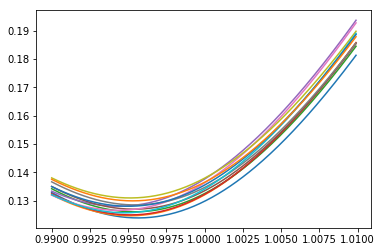

In [42]:
#print("Make predictions on the test set")
for gbm_info in gbm_list:
    key = gbm_info[0]
    gbm = gbm_info[1]
    
    yhat = gbm.predict(xgb.DMatrix(ho_xtest.values))
    error = rmspe(np.expm1(ho_ytest), np.expm1(yhat))

    print(str(key) + "----valid_set----"+ 'RMSPE: {:.6f}'.format(error))
    
    
    dtest = xgb.DMatrix(xtest.values)
    test_probs = gbm.predict(dtest)

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+".csv", index=False)
    
    
    
    print("weight correction")
    W=[(0.9900+(i/10000)) for i in range(200)]
    S =[]
    for w in W:
        error = rmspe(np.expm1(ho_ytest), np.expm1(yhat*w))
        #print('RMSPE for {:.3f}:{:.6f}'.format(w,error))
        S.append(error)
    Score = pd.Series(S,index=W)
    Score.plot()
    BS = Score[Score.values == Score.values.min()]
    print (str(key) + '------Best weight for Score:{}'.format(BS))
    
    w = float(BS.index[0])
    #yhat_new = yhat*w
    #error = 
    #print (str(key) + '------RMSPE for weight corretion {:6f}'.format(error))

    result = pd.DataFrame({"Id": data_test['Id'], 'Sales': np.expm1(test_probs*w)})
    result.to_csv("Rossmann_submission_xgb_"+str(key)+"_fix.csv", index=False)

